<a href="https://colab.research.google.com/github/ShreyPandit/Quantile-Regression_Lipschitz/blob/master/BostonHousing_Lipschitz_Quantile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all Libraries

In [1]:
from tensorflow import keras
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import LearningRateScheduler
import numpy as np
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import boston_housing

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
x_test.shape

(102, 13)

In [3]:
y_train = np.expand_dims(y_train,axis=1)
y_test = np.expand_dims(y_test,axis=1)
print(y_train.shape,y_test.shape)

(404, 1) (102, 1)


Scaling all the data

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [5]:
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [6]:
scaler.fit(y_train)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [46]:
# scaler.fit(x_test)
# x_test = scaler.transform(x_test)

In [47]:
# scaler.fit(y_test)
# y_test = scaler.transform(y_test)

In [25]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(x_train.shape[1],)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(20 ,activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1,activation=keras.activations.softsign))

In [26]:
from tensorflow.keras import backend as K
func = K.function([model.layers[0].input], [model.layers[-2].output])

In [27]:
lrs = []
K1 = 0.
batch_size=8
from tqdm import tqdm

In [28]:
def lr_schedule(epoch):
    global K1

    Kz = 0.
    
    for i in tqdm(range((len(x_train) - 1) // batch_size + 1)):
        start_i = i * batch_size
        end_i = start_i + batch_size
        xb = x_train[start_i:end_i]
    	
        tmp = np.array(func([xb]))
        activ = np.linalg.norm(tmp)
        
        if activ > Kz:
            Kz = activ
    print("The value of K_z is ",Kz)
    K1 = (1/batch_size)*(Kz)*max(q,1-q)
    lr = 1 / K1
    lrs.append(lr)
    print('Epoch', epoch, 'LR =', lr)
    return lr


In [29]:
lr_scheduler = LearningRateScheduler(lr_schedule)

In [30]:
import tensorflow.keras.backend as K
def tilted_loss(q,y,f):
    e = (y-f)
    return K.mean(K.maximum(q*e, (q-1)*e), axis=-1)

# Quantile = 0.5

In [31]:
q = 0.5
model.compile(loss=lambda y,f: tilted_loss(q,y,f), optimizer=keras.optimizers.SGD())

In [32]:
history=model.fit(x_train, y_train, epochs = 1000, batch_size = 8,validation_data=(x_test,y_test),callbacks=[lr_scheduler])

100%|██████████| 51/51 [00:00<00:00, 775.80it/s]


The value of K_z is  7.139176
Epoch 0 LR = 2.24115503558424
Epoch 1/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.2759 - val_loss: 0.2588


100%|██████████| 51/51 [00:00<00:00, 765.37it/s]

The value of K_z is  28.583912
Epoch 1 LR = 0.559755433698278
Epoch 2/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.2193 - val_loss: 0.2305



100%|██████████| 51/51 [00:00<00:00, 746.38it/s]


The value of K_z is  30.151236
Epoch 2 LR = 0.5306581867038767
Epoch 3/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.2007 - val_loss: 0.2246


100%|██████████| 51/51 [00:00<00:00, 653.02it/s]

The value of K_z is  31.675528
Epoch 3 LR = 0.5051218156765369
Epoch 4/1000
29/51 [================>.............] - ETA: 0s - loss: 0.2117

51/51 [==============================] - 0s 2ms/step - loss: 0.2020 - val_loss: 0.2248


100%|██████████| 51/51 [00:00<00:00, 769.04it/s]


The value of K_z is  32.72264
Epoch 4 LR = 0.4889580888137202
Epoch 5/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1967 - val_loss: 0.2030


100%|██████████| 51/51 [00:00<00:00, 723.04it/s]

The value of K_z is  30.493814
Epoch 5 LR = 0.5246965746639837
Epoch 6/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1948 - val_loss: 0.1990



100%|██████████| 51/51 [00:00<00:00, 785.61it/s]

The value of K_z is  32.971626
Epoch 6 LR = 0.48526572099544224
Epoch 7/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2290

51/51 [==============================] - 0s 2ms/step - loss: 0.1926 - val_loss: 0.2201


100%|██████████| 51/51 [00:00<00:00, 776.08it/s]

The value of K_z is  33.160572
Epoch 7 LR = 0.482500723295998
Epoch 8/1000
 1/51 [..............................] - ETA: 0s - loss: 0.3293

51/51 [==============================] - 0s 2ms/step - loss: 0.1902 - val_loss: 0.2026


100%|██████████| 51/51 [00:00<00:00, 727.05it/s]

The value of K_z is  35.110107
Epoch 8 LR = 0.4557092294747968
Epoch 9/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1888 - val_loss: 0.2021



100%|██████████| 51/51 [00:00<00:00, 796.59it/s]

The value of K_z is  37.20169
Epoch 9 LR = 0.43008798014806915
Epoch 10/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2323

51/51 [==============================] - 0s 2ms/step - loss: 0.1848 - val_loss: 0.2026


100%|██████████| 51/51 [00:00<00:00, 778.90it/s]


The value of K_z is  33.762684
Epoch 10 LR = 0.47389597528326904
Epoch 11/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1843 - val_loss: 0.1997


100%|██████████| 51/51 [00:00<00:00, 782.30it/s]

The value of K_z is  42.128654
Epoch 11 LR = 0.379789010532088
Epoch 12/1000
 1/51 [..............................] - ETA: 0s - loss: 0.3461

51/51 [==============================] - 0s 2ms/step - loss: 0.1818 - val_loss: 0.1962


100%|██████████| 51/51 [00:00<00:00, 765.93it/s]

The value of K_z is  40.412445
Epoch 12 LR = 0.3959176430165341
Epoch 13/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2406

51/51 [==============================] - 0s 2ms/step - loss: 0.1809 - val_loss: 0.2016


100%|██████████| 51/51 [00:00<00:00, 763.35it/s]

The value of K_z is  41.640617
Epoch 13 LR = 0.3842402204942946
Epoch 14/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0644

51/51 [==============================] - 0s 3ms/step - loss: 0.1822 - val_loss: 0.1931


100%|██████████| 51/51 [00:00<00:00, 784.55it/s]

The value of K_z is  42.09246
Epoch 14 LR = 0.38011557793589906
Epoch 15/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1816 - val_loss: 0.2074



100%|██████████| 51/51 [00:00<00:00, 790.99it/s]

The value of K_z is  43.34265
Epoch 15 LR = 0.36915139003500785
Epoch 16/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2634

51/51 [==============================] - 0s 2ms/step - loss: 0.1703 - val_loss: 0.1912


100%|██████████| 51/51 [00:00<00:00, 795.69it/s]

The value of K_z is  41.088696
Epoch 16 LR = 0.3894015080091225
Epoch 17/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2466

51/51 [==============================] - 0s 2ms/step - loss: 0.1748 - val_loss: 0.2065


100%|██████████| 51/51 [00:00<00:00, 785.42it/s]

The value of K_z is  43.642834
Epoch 17 LR = 0.36661230813794987
Epoch 18/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1592

51/51 [==============================] - 0s 2ms/step - loss: 0.1717 - val_loss: 0.1946


100%|██████████| 51/51 [00:00<00:00, 793.30it/s]

The value of K_z is  42.702095
Epoch 18 LR = 0.37468887622745484
Epoch 19/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1849

51/51 [==============================] - 0s 2ms/step - loss: 0.1700 - val_loss: 0.2070


100%|██████████| 51/51 [00:00<00:00, 755.49it/s]

The value of K_z is  43.977962
Epoch 19 LR = 0.3638185830510127
Epoch 20/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1746 - val_loss: 0.2041



100%|██████████| 51/51 [00:00<00:00, 794.70it/s]

The value of K_z is  43.598007
Epoch 20 LR = 0.3669892508117102
Epoch 21/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0865

51/51 [==============================] - 0s 2ms/step - loss: 0.1708 - val_loss: 0.1970


100%|██████████| 51/51 [00:00<00:00, 769.38it/s]

The value of K_z is  42.989613
Epoch 21 LR = 0.37218293071306197
Epoch 22/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2684

51/51 [==============================] - 0s 2ms/step - loss: 0.1741 - val_loss: 0.1912


100%|██████████| 51/51 [00:00<00:00, 814.89it/s]

The value of K_z is  45.53598
Epoch 22 LR = 0.35137049693624456
Epoch 23/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1553

51/51 [==============================] - 0s 2ms/step - loss: 0.1723 - val_loss: 0.1952


100%|██████████| 51/51 [00:00<00:00, 766.07it/s]


The value of K_z is  46.50901
Epoch 23 LR = 0.3440193608002849
Epoch 24/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1733 - val_loss: 0.1980


100%|██████████| 51/51 [00:00<00:00, 775.24it/s]

The value of K_z is  44.574383
Epoch 24 LR = 0.358950567599725
Epoch 25/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1711 - val_loss: 0.2040



100%|██████████| 51/51 [00:00<00:00, 767.54it/s]

The value of K_z is  53.55485
Epoch 25 LR = 0.2987591141102307
Epoch 26/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1693 - val_loss: 0.2001



100%|██████████| 51/51 [00:00<00:00, 789.84it/s]

The value of K_z is  50.414024
Epoch 26 LR = 0.3173720052174174
Epoch 27/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0845

51/51 [==============================] - 0s 2ms/step - loss: 0.1700 - val_loss: 0.1917


100%|██████████| 51/51 [00:00<00:00, 710.78it/s]


The value of K_z is  49.63795
Epoch 27 LR = 0.3223340148172217
Epoch 28/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1697 - val_loss: 0.1936


100%|██████████| 51/51 [00:00<00:00, 783.98it/s]

The value of K_z is  48.675972
Epoch 28 LR = 0.3287042733317273
Epoch 29/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1511

51/51 [==============================] - 0s 2ms/step - loss: 0.1739 - val_loss: 0.1937


100%|██████████| 51/51 [00:00<00:00, 691.72it/s]


The value of K_z is  49.88044
Epoch 29 LR = 0.320767019647965
Epoch 30/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1702 - val_loss: 0.1924


100%|██████████| 51/51 [00:00<00:00, 783.31it/s]

The value of K_z is  48.141
Epoch 30 LR = 0.3323570425505041
Epoch 31/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1695 - val_loss: 0.1987



100%|██████████| 51/51 [00:00<00:00, 783.08it/s]

The value of K_z is  49.82426
Epoch 31 LR = 0.3211286985790128
Epoch 32/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1152

51/51 [==============================] - 0s 2ms/step - loss: 0.1696 - val_loss: 0.1893


100%|██████████| 51/51 [00:00<00:00, 770.61it/s]

The value of K_z is  49.088978
Epoch 32 LR = 0.32593874862735256
Epoch 33/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1242

51/51 [==============================] - 0s 3ms/step - loss: 0.1637 - val_loss: 0.1906


100%|██████████| 51/51 [00:00<00:00, 805.51it/s]

The value of K_z is  50.79849
Epoch 33 LR = 0.314970000793751
Epoch 34/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1653 - val_loss: 0.1946



100%|██████████| 51/51 [00:00<00:00, 727.40it/s]

The value of K_z is  50.239532
Epoch 34 LR = 0.318474301275202
Epoch 35/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0781

51/51 [==============================] - 0s 2ms/step - loss: 0.1691 - val_loss: 0.2047


100%|██████████| 51/51 [00:00<00:00, 798.61it/s]


The value of K_z is  50.86438
Epoch 35 LR = 0.31456197906792005
Epoch 36/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1660 - val_loss: 0.1941


100%|██████████| 51/51 [00:00<00:00, 794.67it/s]

The value of K_z is  50.38904
Epoch 36 LR = 0.31752935552042005
Epoch 37/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0960

51/51 [==============================] - 0s 2ms/step - loss: 0.1620 - val_loss: 0.1888


100%|██████████| 51/51 [00:00<00:00, 764.41it/s]


The value of K_z is  49.060234
Epoch 37 LR = 0.3261297118401076
Epoch 38/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1622 - val_loss: 0.1889


100%|██████████| 51/51 [00:00<00:00, 784.42it/s]

The value of K_z is  50.450684
Epoch 38 LR = 0.3171413915585107
Epoch 39/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1619 - val_loss: 0.1874



100%|██████████| 51/51 [00:00<00:00, 795.99it/s]

The value of K_z is  51.099262
Epoch 39 LR = 0.3131160666394682
Epoch 40/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0866

51/51 [==============================] - 0s 3ms/step - loss: 0.1644 - val_loss: 0.1850


100%|██████████| 51/51 [00:00<00:00, 781.62it/s]

The value of K_z is  50.443813
Epoch 40 LR = 0.31718458509946995
Epoch 41/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1607 - val_loss: 0.1925



100%|██████████| 51/51 [00:00<00:00, 772.75it/s]

The value of K_z is  51.188946
Epoch 41 LR = 0.31256748423396147
Epoch 42/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0878

51/51 [==============================] - 0s 2ms/step - loss: 0.1699 - val_loss: 0.1834


100%|██████████| 51/51 [00:00<00:00, 769.01it/s]

The value of K_z is  46.82224
Epoch 42 LR = 0.3417179607026757
Epoch 43/1000
 1/51 [..............................] - ETA: 0s - loss: 0.3379

51/51 [==============================] - 0s 2ms/step - loss: 0.1599 - val_loss: 0.1912


100%|██████████| 51/51 [00:00<00:00, 774.58it/s]

The value of K_z is  48.103695
Epoch 43 LR = 0.3326147820456547
Epoch 44/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1797

51/51 [==============================] - 0s 2ms/step - loss: 0.1663 - val_loss: 0.1872


100%|██████████| 51/51 [00:00<00:00, 794.10it/s]

The value of K_z is  50.98337
Epoch 44 LR = 0.31382781200278187
Epoch 45/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2130

51/51 [==============================] - 0s 2ms/step - loss: 0.1601 - val_loss: 0.1946


100%|██████████| 51/51 [00:00<00:00, 745.71it/s]

The value of K_z is  53.44848
Epoch 45 LR = 0.29935370265982963
Epoch 46/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1578 - val_loss: 0.1888



100%|██████████| 51/51 [00:00<00:00, 771.60it/s]

The value of K_z is  51.42929
Epoch 46 LR = 0.3111067595913923
Epoch 47/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0674

51/51 [==============================] - 0s 2ms/step - loss: 0.1580 - val_loss: 0.1909


100%|██████████| 51/51 [00:00<00:00, 736.84it/s]

The value of K_z is  52.863697
Epoch 47 LR = 0.3026651727415285
Epoch 48/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0842

51/51 [==============================] - 0s 2ms/step - loss: 0.1642 - val_loss: 0.1952


100%|██████████| 51/51 [00:00<00:00, 758.85it/s]


The value of K_z is  53.609882
Epoch 48 LR = 0.2984524363274681
Epoch 49/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1599 - val_loss: 0.1851


100%|██████████| 51/51 [00:00<00:00, 743.47it/s]


The value of K_z is  50.99947
Epoch 49 LR = 0.3137287520088143
Epoch 50/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1653 - val_loss: 0.1934


100%|██████████| 51/51 [00:00<00:00, 772.69it/s]

The value of K_z is  51.903046
Epoch 50 LR = 0.30826707370062423
Epoch 51/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1584 - val_loss: 0.1856



100%|██████████| 51/51 [00:00<00:00, 752.75it/s]

The value of K_z is  51.90774
Epoch 51 LR = 0.30823918597241495
Epoch 52/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1707

51/51 [==============================] - 0s 2ms/step - loss: 0.1611 - val_loss: 0.1941


100%|██████████| 51/51 [00:00<00:00, 779.46it/s]

The value of K_z is  50.940823
Epoch 52 LR = 0.31408994168040616
Epoch 53/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1496

51/51 [==============================] - 0s 2ms/step - loss: 0.1604 - val_loss: 0.1893


100%|██████████| 51/51 [00:00<00:00, 795.46it/s]


The value of K_z is  52.548035
Epoch 53 LR = 0.30448331894994696
Epoch 54/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1597 - val_loss: 0.1894


100%|██████████| 51/51 [00:00<00:00, 792.06it/s]

The value of K_z is  53.204216
Epoch 54 LR = 0.30072804754743726
Epoch 55/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0643

51/51 [==============================] - 0s 2ms/step - loss: 0.1623 - val_loss: 0.1987


100%|██████████| 51/51 [00:00<00:00, 744.79it/s]

The value of K_z is  53.561604
Epoch 55 LR = 0.29872145232202063
Epoch 56/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1572 - val_loss: 0.1896



100%|██████████| 51/51 [00:00<00:00, 733.14it/s]

The value of K_z is  52.268665
Epoch 56 LR = 0.30611074348209816
Epoch 57/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1538

51/51 [==============================] - 0s 2ms/step - loss: 0.1576 - val_loss: 0.1869


100%|██████████| 51/51 [00:00<00:00, 793.29it/s]

The value of K_z is  48.80146
Epoch 57 LR = 0.32785904177359354
Epoch 58/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1734

51/51 [==============================] - 0s 2ms/step - loss: 0.1538 - val_loss: 0.1823


100%|██████████| 51/51 [00:00<00:00, 613.27it/s]

The value of K_z is  48.559597
Epoch 58 LR = 0.3294920259517831
Epoch 59/1000
29/51 [================>.............] - ETA: 0s - loss: 0.1712

51/51 [==============================] - 0s 2ms/step - loss: 0.1635 - val_loss: 0.1872


100%|██████████| 51/51 [00:00<00:00, 765.96it/s]


The value of K_z is  50.641212
Epoch 59 LR = 0.3159482015082156
Epoch 60/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1548 - val_loss: 0.1855


100%|██████████| 51/51 [00:00<00:00, 683.83it/s]


The value of K_z is  51.894688
Epoch 60 LR = 0.30831672226477136
Epoch 61/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1592 - val_loss: 0.1824


100%|██████████| 51/51 [00:00<00:00, 778.52it/s]

The value of K_z is  52.66231
Epoch 61 LR = 0.3038225920563177
Epoch 62/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1806

51/51 [==============================] - 0s 2ms/step - loss: 0.1608 - val_loss: 0.1894


100%|██████████| 51/51 [00:00<00:00, 777.97it/s]


The value of K_z is  52.77126
Epoch 62 LR = 0.30319534174194857
Epoch 63/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1593 - val_loss: 0.1868


100%|██████████| 51/51 [00:00<00:00, 760.89it/s]

The value of K_z is  54.1147
Epoch 63 LR = 0.2956682732447925
Epoch 64/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1928

51/51 [==============================] - 0s 2ms/step - loss: 0.1554 - val_loss: 0.1882


100%|██████████| 51/51 [00:00<00:00, 719.33it/s]


The value of K_z is  52.675632
Epoch 64 LR = 0.30374575961750216
Epoch 65/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1635 - val_loss: 0.1965


100%|██████████| 51/51 [00:00<00:00, 690.84it/s]

The value of K_z is  54.22579
Epoch 65 LR = 0.2950625625880894
Epoch 66/1000
25/51 [=============>................] - ETA: 0s - loss: 0.1517

51/51 [==============================] - 0s 2ms/step - loss: 0.1517 - val_loss: 0.1841


100%|██████████| 51/51 [00:00<00:00, 775.13it/s]

The value of K_z is  52.58352
Epoch 66 LR = 0.3042778480743597
Epoch 67/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1595 - val_loss: 0.1849



100%|██████████| 51/51 [00:00<00:00, 774.11it/s]


The value of K_z is  52.700848
Epoch 67 LR = 0.3036004299898134
Epoch 68/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1562 - val_loss: 0.1880


100%|██████████| 51/51 [00:00<00:00, 774.62it/s]

The value of K_z is  53.461754
Epoch 68 LR = 0.2992793698149897
Epoch 69/1000
 1/51 [..............................] - ETA: 0s - loss: 0.3527

51/51 [==============================] - 0s 2ms/step - loss: 0.1529 - val_loss: 0.1862


100%|██████████| 51/51 [00:00<00:00, 769.48it/s]


The value of K_z is  53.832996
Epoch 69 LR = 0.2972154826846973
Epoch 70/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1545 - val_loss: 0.1873


100%|██████████| 51/51 [00:00<00:00, 785.91it/s]

The value of K_z is  51.858074
Epoch 70 LR = 0.3085344037636998
Epoch 71/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1698

51/51 [==============================] - 0s 3ms/step - loss: 0.1564 - val_loss: 0.1935


100%|██████████| 51/51 [00:00<00:00, 768.64it/s]

The value of K_z is  55.48272
Epoch 71 LR = 0.2883780781991111
Epoch 72/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1565 - val_loss: 0.1886



100%|██████████| 51/51 [00:00<00:00, 762.03it/s]

The value of K_z is  54.35199
Epoch 72 LR = 0.29437744735278826
Epoch 73/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2484

51/51 [==============================] - 0s 2ms/step - loss: 0.1534 - val_loss: 0.1867


100%|██████████| 51/51 [00:00<00:00, 688.23it/s]


The value of K_z is  57.855915
Epoch 73 LR = 0.27654907852996
Epoch 74/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1550 - val_loss: 0.1887


100%|██████████| 51/51 [00:00<00:00, 777.38it/s]


The value of K_z is  56.80859
Epoch 74 LR = 0.28164754693298716
Epoch 75/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1560 - val_loss: 0.1882


100%|██████████| 51/51 [00:00<00:00, 780.65it/s]


The value of K_z is  56.039463
Epoch 75 LR = 0.28551308544234544
Epoch 76/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1570 - val_loss: 0.1850


100%|██████████| 51/51 [00:00<00:00, 808.03it/s]

The value of K_z is  55.27535
Epoch 76 LR = 0.28945995614523323
Epoch 77/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1562 - val_loss: 0.1803



100%|██████████| 51/51 [00:00<00:00, 712.08it/s]


The value of K_z is  54.99325
Epoch 77 LR = 0.2909447882447957
Epoch 78/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1528 - val_loss: 0.1880


100%|██████████| 51/51 [00:00<00:00, 784.25it/s]

The value of K_z is  57.412712
Epoch 78 LR = 0.27868392583372215
Epoch 79/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0610

51/51 [==============================] - 0s 2ms/step - loss: 0.1540 - val_loss: 0.1946


100%|██████████| 51/51 [00:00<00:00, 778.09it/s]


The value of K_z is  55.423088
Epoch 79 LR = 0.28868835274416454
Epoch 80/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1570 - val_loss: 0.1860


100%|██████████| 51/51 [00:00<00:00, 754.72it/s]

The value of K_z is  56.103237
Epoch 80 LR = 0.2851885347831701
Epoch 81/1000
50/51 [============================>.] - ETA: 0s - loss: 0.1537

51/51 [==============================] - 0s 3ms/step - loss: 0.1536 - val_loss: 0.1839


100%|██████████| 51/51 [00:00<00:00, 762.63it/s]

The value of K_z is  54.091793
Epoch 81 LR = 0.295793485384425
Epoch 82/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1574 - val_loss: 0.1835



100%|██████████| 51/51 [00:00<00:00, 768.42it/s]

The value of K_z is  54.40356
Epoch 82 LR = 0.29409839746221433
Epoch 83/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1973

51/51 [==============================] - 0s 2ms/step - loss: 0.1549 - val_loss: 0.1826


100%|██████████| 51/51 [00:00<00:00, 781.53it/s]

The value of K_z is  54.096657
Epoch 83 LR = 0.2957668910919128
Epoch 84/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0883

51/51 [==============================] - 0s 2ms/step - loss: 0.1588 - val_loss: 0.1845


100%|██████████| 51/51 [00:00<00:00, 786.68it/s]


The value of K_z is  53.905544
Epoch 84 LR = 0.29681547999206004
Epoch 85/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1583 - val_loss: 0.1808


100%|██████████| 51/51 [00:00<00:00, 792.72it/s]

The value of K_z is  52.86447
Epoch 85 LR = 0.30266073916027764
Epoch 86/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1299

51/51 [==============================] - 0s 3ms/step - loss: 0.1534 - val_loss: 0.1848


100%|██████████| 51/51 [00:00<00:00, 734.10it/s]

The value of K_z is  56.21636
Epoch 86 LR = 0.284614665848668
Epoch 87/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1569 - val_loss: 0.1824



100%|██████████| 51/51 [00:00<00:00, 781.23it/s]

The value of K_z is  56.788845
Epoch 87 LR = 0.28174547276775386
Epoch 88/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1794

51/51 [==============================] - 0s 2ms/step - loss: 0.1546 - val_loss: 0.1863


100%|██████████| 51/51 [00:00<00:00, 753.80it/s]


The value of K_z is  58.519653
Epoch 88 LR = 0.2734124194554364
Epoch 89/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1576 - val_loss: 0.1842


100%|██████████| 51/51 [00:00<00:00, 778.63it/s]


The value of K_z is  56.333767
Epoch 89 LR = 0.2840214824941617
Epoch 90/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1584 - val_loss: 0.1832


100%|██████████| 51/51 [00:00<00:00, 741.28it/s]

The value of K_z is  59.074074
Epoch 90 LR = 0.27084639627987084
Epoch 91/1000
30/51 [================>.............] - ETA: 0s - loss: 0.1560

51/51 [==============================] - 0s 3ms/step - loss: 0.1564 - val_loss: 0.1903


100%|██████████| 51/51 [00:00<00:00, 736.30it/s]

The value of K_z is  57.084396
Epoch 91 LR = 0.2802867511894283
Epoch 92/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1590 - val_loss: 0.1865



100%|██████████| 51/51 [00:00<00:00, 742.51it/s]

The value of K_z is  57.16508
Epoch 92 LR = 0.2798911453171046
Epoch 93/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1718

51/51 [==============================] - 0s 2ms/step - loss: 0.1615 - val_loss: 0.1866


100%|██████████| 51/51 [00:00<00:00, 766.48it/s]


The value of K_z is  59.13442
Epoch 93 LR = 0.2705700065921662
Epoch 94/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1526 - val_loss: 0.1799


100%|██████████| 51/51 [00:00<00:00, 786.62it/s]

The value of K_z is  57.057423
Epoch 94 LR = 0.28041925590520883
Epoch 95/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1195

51/51 [==============================] - 0s 2ms/step - loss: 0.1533 - val_loss: 0.1905


100%|██████████| 51/51 [00:00<00:00, 750.83it/s]

The value of K_z is  59.603474
Epoch 95 LR = 0.2684407303234694
Epoch 96/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1593

51/51 [==============================] - 0s 2ms/step - loss: 0.1505 - val_loss: 0.1854


100%|██████████| 51/51 [00:00<00:00, 633.78it/s]

The value of K_z is  57.50837
Epoch 96 LR = 0.2782203730376902
Epoch 97/1000
29/51 [================>.............] - ETA: 0s - loss: 0.1438

51/51 [==============================] - 0s 2ms/step - loss: 0.1540 - val_loss: 0.1879


100%|██████████| 51/51 [00:00<00:00, 783.78it/s]


The value of K_z is  57.498863
Epoch 97 LR = 0.2782663709145277
Epoch 98/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1550 - val_loss: 0.1830


100%|██████████| 51/51 [00:00<00:00, 783.22it/s]

The value of K_z is  58.443447
Epoch 98 LR = 0.2737689303140171
Epoch 99/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1533 - val_loss: 0.1879



100%|██████████| 51/51 [00:00<00:00, 778.18it/s]

The value of K_z is  58.207134
Epoch 99 LR = 0.27488039407939796
Epoch 100/1000
 1/51 [..............................] - ETA: 0s - loss: 0.3191

51/51 [==============================] - 0s 2ms/step - loss: 0.1535 - val_loss: 0.1851


100%|██████████| 51/51 [00:00<00:00, 695.57it/s]


The value of K_z is  59.055836
Epoch 100 LR = 0.27093004110228885
Epoch 101/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1551 - val_loss: 0.1829


100%|██████████| 51/51 [00:00<00:00, 644.36it/s]

The value of K_z is  59.55179
Epoch 101 LR = 0.2686737115486219
Epoch 102/1000
30/51 [================>.............] - ETA: 0s - loss: 0.1526

51/51 [==============================] - 0s 2ms/step - loss: 0.1591 - val_loss: 0.1865


100%|██████████| 51/51 [00:00<00:00, 777.26it/s]


The value of K_z is  59.73271
Epoch 102 LR = 0.2678599300114979
Epoch 103/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1585 - val_loss: 0.1833


100%|██████████| 51/51 [00:00<00:00, 777.28it/s]


The value of K_z is  57.848724
Epoch 103 LR = 0.2765834540962773
Epoch 104/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1543 - val_loss: 0.1834


100%|██████████| 51/51 [00:00<00:00, 788.79it/s]


The value of K_z is  60.446404
Epoch 104 LR = 0.2646973032745492
Epoch 105/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1503 - val_loss: 0.1855


100%|██████████| 51/51 [00:00<00:00, 754.33it/s]


The value of K_z is  59.725723
Epoch 105 LR = 0.26789127238492816
Epoch 106/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1516 - val_loss: 0.1891


100%|██████████| 51/51 [00:00<00:00, 734.99it/s]


The value of K_z is  62.09186
Epoch 106 LR = 0.2576827229130364
Epoch 107/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1557 - val_loss: 0.1871


100%|██████████| 51/51 [00:00<00:00, 765.39it/s]

The value of K_z is  70.94379
Epoch 107 LR = 0.2255306738200342
Epoch 108/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1543 - val_loss: 0.1894



100%|██████████| 51/51 [00:00<00:00, 766.57it/s]

The value of K_z is  70.71683
Epoch 108 LR = 0.22625449401423844
Epoch 109/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0798

51/51 [==============================] - 0s 2ms/step - loss: 0.1504 - val_loss: 0.1852


100%|██████████| 51/51 [00:00<00:00, 800.51it/s]

The value of K_z is  68.02121
Epoch 109 LR = 0.2352207505073087
Epoch 110/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0864

51/51 [==============================] - 0s 2ms/step - loss: 0.1529 - val_loss: 0.1948


100%|██████████| 51/51 [00:00<00:00, 799.57it/s]

The value of K_z is  65.17294
Epoch 110 LR = 0.24550065157729467
Epoch 111/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0983

51/51 [==============================] - 0s 2ms/step - loss: 0.1507 - val_loss: 0.1889


100%|██████████| 51/51 [00:00<00:00, 777.92it/s]

The value of K_z is  66.54626
Epoch 111 LR = 0.2404342590661623
Epoch 112/1000
51/51 [==============================] - ETA: 0s - loss: 0.1488

51/51 [==============================] - 0s 3ms/step - loss: 0.1488 - val_loss: 0.1912


100%|██████████| 51/51 [00:00<00:00, 762.67it/s]

The value of K_z is  65.17691
Epoch 112 LR = 0.2454857080783643
Epoch 113/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1493 - val_loss: 0.1904



100%|██████████| 51/51 [00:00<00:00, 796.48it/s]

The value of K_z is  66.912445
Epoch 113 LR = 0.2391184477514461
Epoch 114/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0726

51/51 [==============================] - 0s 2ms/step - loss: 0.1524 - val_loss: 0.1886


100%|██████████| 51/51 [00:00<00:00, 720.79it/s]


The value of K_z is  64.6478
Epoch 114 LR = 0.2474949005820016
Epoch 115/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1463 - val_loss: 0.1893


100%|██████████| 51/51 [00:00<00:00, 787.83it/s]

The value of K_z is  60.308285
Epoch 115 LR = 0.265303516155364
Epoch 116/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1042

51/51 [==============================] - 0s 2ms/step - loss: 0.1535 - val_loss: 0.1894


100%|██████████| 51/51 [00:00<00:00, 733.02it/s]


The value of K_z is  66.373436
Epoch 116 LR = 0.24106029415500468
Epoch 117/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1531 - val_loss: 0.1842


100%|██████████| 51/51 [00:00<00:00, 781.42it/s]

The value of K_z is  62.2562
Epoch 117 LR = 0.25700252002302193
Epoch 118/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1500 - val_loss: 0.1856



100%|██████████| 51/51 [00:00<00:00, 734.86it/s]

The value of K_z is  63.786022
Epoch 118 LR = 0.25083865479609235
Epoch 119/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1500 - val_loss: 0.1866



100%|██████████| 51/51 [00:00<00:00, 787.95it/s]

The value of K_z is  64.079735
Epoch 119 LR = 0.24968892348535712
Epoch 120/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0605

51/51 [==============================] - 0s 2ms/step - loss: 0.1518 - val_loss: 0.1894


100%|██████████| 51/51 [00:00<00:00, 741.54it/s]

The value of K_z is  63.740013
Epoch 120 LR = 0.2510197161276917
Epoch 121/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1431

51/51 [==============================] - 0s 2ms/step - loss: 0.1478 - val_loss: 0.1885


100%|██████████| 51/51 [00:00<00:00, 788.05it/s]

The value of K_z is  64.97385
Epoch 121 LR = 0.24625292910543276
Epoch 122/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0961

51/51 [==============================] - 0s 2ms/step - loss: 0.1513 - val_loss: 0.1863


100%|██████████| 51/51 [00:00<00:00, 697.75it/s]

The value of K_z is  64.43157
Epoch 122 LR = 0.2483254639483492
Epoch 123/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1610

51/51 [==============================] - 0s 2ms/step - loss: 0.1514 - val_loss: 0.1850


100%|██████████| 51/51 [00:00<00:00, 757.77it/s]

The value of K_z is  61.243744
Epoch 123 LR = 0.2612511741124706
Epoch 124/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1542 - val_loss: 0.1846



100%|██████████| 51/51 [00:00<00:00, 732.03it/s]


The value of K_z is  61.43584
Epoch 124 LR = 0.26043429766724535
Epoch 125/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1510 - val_loss: 0.1860


100%|██████████| 51/51 [00:00<00:00, 783.86it/s]

The value of K_z is  62.39985
Epoch 125 LR = 0.2564108771465213
Epoch 126/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0839

51/51 [==============================] - 0s 2ms/step - loss: 0.1498 - val_loss: 0.1871


100%|██████████| 51/51 [00:00<00:00, 704.83it/s]

The value of K_z is  63.739025
Epoch 126 LR = 0.25102360713690863
Epoch 127/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1588

51/51 [==============================] - 0s 2ms/step - loss: 0.1482 - val_loss: 0.1869


100%|██████████| 51/51 [00:00<00:00, 687.24it/s]

The value of K_z is  65.933815
Epoch 127 LR = 0.2426675902100849
Epoch 128/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1521 - val_loss: 0.1878



100%|██████████| 51/51 [00:00<00:00, 747.56it/s]

The value of K_z is  65.789024
Epoch 128 LR = 0.24320166102696955
Epoch 129/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1625

51/51 [==============================] - 0s 2ms/step - loss: 0.1496 - val_loss: 0.1887


100%|██████████| 51/51 [00:00<00:00, 767.65it/s]

The value of K_z is  65.86214
Epoch 129 LR = 0.242931686815291
Epoch 130/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2276

51/51 [==============================] - 0s 2ms/step - loss: 0.1526 - val_loss: 0.1862


100%|██████████| 51/51 [00:00<00:00, 777.67it/s]

The value of K_z is  66.23891
Epoch 130 LR = 0.24154987994792945
Epoch 131/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1541

51/51 [==============================] - 0s 2ms/step - loss: 0.1468 - val_loss: 0.1972


100%|██████████| 51/51 [00:00<00:00, 779.54it/s]


The value of K_z is  66.206955
Epoch 131 LR = 0.2416664534809086
Epoch 132/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1491 - val_loss: 0.1880


100%|██████████| 51/51 [00:00<00:00, 632.31it/s]

The value of K_z is  64.30559
Epoch 132 LR = 0.2488119703934029
Epoch 133/1000
29/51 [================>.............] - ETA: 0s - loss: 0.1494

51/51 [==============================] - 0s 2ms/step - loss: 0.1471 - val_loss: 0.1891


100%|██████████| 51/51 [00:00<00:00, 755.98it/s]


The value of K_z is  65.61646
Epoch 133 LR = 0.24384124562335524
Epoch 134/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1507 - val_loss: 0.1892


100%|██████████| 51/51 [00:00<00:00, 755.83it/s]


The value of K_z is  65.247955
Epoch 134 LR = 0.245218412147546
Epoch 135/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1494 - val_loss: 0.1857


100%|██████████| 51/51 [00:00<00:00, 765.01it/s]


The value of K_z is  63.70914
Epoch 135 LR = 0.2511413559297068
Epoch 136/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1513 - val_loss: 0.1849


100%|██████████| 51/51 [00:00<00:00, 790.25it/s]

The value of K_z is  66.17618
Epoch 136 LR = 0.24177884684114678
Epoch 137/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0949

51/51 [==============================] - 0s 2ms/step - loss: 0.1524 - val_loss: 0.1920


100%|██████████| 51/51 [00:00<00:00, 697.04it/s]

The value of K_z is  64.00905
Epoch 137 LR = 0.24996465944217464
Epoch 138/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1453 - val_loss: 0.1861



100%|██████████| 51/51 [00:00<00:00, 773.37it/s]

The value of K_z is  63.86136
Epoch 138 LR = 0.2505427435321171
Epoch 139/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1773

51/51 [==============================] - 0s 2ms/step - loss: 0.1462 - val_loss: 0.1889


100%|██████████| 51/51 [00:00<00:00, 760.44it/s]

The value of K_z is  65.6089
Epoch 139 LR = 0.24386934574027064
Epoch 140/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1492 - val_loss: 0.1838



100%|██████████| 51/51 [00:00<00:00, 784.77it/s]

The value of K_z is  65.76931
Epoch 140 LR = 0.24327456074260065
Epoch 141/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1688

51/51 [==============================] - 0s 2ms/step - loss: 0.1510 - val_loss: 0.1846


100%|██████████| 51/51 [00:00<00:00, 806.64it/s]

The value of K_z is  67.84026
Epoch 141 LR = 0.2358481410002003
Epoch 142/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1976

51/51 [==============================] - 0s 2ms/step - loss: 0.1497 - val_loss: 0.1859


100%|██████████| 51/51 [00:00<00:00, 709.43it/s]


The value of K_z is  62.66987
Epoch 142 LR = 0.2553061046849596
Epoch 143/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1469 - val_loss: 0.1806


100%|██████████| 51/51 [00:00<00:00, 772.74it/s]

The value of K_z is  66.65079
Epoch 143 LR = 0.24005717914682742
Epoch 144/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1531 - val_loss: 0.1814



100%|██████████| 51/51 [00:00<00:00, 786.95it/s]

The value of K_z is  66.09196
Epoch 144 LR = 0.24208694527927155
Epoch 145/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2633

51/51 [==============================] - 0s 2ms/step - loss: 0.1535 - val_loss: 0.1834


100%|██████████| 51/51 [00:00<00:00, 798.55it/s]

The value of K_z is  68.75724
Epoch 145 LR = 0.2327027660106374
Epoch 146/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1400

51/51 [==============================] - 0s 2ms/step - loss: 0.1481 - val_loss: 0.1852


100%|██████████| 51/51 [00:00<00:00, 774.08it/s]

The value of K_z is  68.87663
Epoch 146 LR = 0.23229939349551243
Epoch 147/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0753

51/51 [==============================] - 0s 2ms/step - loss: 0.1509 - val_loss: 0.1881


100%|██████████| 51/51 [00:00<00:00, 682.72it/s]


The value of K_z is  67.62772
Epoch 147 LR = 0.23658936196688193
Epoch 148/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1486 - val_loss: 0.1848


100%|██████████| 51/51 [00:00<00:00, 770.22it/s]


The value of K_z is  59.750412
Epoch 148 LR = 0.26778058038159736
Epoch 149/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1503 - val_loss: 0.1801


100%|██████████| 51/51 [00:00<00:00, 747.54it/s]


The value of K_z is  62.330345
Epoch 149 LR = 0.25669679769168335
Epoch 150/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1467 - val_loss: 0.1808


100%|██████████| 51/51 [00:00<00:00, 772.43it/s]

The value of K_z is  67.41688
Epoch 150 LR = 0.23732929401067054
Epoch 151/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0650

51/51 [==============================] - 0s 2ms/step - loss: 0.1523 - val_loss: 0.1843


100%|██████████| 51/51 [00:00<00:00, 696.10it/s]

The value of K_z is  66.633316
Epoch 151 LR = 0.24012012234819313
Epoch 152/1000
25/51 [=============>................] - ETA: 0s - loss: 0.1624

51/51 [==============================] - 0s 2ms/step - loss: 0.1505 - val_loss: 0.1888


100%|██████████| 51/51 [00:00<00:00, 739.01it/s]

The value of K_z is  64.48626
Epoch 152 LR = 0.2481148718171991
Epoch 153/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1470 - val_loss: 0.1858



100%|██████████| 51/51 [00:00<00:00, 738.40it/s]

The value of K_z is  64.90597
Epoch 153 LR = 0.24651046065433968
Epoch 154/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1463 - val_loss: 0.1842



100%|██████████| 51/51 [00:00<00:00, 779.76it/s]

The value of K_z is  69.13586
Epoch 154 LR = 0.23142839013327962
Epoch 155/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2101

51/51 [==============================] - 0s 2ms/step - loss: 0.1474 - val_loss: 0.1843


100%|██████████| 51/51 [00:00<00:00, 723.85it/s]


The value of K_z is  67.67677
Epoch 155 LR = 0.23641789160286927
Epoch 156/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1487 - val_loss: 0.1848


100%|██████████| 51/51 [00:00<00:00, 770.81it/s]

The value of K_z is  69.578156
Epoch 156 LR = 0.22995723127437293
Epoch 157/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2002

51/51 [==============================] - 0s 2ms/step - loss: 0.1485 - val_loss: 0.1877


100%|██████████| 51/51 [00:00<00:00, 790.41it/s]

The value of K_z is  69.93017
Epoch 157 LR = 0.22879967863448458
Epoch 158/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1240

51/51 [==============================] - 0s 3ms/step - loss: 0.1464 - val_loss: 0.1866


100%|██████████| 51/51 [00:00<00:00, 686.54it/s]

The value of K_z is  67.76595
Epoch 158 LR = 0.23610676566294977
Epoch 159/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1505 - val_loss: 0.1848



100%|██████████| 51/51 [00:00<00:00, 761.08it/s]

The value of K_z is  68.07516
Epoch 159 LR = 0.23503434536471784
Epoch 160/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1430

51/51 [==============================] - 0s 2ms/step - loss: 0.1501 - val_loss: 0.1851


100%|██████████| 51/51 [00:00<00:00, 779.81it/s]

The value of K_z is  67.013855
Epoch 160 LR = 0.23875659749261127
Epoch 161/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1498 - val_loss: 0.1848



100%|██████████| 51/51 [00:00<00:00, 762.92it/s]

The value of K_z is  68.866295
Epoch 161 LR = 0.2323342650033906
Epoch 162/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1260

51/51 [==============================] - 0s 2ms/step - loss: 0.1485 - val_loss: 0.1862


100%|██████████| 51/51 [00:00<00:00, 803.20it/s]

The value of K_z is  69.38825
Epoch 162 LR = 0.23058658316452915
Epoch 163/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1617

51/51 [==============================] - 0s 2ms/step - loss: 0.1495 - val_loss: 0.1872


100%|██████████| 51/51 [00:00<00:00, 761.81it/s]


The value of K_z is  69.72719
Epoch 163 LR = 0.2294657282705578
Epoch 164/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1453 - val_loss: 0.1887


100%|██████████| 51/51 [00:00<00:00, 749.28it/s]

The value of K_z is  70.20109
Epoch 164 LR = 0.22791669569305617
Epoch 165/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1493 - val_loss: 0.1834



100%|██████████| 51/51 [00:00<00:00, 770.14it/s]


The value of K_z is  68.114105
Epoch 165 LR = 0.23489995129847582
Epoch 166/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1450 - val_loss: 0.1863


100%|██████████| 51/51 [00:00<00:00, 767.52it/s]

The value of K_z is  68.961494
Epoch 166 LR = 0.23201353347374096
Epoch 167/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1972

51/51 [==============================] - 0s 2ms/step - loss: 0.1448 - val_loss: 0.1816


100%|██████████| 51/51 [00:00<00:00, 775.11it/s]


The value of K_z is  68.3971
Epoch 167 LR = 0.2339280385992329
Epoch 168/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1519 - val_loss: 0.1871


100%|██████████| 51/51 [00:00<00:00, 806.03it/s]

The value of K_z is  68.62728
Epoch 168 LR = 0.2331434339638793
Epoch 169/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0657

51/51 [==============================] - 0s 2ms/step - loss: 0.1471 - val_loss: 0.1852


100%|██████████| 51/51 [00:00<00:00, 756.34it/s]

The value of K_z is  76.33648
Epoch 169 LR = 0.20959834892047682
Epoch 170/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1505 - val_loss: 0.1917



100%|██████████| 51/51 [00:00<00:00, 775.39it/s]

The value of K_z is  75.944565
Epoch 170 LR = 0.2106799879367576
Epoch 171/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0982

51/51 [==============================] - 0s 2ms/step - loss: 0.1505 - val_loss: 0.1843


100%|██████████| 51/51 [00:00<00:00, 789.44it/s]

The value of K_z is  76.504745
Epoch 171 LR = 0.20913735349230078
Epoch 172/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0401

51/51 [==============================] - 0s 2ms/step - loss: 0.1484 - val_loss: 0.1888


100%|██████████| 51/51 [00:00<00:00, 796.00it/s]

The value of K_z is  75.96875
Epoch 172 LR = 0.21061291649526945
Epoch 173/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1695

51/51 [==============================] - 0s 2ms/step - loss: 0.1496 - val_loss: 0.1871


100%|██████████| 51/51 [00:00<00:00, 800.15it/s]


The value of K_z is  75.44645
Epoch 173 LR = 0.21207094770842955
Epoch 174/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1437 - val_loss: 0.1856


100%|██████████| 51/51 [00:00<00:00, 778.14it/s]

The value of K_z is  74.19804
Epoch 174 LR = 0.2156391303699583
Epoch 175/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1495 - val_loss: 0.1928



100%|██████████| 51/51 [00:00<00:00, 723.42it/s]

The value of K_z is  62.104984
Epoch 175 LR = 0.25762827548552253
Epoch 176/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1531 - val_loss: 0.1933



100%|██████████| 51/51 [00:00<00:00, 811.34it/s]

The value of K_z is  67.02721
Epoch 176 LR = 0.2387090385287392
Epoch 177/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1344

51/51 [==============================] - 0s 2ms/step - loss: 0.1488 - val_loss: 0.1834


100%|██████████| 51/51 [00:00<00:00, 769.29it/s]

The value of K_z is  70.09999
Epoch 177 LR = 0.22824539357559184
Epoch 178/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0548

51/51 [==============================] - 0s 2ms/step - loss: 0.1456 - val_loss: 0.1895


100%|██████████| 51/51 [00:00<00:00, 715.18it/s]


The value of K_z is  71.57564
Epoch 178 LR = 0.2235397474322506
Epoch 179/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1457 - val_loss: 0.1803


100%|██████████| 51/51 [00:00<00:00, 797.22it/s]

The value of K_z is  71.73963
Epoch 179 LR = 0.22302874480076001
Epoch 180/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1481 - val_loss: 0.1839



100%|██████████| 51/51 [00:00<00:00, 779.57it/s]

The value of K_z is  70.5204
Epoch 180 LR = 0.2268846996456874
Epoch 181/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1237

51/51 [==============================] - 0s 2ms/step - loss: 0.1460 - val_loss: 0.1895


100%|██████████| 51/51 [00:00<00:00, 793.09it/s]

The value of K_z is  71.5344
Epoch 181 LR = 0.22366860964465504
Epoch 182/1000
 1/51 [..............................] - ETA: 0s - loss: 0.4794

51/51 [==============================] - 0s 2ms/step - loss: 0.1442 - val_loss: 0.1930


100%|██████████| 51/51 [00:00<00:00, 779.36it/s]

The value of K_z is  71.43841
Epoch 182 LR = 0.22396915707942747
Epoch 183/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2319

51/51 [==============================] - 0s 2ms/step - loss: 0.1499 - val_loss: 0.1856


100%|██████████| 51/51 [00:00<00:00, 714.14it/s]

The value of K_z is  72.156456
Epoch 183 LR = 0.22174038039517258
Epoch 184/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1459 - val_loss: 0.1866



100%|██████████| 51/51 [00:00<00:00, 711.15it/s]

The value of K_z is  75.38965
Epoch 184 LR = 0.21223072837731058
Epoch 185/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0554

51/51 [==============================] - 0s 2ms/step - loss: 0.1495 - val_loss: 0.1856


100%|██████████| 51/51 [00:00<00:00, 715.96it/s]

The value of K_z is  74.99244
Epoch 185 LR = 0.2133548415779626
Epoch 186/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1462 - val_loss: 0.1857



100%|██████████| 51/51 [00:00<00:00, 808.11it/s]

The value of K_z is  74.8681
Epoch 186 LR = 0.21370916789699332
Epoch 187/1000
 1/51 [..............................] - ETA: 0s - loss: 0.3740

51/51 [==============================] - 0s 2ms/step - loss: 0.1467 - val_loss: 0.1908


100%|██████████| 51/51 [00:00<00:00, 794.83it/s]


The value of K_z is  75.225555
Epoch 187 LR = 0.212693677177726
Epoch 188/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1506 - val_loss: 0.1862


100%|██████████| 51/51 [00:00<00:00, 739.03it/s]


The value of K_z is  78.119995
Epoch 188 LR = 0.20481312084055384
Epoch 189/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1445 - val_loss: 0.1864


100%|██████████| 51/51 [00:00<00:00, 643.72it/s]

The value of K_z is  78.02778
Epoch 189 LR = 0.20505517755151748
Epoch 190/1000
29/51 [================>.............] - ETA: 0s - loss: 0.1668

51/51 [==============================] - 0s 2ms/step - loss: 0.1436 - val_loss: 0.1876


100%|██████████| 51/51 [00:00<00:00, 782.06it/s]

The value of K_z is  76.163345
Epoch 190 LR = 0.21007480605300152
Epoch 191/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2065

51/51 [==============================] - 0s 2ms/step - loss: 0.1475 - val_loss: 0.1829


100%|██████████| 51/51 [00:00<00:00, 798.77it/s]


The value of K_z is  74.15691
Epoch 191 LR = 0.21575870932762134
Epoch 192/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1452 - val_loss: 0.1891


100%|██████████| 51/51 [00:00<00:00, 792.08it/s]

The value of K_z is  76.2923
Epoch 192 LR = 0.20971972994616683
Epoch 193/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1053

51/51 [==============================] - 0s 2ms/step - loss: 0.1483 - val_loss: 0.1869


100%|██████████| 51/51 [00:00<00:00, 760.47it/s]


The value of K_z is  74.75097
Epoch 193 LR = 0.21404404823592824
Epoch 194/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1479 - val_loss: 0.1833


100%|██████████| 51/51 [00:00<00:00, 746.19it/s]

The value of K_z is  74.77316
Epoch 194 LR = 0.21398051643010457
Epoch 195/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1502 - val_loss: 0.1875



100%|██████████| 51/51 [00:00<00:00, 764.25it/s]


The value of K_z is  75.943245
Epoch 195 LR = 0.21068364953180282
Epoch 196/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1484 - val_loss: 0.1818


100%|██████████| 51/51 [00:00<00:00, 779.33it/s]

The value of K_z is  75.34816
Epoch 196 LR = 0.21234758811077403
Epoch 197/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0963

51/51 [==============================] - 0s 2ms/step - loss: 0.1454 - val_loss: 0.1898


100%|██████████| 51/51 [00:00<00:00, 772.18it/s]


The value of K_z is  75.20786
Epoch 197 LR = 0.212743713128237
Epoch 198/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1452 - val_loss: 0.1815


100%|██████████| 51/51 [00:00<00:00, 769.09it/s]

The value of K_z is  70.636406
Epoch 198 LR = 0.22651209084021037
Epoch 199/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1826

51/51 [==============================] - 0s 3ms/step - loss: 0.1448 - val_loss: 0.1901


100%|██████████| 51/51 [00:00<00:00, 776.34it/s]

The value of K_z is  75.28963
Epoch 199 LR = 0.21251267434250992
Epoch 200/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1490 - val_loss: 0.1864



100%|██████████| 51/51 [00:00<00:00, 770.47it/s]

The value of K_z is  74.09623
Epoch 200 LR = 0.21593541394042653
Epoch 201/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1516 - val_loss: 0.1833



100%|██████████| 51/51 [00:00<00:00, 774.63it/s]

The value of K_z is  72.2798
Epoch 201 LR = 0.22136198368183269
Epoch 202/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1951

51/51 [==============================] - 0s 2ms/step - loss: 0.1489 - val_loss: 0.1908


100%|██████████| 51/51 [00:00<00:00, 779.04it/s]

The value of K_z is  75.790054
Epoch 202 LR = 0.21110949376250382
Epoch 203/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2104

51/51 [==============================] - 0s 2ms/step - loss: 0.1467 - val_loss: 0.1899


100%|██████████| 51/51 [00:00<00:00, 775.28it/s]


The value of K_z is  75.91805
Epoch 203 LR = 0.2107535617232543
Epoch 204/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1436 - val_loss: 0.1888


100%|██████████| 51/51 [00:00<00:00, 794.18it/s]

The value of K_z is  76.35609
Epoch 204 LR = 0.20954452598358636
Epoch 205/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1854

51/51 [==============================] - 0s 3ms/step - loss: 0.1438 - val_loss: 0.1879


100%|██████████| 51/51 [00:00<00:00, 775.22it/s]

The value of K_z is  76.00453
Epoch 205 LR = 0.21051376290821602
Epoch 206/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1460 - val_loss: 0.1875



100%|██████████| 51/51 [00:00<00:00, 801.83it/s]

The value of K_z is  75.64919
Epoch 206 LR = 0.21150258721428924
Epoch 207/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1742

51/51 [==============================] - 0s 2ms/step - loss: 0.1476 - val_loss: 0.1856


100%|██████████| 51/51 [00:00<00:00, 790.86it/s]

The value of K_z is  75.42446
Epoch 207 LR = 0.21213277112613904
Epoch 208/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0744

51/51 [==============================] - 0s 2ms/step - loss: 0.1450 - val_loss: 0.1848


100%|██████████| 51/51 [00:00<00:00, 761.86it/s]

The value of K_z is  76.29811
Epoch 208 LR = 0.20970375017524043
Epoch 209/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2685

51/51 [==============================] - 0s 2ms/step - loss: 0.1453 - val_loss: 0.1829


100%|██████████| 51/51 [00:00<00:00, 801.02it/s]

The value of K_z is  76.355675
Epoch 209 LR = 0.20954565660923746
Epoch 210/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0610

51/51 [==============================] - 0s 3ms/step - loss: 0.1452 - val_loss: 0.1868


100%|██████████| 51/51 [00:00<00:00, 745.02it/s]

The value of K_z is  76.46287
Epoch 210 LR = 0.2092518953784426
Epoch 211/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1441 - val_loss: 0.1896



100%|██████████| 51/51 [00:00<00:00, 785.16it/s]

The value of K_z is  77.21443
Epoch 211 LR = 0.20721514922460513
Epoch 212/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0544

51/51 [==============================] - 0s 2ms/step - loss: 0.1469 - val_loss: 0.1887


100%|██████████| 51/51 [00:00<00:00, 691.01it/s]


The value of K_z is  76.778305
Epoch 212 LR = 0.20839220127101085
Epoch 213/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1441 - val_loss: 0.1868


100%|██████████| 51/51 [00:00<00:00, 795.67it/s]

The value of K_z is  75.670425
Epoch 213 LR = 0.2114432410316553
Epoch 214/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2288

51/51 [==============================] - 0s 2ms/step - loss: 0.1457 - val_loss: 0.1903


100%|██████████| 51/51 [00:00<00:00, 719.20it/s]


The value of K_z is  76.00544
Epoch 214 LR = 0.2105112482853912
Epoch 215/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1467 - val_loss: 0.1863


100%|██████████| 51/51 [00:00<00:00, 670.29it/s]

The value of K_z is  75.820526
Epoch 215 LR = 0.21102465015916766
Epoch 216/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1455 - val_loss: 0.1830



100%|██████████| 51/51 [00:00<00:00, 731.84it/s]


The value of K_z is  75.40495
Epoch 216 LR = 0.2121876529699363
Epoch 217/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1478 - val_loss: 0.1818


100%|██████████| 51/51 [00:00<00:00, 777.69it/s]


The value of K_z is  75.1585
Epoch 217 LR = 0.2128834377625004
Epoch 218/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1457 - val_loss: 0.1876


100%|██████████| 51/51 [00:00<00:00, 756.64it/s]

The value of K_z is  76.05762
Epoch 218 LR = 0.21036683229973166
Epoch 219/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1497 - val_loss: 0.1872



100%|██████████| 51/51 [00:00<00:00, 713.97it/s]

The value of K_z is  74.323044
Epoch 219 LR = 0.21527643617572756
Epoch 220/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1718

51/51 [==============================] - 0s 2ms/step - loss: 0.1448 - val_loss: 0.1899


100%|██████████| 51/51 [00:00<00:00, 650.75it/s]

The value of K_z is  77.17903
Epoch 220 LR = 0.2073101944343669
Epoch 221/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1479

51/51 [==============================] - 0s 2ms/step - loss: 0.1443 - val_loss: 0.1886


100%|██████████| 51/51 [00:00<00:00, 801.81it/s]

The value of K_z is  75.97332
Epoch 221 LR = 0.21060024754028805
Epoch 222/1000
 1/51 [..............................] - ETA: 0s - loss: 0.3046

51/51 [==============================] - 0s 2ms/step - loss: 0.1435 - val_loss: 0.1845


100%|██████████| 51/51 [00:00<00:00, 800.11it/s]

The value of K_z is  75.99549
Epoch 222 LR = 0.21053880675815723
Epoch 223/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1068

51/51 [==============================] - 0s 2ms/step - loss: 0.1450 - val_loss: 0.1874


100%|██████████| 51/51 [00:00<00:00, 789.40it/s]

The value of K_z is  74.31596
Epoch 223 LR = 0.2152969455509652
Epoch 224/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0933

51/51 [==============================] - 0s 2ms/step - loss: 0.1447 - val_loss: 0.1901


100%|██████████| 51/51 [00:00<00:00, 703.32it/s]


The value of K_z is  74.953415
Epoch 224 LR = 0.21346592437074868
Epoch 225/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1421 - val_loss: 0.1877


100%|██████████| 51/51 [00:00<00:00, 763.76it/s]

The value of K_z is  76.336205
Epoch 225 LR = 0.20959910305681684
Epoch 226/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1474 - val_loss: 0.1908



100%|██████████| 51/51 [00:00<00:00, 792.19it/s]


The value of K_z is  76.55362
Epoch 226 LR = 0.20900383454872995
Epoch 227/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1466 - val_loss: 0.1879


100%|██████████| 51/51 [00:00<00:00, 793.62it/s]

The value of K_z is  76.06462
Epoch 227 LR = 0.21034746240248942
Epoch 228/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1645

51/51 [==============================] - 0s 2ms/step - loss: 0.1483 - val_loss: 0.1830


100%|██████████| 51/51 [00:00<00:00, 814.16it/s]

The value of K_z is  74.320625
Epoch 228 LR = 0.2152834416327999
Epoch 229/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1117

51/51 [==============================] - 0s 2ms/step - loss: 0.1440 - val_loss: 0.1837


100%|██████████| 51/51 [00:00<00:00, 802.07it/s]

The value of K_z is  75.36058
Epoch 229 LR = 0.2123125897606134
Epoch 230/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0837

51/51 [==============================] - 0s 2ms/step - loss: 0.1424 - val_loss: 0.1829


100%|██████████| 51/51 [00:00<00:00, 791.63it/s]

The value of K_z is  74.39036
Epoch 230 LR = 0.21508163741053915
Epoch 231/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0968

51/51 [==============================] - 0s 3ms/step - loss: 0.1431 - val_loss: 0.1858


100%|██████████| 51/51 [00:00<00:00, 788.19it/s]

The value of K_z is  74.40898
Epoch 231 LR = 0.21502780599150983
Epoch 232/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1465 - val_loss: 0.1876



100%|██████████| 51/51 [00:00<00:00, 792.96it/s]

The value of K_z is  75.845505
Epoch 232 LR = 0.21095515219356334
Epoch 233/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0784

51/51 [==============================] - 0s 2ms/step - loss: 0.1440 - val_loss: 0.1841


100%|██████████| 51/51 [00:00<00:00, 773.73it/s]


The value of K_z is  75.65515
Epoch 233 LR = 0.21148592938959318
Epoch 234/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1444 - val_loss: 0.1822


100%|██████████| 51/51 [00:00<00:00, 771.78it/s]

The value of K_z is  76.16663
Epoch 234 LR = 0.21006573669482265
Epoch 235/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1447 - val_loss: 0.1846



100%|██████████| 51/51 [00:00<00:00, 762.70it/s]


The value of K_z is  75.38494
Epoch 235 LR = 0.21224398091055885
Epoch 236/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1433 - val_loss: 0.1800


100%|██████████| 51/51 [00:00<00:00, 749.40it/s]

The value of K_z is  74.15157
Epoch 236 LR = 0.21577424879323853
Epoch 237/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1457 - val_loss: 0.1811



100%|██████████| 51/51 [00:00<00:00, 785.32it/s]

The value of K_z is  75.27509
Epoch 237 LR = 0.21255370595544074
Epoch 238/1000
 1/51 [..............................] - ETA: 0s - loss: 0.3242

51/51 [==============================] - 0s 2ms/step - loss: 0.1433 - val_loss: 0.1861


100%|██████████| 51/51 [00:00<00:00, 747.50it/s]

The value of K_z is  75.501915
Epoch 238 LR = 0.21191515479648879
Epoch 239/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1053

51/51 [==============================] - 0s 2ms/step - loss: 0.1414 - val_loss: 0.1827


100%|██████████| 51/51 [00:00<00:00, 819.01it/s]

The value of K_z is  74.902626
Epoch 239 LR = 0.21361066822902497
Epoch 240/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1743

51/51 [==============================] - 0s 2ms/step - loss: 0.1467 - val_loss: 0.1861


100%|██████████| 51/51 [00:00<00:00, 742.67it/s]


The value of K_z is  76.34858
Epoch 240 LR = 0.20956513041011332
Epoch 241/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1435 - val_loss: 0.1865


100%|██████████| 51/51 [00:00<00:00, 778.98it/s]


The value of K_z is  76.2373
Epoch 241 LR = 0.2098710292392101
Epoch 242/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1479 - val_loss: 0.1809


100%|██████████| 51/51 [00:00<00:00, 758.83it/s]

The value of K_z is  74.20189
Epoch 242 LR = 0.21562793356632212
Epoch 243/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1849

51/51 [==============================] - 0s 2ms/step - loss: 0.1418 - val_loss: 0.1842


100%|██████████| 51/51 [00:00<00:00, 786.39it/s]


The value of K_z is  73.25402
Epoch 243 LR = 0.21841804516791088
Epoch 244/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1450 - val_loss: 0.1842


100%|██████████| 51/51 [00:00<00:00, 784.23it/s]

The value of K_z is  75.520065
Epoch 244 LR = 0.2118642235653124
Epoch 245/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1877

51/51 [==============================] - 0s 2ms/step - loss: 0.1466 - val_loss: 0.1833


100%|██████████| 51/51 [00:00<00:00, 784.86it/s]


The value of K_z is  76.44574
Epoch 245 LR = 0.20929877914900513
Epoch 246/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1464 - val_loss: 0.1844


100%|██████████| 51/51 [00:00<00:00, 707.74it/s]


The value of K_z is  74.339226
Epoch 246 LR = 0.21522957542911172
Epoch 247/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1469 - val_loss: 0.1864


100%|██████████| 51/51 [00:00<00:00, 802.42it/s]

The value of K_z is  76.630486
Epoch 247 LR = 0.20879418795750068
Epoch 248/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2671

51/51 [==============================] - 0s 2ms/step - loss: 0.1481 - val_loss: 0.1889


100%|██████████| 51/51 [00:00<00:00, 781.94it/s]

The value of K_z is  76.81217
Epoch 248 LR = 0.20830032007588456
Epoch 249/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1890

51/51 [==============================] - 0s 2ms/step - loss: 0.1448 - val_loss: 0.1830


100%|██████████| 51/51 [00:00<00:00, 776.81it/s]

The value of K_z is  76.32278
Epoch 249 LR = 0.20963597856370078
Epoch 250/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0585

51/51 [==============================] - 0s 2ms/step - loss: 0.1449 - val_loss: 0.1827


100%|██████████| 51/51 [00:00<00:00, 713.43it/s]


The value of K_z is  76.27829
Epoch 250 LR = 0.2097582423913387
Epoch 251/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1425 - val_loss: 0.1826


100%|██████████| 51/51 [00:00<00:00, 756.41it/s]

The value of K_z is  76.498924
Epoch 251 LR = 0.20915326791509253
Epoch 252/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1438 - val_loss: 0.1889



100%|██████████| 51/51 [00:00<00:00, 767.85it/s]

The value of K_z is  71.943306
Epoch 252 LR = 0.22239734169071024
Epoch 253/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1438 - val_loss: 0.1817



100%|██████████| 51/51 [00:00<00:00, 759.54it/s]


The value of K_z is  73.27438
Epoch 253 LR = 0.21835734708284482
Epoch 254/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1415 - val_loss: 0.1847


100%|██████████| 51/51 [00:00<00:00, 749.60it/s]


The value of K_z is  75.19732
Epoch 254 LR = 0.21277354307611313
Epoch 255/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1427 - val_loss: 0.1825


100%|██████████| 51/51 [00:00<00:00, 715.49it/s]

The value of K_z is  74.10523
Epoch 255 LR = 0.21590918099342116
Epoch 256/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1427 - val_loss: 0.1872



100%|██████████| 51/51 [00:00<00:00, 758.40it/s]

The value of K_z is  76.25526
Epoch 256 LR = 0.2098216005336306
Epoch 257/1000
50/51 [============================>.] - ETA: 0s - loss: 0.1446

51/51 [==============================] - 0s 3ms/step - loss: 0.1440 - val_loss: 0.1821


100%|██████████| 51/51 [00:00<00:00, 764.43it/s]

The value of K_z is  75.568794
Epoch 257 LR = 0.21172760738995935
Epoch 258/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1412 - val_loss: 0.1909



100%|██████████| 51/51 [00:00<00:00, 792.77it/s]

The value of K_z is  75.09599
Epoch 258 LR = 0.21306063548627846
Epoch 259/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1915

51/51 [==============================] - 0s 2ms/step - loss: 0.1458 - val_loss: 0.1791


100%|██████████| 51/51 [00:00<00:00, 760.89it/s]


The value of K_z is  73.888115
Epoch 259 LR = 0.2165436216004625
Epoch 260/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1427 - val_loss: 0.1892


100%|██████████| 51/51 [00:00<00:00, 730.19it/s]


The value of K_z is  75.80512
Epoch 260 LR = 0.21106753077643772
Epoch 261/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1445 - val_loss: 0.1826


100%|██████████| 51/51 [00:00<00:00, 752.16it/s]


The value of K_z is  74.840294
Epoch 261 LR = 0.2137885779115216
Epoch 262/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1430 - val_loss: 0.1822


100%|██████████| 51/51 [00:00<00:00, 791.23it/s]


The value of K_z is  75.81775
Epoch 262 LR = 0.21103237970114266
Epoch 263/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1437 - val_loss: 0.1854


100%|██████████| 51/51 [00:00<00:00, 660.40it/s]

The value of K_z is  75.941765
Epoch 263 LR = 0.21068775574931442
Epoch 264/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1433 - val_loss: 0.1903



100%|██████████| 51/51 [00:00<00:00, 789.72it/s]

The value of K_z is  75.68047
Epoch 264 LR = 0.21141516822618997
Epoch 265/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1485

51/51 [==============================] - 0s 2ms/step - loss: 0.1428 - val_loss: 0.1946


100%|██████████| 51/51 [00:00<00:00, 714.23it/s]


The value of K_z is  76.29953
Epoch 265 LR = 0.20969984997098212
Epoch 266/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1449 - val_loss: 0.1926


100%|██████████| 51/51 [00:00<00:00, 786.79it/s]


The value of K_z is  76.62176
Epoch 266 LR = 0.20881797182047895
Epoch 267/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1443 - val_loss: 0.1888


100%|██████████| 51/51 [00:00<00:00, 795.01it/s]


The value of K_z is  77.6855
Epoch 267 LR = 0.20595863801773925
Epoch 268/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1471 - val_loss: 0.1851


100%|██████████| 51/51 [00:00<00:00, 754.40it/s]


The value of K_z is  77.44332
Epoch 268 LR = 0.20660270952079823
Epoch 269/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1434 - val_loss: 0.1851


100%|██████████| 51/51 [00:00<00:00, 751.46it/s]


The value of K_z is  78.1378
Epoch 269 LR = 0.2047664454984818
Epoch 270/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1414 - val_loss: 0.1889


100%|██████████| 51/51 [00:00<00:00, 781.60it/s]

The value of K_z is  77.54995
Epoch 270 LR = 0.20631863815563523
Epoch 271/1000
48/51 [===========================>..] - ETA: 0s - loss: 0.1481

51/51 [==============================] - 0s 3ms/step - loss: 0.1461 - val_loss: 0.1860


100%|██████████| 51/51 [00:00<00:00, 741.35it/s]

The value of K_z is  78.16975
Epoch 271 LR = 0.20468276714557532
Epoch 272/1000
46/51 [==========================>...] - ETA: 0s - loss: 0.1418

51/51 [==============================] - 0s 3ms/step - loss: 0.1451 - val_loss: 0.1843


100%|██████████| 51/51 [00:00<00:00, 756.48it/s]

The value of K_z is  74.861626
Epoch 272 LR = 0.2137276589508455
Epoch 273/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1456 - val_loss: 0.1869



100%|██████████| 51/51 [00:00<00:00, 682.34it/s]

The value of K_z is  77.12088
Epoch 273 LR = 0.20746651197005891
Epoch 274/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1491 - val_loss: 0.1921



100%|██████████| 51/51 [00:00<00:00, 731.63it/s]


The value of K_z is  79.78188
Epoch 274 LR = 0.20054678268147283
Epoch 275/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1432 - val_loss: 0.1861


100%|██████████| 51/51 [00:00<00:00, 675.07it/s]

The value of K_z is  78.37566
Epoch 275 LR = 0.20414500155993637
Epoch 276/1000
26/51 [==============>...............] - ETA: 0s - loss: 0.1480

51/51 [==============================] - 0s 2ms/step - loss: 0.1433 - val_loss: 0.1885


100%|██████████| 51/51 [00:00<00:00, 772.60it/s]

The value of K_z is  79.383934
Epoch 276 LR = 0.2015521175326004
Epoch 277/1000
49/51 [===========================>..] - ETA: 0s - loss: 0.1409

51/51 [==============================] - 0s 3ms/step - loss: 0.1402 - val_loss: 0.1855


100%|██████████| 51/51 [00:00<00:00, 767.25it/s]

The value of K_z is  78.63883
Epoch 277 LR = 0.2034618212694651
Epoch 278/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1434 - val_loss: 0.1882



100%|██████████| 51/51 [00:00<00:00, 753.17it/s]


The value of K_z is  80.80101
Epoch 278 LR = 0.19801732644052594
Epoch 279/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1437 - val_loss: 0.1872


100%|██████████| 51/51 [00:00<00:00, 765.87it/s]


The value of K_z is  79.82866
Epoch 279 LR = 0.20042927175379244
Epoch 280/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1441 - val_loss: 0.1866


100%|██████████| 51/51 [00:00<00:00, 706.02it/s]

The value of K_z is  80.020615
Epoch 280 LR = 0.19994847671660534
Epoch 281/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1465 - val_loss: 0.1924



100%|██████████| 51/51 [00:00<00:00, 785.53it/s]


The value of K_z is  79.90943
Epoch 281 LR = 0.2002266779798793
Epoch 282/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1420 - val_loss: 0.1848


100%|██████████| 51/51 [00:00<00:00, 735.66it/s]

The value of K_z is  77.917564
Epoch 282 LR = 0.20534522767531876
Epoch 283/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1430 - val_loss: 0.1866



100%|██████████| 51/51 [00:00<00:00, 669.06it/s]

The value of K_z is  78.254364
Epoch 283 LR = 0.20446144060674531
Epoch 284/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1437 - val_loss: 0.1859



100%|██████████| 51/51 [00:00<00:00, 674.88it/s]


The value of K_z is  79.61461
Epoch 284 LR = 0.20096814200642707
Epoch 285/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1433 - val_loss: 0.1841


100%|██████████| 51/51 [00:00<00:00, 723.80it/s]


The value of K_z is  78.58297
Epoch 285 LR = 0.20360645656559928
Epoch 286/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1426 - val_loss: 0.1795


100%|██████████| 51/51 [00:00<00:00, 727.58it/s]

The value of K_z is  77.43468
Epoch 286 LR = 0.20662577277068725
Epoch 287/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1430 - val_loss: 0.1849



100%|██████████| 51/51 [00:00<00:00, 782.86it/s]

The value of K_z is  79.32452
Epoch 287 LR = 0.2017030893729989
Epoch 288/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1443 - val_loss: 0.1846



100%|██████████| 51/51 [00:00<00:00, 717.26it/s]


The value of K_z is  79.017426
Epoch 288 LR = 0.2024869817162777
Epoch 289/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1425 - val_loss: 0.1833


100%|██████████| 51/51 [00:00<00:00, 743.99it/s]


The value of K_z is  79.48617
Epoch 289 LR = 0.20129288429876688
Epoch 290/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1426 - val_loss: 0.1864


100%|██████████| 51/51 [00:00<00:00, 738.47it/s]

The value of K_z is  80.567764
Epoch 290 LR = 0.19859059193888587
Epoch 291/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1435 - val_loss: 0.1831



100%|██████████| 51/51 [00:00<00:00, 771.66it/s]

The value of K_z is  80.05294
Epoch 291 LR = 0.19986773660428075
Epoch 292/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1427 - val_loss: 0.1838



100%|██████████| 51/51 [00:00<00:00, 747.10it/s]


The value of K_z is  77.868866
Epoch 292 LR = 0.20547364856735384
Epoch 293/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1440 - val_loss: 0.1804


100%|██████████| 51/51 [00:00<00:00, 804.15it/s]

The value of K_z is  76.780106
Epoch 293 LR = 0.20838731435546412
Epoch 294/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1667

51/51 [==============================] - 0s 2ms/step - loss: 0.1440 - val_loss: 0.1822


100%|██████████| 51/51 [00:00<00:00, 781.44it/s]

The value of K_z is  77.93855
Epoch 294 LR = 0.20528992922758435
Epoch 295/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0504

51/51 [==============================] - 0s 2ms/step - loss: 0.1398 - val_loss: 0.1848


100%|██████████| 51/51 [00:00<00:00, 761.57it/s]


The value of K_z is  79.35422
Epoch 295 LR = 0.20162759457735113
Epoch 296/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1414 - val_loss: 0.1862


100%|██████████| 51/51 [00:00<00:00, 745.53it/s]

The value of K_z is  80.274086
Epoch 296 LR = 0.1993171245860335
Epoch 297/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1420 - val_loss: 0.1891



100%|██████████| 51/51 [00:00<00:00, 653.41it/s]

The value of K_z is  79.110825
Epoch 297 LR = 0.20224792351667156
Epoch 298/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1449 - val_loss: 0.1886



100%|██████████| 51/51 [00:00<00:00, 791.67it/s]

The value of K_z is  80.263954
Epoch 298 LR = 0.1993422846772215
Epoch 299/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1917

51/51 [==============================] - 0s 2ms/step - loss: 0.1416 - val_loss: 0.1900


100%|██████████| 51/51 [00:00<00:00, 782.15it/s]

The value of K_z is  81.25439
Epoch 299 LR = 0.19691244510066735
Epoch 300/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0928

51/51 [==============================] - 0s 2ms/step - loss: 0.1427 - val_loss: 0.1851


100%|██████████| 51/51 [00:00<00:00, 783.33it/s]

The value of K_z is  80.39448
Epoch 300 LR = 0.19901864442728873
Epoch 301/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2029

51/51 [==============================] - 0s 3ms/step - loss: 0.1432 - val_loss: 0.1865


100%|██████████| 51/51 [00:00<00:00, 775.18it/s]

The value of K_z is  80.079285
Epoch 301 LR = 0.1998019845749185
Epoch 302/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1463 - val_loss: 0.1880



100%|██████████| 51/51 [00:00<00:00, 784.07it/s]

The value of K_z is  82.19544
Epoch 302 LR = 0.19465799528306485
Epoch 303/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1816

51/51 [==============================] - 0s 2ms/step - loss: 0.1431 - val_loss: 0.1859


100%|██████████| 51/51 [00:00<00:00, 789.56it/s]


The value of K_z is  81.08954
Epoch 303 LR = 0.1973127518213178
Epoch 304/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1442 - val_loss: 0.1852


100%|██████████| 51/51 [00:00<00:00, 801.18it/s]

The value of K_z is  80.322296
Epoch 304 LR = 0.1991974927061198
Epoch 305/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0694

51/51 [==============================] - 0s 2ms/step - loss: 0.1422 - val_loss: 0.1870


100%|██████████| 51/51 [00:00<00:00, 763.83it/s]

The value of K_z is  80.90861
Epoch 305 LR = 0.1977539905550789
Epoch 306/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0797

51/51 [==============================] - 0s 3ms/step - loss: 0.1413 - val_loss: 0.1879


100%|██████████| 51/51 [00:00<00:00, 773.69it/s]

The value of K_z is  82.45943
Epoch 306 LR = 0.19403481937009964
Epoch 307/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1415 - val_loss: 0.1872



100%|██████████| 51/51 [00:00<00:00, 771.87it/s]

The value of K_z is  80.13568
Epoch 307 LR = 0.19966137143805937
Epoch 308/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1960

51/51 [==============================] - 0s 3ms/step - loss: 0.1437 - val_loss: 0.1831


100%|██████████| 51/51 [00:00<00:00, 751.31it/s]

The value of K_z is  79.2772
Epoch 308 LR = 0.20182347817408897
Epoch 309/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1417 - val_loss: 0.1800



100%|██████████| 51/51 [00:00<00:00, 777.12it/s]

The value of K_z is  79.09261
Epoch 309 LR = 0.2022944918440329
Epoch 310/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2086

51/51 [==============================] - 0s 3ms/step - loss: 0.1407 - val_loss: 0.1841


100%|██████████| 51/51 [00:00<00:00, 723.78it/s]

The value of K_z is  78.274284
Epoch 310 LR = 0.20440940636188643
Epoch 311/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1476 - val_loss: 0.1846



100%|██████████| 51/51 [00:00<00:00, 724.42it/s]

The value of K_z is  79.24856
Epoch 311 LR = 0.20189641798944805
Epoch 312/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1379

51/51 [==============================] - 0s 3ms/step - loss: 0.1438 - val_loss: 0.1835


100%|██████████| 51/51 [00:00<00:00, 773.45it/s]

The value of K_z is  79.743164
Epoch 312 LR = 0.20064415787991233
Epoch 313/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1411 - val_loss: 0.1845



100%|██████████| 51/51 [00:00<00:00, 769.12it/s]

The value of K_z is  79.09534
Epoch 313 LR = 0.2022875257157585
Epoch 314/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1390 - val_loss: 0.1840



100%|██████████| 51/51 [00:00<00:00, 778.95it/s]

The value of K_z is  79.886024
Epoch 314 LR = 0.20028534534207013
Epoch 315/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0350

51/51 [==============================] - 0s 2ms/step - loss: 0.1433 - val_loss: 0.1838


100%|██████████| 51/51 [00:00<00:00, 764.44it/s]

The value of K_z is  78.42739
Epoch 315 LR = 0.20401035639884102
Epoch 316/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1347

51/51 [==============================] - 0s 2ms/step - loss: 0.1429 - val_loss: 0.1818


100%|██████████| 51/51 [00:00<00:00, 757.09it/s]

The value of K_z is  78.4393
Epoch 316 LR = 0.203979381387146
Epoch 317/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1447 - val_loss: 0.1835



100%|██████████| 51/51 [00:00<00:00, 768.84it/s]

The value of K_z is  78.47428
Epoch 317 LR = 0.2038884553346022
Epoch 318/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0846

51/51 [==============================] - 0s 2ms/step - loss: 0.1391 - val_loss: 0.1873


100%|██████████| 51/51 [00:00<00:00, 761.93it/s]

The value of K_z is  80.63168
Epoch 318 LR = 0.19843316343311235
Epoch 319/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1437 - val_loss: 0.1859



100%|██████████| 51/51 [00:00<00:00, 777.15it/s]

The value of K_z is  79.47668
Epoch 319 LR = 0.2013169223455859
Epoch 320/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1274

51/51 [==============================] - 0s 2ms/step - loss: 0.1413 - val_loss: 0.1857


100%|██████████| 51/51 [00:00<00:00, 762.53it/s]


The value of K_z is  79.63829
Epoch 320 LR = 0.20090838111387335
Epoch 321/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1431 - val_loss: 0.1826


100%|██████████| 51/51 [00:00<00:00, 741.41it/s]

The value of K_z is  80.51126
Epoch 321 LR = 0.1987299640321993
Epoch 322/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1461 - val_loss: 0.1876



100%|██████████| 51/51 [00:00<00:00, 729.63it/s]

The value of K_z is  82.67393
Epoch 322 LR = 0.19353138917135165
Epoch 323/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1319

51/51 [==============================] - 0s 3ms/step - loss: 0.1446 - val_loss: 0.1847


100%|██████████| 51/51 [00:00<00:00, 678.67it/s]

The value of K_z is  81.54436
Epoch 323 LR = 0.19621222767351829
Epoch 324/1000
29/51 [================>.............] - ETA: 0s - loss: 0.1326

51/51 [==============================] - 0s 2ms/step - loss: 0.1416 - val_loss: 0.1825


100%|██████████| 51/51 [00:00<00:00, 764.35it/s]


The value of K_z is  81.121635
Epoch 324 LR = 0.19723468238536035
Epoch 325/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1432 - val_loss: 0.1844


100%|██████████| 51/51 [00:00<00:00, 764.33it/s]


The value of K_z is  81.28892
Epoch 325 LR = 0.1968287988560167
Epoch 326/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1405 - val_loss: 0.1853


100%|██████████| 51/51 [00:00<00:00, 769.62it/s]

The value of K_z is  81.26041
Epoch 326 LR = 0.19689785825959039
Epoch 327/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1468 - val_loss: 0.1859



100%|██████████| 51/51 [00:00<00:00, 772.77it/s]


The value of K_z is  82.25089
Epoch 327 LR = 0.19452676422848086
Epoch 328/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1451 - val_loss: 0.1870


100%|██████████| 51/51 [00:00<00:00, 749.61it/s]

The value of K_z is  81.985886
Epoch 328 LR = 0.19515554267640942
Epoch 329/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1425 - val_loss: 0.1869



100%|██████████| 51/51 [00:00<00:00, 736.88it/s]

The value of K_z is  83.217926
Epoch 329 LR = 0.19226626718765186
Epoch 330/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1416 - val_loss: 0.1861



100%|██████████| 51/51 [00:00<00:00, 756.07it/s]

The value of K_z is  83.64663
Epoch 330 LR = 0.191280869623671
Epoch 331/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1454

51/51 [==============================] - 0s 3ms/step - loss: 0.1418 - val_loss: 0.1890


100%|██████████| 51/51 [00:00<00:00, 765.93it/s]

The value of K_z is  83.257614
Epoch 331 LR = 0.19217461569237135
Epoch 332/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1409 - val_loss: 0.1879



100%|██████████| 51/51 [00:00<00:00, 756.47it/s]


The value of K_z is  83.50131
Epoch 332 LR = 0.19161375513445614
Epoch 333/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1420 - val_loss: 0.1841


100%|██████████| 51/51 [00:00<00:00, 760.37it/s]

The value of K_z is  81.12911
Epoch 333 LR = 0.1972165053642857
Epoch 334/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1417 - val_loss: 0.1859



100%|██████████| 51/51 [00:00<00:00, 755.70it/s]

The value of K_z is  83.03389
Epoch 334 LR = 0.19269240600700993
Epoch 335/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1653

51/51 [==============================] - 0s 2ms/step - loss: 0.1440 - val_loss: 0.1866


100%|██████████| 51/51 [00:00<00:00, 742.84it/s]

The value of K_z is  83.45981
Epoch 335 LR = 0.19170904314777146
Epoch 336/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1395 - val_loss: 0.1839



100%|██████████| 51/51 [00:00<00:00, 708.97it/s]

The value of K_z is  78.22354
Epoch 336 LR = 0.20454200541582512
Epoch 337/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1334

51/51 [==============================] - 0s 2ms/step - loss: 0.1460 - val_loss: 0.1851


100%|██████████| 51/51 [00:00<00:00, 749.72it/s]


The value of K_z is  79.59469
Epoch 337 LR = 0.20101843877409686
Epoch 338/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1458 - val_loss: 0.1847


100%|██████████| 51/51 [00:00<00:00, 732.52it/s]

The value of K_z is  80.04256
Epoch 338 LR = 0.19989366465935995
Epoch 339/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1434 - val_loss: 0.1821



100%|██████████| 51/51 [00:00<00:00, 752.61it/s]


The value of K_z is  79.60695
Epoch 339 LR = 0.20098747949300005
Epoch 340/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1445 - val_loss: 0.1912


100%|██████████| 51/51 [00:00<00:00, 764.95it/s]


The value of K_z is  78.866806
Epoch 340 LR = 0.20287369053411794
Epoch 341/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1401 - val_loss: 0.1822


100%|██████████| 51/51 [00:00<00:00, 756.04it/s]

The value of K_z is  82.30756
Epoch 341 LR = 0.19439282691477192
Epoch 342/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1440 - val_loss: 0.1850



100%|██████████| 51/51 [00:00<00:00, 769.26it/s]

The value of K_z is  81.57034
Epoch 342 LR = 0.19614972069630815
Epoch 343/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1064

51/51 [==============================] - 0s 2ms/step - loss: 0.1382 - val_loss: 0.1901


100%|██████████| 51/51 [00:00<00:00, 673.61it/s]

The value of K_z is  84.32983
Epoch 343 LR = 0.189731210078023
Epoch 344/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1404 - val_loss: 0.1884



100%|██████████| 51/51 [00:00<00:00, 754.66it/s]


The value of K_z is  82.3687
Epoch 344 LR = 0.19424854787272966
Epoch 345/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1461 - val_loss: 0.1877


100%|██████████| 51/51 [00:00<00:00, 732.33it/s]

The value of K_z is  82.97373
Epoch 345 LR = 0.19283211222843055
Epoch 346/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1508

51/51 [==============================] - 0s 3ms/step - loss: 0.1411 - val_loss: 0.1870


100%|██████████| 51/51 [00:00<00:00, 767.98it/s]

The value of K_z is  83.31823
Epoch 346 LR = 0.19203480513634352
Epoch 347/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1405 - val_loss: 0.1883



100%|██████████| 51/51 [00:00<00:00, 744.88it/s]


The value of K_z is  82.9967
Epoch 347 LR = 0.19277875722879434
Epoch 348/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1433 - val_loss: 0.1906


100%|██████████| 51/51 [00:00<00:00, 692.91it/s]

The value of K_z is  84.57599
Epoch 348 LR = 0.18917898841951283
Epoch 349/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1411 - val_loss: 0.1857



100%|██████████| 51/51 [00:00<00:00, 761.20it/s]

The value of K_z is  82.15672
Epoch 349 LR = 0.19474973454851333
Epoch 350/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1461

51/51 [==============================] - 0s 2ms/step - loss: 0.1421 - val_loss: 0.1865


100%|██████████| 51/51 [00:00<00:00, 759.30it/s]


The value of K_z is  80.65493
Epoch 350 LR = 0.1983759700397376
Epoch 351/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1444 - val_loss: 0.1853


100%|██████████| 51/51 [00:00<00:00, 674.11it/s]

The value of K_z is  81.56663
Epoch 351 LR = 0.1961586556894374
Epoch 352/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1423 - val_loss: 0.1871



100%|██████████| 51/51 [00:00<00:00, 760.99it/s]


The value of K_z is  83.2922
Epoch 352 LR = 0.192094822196931
Epoch 353/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1416 - val_loss: 0.1866


100%|██████████| 51/51 [00:00<00:00, 672.53it/s]

The value of K_z is  82.85605
Epoch 353 LR = 0.19310599857754637
Epoch 354/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1417 - val_loss: 0.1855



100%|██████████| 51/51 [00:00<00:00, 744.43it/s]

The value of K_z is  82.286156
Epoch 354 LR = 0.19444340136875637
Epoch 355/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0776

51/51 [==============================] - 0s 2ms/step - loss: 0.1370 - val_loss: 0.1870


100%|██████████| 51/51 [00:00<00:00, 726.11it/s]


The value of K_z is  84.383255
Epoch 355 LR = 0.18961107863253396
Epoch 356/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1401 - val_loss: 0.1844


100%|██████████| 51/51 [00:00<00:00, 703.65it/s]

The value of K_z is  84.06069
Epoch 356 LR = 0.190338666634961
Epoch 357/1000
29/51 [================>.............] - ETA: 0s - loss: 0.1416

51/51 [==============================] - 0s 2ms/step - loss: 0.1393 - val_loss: 0.1877


100%|██████████| 51/51 [00:00<00:00, 708.78it/s]

The value of K_z is  83.99002
Epoch 357 LR = 0.19049882184518846
Epoch 358/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1422 - val_loss: 0.1848



100%|██████████| 51/51 [00:00<00:00, 697.10it/s]


The value of K_z is  82.86431
Epoch 358 LR = 0.19308674343357005
Epoch 359/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1425 - val_loss: 0.1877


100%|██████████| 51/51 [00:00<00:00, 775.11it/s]


The value of K_z is  84.13541
Epoch 359 LR = 0.19016964042497703
Epoch 360/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1407 - val_loss: 0.1829


100%|██████████| 51/51 [00:00<00:00, 788.29it/s]

The value of K_z is  80.31144
Epoch 360 LR = 0.19922442054072448
Epoch 361/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1385

51/51 [==============================] - 0s 2ms/step - loss: 0.1417 - val_loss: 0.1843


100%|██████████| 51/51 [00:00<00:00, 715.52it/s]

The value of K_z is  79.874916
Epoch 361 LR = 0.20031319951114512
Epoch 362/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1418 - val_loss: 0.1809



100%|██████████| 51/51 [00:00<00:00, 790.10it/s]

The value of K_z is  81.00419
Epoch 362 LR = 0.1975206503374043
Epoch 363/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2068

51/51 [==============================] - 0s 2ms/step - loss: 0.1400 - val_loss: 0.1803


100%|██████████| 51/51 [00:00<00:00, 818.68it/s]

The value of K_z is  81.67231
Epoch 363 LR = 0.1959048302220477
Epoch 364/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2923

51/51 [==============================] - 0s 3ms/step - loss: 0.1430 - val_loss: 0.1829


100%|██████████| 51/51 [00:00<00:00, 754.79it/s]

The value of K_z is  81.89781
Epoch 364 LR = 0.19536541490948353
Epoch 365/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1423 - val_loss: 0.1859



100%|██████████| 51/51 [00:00<00:00, 792.07it/s]

The value of K_z is  82.85039
Epoch 365 LR = 0.19311919314626655
Epoch 366/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0635

51/51 [==============================] - 0s 2ms/step - loss: 0.1423 - val_loss: 0.1796


100%|██████████| 51/51 [00:00<00:00, 712.39it/s]


The value of K_z is  82.571846
Epoch 366 LR = 0.19377064669707822
Epoch 367/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1433 - val_loss: 0.1854


100%|██████████| 51/51 [00:00<00:00, 782.71it/s]

The value of K_z is  83.55284
Epoch 367 LR = 0.19149558258924534
Epoch 368/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0747

51/51 [==============================] - 0s 2ms/step - loss: 0.1422 - val_loss: 0.1818


100%|██████████| 51/51 [00:00<00:00, 790.59it/s]

The value of K_z is  82.15887
Epoch 368 LR = 0.1947446527337911
Epoch 369/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0500

51/51 [==============================] - 0s 2ms/step - loss: 0.1384 - val_loss: 0.1844


100%|██████████| 51/51 [00:00<00:00, 766.78it/s]

The value of K_z is  82.82576
Epoch 369 LR = 0.19317661584626136
Epoch 370/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1390 - val_loss: 0.1838



100%|██████████| 51/51 [00:00<00:00, 782.87it/s]

The value of K_z is  82.0827
Epoch 370 LR = 0.1949253555991294
Epoch 371/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0921

51/51 [==============================] - 0s 3ms/step - loss: 0.1405 - val_loss: 0.1864


100%|██████████| 51/51 [00:00<00:00, 753.96it/s]

The value of K_z is  82.26345
Epoch 371 LR = 0.19449706861205285
Epoch 372/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1408 - val_loss: 0.1856



100%|██████████| 51/51 [00:00<00:00, 761.47it/s]

The value of K_z is  82.91992
Epoch 372 LR = 0.19295724885172535
Epoch 373/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1339

51/51 [==============================] - 0s 2ms/step - loss: 0.1413 - val_loss: 0.1884


100%|██████████| 51/51 [00:00<00:00, 786.43it/s]


The value of K_z is  83.63454
Epoch 373 LR = 0.19130852663338
Epoch 374/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1377 - val_loss: 0.1848


100%|██████████| 51/51 [00:00<00:00, 770.04it/s]

The value of K_z is  83.096664
Epoch 374 LR = 0.19254683819139917
Epoch 375/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1426 - val_loss: 0.1838



100%|██████████| 51/51 [00:00<00:00, 763.91it/s]


The value of K_z is  82.897736
Epoch 375 LR = 0.19300889083427913
Epoch 376/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1394 - val_loss: 0.1901


100%|██████████| 51/51 [00:00<00:00, 757.89it/s]

The value of K_z is  81.66148
Epoch 376 LR = 0.19593080192018822
Epoch 377/1000
24/51 [=============>................] - ETA: 0s - loss: 0.1288

51/51 [==============================] - 0s 3ms/step - loss: 0.1430 - val_loss: 0.1852


100%|██████████| 51/51 [00:00<00:00, 757.32it/s]

The value of K_z is  84.4575
Epoch 377 LR = 0.18944440263981624
Epoch 378/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1441 - val_loss: 0.1852



100%|██████████| 51/51 [00:00<00:00, 767.84it/s]

The value of K_z is  84.127365
Epoch 378 LR = 0.19018781794296086
Epoch 379/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1237

51/51 [==============================] - 0s 2ms/step - loss: 0.1424 - val_loss: 0.1796


100%|██████████| 51/51 [00:00<00:00, 789.27it/s]

The value of K_z is  83.7408
Epoch 379 LR = 0.1910657672315256
Epoch 380/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1422 - val_loss: 0.1827



100%|██████████| 51/51 [00:00<00:00, 776.00it/s]


The value of K_z is  84.53571
Epoch 380 LR = 0.18926911946600555
Epoch 381/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1399 - val_loss: 0.1872


100%|██████████| 51/51 [00:00<00:00, 762.72it/s]

The value of K_z is  85.16932
Epoch 381 LR = 0.18786107672516214
Epoch 382/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1421 - val_loss: 0.1828



100%|██████████| 51/51 [00:00<00:00, 773.31it/s]

The value of K_z is  83.86442
Epoch 382 LR = 0.19078412962118768
Epoch 383/1000
48/51 [===========================>..] - ETA: 0s - loss: 0.1437

51/51 [==============================] - 0s 3ms/step - loss: 0.1418 - val_loss: 0.1832


100%|██████████| 51/51 [00:00<00:00, 766.00it/s]

The value of K_z is  82.74768
Epoch 383 LR = 0.19335889382756846
Epoch 384/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1400 - val_loss: 0.1835



100%|██████████| 51/51 [00:00<00:00, 768.21it/s]


The value of K_z is  84.00261
Epoch 384 LR = 0.1904702739866617
Epoch 385/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1396 - val_loss: 0.1790


100%|██████████| 51/51 [00:00<00:00, 777.78it/s]


The value of K_z is  81.616394
Epoch 385 LR = 0.19603904567967617
Epoch 386/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1437 - val_loss: 0.1822


100%|██████████| 51/51 [00:00<00:00, 780.80it/s]


The value of K_z is  84.019516
Epoch 386 LR = 0.19043194680714084
Epoch 387/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1443 - val_loss: 0.1830


100%|██████████| 51/51 [00:00<00:00, 773.05it/s]

The value of K_z is  84.288155
Epoch 387 LR = 0.1898250124888926
Epoch 388/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1386 - val_loss: 0.1824



100%|██████████| 51/51 [00:00<00:00, 777.69it/s]

The value of K_z is  84.34722
Epoch 388 LR = 0.18969208160347206
Epoch 389/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2176

51/51 [==============================] - 0s 2ms/step - loss: 0.1451 - val_loss: 0.1887


100%|██████████| 51/51 [00:00<00:00, 792.96it/s]


The value of K_z is  85.448166
Epoch 389 LR = 0.1872480214488357
Epoch 390/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1408 - val_loss: 0.1833


100%|██████████| 51/51 [00:00<00:00, 814.82it/s]

The value of K_z is  85.12107
Epoch 390 LR = 0.18796756006481677
Epoch 391/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1109

51/51 [==============================] - 0s 2ms/step - loss: 0.1388 - val_loss: 0.1873


100%|██████████| 51/51 [00:00<00:00, 789.77it/s]


The value of K_z is  85.80406
Epoch 391 LR = 0.18647135867037865
Epoch 392/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1440 - val_loss: 0.1891


100%|██████████| 51/51 [00:00<00:00, 796.52it/s]


The value of K_z is  84.85693
Epoch 392 LR = 0.18855265353564996
Epoch 393/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1381 - val_loss: 0.1815


100%|██████████| 51/51 [00:00<00:00, 775.64it/s]

The value of K_z is  85.000946
Epoch 393 LR = 0.1882331990933867
Epoch 394/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1392

51/51 [==============================] - 0s 2ms/step - loss: 0.1382 - val_loss: 0.1815


100%|██████████| 51/51 [00:00<00:00, 718.72it/s]

The value of K_z is  84.199646
Epoch 394 LR = 0.19002455189351133
Epoch 395/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0778

51/51 [==============================] - 0s 2ms/step - loss: 0.1437 - val_loss: 0.1857


100%|██████████| 51/51 [00:00<00:00, 687.81it/s]


The value of K_z is  84.57585
Epoch 395 LR = 0.1891792955967989
Epoch 396/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1383 - val_loss: 0.1867


100%|██████████| 51/51 [00:00<00:00, 765.05it/s]


The value of K_z is  83.872955
Epoch 396 LR = 0.1907647100131752
Epoch 397/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1365 - val_loss: 0.1890


100%|██████████| 51/51 [00:00<00:00, 733.82it/s]

The value of K_z is  85.33674
Epoch 397 LR = 0.18749251805300496
Epoch 398/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1434 - val_loss: 0.1872



100%|██████████| 51/51 [00:00<00:00, 778.26it/s]

The value of K_z is  88.24131
Epoch 398 LR = 0.18132097062372227
Epoch 399/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1959

51/51 [==============================] - 0s 2ms/step - loss: 0.1402 - val_loss: 0.1856


100%|██████████| 51/51 [00:00<00:00, 769.36it/s]


The value of K_z is  87.68492
Epoch 399 LR = 0.18247151014379315
Epoch 400/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1412 - val_loss: 0.1878


100%|██████████| 51/51 [00:00<00:00, 749.26it/s]

The value of K_z is  88.81215
Epoch 400 LR = 0.18015553245287733
Epoch 401/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1392 - val_loss: 0.1881



100%|██████████| 51/51 [00:00<00:00, 729.03it/s]


The value of K_z is  88.79834
Epoch 401 LR = 0.1801835487932959
Epoch 402/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1403 - val_loss: 0.1855


100%|██████████| 51/51 [00:00<00:00, 776.40it/s]


The value of K_z is  88.018974
Epoch 402 LR = 0.18177898716137017
Epoch 403/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1402 - val_loss: 0.1881


100%|██████████| 51/51 [00:00<00:00, 774.66it/s]

The value of K_z is  88.86963
Epoch 403 LR = 0.18003900991730998
Epoch 404/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0494

51/51 [==============================] - 0s 2ms/step - loss: 0.1357 - val_loss: 0.1856


100%|██████████| 51/51 [00:00<00:00, 782.80it/s]

The value of K_z is  88.03969
Epoch 404 LR = 0.18173621855571687
Epoch 405/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0512

51/51 [==============================] - 0s 3ms/step - loss: 0.1364 - val_loss: 0.1868


100%|██████████| 51/51 [00:00<00:00, 778.63it/s]

The value of K_z is  87.790085
Epoch 405 LR = 0.18225292787183117
Epoch 406/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1411 - val_loss: 0.1838



100%|██████████| 51/51 [00:00<00:00, 779.62it/s]

The value of K_z is  87.37481
Epoch 406 LR = 0.18311914079776004
Epoch 407/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1104

51/51 [==============================] - 0s 2ms/step - loss: 0.1385 - val_loss: 0.1873


100%|██████████| 51/51 [00:00<00:00, 730.93it/s]


The value of K_z is  87.982056
Epoch 407 LR = 0.18185526445406097
Epoch 408/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1396 - val_loss: 0.1861


100%|██████████| 51/51 [00:00<00:00, 781.99it/s]

The value of K_z is  87.27705
Epoch 408 LR = 0.1833242610281831
Epoch 409/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2599

51/51 [==============================] - 0s 2ms/step - loss: 0.1413 - val_loss: 0.1831


100%|██████████| 51/51 [00:00<00:00, 787.33it/s]


The value of K_z is  85.922554
Epoch 409 LR = 0.1862142039795451
Epoch 410/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1399 - val_loss: 0.1813


100%|██████████| 51/51 [00:00<00:00, 765.41it/s]

The value of K_z is  85.644875
Epoch 410 LR = 0.18681795121794784
Epoch 411/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1457 - val_loss: 0.1891



100%|██████████| 51/51 [00:00<00:00, 761.66it/s]

The value of K_z is  87.35498
Epoch 411 LR = 0.18316070719887315
Epoch 412/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1383 - val_loss: 0.1882



100%|██████████| 51/51 [00:00<00:00, 738.89it/s]

The value of K_z is  86.89435
Epoch 412 LR = 0.18413165345791216
Epoch 413/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0535

51/51 [==============================] - 0s 2ms/step - loss: 0.1404 - val_loss: 0.1842


100%|██████████| 51/51 [00:00<00:00, 788.96it/s]

The value of K_z is  86.07502
Epoch 413 LR = 0.18588436029879388
Epoch 414/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2006

51/51 [==============================] - 0s 2ms/step - loss: 0.1405 - val_loss: 0.1872


100%|██████████| 51/51 [00:00<00:00, 804.21it/s]

The value of K_z is  86.40875
Epoch 414 LR = 0.1851664275658834
Epoch 415/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0887

51/51 [==============================] - 0s 2ms/step - loss: 0.1388 - val_loss: 0.1853


100%|██████████| 51/51 [00:00<00:00, 792.76it/s]


The value of K_z is  86.1043
Epoch 415 LR = 0.1858211463314768
Epoch 416/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1382 - val_loss: 0.1834


100%|██████████| 51/51 [00:00<00:00, 741.06it/s]

The value of K_z is  85.65517
Epoch 416 LR = 0.18679550376529996
Epoch 417/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1468

51/51 [==============================] - 0s 2ms/step - loss: 0.1373 - val_loss: 0.1862


100%|██████████| 51/51 [00:00<00:00, 748.18it/s]


The value of K_z is  86.103966
Epoch 417 LR = 0.185821870792009
Epoch 418/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1402 - val_loss: 0.1858


100%|██████████| 51/51 [00:00<00:00, 736.25it/s]


The value of K_z is  87.16548
Epoch 418 LR = 0.18355890098113306
Epoch 419/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1398 - val_loss: 0.1817


100%|██████████| 51/51 [00:00<00:00, 787.34it/s]

The value of K_z is  87.235146
Epoch 419 LR = 0.18341231502127192
Epoch 420/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1272

51/51 [==============================] - 0s 2ms/step - loss: 0.1426 - val_loss: 0.1859


100%|██████████| 51/51 [00:00<00:00, 695.32it/s]

The value of K_z is  86.44796
Epoch 420 LR = 0.1850824475039818
Epoch 421/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1415 - val_loss: 0.1861



100%|██████████| 51/51 [00:00<00:00, 759.71it/s]

The value of K_z is  87.44536
Epoch 421 LR = 0.18297140426176434
Epoch 422/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0714

51/51 [==============================] - 0s 2ms/step - loss: 0.1400 - val_loss: 0.1835


100%|██████████| 51/51 [00:00<00:00, 692.94it/s]

The value of K_z is  86.50471
Epoch 422 LR = 0.1849610326727578
Epoch 423/1000
25/51 [=============>................] - ETA: 0s - loss: 0.1333

51/51 [==============================] - 0s 2ms/step - loss: 0.1385 - val_loss: 0.1850


100%|██████████| 51/51 [00:00<00:00, 784.60it/s]


The value of K_z is  86.26421
Epoch 423 LR = 0.18547668076169582
Epoch 424/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1372 - val_loss: 0.1871


100%|██████████| 51/51 [00:00<00:00, 748.74it/s]


The value of K_z is  86.33271
Epoch 424 LR = 0.185329522850393
Epoch 425/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1393 - val_loss: 0.1873


100%|██████████| 51/51 [00:00<00:00, 704.14it/s]


The value of K_z is  86.6036
Epoch 425 LR = 0.18474982660587014
Epoch 426/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1423 - val_loss: 0.1839


100%|██████████| 51/51 [00:00<00:00, 739.14it/s]

The value of K_z is  84.04286
Epoch 426 LR = 0.19037904744025463
Epoch 427/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1380 - val_loss: 0.1841



100%|██████████| 51/51 [00:00<00:00, 683.32it/s]

The value of K_z is  87.11967
Epoch 427 LR = 0.18365543098581139
Epoch 428/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1424 - val_loss: 0.1879



100%|██████████| 51/51 [00:00<00:00, 759.23it/s]


The value of K_z is  87.55017
Epoch 428 LR = 0.18275235600123255
Epoch 429/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1432 - val_loss: 0.1888


100%|██████████| 51/51 [00:00<00:00, 786.37it/s]

The value of K_z is  87.566605
Epoch 429 LR = 0.18271805867638768
Epoch 430/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1123

51/51 [==============================] - 0s 3ms/step - loss: 0.1402 - val_loss: 0.1850


100%|██████████| 51/51 [00:00<00:00, 688.14it/s]

The value of K_z is  87.462135
Epoch 430 LR = 0.18293630657867868
Epoch 431/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1389 - val_loss: 0.1867



100%|██████████| 51/51 [00:00<00:00, 771.79it/s]

The value of K_z is  88.214424
Epoch 431 LR = 0.1813762336171056
Epoch 432/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0936

51/51 [==============================] - 0s 2ms/step - loss: 0.1377 - val_loss: 0.1824


100%|██████████| 51/51 [00:00<00:00, 731.62it/s]

The value of K_z is  86.73368
Epoch 432 LR = 0.18447274307096442
Epoch 433/1000
24/51 [=============>................] - ETA: 0s - loss: 0.1291

51/51 [==============================] - 0s 2ms/step - loss: 0.1373 - val_loss: 0.1813


100%|██████████| 51/51 [00:00<00:00, 728.44it/s]

The value of K_z is  86.42278
Epoch 433 LR = 0.18513636640112957
Epoch 434/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1416 - val_loss: 0.1895



100%|██████████| 51/51 [00:00<00:00, 748.29it/s]

The value of K_z is  88.03836
Epoch 434 LR = 0.1817389589235594
Epoch 435/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0524

51/51 [==============================] - 0s 2ms/step - loss: 0.1377 - val_loss: 0.1842


100%|██████████| 51/51 [00:00<00:00, 686.10it/s]

The value of K_z is  88.830864
Epoch 435 LR = 0.18011757724804928
Epoch 436/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1401 - val_loss: 0.1860



100%|██████████| 51/51 [00:00<00:00, 771.75it/s]


The value of K_z is  86.76458
Epoch 436 LR = 0.18440704769008004
Epoch 437/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1405 - val_loss: 0.1861


100%|██████████| 51/51 [00:00<00:00, 763.71it/s]


The value of K_z is  85.07425
Epoch 437 LR = 0.18807101017931185
Epoch 438/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1379 - val_loss: 0.1855


100%|██████████| 51/51 [00:00<00:00, 770.42it/s]

The value of K_z is  86.17941
Epoch 438 LR = 0.1856591901986135
Epoch 439/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1394 - val_loss: 0.1876



100%|██████████| 51/51 [00:00<00:00, 795.49it/s]

The value of K_z is  87.36816
Epoch 439 LR = 0.18313308478988682
Epoch 440/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2176

51/51 [==============================] - 0s 2ms/step - loss: 0.1400 - val_loss: 0.1845


100%|██████████| 51/51 [00:00<00:00, 728.80it/s]


The value of K_z is  86.038826
Epoch 440 LR = 0.18596255604520273
Epoch 441/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1378 - val_loss: 0.1816


100%|██████████| 51/51 [00:00<00:00, 741.33it/s]

The value of K_z is  85.40123
Epoch 441 LR = 0.18735093190729438
Epoch 442/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1393 - val_loss: 0.1820



100%|██████████| 51/51 [00:00<00:00, 785.32it/s]

The value of K_z is  86.09939
Epoch 442 LR = 0.1858317503630191
Epoch 443/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1275

51/51 [==============================] - 0s 2ms/step - loss: 0.1387 - val_loss: 0.1890


100%|██████████| 51/51 [00:00<00:00, 784.39it/s]


The value of K_z is  87.79736
Epoch 443 LR = 0.18223781901907024
Epoch 444/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1400 - val_loss: 0.1889


100%|██████████| 51/51 [00:00<00:00, 786.87it/s]

The value of K_z is  87.97628
Epoch 444 LR = 0.1818672028570767
Epoch 445/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2409

51/51 [==============================] - 0s 2ms/step - loss: 0.1382 - val_loss: 0.1864


100%|██████████| 51/51 [00:00<00:00, 774.48it/s]

The value of K_z is  88.16654
Epoch 445 LR = 0.18147473664489908
Epoch 446/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1393 - val_loss: 0.1874



100%|██████████| 51/51 [00:00<00:00, 805.78it/s]


The value of K_z is  87.61721
Epoch 446 LR = 0.18261252474385814
Epoch 447/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1399 - val_loss: 0.1858


100%|██████████| 51/51 [00:00<00:00, 796.95it/s]


The value of K_z is  87.781715
Epoch 447 LR = 0.1822703045657705
Epoch 448/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1415 - val_loss: 0.1849


100%|██████████| 51/51 [00:00<00:00, 768.74it/s]

The value of K_z is  86.52533
Epoch 448 LR = 0.18491694947415793
Epoch 449/1000
 1/51 [..............................] - ETA: 0s - loss: 0.3607

51/51 [==============================] - 0s 2ms/step - loss: 0.1359 - val_loss: 0.1852


100%|██████████| 51/51 [00:00<00:00, 779.88it/s]


The value of K_z is  87.558136
Epoch 449 LR = 0.18273573117749264
Epoch 450/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1387 - val_loss: 0.1838


100%|██████████| 51/51 [00:00<00:00, 754.46it/s]

The value of K_z is  87.694824
Epoch 450 LR = 0.18245090451505855
Epoch 451/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0667

51/51 [==============================] - 0s 3ms/step - loss: 0.1338 - val_loss: 0.1877


100%|██████████| 51/51 [00:00<00:00, 788.51it/s]

The value of K_z is  87.554306
Epoch 451 LR = 0.18274372472860123
Epoch 452/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1391 - val_loss: 0.1870



100%|██████████| 51/51 [00:00<00:00, 789.14it/s]

The value of K_z is  86.56383
Epoch 452 LR = 0.18483471051799852
Epoch 453/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1867

51/51 [==============================] - 0s 2ms/step - loss: 0.1361 - val_loss: 0.1808


100%|██████████| 51/51 [00:00<00:00, 776.95it/s]

The value of K_z is  85.495026
Epoch 453 LR = 0.18714539098861646
Epoch 454/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1413 - val_loss: 0.1854



100%|██████████| 51/51 [00:00<00:00, 789.89it/s]

The value of K_z is  87.072784
Epoch 454 LR = 0.18375431664295647
Epoch 455/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0895

51/51 [==============================] - 0s 2ms/step - loss: 0.1340 - val_loss: 0.1911


100%|██████████| 51/51 [00:00<00:00, 710.88it/s]


The value of K_z is  88.3916
Epoch 455 LR = 0.1810126722128313
Epoch 456/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1373 - val_loss: 0.1864


100%|██████████| 51/51 [00:00<00:00, 755.59it/s]

The value of K_z is  89.13253
Epoch 456 LR = 0.17950797494329046
Epoch 457/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1403 - val_loss: 0.1809



100%|██████████| 51/51 [00:00<00:00, 772.77it/s]

The value of K_z is  87.693504
Epoch 457 LR = 0.18245365060509408
Epoch 458/1000
 1/51 [..............................] - ETA: 0s - loss: 0.3098

51/51 [==============================] - 0s 2ms/step - loss: 0.1351 - val_loss: 0.1825


100%|██████████| 51/51 [00:00<00:00, 775.41it/s]


The value of K_z is  85.15732
Epoch 458 LR = 0.18788755158245937
Epoch 459/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1399 - val_loss: 0.1823


100%|██████████| 51/51 [00:00<00:00, 692.81it/s]


The value of K_z is  87.485245
Epoch 459 LR = 0.18288798351703073
Epoch 460/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1429 - val_loss: 0.1943


100%|██████████| 51/51 [00:00<00:00, 768.31it/s]


The value of K_z is  87.76524
Epoch 460 LR = 0.18230451322659424
Epoch 461/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1372 - val_loss: 0.1866


100%|██████████| 51/51 [00:00<00:00, 659.74it/s]

The value of K_z is  87.58919
Epoch 461 LR = 0.18267094871386153
Epoch 462/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1418

51/51 [==============================] - 0s 2ms/step - loss: 0.1365 - val_loss: 0.1884


100%|██████████| 51/51 [00:00<00:00, 791.45it/s]


The value of K_z is  87.121
Epoch 462 LR = 0.1836526164353763
Epoch 463/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1391 - val_loss: 0.1813


100%|██████████| 51/51 [00:00<00:00, 672.29it/s]

The value of K_z is  84.8707
Epoch 463 LR = 0.18852207607002122
Epoch 464/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1267

51/51 [==============================] - 0s 2ms/step - loss: 0.1398 - val_loss: 0.1825


100%|██████████| 51/51 [00:00<00:00, 781.65it/s]


The value of K_z is  85.44941
Epoch 464 LR = 0.18724529632746356
Epoch 465/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1381 - val_loss: 0.1885


100%|██████████| 51/51 [00:00<00:00, 781.60it/s]

The value of K_z is  87.5902
Epoch 465 LR = 0.18266883251893212
Epoch 466/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0595

51/51 [==============================] - 0s 2ms/step - loss: 0.1399 - val_loss: 0.1856


100%|██████████| 51/51 [00:00<00:00, 700.95it/s]


The value of K_z is  85.89132
Epoch 466 LR = 0.1862819215617199
Epoch 467/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1428 - val_loss: 0.1836


100%|██████████| 51/51 [00:00<00:00, 764.35it/s]


The value of K_z is  86.27346
Epoch 467 LR = 0.18545680129217854
Epoch 468/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1372 - val_loss: 0.1855


100%|██████████| 51/51 [00:00<00:00, 726.39it/s]


The value of K_z is  89.14574
Epoch 468 LR = 0.179481381760981
Epoch 469/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1374 - val_loss: 0.1845


100%|██████████| 51/51 [00:00<00:00, 784.20it/s]

The value of K_z is  89.430115
Epoch 469 LR = 0.17891065046071486
Epoch 470/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2730

51/51 [==============================] - 0s 2ms/step - loss: 0.1410 - val_loss: 0.1874


100%|██████████| 51/51 [00:00<00:00, 778.27it/s]

The value of K_z is  88.7796
Epoch 470 LR = 0.18022157827254195
Epoch 471/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2282

51/51 [==============================] - 0s 2ms/step - loss: 0.1373 - val_loss: 0.1859


100%|██████████| 51/51 [00:00<00:00, 785.47it/s]

The value of K_z is  89.59835
Epoch 471 LR = 0.17857471601057065
Epoch 472/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1913

51/51 [==============================] - 0s 3ms/step - loss: 0.1393 - val_loss: 0.1885


100%|██████████| 51/51 [00:00<00:00, 714.47it/s]

The value of K_z is  90.16326
Epoch 472 LR = 0.17745587004233163
Epoch 473/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1396 - val_loss: 0.1895



100%|██████████| 51/51 [00:00<00:00, 799.62it/s]

The value of K_z is  90.8165
Epoch 473 LR = 0.17617944302096022
Epoch 474/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1317

51/51 [==============================] - 0s 2ms/step - loss: 0.1390 - val_loss: 0.1870


100%|██████████| 51/51 [00:00<00:00, 764.21it/s]


The value of K_z is  93.21231
Epoch 474 LR = 0.1716511463370156
Epoch 475/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1366 - val_loss: 0.1830


100%|██████████| 51/51 [00:00<00:00, 792.11it/s]

The value of K_z is  92.62147
Epoch 475 LR = 0.17274612912385015
Epoch 476/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0524

51/51 [==============================] - 0s 2ms/step - loss: 0.1357 - val_loss: 0.1880


100%|██████████| 51/51 [00:00<00:00, 768.59it/s]


The value of K_z is  92.82542
Epoch 476 LR = 0.17236658441286146
Epoch 477/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1410 - val_loss: 0.1851


100%|██████████| 51/51 [00:00<00:00, 748.11it/s]

The value of K_z is  92.415794
Epoch 477 LR = 0.1731305791248054
Epoch 478/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1423 - val_loss: 0.1885



100%|██████████| 51/51 [00:00<00:00, 732.69it/s]

The value of K_z is  92.4786
Epoch 478 LR = 0.1730130006092553
Epoch 479/1000
25/51 [=============>................] - ETA: 0s - loss: 0.1407

51/51 [==============================] - 0s 3ms/step - loss: 0.1378 - val_loss: 0.1873


100%|██████████| 51/51 [00:00<00:00, 748.75it/s]

The value of K_z is  95.68857
Epoch 479 LR = 0.16720910674232017
Epoch 480/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1390 - val_loss: 0.1903



100%|██████████| 51/51 [00:00<00:00, 779.56it/s]

The value of K_z is  94.72495
Epoch 480 LR = 0.16891008698681978
Epoch 481/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1876

51/51 [==============================] - 0s 2ms/step - loss: 0.1367 - val_loss: 0.1899


100%|██████████| 51/51 [00:00<00:00, 756.97it/s]

The value of K_z is  93.000465
Epoch 481 LR = 0.17204214981479943
Epoch 482/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1463

51/51 [==============================] - 0s 3ms/step - loss: 0.1372 - val_loss: 0.1892


100%|██████████| 51/51 [00:00<00:00, 698.04it/s]

The value of K_z is  93.07256
Epoch 482 LR = 0.17190887899516746
Epoch 483/1000
26/51 [==============>...............] - ETA: 0s - loss: 0.1141

51/51 [==============================] - 0s 2ms/step - loss: 0.1388 - val_loss: 0.1839


100%|██████████| 51/51 [00:00<00:00, 741.59it/s]

The value of K_z is  92.36917
Epoch 483 LR = 0.17321796658002817
Epoch 484/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1370 - val_loss: 0.1844



100%|██████████| 51/51 [00:00<00:00, 815.63it/s]


The value of K_z is  92.193115
Epoch 484 LR = 0.17354875100298445
Epoch 485/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1376 - val_loss: 0.1843


100%|██████████| 51/51 [00:00<00:00, 736.25it/s]

The value of K_z is  92.6924
Epoch 485 LR = 0.17261393957781213
Epoch 486/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0389

51/51 [==============================] - 0s 2ms/step - loss: 0.1370 - val_loss: 0.1814


100%|██████████| 51/51 [00:00<00:00, 775.96it/s]


The value of K_z is  91.22462
Epoch 486 LR = 0.1753912543061621
Epoch 487/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1378 - val_loss: 0.1846


100%|██████████| 51/51 [00:00<00:00, 691.12it/s]

The value of K_z is  91.36186
Epoch 487 LR = 0.17512777889770523
Epoch 488/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1389 - val_loss: 0.1847



100%|██████████| 51/51 [00:00<00:00, 787.21it/s]

The value of K_z is  92.58146
Epoch 488 LR = 0.1728207803697734
Epoch 489/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2046

51/51 [==============================] - 0s 2ms/step - loss: 0.1434 - val_loss: 0.1824


100%|██████████| 51/51 [00:00<00:00, 790.17it/s]


The value of K_z is  92.248695
Epoch 489 LR = 0.17344418731573924
Epoch 490/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1356 - val_loss: 0.1816


100%|██████████| 51/51 [00:00<00:00, 776.86it/s]


The value of K_z is  92.13342
Epoch 490 LR = 0.1736611916153146
Epoch 491/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1373 - val_loss: 0.1832


100%|██████████| 51/51 [00:00<00:00, 776.12it/s]

The value of K_z is  90.26962
Epoch 491 LR = 0.17724678029246557
Epoch 492/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0642

51/51 [==============================] - 0s 3ms/step - loss: 0.1414 - val_loss: 0.1810


100%|██████████| 51/51 [00:00<00:00, 785.14it/s]

The value of K_z is  90.03278
Epoch 492 LR = 0.17771304381058975
Epoch 493/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1402 - val_loss: 0.1846



100%|██████████| 51/51 [00:00<00:00, 781.25it/s]

The value of K_z is  91.31484
Epoch 493 LR = 0.17521795592363792
Epoch 494/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1062

51/51 [==============================] - 0s 3ms/step - loss: 0.1363 - val_loss: 0.1906


100%|██████████| 51/51 [00:00<00:00, 772.71it/s]

The value of K_z is  90.57739
Epoch 494 LR = 0.1766445196156386
Epoch 495/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1408 - val_loss: 0.1858



100%|██████████| 51/51 [00:00<00:00, 787.24it/s]

The value of K_z is  92.81045
Epoch 495 LR = 0.17239438444416624
Epoch 496/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2331

51/51 [==============================] - 0s 2ms/step - loss: 0.1373 - val_loss: 0.1810


100%|██████████| 51/51 [00:00<00:00, 809.94it/s]

The value of K_z is  92.85768
Epoch 496 LR = 0.1723066932149277
Epoch 497/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1042

51/51 [==============================] - 0s 2ms/step - loss: 0.1371 - val_loss: 0.1822


100%|██████████| 51/51 [00:00<00:00, 778.77it/s]


The value of K_z is  93.36392
Epoch 497 LR = 0.17137240635180884
Epoch 498/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1388 - val_loss: 0.1825


100%|██████████| 51/51 [00:00<00:00, 771.84it/s]


The value of K_z is  93.13682
Epoch 498 LR = 0.1717902796685581
Epoch 499/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1368 - val_loss: 0.1871


100%|██████████| 51/51 [00:00<00:00, 771.79it/s]


The value of K_z is  93.66574
Epoch 499 LR = 0.17082019353983185
Epoch 500/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1366 - val_loss: 0.1817


100%|██████████| 51/51 [00:00<00:00, 766.75it/s]


The value of K_z is  93.50792
Epoch 500 LR = 0.171108502015703
Epoch 501/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1378 - val_loss: 0.1851


100%|██████████| 51/51 [00:00<00:00, 756.82it/s]

The value of K_z is  91.32986
Epoch 501 LR = 0.17518915005337576
Epoch 502/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1431

51/51 [==============================] - 0s 2ms/step - loss: 0.1357 - val_loss: 0.1839


100%|██████████| 51/51 [00:00<00:00, 661.22it/s]

The value of K_z is  91.79273
Epoch 502 LR = 0.1743057386981477
Epoch 503/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1369 - val_loss: 0.1860



100%|██████████| 51/51 [00:00<00:00, 772.11it/s]

The value of K_z is  94.933334
Epoch 503 LR = 0.1685393240367233
Epoch 504/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1709

51/51 [==============================] - 0s 2ms/step - loss: 0.1396 - val_loss: 0.1844


100%|██████████| 51/51 [00:00<00:00, 733.59it/s]

The value of K_z is  93.29772
Epoch 504 LR = 0.1714940052183716
Epoch 505/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1422 - val_loss: 0.1843



100%|██████████| 51/51 [00:00<00:00, 785.96it/s]

The value of K_z is  93.825035
Epoch 505 LR = 0.17053017868592318
Epoch 506/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1715

51/51 [==============================] - 0s 2ms/step - loss: 0.1381 - val_loss: 0.1807


100%|██████████| 51/51 [00:00<00:00, 762.79it/s]


The value of K_z is  92.43379
Epoch 506 LR = 0.1730968689483423
Epoch 507/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1341 - val_loss: 0.1822


100%|██████████| 51/51 [00:00<00:00, 692.03it/s]

The value of K_z is  92.97222
Epoch 507 LR = 0.17209441447621893
Epoch 508/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1368 - val_loss: 0.1827



100%|██████████| 51/51 [00:00<00:00, 777.53it/s]


The value of K_z is  92.68256
Epoch 508 LR = 0.17263225516375455
Epoch 509/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1384 - val_loss: 0.1814


100%|██████████| 51/51 [00:00<00:00, 791.44it/s]


The value of K_z is  92.75601
Epoch 509 LR = 0.17249555755373788
Epoch 510/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1350 - val_loss: 0.1825


100%|██████████| 51/51 [00:00<00:00, 785.59it/s]

The value of K_z is  92.782555
Epoch 510 LR = 0.17244621108369695
Epoch 511/1000
 1/51 [..............................] - ETA: 0s - loss: 0.3090

51/51 [==============================] - 0s 2ms/step - loss: 0.1361 - val_loss: 0.1866


100%|██████████| 51/51 [00:00<00:00, 754.39it/s]


The value of K_z is  93.189766
Epoch 511 LR = 0.1716926729056097
Epoch 512/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1392 - val_loss: 0.1866


100%|██████████| 51/51 [00:00<00:00, 724.29it/s]


The value of K_z is  93.321815
Epoch 512 LR = 0.17144972926068502
Epoch 513/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1368 - val_loss: 0.1837


100%|██████████| 51/51 [00:00<00:00, 793.34it/s]

The value of K_z is  91.86459
Epoch 513 LR = 0.1741693876757804
Epoch 514/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1361 - val_loss: 0.1802



100%|██████████| 51/51 [00:00<00:00, 705.66it/s]

The value of K_z is  92.30568
Epoch 514 LR = 0.17333711335690064
Epoch 515/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0800

51/51 [==============================] - 0s 2ms/step - loss: 0.1392 - val_loss: 0.1873


100%|██████████| 51/51 [00:00<00:00, 800.98it/s]

The value of K_z is  93.02171
Epoch 515 LR = 0.1720028522354075
Epoch 516/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0555

51/51 [==============================] - 0s 2ms/step - loss: 0.1372 - val_loss: 0.1848


100%|██████████| 51/51 [00:00<00:00, 775.24it/s]


The value of K_z is  92.88001
Epoch 516 LR = 0.17226526533786968
Epoch 517/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1387 - val_loss: 0.1840


100%|██████████| 51/51 [00:00<00:00, 773.88it/s]


The value of K_z is  92.32196
Epoch 517 LR = 0.17330654507494697
Epoch 518/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1367 - val_loss: 0.1852


100%|██████████| 51/51 [00:00<00:00, 741.72it/s]

The value of K_z is  92.21219
Epoch 518 LR = 0.17351285358231328
Epoch 519/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1375 - val_loss: 0.1833



100%|██████████| 51/51 [00:00<00:00, 746.98it/s]

The value of K_z is  93.57578
Epoch 519 LR = 0.17098440991213734
Epoch 520/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0741

51/51 [==============================] - 0s 2ms/step - loss: 0.1362 - val_loss: 0.1848


100%|██████████| 51/51 [00:00<00:00, 815.52it/s]

The value of K_z is  92.249756
Epoch 520 LR = 0.17344219343398923
Epoch 521/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1327

51/51 [==============================] - 0s 2ms/step - loss: 0.1395 - val_loss: 0.1787


100%|██████████| 51/51 [00:00<00:00, 792.91it/s]

The value of K_z is  91.25047
Epoch 521 LR = 0.17534155681649632
Epoch 522/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1384

51/51 [==============================] - 0s 2ms/step - loss: 0.1379 - val_loss: 0.1793


100%|██████████| 51/51 [00:00<00:00, 781.37it/s]

The value of K_z is  91.76841
Epoch 522 LR = 0.17435193709086486
Epoch 523/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0824

51/51 [==============================] - 0s 2ms/step - loss: 0.1352 - val_loss: 0.1876


100%|██████████| 51/51 [00:00<00:00, 795.41it/s]

The value of K_z is  92.68058
Epoch 523 LR = 0.17263595001213797
Epoch 524/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1375 - val_loss: 0.1840



100%|██████████| 51/51 [00:00<00:00, 799.29it/s]

The value of K_z is  93.37416
Epoch 524 LR = 0.17135361505410115
Epoch 525/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0972

51/51 [==============================] - 0s 2ms/step - loss: 0.1374 - val_loss: 0.1885


100%|██████████| 51/51 [00:00<00:00, 779.12it/s]

The value of K_z is  93.22092
Epoch 525 LR = 0.17163529986777593
Epoch 526/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1378 - val_loss: 0.1858



100%|██████████| 51/51 [00:00<00:00, 771.88it/s]


The value of K_z is  92.20319
Epoch 526 LR = 0.17352978095542362
Epoch 527/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1374 - val_loss: 0.1846


100%|██████████| 51/51 [00:00<00:00, 774.79it/s]

The value of K_z is  91.66503
Epoch 527 LR = 0.17454856830193033
Epoch 528/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1365 - val_loss: 0.1865



100%|██████████| 51/51 [00:00<00:00, 678.68it/s]

The value of K_z is  92.94053
Epoch 528 LR = 0.1721530982725931
Epoch 529/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1387 - val_loss: 0.1861



100%|██████████| 51/51 [00:00<00:00, 776.15it/s]

The value of K_z is  93.1164
Epoch 529 LR = 0.17182794558897524
Epoch 530/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0505

51/51 [==============================] - 0s 2ms/step - loss: 0.1388 - val_loss: 0.1847


100%|██████████| 51/51 [00:00<00:00, 760.74it/s]

The value of K_z is  92.51917
Epoch 530 LR = 0.1729371279327809
Epoch 531/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1399 - val_loss: 0.1849



100%|██████████| 51/51 [00:00<00:00, 774.94it/s]

The value of K_z is  92.97511
Epoch 531 LR = 0.17208906231306056
Epoch 532/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1852

51/51 [==============================] - 0s 2ms/step - loss: 0.1360 - val_loss: 0.1863


100%|██████████| 51/51 [00:00<00:00, 701.47it/s]

The value of K_z is  92.18044
Epoch 532 LR = 0.17357260946303574
Epoch 533/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1396 - val_loss: 0.1867



100%|██████████| 51/51 [00:00<00:00, 676.71it/s]

The value of K_z is  92.048965
Epoch 533 LR = 0.17382053042169268
Epoch 534/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1385 - val_loss: 0.1828



100%|██████████| 51/51 [00:00<00:00, 768.27it/s]


The value of K_z is  92.38129
Epoch 534 LR = 0.17319524965726837
Epoch 535/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1358 - val_loss: 0.1833


100%|██████████| 51/51 [00:00<00:00, 673.64it/s]

The value of K_z is  92.44097
Epoch 535 LR = 0.17308342569420035
Epoch 536/1000
29/51 [================>.............] - ETA: 0s - loss: 0.1369

51/51 [==============================] - 0s 2ms/step - loss: 0.1370 - val_loss: 0.1853


100%|██████████| 51/51 [00:00<00:00, 798.67it/s]


The value of K_z is  93.54254
Epoch 536 LR = 0.17104517092185115
Epoch 537/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1347 - val_loss: 0.1882


100%|██████████| 51/51 [00:00<00:00, 731.34it/s]


The value of K_z is  92.37321
Epoch 537 LR = 0.1732103983789937
Epoch 538/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1378 - val_loss: 0.1842


100%|██████████| 51/51 [00:00<00:00, 680.72it/s]

The value of K_z is  91.844734
Epoch 538 LR = 0.17420704780494678
Epoch 539/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1370 - val_loss: 0.1862



100%|██████████| 51/51 [00:00<00:00, 802.64it/s]

The value of K_z is  92.16721
Epoch 539 LR = 0.17359752348839344
Epoch 540/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1005

51/51 [==============================] - 0s 2ms/step - loss: 0.1377 - val_loss: 0.1815


100%|██████████| 51/51 [00:00<00:00, 775.44it/s]


The value of K_z is  91.570404
Epoch 540 LR = 0.17472894398047845
Epoch 541/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1394 - val_loss: 0.1870


100%|██████████| 51/51 [00:00<00:00, 763.97it/s]

The value of K_z is  92.87273
Epoch 541 LR = 0.17227877993075502
Epoch 542/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0596

51/51 [==============================] - 0s 2ms/step - loss: 0.1380 - val_loss: 0.1871


100%|██████████| 51/51 [00:00<00:00, 764.96it/s]


The value of K_z is  92.047455
Epoch 542 LR = 0.17382338304581477
Epoch 543/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1352 - val_loss: 0.1855


100%|██████████| 51/51 [00:00<00:00, 765.21it/s]


The value of K_z is  93.02501
Epoch 543 LR = 0.17199675813300347
Epoch 544/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1347 - val_loss: 0.1820


100%|██████████| 51/51 [00:00<00:00, 768.70it/s]

The value of K_z is  93.05353
Epoch 544 LR = 0.17194404524760443
Epoch 545/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1355 - val_loss: 0.1854



100%|██████████| 51/51 [00:00<00:00, 787.31it/s]

The value of K_z is  93.591545
Epoch 545 LR = 0.17095561337354778
Epoch 546/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2852

51/51 [==============================] - 0s 2ms/step - loss: 0.1327 - val_loss: 0.1817


100%|██████████| 51/51 [00:00<00:00, 746.86it/s]


The value of K_z is  92.73123
Epoch 546 LR = 0.17254165299542523
Epoch 547/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1386 - val_loss: 0.1801


100%|██████████| 51/51 [00:00<00:00, 769.97it/s]

The value of K_z is  91.47967
Epoch 547 LR = 0.1749022532399399
Epoch 548/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2512

51/51 [==============================] - 0s 2ms/step - loss: 0.1367 - val_loss: 0.1860


100%|██████████| 51/51 [00:00<00:00, 749.37it/s]


The value of K_z is  92.7799
Epoch 548 LR = 0.1724511458782435
Epoch 549/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1372 - val_loss: 0.1891


100%|██████████| 51/51 [00:00<00:00, 768.09it/s]


The value of K_z is  95.71046
Epoch 549 LR = 0.16717086645386942
Epoch 550/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1395 - val_loss: 0.1873


100%|██████████| 51/51 [00:00<00:00, 698.32it/s]

The value of K_z is  100.42491
Epoch 550 LR = 0.15932301817518243
Epoch 551/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1368 - val_loss: 0.1854



100%|██████████| 51/51 [00:00<00:00, 777.98it/s]

The value of K_z is  99.03519
Epoch 551 LR = 0.16155874010264437
Epoch 552/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1885

51/51 [==============================] - 0s 2ms/step - loss: 0.1380 - val_loss: 0.1854


100%|██████████| 51/51 [00:00<00:00, 786.74it/s]

The value of K_z is  97.91828
Epoch 552 LR = 0.1634015604224446
Epoch 553/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0985

51/51 [==============================] - 0s 2ms/step - loss: 0.1397 - val_loss: 0.1852


100%|██████████| 51/51 [00:00<00:00, 784.59it/s]


The value of K_z is  98.12813
Epoch 553 LR = 0.1630521270268274
Epoch 554/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1367 - val_loss: 0.1863


100%|██████████| 51/51 [00:00<00:00, 724.13it/s]

The value of K_z is  99.11544
Epoch 554 LR = 0.16142792626950167
Epoch 555/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1401 - val_loss: 0.1843



100%|██████████| 51/51 [00:00<00:00, 732.87it/s]

The value of K_z is  96.43802
Epoch 555 LR = 0.16590967130272927
Epoch 556/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1110

51/51 [==============================] - 0s 2ms/step - loss: 0.1350 - val_loss: 0.1818


100%|██████████| 51/51 [00:00<00:00, 726.62it/s]


The value of K_z is  95.87332
Epoch 556 LR = 0.16688688515353914
Epoch 557/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1367 - val_loss: 0.1849


100%|██████████| 51/51 [00:00<00:00, 780.70it/s]

The value of K_z is  96.56409
Epoch 557 LR = 0.16569306987016041
Epoch 558/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2279

51/51 [==============================] - 0s 2ms/step - loss: 0.1396 - val_loss: 0.1818


100%|██████████| 51/51 [00:00<00:00, 735.35it/s]

The value of K_z is  96.21874
Epoch 558 LR = 0.16628776895017858
Epoch 559/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0430

51/51 [==============================] - 0s 2ms/step - loss: 0.1352 - val_loss: 0.1858


100%|██████████| 51/51 [00:00<00:00, 766.39it/s]


The value of K_z is  94.91674
Epoch 559 LR = 0.16856878912640513
Epoch 560/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1386 - val_loss: 0.1825


100%|██████████| 51/51 [00:00<00:00, 674.77it/s]

The value of K_z is  96.49171
Epoch 560 LR = 0.1658173590522165
Epoch 561/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1392 - val_loss: 0.1844



100%|██████████| 51/51 [00:00<00:00, 771.48it/s]

The value of K_z is  94.582634
Epoch 561 LR = 0.16916424641661157
Epoch 562/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0888

51/51 [==============================] - 0s 2ms/step - loss: 0.1357 - val_loss: 0.1867


100%|██████████| 51/51 [00:00<00:00, 694.14it/s]

The value of K_z is  96.51925
Epoch 562 LR = 0.16577004247341962
Epoch 563/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1327

51/51 [==============================] - 0s 3ms/step - loss: 0.1386 - val_loss: 0.1843


100%|██████████| 51/51 [00:00<00:00, 717.81it/s]

The value of K_z is  96.079704
Epoch 563 LR = 0.16652840596380997
Epoch 564/1000
29/51 [================>.............] - ETA: 0s - loss: 0.1426

51/51 [==============================] - 0s 3ms/step - loss: 0.1387 - val_loss: 0.1890


100%|██████████| 51/51 [00:00<00:00, 747.35it/s]

The value of K_z is  97.318954
Epoch 564 LR = 0.16440784929824026
Epoch 565/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1369 - val_loss: 0.1853



100%|██████████| 51/51 [00:00<00:00, 747.91it/s]


The value of K_z is  96.15208
Epoch 565 LR = 0.16640306216572529
Epoch 566/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1386 - val_loss: 0.1844


100%|██████████| 51/51 [00:00<00:00, 754.73it/s]


The value of K_z is  95.46727
Epoch 566 LR = 0.16759670636004578
Epoch 567/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1383 - val_loss: 0.1855


100%|██████████| 51/51 [00:00<00:00, 739.70it/s]


The value of K_z is  96.07841
Epoch 567 LR = 0.16653065399081995
Epoch 568/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1363 - val_loss: 0.1819


100%|██████████| 51/51 [00:00<00:00, 710.21it/s]

The value of K_z is  97.08951
Epoch 568 LR = 0.1647963855236122
Epoch 569/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1345 - val_loss: 0.1878



100%|██████████| 51/51 [00:00<00:00, 678.08it/s]


The value of K_z is  97.35837
Epoch 569 LR = 0.16434129229816324
Epoch 570/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1367 - val_loss: 0.1875


100%|██████████| 51/51 [00:00<00:00, 675.19it/s]

The value of K_z is  95.934494
Epoch 570 LR = 0.16678046998304322
Epoch 571/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1328

51/51 [==============================] - 0s 2ms/step - loss: 0.1371 - val_loss: 0.1867


100%|██████████| 51/51 [00:00<00:00, 765.91it/s]

The value of K_z is  96.36101
Epoch 571 LR = 0.16604226526357793
Epoch 572/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1357 - val_loss: 0.1851



100%|██████████| 51/51 [00:00<00:00, 784.25it/s]

The value of K_z is  95.20756
Epoch 572 LR = 0.1680538855337087
Epoch 573/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1501

51/51 [==============================] - 0s 2ms/step - loss: 0.1380 - val_loss: 0.1870


100%|██████████| 51/51 [00:00<00:00, 770.04it/s]

The value of K_z is  94.45677
Epoch 573 LR = 0.16938965504039452
Epoch 574/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1353 - val_loss: 0.1835



100%|██████████| 51/51 [00:00<00:00, 672.77it/s]

The value of K_z is  94.10909
Epoch 574 LR = 0.17001545269271745
Epoch 575/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1341 - val_loss: 0.1838



100%|██████████| 51/51 [00:00<00:00, 704.63it/s]

The value of K_z is  95.486824
Epoch 575 LR = 0.167562385298597
Epoch 576/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1362 - val_loss: 0.1849



100%|██████████| 51/51 [00:00<00:00, 754.13it/s]


The value of K_z is  93.119
Epoch 576 LR = 0.1718231449402202
Epoch 577/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1348 - val_loss: 0.1814


100%|██████████| 51/51 [00:00<00:00, 759.54it/s]

The value of K_z is  93.39867
Epoch 577 LR = 0.1713086558922394
Epoch 578/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1377 - val_loss: 0.1859



100%|██████████| 51/51 [00:00<00:00, 774.74it/s]


The value of K_z is  95.27649
Epoch 578 LR = 0.1679323002415103
Epoch 579/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1372 - val_loss: 0.1869


100%|██████████| 51/51 [00:00<00:00, 680.88it/s]

The value of K_z is  95.34171
Epoch 579 LR = 0.16781741700101682
Epoch 580/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1356 - val_loss: 0.1833



100%|██████████| 51/51 [00:00<00:00, 735.20it/s]

The value of K_z is  94.6123
Epoch 580 LR = 0.1691112096155293
Epoch 581/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1616

51/51 [==============================] - 0s 2ms/step - loss: 0.1333 - val_loss: 0.1852


100%|██████████| 51/51 [00:00<00:00, 770.13it/s]

The value of K_z is  94.81962
Epoch 581 LR = 0.16874145139475982
Epoch 582/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1009

51/51 [==============================] - 0s 3ms/step - loss: 0.1365 - val_loss: 0.1891


100%|██████████| 51/51 [00:00<00:00, 748.19it/s]

The value of K_z is  95.58485
Epoch 582 LR = 0.16739054972036949
Epoch 583/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1340 - val_loss: 0.1828



100%|██████████| 51/51 [00:00<00:00, 771.63it/s]


The value of K_z is  94.06464
Epoch 583 LR = 0.17009580476979927
Epoch 584/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1371 - val_loss: 0.1844


100%|██████████| 51/51 [00:00<00:00, 679.53it/s]

The value of K_z is  93.199585
Epoch 584 LR = 0.17167458424526288
Epoch 585/1000
29/51 [================>.............] - ETA: 0s - loss: 0.1404

51/51 [==============================] - 0s 2ms/step - loss: 0.1377 - val_loss: 0.1902


100%|██████████| 51/51 [00:00<00:00, 703.57it/s]

The value of K_z is  93.785126
Epoch 585 LR = 0.17060274617160043
Epoch 586/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1396 - val_loss: 0.1826



100%|██████████| 51/51 [00:00<00:00, 788.91it/s]

The value of K_z is  93.04485
Epoch 586 LR = 0.17196007568318836
Epoch 587/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1249

51/51 [==============================] - 0s 2ms/step - loss: 0.1353 - val_loss: 0.1879


100%|██████████| 51/51 [00:00<00:00, 744.20it/s]


The value of K_z is  92.917854
Epoch 587 LR = 0.17219510845329666
Epoch 588/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1384 - val_loss: 0.1864


100%|██████████| 51/51 [00:00<00:00, 696.27it/s]

The value of K_z is  93.96263
Epoch 588 LR = 0.17028045927733892
Epoch 589/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1369 - val_loss: 0.1845



100%|██████████| 51/51 [00:00<00:00, 699.26it/s]

The value of K_z is  93.2523
Epoch 589 LR = 0.1715775440336127
Epoch 590/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1368 - val_loss: 0.1881



100%|██████████| 51/51 [00:00<00:00, 723.03it/s]

The value of K_z is  93.586754
Epoch 590 LR = 0.17096436560309322
Epoch 591/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1549

51/51 [==============================] - 0s 2ms/step - loss: 0.1372 - val_loss: 0.1860


100%|██████████| 51/51 [00:00<00:00, 751.32it/s]

The value of K_z is  93.40901
Epoch 591 LR = 0.17128968270498182
Epoch 592/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0951

51/51 [==============================] - 0s 2ms/step - loss: 0.1393 - val_loss: 0.1881


100%|██████████| 51/51 [00:00<00:00, 755.07it/s]


The value of K_z is  95.12788
Epoch 592 LR = 0.16819465150901852
Epoch 593/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1373 - val_loss: 0.1873


100%|██████████| 51/51 [00:00<00:00, 761.12it/s]

The value of K_z is  94.47911
Epoch 593 LR = 0.1693496041447189
Epoch 594/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1382 - val_loss: 0.1884



100%|██████████| 51/51 [00:00<00:00, 738.31it/s]


The value of K_z is  94.68427
Epoch 594 LR = 0.16898265712535807
Epoch 595/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1382 - val_loss: 0.1872


100%|██████████| 51/51 [00:00<00:00, 717.88it/s]

The value of K_z is  95.2418
Epoch 595 LR = 0.1679934678748396
Epoch 596/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1371 - val_loss: 0.1843



100%|██████████| 51/51 [00:00<00:00, 764.96it/s]

The value of K_z is  96.17784
Epoch 596 LR = 0.16635848551612054
Epoch 597/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0460

51/51 [==============================] - 0s 2ms/step - loss: 0.1361 - val_loss: 0.1839


100%|██████████| 51/51 [00:00<00:00, 753.01it/s]

The value of K_z is  95.3549
Epoch 597 LR = 0.16779421487160273
Epoch 598/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0743

51/51 [==============================] - 0s 2ms/step - loss: 0.1377 - val_loss: 0.1875


100%|██████████| 51/51 [00:00<00:00, 803.03it/s]

The value of K_z is  93.99978
Epoch 598 LR = 0.1702131665965816
Epoch 599/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0279

51/51 [==============================] - 0s 2ms/step - loss: 0.1360 - val_loss: 0.1801


100%|██████████| 51/51 [00:00<00:00, 658.17it/s]

The value of K_z is  95.719154
Epoch 599 LR = 0.16715567649264101
Epoch 600/1000
48/51 [===========================>..] - ETA: 0s - loss: 0.1366

51/51 [==============================] - 0s 3ms/step - loss: 0.1377 - val_loss: 0.1828


100%|██████████| 51/51 [00:00<00:00, 712.86it/s]

The value of K_z is  97.36876
Epoch 600 LR = 0.1643237537256163
Epoch 601/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1386 - val_loss: 0.1872



100%|██████████| 51/51 [00:00<00:00, 793.41it/s]

The value of K_z is  97.99232
Epoch 601 LR = 0.16327810646004232
Epoch 602/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0896

51/51 [==============================] - 0s 2ms/step - loss: 0.1343 - val_loss: 0.1856


100%|██████████| 51/51 [00:00<00:00, 775.94it/s]


The value of K_z is  97.47114
Epoch 602 LR = 0.16415115621118376
Epoch 603/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1329 - val_loss: 0.1839


100%|██████████| 51/51 [00:00<00:00, 742.57it/s]

The value of K_z is  97.31759
Epoch 603 LR = 0.16441015644017365
Epoch 604/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1336 - val_loss: 0.1859



100%|██████████| 51/51 [00:00<00:00, 757.43it/s]


The value of K_z is  96.52928
Epoch 604 LR = 0.16575281336511047
Epoch 605/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1348 - val_loss: 0.1865


100%|██████████| 51/51 [00:00<00:00, 690.06it/s]

The value of K_z is  97.10568
Epoch 605 LR = 0.16476893636907328
Epoch 606/1000
29/51 [================>.............] - ETA: 0s - loss: 0.1363

51/51 [==============================] - 0s 2ms/step - loss: 0.1371 - val_loss: 0.1860


100%|██████████| 51/51 [00:00<00:00, 759.96it/s]


The value of K_z is  97.21147
Epoch 606 LR = 0.1645896286069161
Epoch 607/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1345 - val_loss: 0.1856


100%|██████████| 51/51 [00:00<00:00, 717.19it/s]

The value of K_z is  98.42941
Epoch 607 LR = 0.16255303712637603
Epoch 608/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1357 - val_loss: 0.1866



100%|██████████| 51/51 [00:00<00:00, 791.70it/s]

The value of K_z is  98.375175
Epoch 608 LR = 0.16264265779013887
Epoch 609/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0974

51/51 [==============================] - 0s 2ms/step - loss: 0.1392 - val_loss: 0.1870


100%|██████████| 51/51 [00:00<00:00, 790.01it/s]

The value of K_z is  95.95927
Epoch 609 LR = 0.166737414284934
Epoch 610/1000
 1/51 [..............................] - ETA: 0s - loss: 0.3147

51/51 [==============================] - 0s 3ms/step - loss: 0.1363 - val_loss: 0.1862


100%|██████████| 51/51 [00:00<00:00, 786.86it/s]

The value of K_z is  97.65633
Epoch 610 LR = 0.1638398720001
Epoch 611/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1382 - val_loss: 0.1870



100%|██████████| 51/51 [00:00<00:00, 716.16it/s]

The value of K_z is  97.48817
Epoch 611 LR = 0.16412248300179785
Epoch 612/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1345 - val_loss: 0.1877



100%|██████████| 51/51 [00:00<00:00, 777.15it/s]

The value of K_z is  97.489044
Epoch 612 LR = 0.16412100593484907
Epoch 613/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1432 - val_loss: 0.1885



100%|██████████| 51/51 [00:00<00:00, 765.20it/s]

The value of K_z is  101.07136
Epoch 613 LR = 0.1583039978864136
Epoch 614/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0798

51/51 [==============================] - 0s 2ms/step - loss: 0.1348 - val_loss: 0.1862


100%|██████████| 51/51 [00:00<00:00, 773.33it/s]


The value of K_z is  99.96601
Epoch 614 LR = 0.16005440081448583
Epoch 615/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1355 - val_loss: 0.1828


100%|██████████| 51/51 [00:00<00:00, 764.53it/s]

The value of K_z is  100.47945
Epoch 615 LR = 0.15923654609453788
Epoch 616/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1364 - val_loss: 0.1855



100%|██████████| 51/51 [00:00<00:00, 792.81it/s]

The value of K_z is  99.08273
Epoch 616 LR = 0.16148121363471024
Epoch 617/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1349 - val_loss: 0.1855



100%|██████████| 51/51 [00:00<00:00, 756.17it/s]

The value of K_z is  99.37804
Epoch 617 LR = 0.16100136975595436
Epoch 618/1000
 1/51 [..............................] - ETA: 0s - loss: 0.3038

51/51 [==============================] - 0s 2ms/step - loss: 0.1360 - val_loss: 0.1883


100%|██████████| 51/51 [00:00<00:00, 754.15it/s]

The value of K_z is  100.55534
Epoch 618 LR = 0.15911635744791916
Epoch 619/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1332 - val_loss: 0.1945



100%|██████████| 51/51 [00:00<00:00, 725.88it/s]


The value of K_z is  102.86069
Epoch 619 LR = 0.15555019538418038
Epoch 620/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1351 - val_loss: 0.1881


100%|██████████| 51/51 [00:00<00:00, 753.80it/s]

The value of K_z is  101.46085
Epoch 620 LR = 0.15769628813452646
Epoch 621/1000
26/51 [==============>...............] - ETA: 0s - loss: 0.1397

51/51 [==============================] - 0s 2ms/step - loss: 0.1391 - val_loss: 0.1884


100%|██████████| 51/51 [00:00<00:00, 756.37it/s]

The value of K_z is  100.55169
Epoch 621 LR = 0.15912214041932207
Epoch 622/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1376 - val_loss: 0.1855



100%|██████████| 51/51 [00:00<00:00, 752.26it/s]


The value of K_z is  100.55243
Epoch 622 LR = 0.15912096930348762
Epoch 623/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1374 - val_loss: 0.1876


100%|██████████| 51/51 [00:00<00:00, 735.49it/s]

The value of K_z is  101.4333
Epoch 623 LR = 0.15773913102342862
Epoch 624/1000
29/51 [================>.............] - ETA: 0s - loss: 0.1428

51/51 [==============================] - 0s 2ms/step - loss: 0.1349 - val_loss: 0.1870


100%|██████████| 51/51 [00:00<00:00, 754.07it/s]

The value of K_z is  96.77065
Epoch 624 LR = 0.16533938277613322
Epoch 625/1000
29/51 [================>.............] - ETA: 0s - loss: 0.1451

51/51 [==============================] - 0s 3ms/step - loss: 0.1352 - val_loss: 0.1900


100%|██████████| 51/51 [00:00<00:00, 595.81it/s]

The value of K_z is  96.50754
Epoch 625 LR = 0.1657901585493614
Epoch 626/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1379

51/51 [==============================] - 0s 3ms/step - loss: 0.1371 - val_loss: 0.1868


100%|██████████| 51/51 [00:00<00:00, 746.84it/s]

The value of K_z is  97.41203
Epoch 626 LR = 0.16425075520892482
Epoch 627/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1400 - val_loss: 0.1883



100%|██████████| 51/51 [00:00<00:00, 740.12it/s]


The value of K_z is  96.9644
Epoch 627 LR = 0.16500901149849267
Epoch 628/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1366 - val_loss: 0.1881


100%|██████████| 51/51 [00:00<00:00, 787.40it/s]


The value of K_z is  99.06276
Epoch 628 LR = 0.16151377265284048
Epoch 629/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1385 - val_loss: 0.1867


100%|██████████| 51/51 [00:00<00:00, 768.47it/s]


The value of K_z is  98.79191
Epoch 629 LR = 0.1619565841082604
Epoch 630/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1351 - val_loss: 0.1832


100%|██████████| 51/51 [00:00<00:00, 707.66it/s]

The value of K_z is  98.54907
Epoch 630 LR = 0.16235566334784235
Epoch 631/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1351 - val_loss: 0.1839



100%|██████████| 51/51 [00:00<00:00, 753.51it/s]

The value of K_z is  98.3016
Epoch 631 LR = 0.16276439438842705
Epoch 632/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0963

51/51 [==============================] - 0s 2ms/step - loss: 0.1371 - val_loss: 0.1842


100%|██████████| 51/51 [00:00<00:00, 748.21it/s]


The value of K_z is  97.797035
Epoch 632 LR = 0.163604141623018
Epoch 633/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1397 - val_loss: 0.1849


100%|██████████| 51/51 [00:00<00:00, 780.75it/s]


The value of K_z is  97.14701
Epoch 633 LR = 0.16469884011571906
Epoch 634/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1369 - val_loss: 0.1822


100%|██████████| 51/51 [00:00<00:00, 766.73it/s]


The value of K_z is  97.62769
Epoch 634 LR = 0.16388792441414704
Epoch 635/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1352 - val_loss: 0.1912


100%|██████████| 51/51 [00:00<00:00, 783.35it/s]

The value of K_z is  98.29181
Epoch 635 LR = 0.16278060348494455
Epoch 636/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1353 - val_loss: 0.1847



100%|██████████| 51/51 [00:00<00:00, 787.28it/s]

The value of K_z is  98.60892
Epoch 636 LR = 0.16225713098191796
Epoch 637/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1352 - val_loss: 0.1873



100%|██████████| 51/51 [00:00<00:00, 793.30it/s]

The value of K_z is  97.86129
Epoch 637 LR = 0.16349672075232666
Epoch 638/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1110

51/51 [==============================] - 0s 3ms/step - loss: 0.1375 - val_loss: 0.1906


100%|██████████| 51/51 [00:00<00:00, 773.37it/s]

The value of K_z is  97.78284
Epoch 638 LR = 0.1636278973380755
Epoch 639/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1355 - val_loss: 0.1838



100%|██████████| 51/51 [00:00<00:00, 772.81it/s]

The value of K_z is  99.08597
Epoch 639 LR = 0.16147594175152585
Epoch 640/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0851

51/51 [==============================] - 0s 3ms/step - loss: 0.1354 - val_loss: 0.1884


100%|██████████| 51/51 [00:00<00:00, 756.30it/s]

The value of K_z is  98.65499
Epoch 640 LR = 0.16218135355857094
Epoch 641/1000
48/51 [===========================>..] - ETA: 0s - loss: 0.1412

51/51 [==============================] - 0s 3ms/step - loss: 0.1377 - val_loss: 0.1867


100%|██████████| 51/51 [00:00<00:00, 806.34it/s]

The value of K_z is  97.890594
Epoch 641 LR = 0.16344777641403643
Epoch 642/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1354 - val_loss: 0.1897



100%|██████████| 51/51 [00:00<00:00, 759.31it/s]

The value of K_z is  99.35254
Epoch 642 LR = 0.1610426885007421
Epoch 643/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1875

51/51 [==============================] - 0s 2ms/step - loss: 0.1350 - val_loss: 0.1886


100%|██████████| 51/51 [00:00<00:00, 792.84it/s]

The value of K_z is  97.282425
Epoch 643 LR = 0.1644695844295217
Epoch 644/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0836

51/51 [==============================] - 0s 2ms/step - loss: 0.1373 - val_loss: 0.1878


100%|██████████| 51/51 [00:00<00:00, 725.66it/s]


The value of K_z is  99.94077
Epoch 644 LR = 0.16009481934223585
Epoch 645/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1352 - val_loss: 0.1875


100%|██████████| 51/51 [00:00<00:00, 759.55it/s]

The value of K_z is  99.83888
Epoch 645 LR = 0.16025820409806388
Epoch 646/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1380 - val_loss: 0.1888



100%|██████████| 51/51 [00:00<00:00, 694.99it/s]

The value of K_z is  99.62536
Epoch 646 LR = 0.1606016804135672
Epoch 647/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1379 - val_loss: 0.1868



100%|██████████| 51/51 [00:00<00:00, 779.04it/s]


The value of K_z is  99.08359
Epoch 647 LR = 0.1614798210283386
Epoch 648/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1353 - val_loss: 0.1844


100%|██████████| 51/51 [00:00<00:00, 750.80it/s]


The value of K_z is  98.75762
Epoch 648 LR = 0.1620128119128958
Epoch 649/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1355 - val_loss: 0.1870


100%|██████████| 51/51 [00:00<00:00, 809.29it/s]

The value of K_z is  99.210075
Epoch 649 LR = 0.16127394258064054
Epoch 650/1000
 1/51 [..............................] - ETA: 0s - loss: 0.3095

51/51 [==============================] - 0s 2ms/step - loss: 0.1360 - val_loss: 0.1862


100%|██████████| 51/51 [00:00<00:00, 684.85it/s]


The value of K_z is  98.95907
Epoch 650 LR = 0.16168300970420937
Epoch 651/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1406 - val_loss: 0.1873


100%|██████████| 51/51 [00:00<00:00, 771.95it/s]

The value of K_z is  97.667564
Epoch 651 LR = 0.1638210197990342
Epoch 652/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1347 - val_loss: 0.1835



100%|██████████| 51/51 [00:00<00:00, 761.78it/s]

The value of K_z is  96.23287
Epoch 652 LR = 0.16626335332128006
Epoch 653/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0910

51/51 [==============================] - 0s 2ms/step - loss: 0.1337 - val_loss: 0.1843


100%|██████████| 51/51 [00:00<00:00, 719.00it/s]

The value of K_z is  96.5763
Epoch 653 LR = 0.1656721135425043
Epoch 654/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1346 - val_loss: 0.1830



100%|██████████| 51/51 [00:00<00:00, 772.57it/s]


The value of K_z is  97.343994
Epoch 654 LR = 0.16436555887450122
Epoch 655/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1344 - val_loss: 0.1824


100%|██████████| 51/51 [00:00<00:00, 653.49it/s]

The value of K_z is  97.47743
Epoch 655 LR = 0.16414055674758202
Epoch 656/1000
51/51 [==============================] - ETA: 0s - loss: 0.1352

51/51 [==============================] - 0s 3ms/step - loss: 0.1352 - val_loss: 0.1855


100%|██████████| 51/51 [00:00<00:00, 735.74it/s]

The value of K_z is  98.19713
Epoch 656 LR = 0.1629375550758168
Epoch 657/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1342 - val_loss: 0.1898



100%|██████████| 51/51 [00:00<00:00, 786.40it/s]


The value of K_z is  98.302345
Epoch 657 LR = 0.16276315641399072
Epoch 658/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1341 - val_loss: 0.1840


100%|██████████| 51/51 [00:00<00:00, 723.42it/s]


The value of K_z is  98.016556
Epoch 658 LR = 0.16323772929658123
Epoch 659/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1327 - val_loss: 0.1855


100%|██████████| 51/51 [00:00<00:00, 738.76it/s]

The value of K_z is  97.495544
Epoch 659 LR = 0.16411006362345035
Epoch 660/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1432

51/51 [==============================] - 0s 3ms/step - loss: 0.1337 - val_loss: 0.1850


100%|██████████| 51/51 [00:00<00:00, 631.25it/s]

The value of K_z is  98.04294
Epoch 660 LR = 0.1631938035360608
Epoch 661/1000
29/51 [================>.............] - ETA: 0s - loss: 0.1485

51/51 [==============================] - 0s 2ms/step - loss: 0.1344 - val_loss: 0.1842


100%|██████████| 51/51 [00:00<00:00, 774.62it/s]


The value of K_z is  98.81112
Epoch 661 LR = 0.16192509657857843
Epoch 662/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1359 - val_loss: 0.1844


100%|██████████| 51/51 [00:00<00:00, 704.70it/s]


The value of K_z is  97.967735
Epoch 662 LR = 0.16331907594425188
Epoch 663/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1350 - val_loss: 0.1855


100%|██████████| 51/51 [00:00<00:00, 718.09it/s]

The value of K_z is  99.055435
Epoch 663 LR = 0.1615257150788153
Epoch 664/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1253

51/51 [==============================] - 0s 2ms/step - loss: 0.1365 - val_loss: 0.1875


100%|██████████| 51/51 [00:00<00:00, 715.44it/s]

The value of K_z is  97.73675
Epoch 664 LR = 0.16370505843191288
Epoch 665/1000
49/51 [===========================>..] - ETA: 0s - loss: 0.1341

51/51 [==============================] - 0s 3ms/step - loss: 0.1344 - val_loss: 0.1849


100%|██████████| 51/51 [00:00<00:00, 648.29it/s]

The value of K_z is  98.23304
Epoch 665 LR = 0.16287798915172969
Epoch 666/1000
26/51 [==============>...............] - ETA: 0s - loss: 0.1475

51/51 [==============================] - 0s 3ms/step - loss: 0.1321 - val_loss: 0.1866


100%|██████████| 51/51 [00:00<00:00, 778.57it/s]

The value of K_z is  98.204666
Epoch 666 LR = 0.16292504856710152
Epoch 667/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1276

51/51 [==============================] - 0s 2ms/step - loss: 0.1355 - val_loss: 0.1873


100%|██████████| 51/51 [00:00<00:00, 763.93it/s]

The value of K_z is  99.14239
Epoch 667 LR = 0.16138404996278893
Epoch 668/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1328 - val_loss: 0.1879



100%|██████████| 51/51 [00:00<00:00, 783.78it/s]

The value of K_z is  98.64971
Epoch 668 LR = 0.16219003318970335
Epoch 669/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0864

51/51 [==============================] - 0s 2ms/step - loss: 0.1389 - val_loss: 0.1846


100%|██████████| 51/51 [00:00<00:00, 798.30it/s]

The value of K_z is  98.183395
Epoch 669 LR = 0.16296034514939436
Epoch 670/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0921

51/51 [==============================] - 0s 3ms/step - loss: 0.1378 - val_loss: 0.1868


100%|██████████| 51/51 [00:00<00:00, 671.40it/s]

The value of K_z is  98.0292
Epoch 670 LR = 0.16321667805676182
Epoch 671/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1415

51/51 [==============================] - 0s 2ms/step - loss: 0.1364 - val_loss: 0.1861


100%|██████████| 51/51 [00:00<00:00, 706.15it/s]

The value of K_z is  98.34101
Epoch 671 LR = 0.16269916110882807
Epoch 672/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1335 - val_loss: 0.1849



100%|██████████| 51/51 [00:00<00:00, 758.28it/s]


The value of K_z is  97.89062
Epoch 672 LR = 0.1634477381976801
Epoch 673/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1347 - val_loss: 0.1871


100%|██████████| 51/51 [00:00<00:00, 743.35it/s]


The value of K_z is  97.747894
Epoch 673 LR = 0.16368639055286555
Epoch 674/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1371 - val_loss: 0.1856


100%|██████████| 51/51 [00:00<00:00, 729.70it/s]

The value of K_z is  97.834984
Epoch 674 LR = 0.1635406822216869
Epoch 675/1000
47/51 [==========================>...] - ETA: 0s - loss: 0.1376

51/51 [==============================] - 0s 3ms/step - loss: 0.1387 - val_loss: 0.1828


100%|██████████| 51/51 [00:00<00:00, 685.84it/s]

The value of K_z is  98.498276
Epoch 675 LR = 0.16243939172599756
Epoch 676/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1369 - val_loss: 0.1815



100%|██████████| 51/51 [00:00<00:00, 743.01it/s]

The value of K_z is  98.34869
Epoch 676 LR = 0.1626864640010724
Epoch 677/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1415

51/51 [==============================] - 0s 2ms/step - loss: 0.1322 - val_loss: 0.1782


100%|██████████| 51/51 [00:00<00:00, 745.00it/s]

The value of K_z is  97.92604
Epoch 677 LR = 0.16338861342594
Epoch 678/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1356 - val_loss: 0.1782



100%|██████████| 51/51 [00:00<00:00, 730.25it/s]

The value of K_z is  98.30976
Epoch 678 LR = 0.1627508787483634
Epoch 679/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1348 - val_loss: 0.1834



100%|██████████| 51/51 [00:00<00:00, 748.62it/s]

The value of K_z is  98.61554
Epoch 679 LR = 0.16224623495327462
Epoch 680/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1383 - val_loss: 0.1811



100%|██████████| 51/51 [00:00<00:00, 744.05it/s]

The value of K_z is  99.63604
Epoch 680 LR = 0.16058446364120513
Epoch 681/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1356 - val_loss: 0.1828



100%|██████████| 51/51 [00:00<00:00, 768.66it/s]

The value of K_z is  97.554924
Epoch 681 LR = 0.16401017336816426
Epoch 682/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1342 - val_loss: 0.1844



100%|██████████| 51/51 [00:00<00:00, 767.33it/s]

The value of K_z is  99.085335
Epoch 682 LR = 0.16147697372043007
Epoch 683/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2170

51/51 [==============================] - 0s 3ms/step - loss: 0.1362 - val_loss: 0.1825


100%|██████████| 51/51 [00:00<00:00, 748.28it/s]

The value of K_z is  98.57055
Epoch 683 LR = 0.16232028897573725
Epoch 684/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1339 - val_loss: 0.1811



100%|██████████| 51/51 [00:00<00:00, 760.95it/s]

The value of K_z is  98.909935
Epoch 684 LR = 0.1617633253969374
Epoch 685/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1833

51/51 [==============================] - 0s 3ms/step - loss: 0.1376 - val_loss: 0.1808


100%|██████████| 51/51 [00:00<00:00, 738.70it/s]

The value of K_z is  98.60708
Epoch 685 LR = 0.16226015652134487
Epoch 686/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1357

51/51 [==============================] - 0s 3ms/step - loss: 0.1390 - val_loss: 0.1828


100%|██████████| 51/51 [00:00<00:00, 753.64it/s]

The value of K_z is  99.15868
Epoch 686 LR = 0.1613575270523563
Epoch 687/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1358 - val_loss: 0.1865



100%|██████████| 51/51 [00:00<00:00, 758.09it/s]

The value of K_z is  99.45152
Epoch 687 LR = 0.16088240325699965
Epoch 688/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2863

51/51 [==============================] - 0s 2ms/step - loss: 0.1366 - val_loss: 0.1863


100%|██████████| 51/51 [00:00<00:00, 760.12it/s]

The value of K_z is  99.48112
Epoch 688 LR = 0.1608345427004701
Epoch 689/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1366 - val_loss: 0.1831



100%|██████████| 51/51 [00:00<00:00, 763.01it/s]


The value of K_z is  100.18177
Epoch 689 LR = 0.1597096951685036
Epoch 690/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1327 - val_loss: 0.1868


100%|██████████| 51/51 [00:00<00:00, 758.39it/s]

The value of K_z is  99.799194
Epoch 690 LR = 0.1603219355272734
Epoch 691/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1283

51/51 [==============================] - 0s 3ms/step - loss: 0.1383 - val_loss: 0.1900


100%|██████████| 51/51 [00:00<00:00, 745.20it/s]

The value of K_z is  103.40257
Epoch 691 LR = 0.15473502827601665
Epoch 692/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1379 - val_loss: 0.1867



100%|██████████| 51/51 [00:00<00:00, 749.10it/s]

The value of K_z is  100.92524
Epoch 692 LR = 0.15853318822210244
Epoch 693/1000
48/51 [===========================>..] - ETA: 0s - loss: 0.1304

51/51 [==============================] - 0s 3ms/step - loss: 0.1335 - val_loss: 0.1869


100%|██████████| 51/51 [00:00<00:00, 748.66it/s]

The value of K_z is  101.245514
Epoch 693 LR = 0.15803169326862415
Epoch 694/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1368 - val_loss: 0.1876



100%|██████████| 51/51 [00:00<00:00, 762.33it/s]


The value of K_z is  101.148544
Epoch 694 LR = 0.15818319590168523
Epoch 695/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1309 - val_loss: 0.1853


100%|██████████| 51/51 [00:00<00:00, 682.16it/s]

The value of K_z is  100.30037
Epoch 695 LR = 0.15952084840380418
Epoch 696/1000
50/51 [============================>.] - ETA: 0s - loss: 0.1359

51/51 [==============================] - 0s 3ms/step - loss: 0.1364 - val_loss: 0.1885


100%|██████████| 51/51 [00:00<00:00, 760.46it/s]

The value of K_z is  102.48935
Epoch 696 LR = 0.15611378254516847
Epoch 697/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1382 - val_loss: 0.1863



100%|██████████| 51/51 [00:00<00:00, 757.02it/s]


The value of K_z is  101.28075
Epoch 697 LR = 0.15797671876683136
Epoch 698/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1342 - val_loss: 0.1834


100%|██████████| 51/51 [00:00<00:00, 799.47it/s]


The value of K_z is  102.08471
Epoch 698 LR = 0.15673258150493777
Epoch 699/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1390 - val_loss: 0.1823


100%|██████████| 51/51 [00:00<00:00, 724.98it/s]

The value of K_z is  101.9502
Epoch 699 LR = 0.15693936390807417
Epoch 700/1000
42/51 [=======================>......] - ETA: 0s - loss: 0.1304

51/51 [==============================] - 0s 3ms/step - loss: 0.1364 - val_loss: 0.1847


100%|██████████| 51/51 [00:00<00:00, 723.30it/s]

The value of K_z is  102.92053
Epoch 700 LR = 0.15545974796145293
Epoch 701/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1374

51/51 [==============================] - 0s 3ms/step - loss: 0.1349 - val_loss: 0.1822


100%|██████████| 51/51 [00:00<00:00, 673.15it/s]

The value of K_z is  102.90618
Epoch 701 LR = 0.15548142776616963
Epoch 702/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1216

51/51 [==============================] - 0s 3ms/step - loss: 0.1336 - val_loss: 0.1818


100%|██████████| 51/51 [00:00<00:00, 710.45it/s]

The value of K_z is  102.04365
Epoch 702 LR = 0.15679564921740569
Epoch 703/1000
26/51 [==============>...............] - ETA: 0s - loss: 0.1540

51/51 [==============================] - 0s 2ms/step - loss: 0.1346 - val_loss: 0.1876


100%|██████████| 51/51 [00:00<00:00, 724.61it/s]

The value of K_z is  102.02579
Epoch 703 LR = 0.15682309752298784
Epoch 704/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1348 - val_loss: 0.1877



100%|██████████| 51/51 [00:00<00:00, 603.39it/s]

The value of K_z is  103.69025
Epoch 704 LR = 0.15430573778549275
Epoch 705/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1326

51/51 [==============================] - 0s 3ms/step - loss: 0.1341 - val_loss: 0.1870


100%|██████████| 51/51 [00:00<00:00, 691.80it/s]

The value of K_z is  103.70885
Epoch 705 LR = 0.1542780626316179
Epoch 706/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1524

51/51 [==============================] - 0s 2ms/step - loss: 0.1349 - val_loss: 0.1854


100%|██████████| 51/51 [00:00<00:00, 767.91it/s]

The value of K_z is  103.30321
Epoch 706 LR = 0.1548838647229966
Epoch 707/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1345 - val_loss: 0.1847



100%|██████████| 51/51 [00:00<00:00, 633.95it/s]

The value of K_z is  104.255684
Epoch 707 LR = 0.15346885082555062
Epoch 708/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1342 - val_loss: 0.1867



100%|██████████| 51/51 [00:00<00:00, 700.08it/s]

The value of K_z is  103.336845
Epoch 708 LR = 0.1548334472412444
Epoch 709/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1338 - val_loss: 0.1855



100%|██████████| 51/51 [00:00<00:00, 713.35it/s]

The value of K_z is  103.06836
Epoch 709 LR = 0.15523677777567224
Epoch 710/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1357 - val_loss: 0.1848



100%|██████████| 51/51 [00:00<00:00, 687.44it/s]

The value of K_z is  103.16864
Epoch 710 LR = 0.15508588635845982
Epoch 711/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1387 - val_loss: 0.1865



100%|██████████| 51/51 [00:00<00:00, 732.63it/s]

The value of K_z is  103.24773
Epoch 711 LR = 0.1549670927546423
Epoch 712/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1388 - val_loss: 0.1846



100%|██████████| 51/51 [00:00<00:00, 680.85it/s]

The value of K_z is  102.886635
Epoch 712 LR = 0.15551096628785893
Epoch 713/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1332 - val_loss: 0.1849



100%|██████████| 51/51 [00:00<00:00, 705.86it/s]

The value of K_z is  103.65519
Epoch 713 LR = 0.15435792530015363
Epoch 714/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1328 - val_loss: 0.1841



100%|██████████| 51/51 [00:00<00:00, 705.35it/s]

The value of K_z is  102.98148
Epoch 714 LR = 0.15536773663099
Epoch 715/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1342 - val_loss: 0.1865



100%|██████████| 51/51 [00:00<00:00, 731.44it/s]

The value of K_z is  103.06335
Epoch 715 LR = 0.15524432775602187
Epoch 716/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1351 - val_loss: 0.1817



100%|██████████| 51/51 [00:00<00:00, 714.60it/s]

The value of K_z is  103.2586
Epoch 716 LR = 0.154950776585524
Epoch 717/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1360 - val_loss: 0.1850



100%|██████████| 51/51 [00:00<00:00, 728.70it/s]

The value of K_z is  103.25804
Epoch 717 LR = 0.15495161234788393
Epoch 718/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1322 - val_loss: 0.1877



100%|██████████| 51/51 [00:00<00:00, 741.88it/s]

The value of K_z is  103.848274
Epoch 718 LR = 0.15407092817369536
Epoch 719/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1350 - val_loss: 0.1895



100%|██████████| 51/51 [00:00<00:00, 735.32it/s]

The value of K_z is  103.98699
Epoch 719 LR = 0.15386539903093102
Epoch 720/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1342 - val_loss: 0.1881



100%|██████████| 51/51 [00:00<00:00, 728.83it/s]

The value of K_z is  104.258026
Epoch 720 LR = 0.1534654030483616
Epoch 721/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1317 - val_loss: 0.1889



100%|██████████| 51/51 [00:00<00:00, 753.41it/s]


The value of K_z is  104.33893
Epoch 721 LR = 0.15334640936560576
Epoch 722/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1372 - val_loss: 0.1847


100%|██████████| 51/51 [00:00<00:00, 754.78it/s]

The value of K_z is  104.67013
Epoch 722 LR = 0.1528611871008504
Epoch 723/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1335 - val_loss: 0.1868



100%|██████████| 51/51 [00:00<00:00, 706.84it/s]


The value of K_z is  104.54772
Epoch 723 LR = 0.15304015922028588
Epoch 724/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1337 - val_loss: 0.1844


100%|██████████| 51/51 [00:00<00:00, 733.79it/s]

The value of K_z is  103.3833
Epoch 724 LR = 0.15476387268631128
Epoch 725/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1336 - val_loss: 0.1882



100%|██████████| 51/51 [00:00<00:00, 747.71it/s]

The value of K_z is  103.94989
Epoch 725 LR = 0.15392031659635433
Epoch 726/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1653

51/51 [==============================] - 0s 2ms/step - loss: 0.1329 - val_loss: 0.1874


100%|██████████| 51/51 [00:00<00:00, 744.75it/s]

The value of K_z is  103.364876
Epoch 726 LR = 0.15479145964409696
Epoch 727/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1368 - val_loss: 0.1874



100%|██████████| 51/51 [00:00<00:00, 730.97it/s]

The value of K_z is  102.31574
Epoch 727 LR = 0.1563786726284604
Epoch 728/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0836

51/51 [==============================] - 0s 3ms/step - loss: 0.1391 - val_loss: 0.1883


100%|██████████| 51/51 [00:00<00:00, 745.22it/s]

The value of K_z is  102.85156
Epoch 728 LR = 0.15556399544246108
Epoch 729/1000
47/51 [==========================>...] - ETA: 0s - loss: 0.1316

51/51 [==============================] - 0s 3ms/step - loss: 0.1349 - val_loss: 0.1885


100%|██████████| 51/51 [00:00<00:00, 747.08it/s]

The value of K_z is  102.79236
Epoch 729 LR = 0.15565359380102722
Epoch 730/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1350 - val_loss: 0.1870



100%|██████████| 51/51 [00:00<00:00, 755.76it/s]


The value of K_z is  102.35121
Epoch 730 LR = 0.15632448075633798
Epoch 731/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1347 - val_loss: 0.1881


100%|██████████| 51/51 [00:00<00:00, 767.43it/s]

The value of K_z is  102.122734
Epoch 731 LR = 0.15667422289203836
Epoch 732/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0969

51/51 [==============================] - 0s 3ms/step - loss: 0.1337 - val_loss: 0.1835


100%|██████████| 51/51 [00:00<00:00, 757.59it/s]

The value of K_z is  102.518074
Epoch 732 LR = 0.1560700408245765
Epoch 733/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1343 - val_loss: 0.1861



100%|██████████| 51/51 [00:00<00:00, 704.32it/s]

The value of K_z is  101.92006
Epoch 733 LR = 0.15698578008043498
Epoch 734/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1354 - val_loss: 0.1840



100%|██████████| 51/51 [00:00<00:00, 745.65it/s]

The value of K_z is  101.789955
Epoch 734 LR = 0.1571864333580451
Epoch 735/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1368 - val_loss: 0.1871



100%|██████████| 51/51 [00:00<00:00, 735.82it/s]


The value of K_z is  102.144035
Epoch 735 LR = 0.15664154981583442
Epoch 736/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1330 - val_loss: 0.1849


100%|██████████| 51/51 [00:00<00:00, 743.14it/s]

The value of K_z is  102.290886
Epoch 736 LR = 0.1564166724656723
Epoch 737/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1348 - val_loss: 0.1875



100%|██████████| 51/51 [00:00<00:00, 734.22it/s]


The value of K_z is  101.612465
Epoch 737 LR = 0.1574609966896544
Epoch 738/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1357 - val_loss: 0.1847


100%|██████████| 51/51 [00:00<00:00, 707.44it/s]

The value of K_z is  97.51413
Epoch 738 LR = 0.16407878590811692
Epoch 739/1000
51/51 [==============================] - ETA: 0s - loss: 0.1387

51/51 [==============================] - 0s 3ms/step - loss: 0.1387 - val_loss: 0.1846


100%|██████████| 51/51 [00:00<00:00, 750.20it/s]

The value of K_z is  101.931625
Epoch 739 LR = 0.15696796693387957
Epoch 740/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1382 - val_loss: 0.1828



100%|██████████| 51/51 [00:00<00:00, 747.71it/s]

The value of K_z is  102.25177
Epoch 740 LR = 0.1564765088853114
Epoch 741/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1317 - val_loss: 0.1889



100%|██████████| 51/51 [00:00<00:00, 764.49it/s]

The value of K_z is  101.74874
Epoch 741 LR = 0.15725010274503387
Epoch 742/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1107

51/51 [==============================] - 0s 2ms/step - loss: 0.1366 - val_loss: 0.1873


100%|██████████| 51/51 [00:00<00:00, 755.03it/s]


The value of K_z is  101.61074
Epoch 742 LR = 0.1574636686615875
Epoch 743/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1342 - val_loss: 0.1880


100%|██████████| 51/51 [00:00<00:00, 586.20it/s]

The value of K_z is  101.3285
Epoch 743 LR = 0.15790227017190825
Epoch 744/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1241

51/51 [==============================] - 0s 2ms/step - loss: 0.1360 - val_loss: 0.1873


100%|██████████| 51/51 [00:00<00:00, 744.33it/s]

The value of K_z is  101.85558
Epoch 744 LR = 0.15708515428172082
Epoch 745/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1360 - val_loss: 0.1836



100%|██████████| 51/51 [00:00<00:00, 747.09it/s]


The value of K_z is  101.20679
Epoch 745 LR = 0.15809216414219995
Epoch 746/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1388 - val_loss: 0.1848


100%|██████████| 51/51 [00:00<00:00, 742.29it/s]

The value of K_z is  100.06145
Epoch 746 LR = 0.15990174494523704
Epoch 747/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1361 - val_loss: 0.1858



100%|██████████| 51/51 [00:00<00:00, 728.91it/s]

The value of K_z is  99.38114
Epoch 747 LR = 0.16099633926847554
Epoch 748/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1396

51/51 [==============================] - 0s 2ms/step - loss: 0.1377 - val_loss: 0.1868


100%|██████████| 51/51 [00:00<00:00, 626.93it/s]

The value of K_z is  100.54
Epoch 748 LR = 0.15914063909192752
Epoch 749/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1305

51/51 [==============================] - 0s 2ms/step - loss: 0.1329 - val_loss: 0.1846


100%|██████████| 51/51 [00:00<00:00, 730.73it/s]

The value of K_z is  100.62254
Epoch 749 LR = 0.15901009326247925
Epoch 750/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1429

51/51 [==============================] - 0s 3ms/step - loss: 0.1355 - val_loss: 0.1837


100%|██████████| 51/51 [00:00<00:00, 717.42it/s]

The value of K_z is  101.084366
Epoch 750 LR = 0.15828362641733582
Epoch 751/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1338 - val_loss: 0.1876



100%|██████████| 51/51 [00:00<00:00, 705.04it/s]

The value of K_z is  101.99658
Epoch 751 LR = 0.15686800166595655
Epoch 752/1000
50/51 [============================>.] - ETA: 0s - loss: 0.1359

51/51 [==============================] - 0s 3ms/step - loss: 0.1358 - val_loss: 0.1860


100%|██████████| 51/51 [00:00<00:00, 713.16it/s]

The value of K_z is  101.10029
Epoch 752 LR = 0.15825869791887162
Epoch 753/1000
50/51 [============================>.] - ETA: 0s - loss: 0.1392

51/51 [==============================] - 0s 3ms/step - loss: 0.1383 - val_loss: 0.1843


100%|██████████| 51/51 [00:00<00:00, 668.64it/s]

The value of K_z is  100.582016
Epoch 753 LR = 0.1590741629338401
Epoch 754/1000
50/51 [============================>.] - ETA: 0s - loss: 0.1341

51/51 [==============================] - 0s 3ms/step - loss: 0.1332 - val_loss: 0.1879


100%|██████████| 51/51 [00:00<00:00, 699.81it/s]

The value of K_z is  100.793724
Epoch 754 LR = 0.15874004209296103
Epoch 755/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1530

51/51 [==============================] - 0s 2ms/step - loss: 0.1352 - val_loss: 0.1868


100%|██████████| 51/51 [00:00<00:00, 700.33it/s]

The value of K_z is  100.89707
Epoch 755 LR = 0.15857744638644677
Epoch 756/1000
26/51 [==============>...............] - ETA: 0s - loss: 0.1266

51/51 [==============================] - 0s 3ms/step - loss: 0.1336 - val_loss: 0.1872


100%|██████████| 51/51 [00:00<00:00, 710.60it/s]

The value of K_z is  100.7485
Epoch 756 LR = 0.15881130215299047
Epoch 757/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1187

51/51 [==============================] - 0s 2ms/step - loss: 0.1330 - val_loss: 0.1893


100%|██████████| 51/51 [00:00<00:00, 769.08it/s]

The value of K_z is  101.162025
Epoch 757 LR = 0.15816211595768742
Epoch 758/1000
45/51 [=========================>....] - ETA: 0s - loss: 0.1327

51/51 [==============================] - 0s 3ms/step - loss: 0.1380 - val_loss: 0.1894


100%|██████████| 51/51 [00:00<00:00, 750.26it/s]

The value of K_z is  100.794075
Epoch 758 LR = 0.1587394893803258
Epoch 759/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1391 - val_loss: 0.1909



100%|██████████| 51/51 [00:00<00:00, 680.70it/s]

The value of K_z is  102.570816
Epoch 759 LR = 0.15598978947144493
Epoch 760/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1310

51/51 [==============================] - 0s 3ms/step - loss: 0.1370 - val_loss: 0.1845


100%|██████████| 51/51 [00:00<00:00, 718.30it/s]

The value of K_z is  103.0679
Epoch 760 LR = 0.15523746724112458
Epoch 761/1000
51/51 [==============================] - ETA: 0s - loss: 0.1303

51/51 [==============================] - 0s 3ms/step - loss: 0.1303 - val_loss: 0.1855


100%|██████████| 51/51 [00:00<00:00, 663.29it/s]

The value of K_z is  102.44458
Epoch 761 LR = 0.15618200580058292
Epoch 762/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1301

51/51 [==============================] - 0s 2ms/step - loss: 0.1338 - val_loss: 0.1841


100%|██████████| 51/51 [00:00<00:00, 674.21it/s]

The value of K_z is  102.00111
Epoch 762 LR = 0.15686104382897506
Epoch 763/1000
49/51 [===========================>..] - ETA: 0s - loss: 0.1337

51/51 [==============================] - 0s 3ms/step - loss: 0.1365 - val_loss: 0.1906


100%|██████████| 51/51 [00:00<00:00, 707.98it/s]

The value of K_z is  102.274994
Epoch 763 LR = 0.15644097731449474
Epoch 764/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1343 - val_loss: 0.1863



100%|██████████| 51/51 [00:00<00:00, 761.95it/s]


The value of K_z is  102.387505
Epoch 764 LR = 0.1562690688282942
Epoch 765/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1374 - val_loss: 0.1852


100%|██████████| 51/51 [00:00<00:00, 714.62it/s]


The value of K_z is  102.65125
Epoch 765 LR = 0.15586755711106265
Epoch 766/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1369 - val_loss: 0.1910


100%|██████████| 51/51 [00:00<00:00, 759.12it/s]

The value of K_z is  103.168526
Epoch 766 LR = 0.15508605838932948
Epoch 767/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1353 - val_loss: 0.1914



100%|██████████| 51/51 [00:00<00:00, 604.12it/s]

The value of K_z is  101.90663
Epoch 767 LR = 0.15700646532265297
Epoch 768/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1339

51/51 [==============================] - 0s 2ms/step - loss: 0.1360 - val_loss: 0.1868


100%|██████████| 51/51 [00:00<00:00, 742.82it/s]


The value of K_z is  101.892784
Epoch 768 LR = 0.15702780268883695
Epoch 769/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1334 - val_loss: 0.1861


100%|██████████| 51/51 [00:00<00:00, 759.39it/s]

The value of K_z is  103.15411
Epoch 769 LR = 0.15510772586101107
Epoch 770/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1348 - val_loss: 0.1837



100%|██████████| 51/51 [00:00<00:00, 755.60it/s]

The value of K_z is  99.11295
Epoch 770 LR = 0.1614319772105668
Epoch 771/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1360 - val_loss: 0.1854



100%|██████████| 51/51 [00:00<00:00, 733.42it/s]

The value of K_z is  99.81797
Epoch 771 LR = 0.1602917786825246
Epoch 772/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1326 - val_loss: 0.1826



100%|██████████| 51/51 [00:00<00:00, 677.96it/s]

The value of K_z is  101.74726
Epoch 772 LR = 0.157252390239301
Epoch 773/1000
29/51 [================>.............] - ETA: 0s - loss: 0.1419

51/51 [==============================] - 0s 2ms/step - loss: 0.1358 - val_loss: 0.1834


100%|██████████| 51/51 [00:00<00:00, 738.60it/s]

The value of K_z is  100.5514
Epoch 773 LR = 0.15912259921166802
Epoch 774/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1362 - val_loss: 0.1836



100%|██████████| 51/51 [00:00<00:00, 755.49it/s]

The value of K_z is  101.07815
Epoch 774 LR = 0.1582933634448842
Epoch 775/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0975

51/51 [==============================] - 0s 2ms/step - loss: 0.1342 - val_loss: 0.1821


100%|██████████| 51/51 [00:00<00:00, 756.55it/s]

The value of K_z is  102.71501
Epoch 775 LR = 0.15577080459111012
Epoch 776/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1347 - val_loss: 0.1837



100%|██████████| 51/51 [00:00<00:00, 721.81it/s]


The value of K_z is  102.22277
Epoch 776 LR = 0.15652089932465044
Epoch 777/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1335 - val_loss: 0.1815


100%|██████████| 51/51 [00:00<00:00, 600.57it/s]

The value of K_z is  103.28759
Epoch 777 LR = 0.15490728359370076
Epoch 778/1000
29/51 [================>.............] - ETA: 0s - loss: 0.1429

51/51 [==============================] - 0s 2ms/step - loss: 0.1358 - val_loss: 0.1837


100%|██████████| 51/51 [00:00<00:00, 768.45it/s]


The value of K_z is  103.32541
Epoch 778 LR = 0.15485058481578914
Epoch 779/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1360 - val_loss: 0.1840


100%|██████████| 51/51 [00:00<00:00, 772.75it/s]


The value of K_z is  102.807106
Epoch 779 LR = 0.15563126538342886
Epoch 780/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1391 - val_loss: 0.1870


100%|██████████| 51/51 [00:00<00:00, 740.50it/s]

The value of K_z is  104.09491
Epoch 780 LR = 0.15370588293928258
Epoch 781/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1331 - val_loss: 0.1856



100%|██████████| 51/51 [00:00<00:00, 737.60it/s]

The value of K_z is  102.964584
Epoch 781 LR = 0.15539323643090053
Epoch 782/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1392

51/51 [==============================] - 0s 3ms/step - loss: 0.1330 - val_loss: 0.1854


100%|██████████| 51/51 [00:00<00:00, 623.84it/s]

The value of K_z is  104.212616
Epoch 782 LR = 0.15353227487445234
Epoch 783/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1349

51/51 [==============================] - 0s 3ms/step - loss: 0.1312 - val_loss: 0.1865


100%|██████████| 51/51 [00:00<00:00, 747.17it/s]

The value of K_z is  104.65499
Epoch 783 LR = 0.1528832960970054
Epoch 784/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1340 - val_loss: 0.1847



100%|██████████| 51/51 [00:00<00:00, 768.03it/s]

The value of K_z is  105.30705
Epoch 784 LR = 0.15193664244791966
Epoch 785/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1637

51/51 [==============================] - 0s 2ms/step - loss: 0.1331 - val_loss: 0.1878


100%|██████████| 51/51 [00:00<00:00, 722.36it/s]

The value of K_z is  104.80725
Epoch 785 LR = 0.15266119329451736
Epoch 786/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1312

51/51 [==============================] - 0s 3ms/step - loss: 0.1349 - val_loss: 0.1870


100%|██████████| 51/51 [00:00<00:00, 703.74it/s]

The value of K_z is  104.95301
Epoch 786 LR = 0.15244917620531706
Epoch 787/1000
48/51 [===========================>..] - ETA: 0s - loss: 0.1293

51/51 [==============================] - 0s 3ms/step - loss: 0.1349 - val_loss: 0.1869


100%|██████████| 51/51 [00:00<00:00, 639.29it/s]

The value of K_z is  105.013916
Epoch 787 LR = 0.1523607594789567
Epoch 788/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1222

51/51 [==============================] - 0s 2ms/step - loss: 0.1328 - val_loss: 0.1839


100%|██████████| 51/51 [00:00<00:00, 751.73it/s]

The value of K_z is  105.7305
Epoch 788 LR = 0.1513281419347874
Epoch 789/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1346 - val_loss: 0.1854



100%|██████████| 51/51 [00:00<00:00, 736.92it/s]

The value of K_z is  105.343636
Epoch 789 LR = 0.15188387903155662
Epoch 790/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1350 - val_loss: 0.1874



100%|██████████| 51/51 [00:00<00:00, 722.35it/s]

The value of K_z is  105.61463
Epoch 790 LR = 0.15149416089045237
Epoch 791/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1494

51/51 [==============================] - 0s 3ms/step - loss: 0.1367 - val_loss: 0.1865


100%|██████████| 51/51 [00:00<00:00, 666.89it/s]

The value of K_z is  103.942604
Epoch 791 LR = 0.15393110595924167
Epoch 792/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1548

51/51 [==============================] - 0s 3ms/step - loss: 0.1376 - val_loss: 0.1904


100%|██████████| 51/51 [00:00<00:00, 742.00it/s]

The value of K_z is  103.817924
Epoch 792 LR = 0.1541159686743232
Epoch 793/1000
50/51 [============================>.] - ETA: 0s - loss: 0.1349

51/51 [==============================] - 0s 3ms/step - loss: 0.1341 - val_loss: 0.1866


100%|██████████| 51/51 [00:00<00:00, 759.89it/s]

The value of K_z is  103.08581
Epoch 793 LR = 0.15521050221575242
Epoch 794/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1316 - val_loss: 0.1844



100%|██████████| 51/51 [00:00<00:00, 733.23it/s]

The value of K_z is  103.60344
Epoch 794 LR = 0.1544350274789002
Epoch 795/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1348 - val_loss: 0.1882



100%|██████████| 51/51 [00:00<00:00, 747.84it/s]

The value of K_z is  103.11382
Epoch 795 LR = 0.15516833286041373
Epoch 796/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1343 - val_loss: 0.1899



100%|██████████| 51/51 [00:00<00:00, 677.34it/s]

The value of K_z is  103.06222
Epoch 796 LR = 0.15524602861398146
Epoch 797/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1347 - val_loss: 0.1865



100%|██████████| 51/51 [00:00<00:00, 731.71it/s]

The value of K_z is  102.63042
Epoch 797 LR = 0.15589920111353173
Epoch 798/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1386 - val_loss: 0.1882



100%|██████████| 51/51 [00:00<00:00, 720.21it/s]

The value of K_z is  102.97885
Epoch 798 LR = 0.15537170783286328
Epoch 799/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1366 - val_loss: 0.1844



100%|██████████| 51/51 [00:00<00:00, 713.96it/s]

The value of K_z is  100.47889
Epoch 799 LR = 0.15923742872895144
Epoch 800/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1398 - val_loss: 0.1904



100%|██████████| 51/51 [00:00<00:00, 718.33it/s]

The value of K_z is  102.9389
Epoch 800 LR = 0.15543200294565654
Epoch 801/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1362 - val_loss: 0.1867



100%|██████████| 51/51 [00:00<00:00, 757.87it/s]

The value of K_z is  102.66318
Epoch 801 LR = 0.15584945246334272
Epoch 802/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1334 - val_loss: 0.1879



100%|██████████| 51/51 [00:00<00:00, 760.95it/s]

The value of K_z is  101.76481
Epoch 802 LR = 0.15722527474381148
Epoch 803/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1361 - val_loss: 0.1878



100%|██████████| 51/51 [00:00<00:00, 718.13it/s]

The value of K_z is  102.626785
Epoch 803 LR = 0.15590471782399254
Epoch 804/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1363 - val_loss: 0.1866



100%|██████████| 51/51 [00:00<00:00, 694.05it/s]

The value of K_z is  103.35002
Epoch 804 LR = 0.1548137077196169
Epoch 805/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1311 - val_loss: 0.1815



100%|██████████| 51/51 [00:00<00:00, 767.41it/s]


The value of K_z is  103.885185
Epoch 805 LR = 0.15401618587649826
Epoch 806/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1348 - val_loss: 0.1845


100%|██████████| 51/51 [00:00<00:00, 760.14it/s]

The value of K_z is  102.64876
Epoch 806 LR = 0.15587134537174444
Epoch 807/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1326

51/51 [==============================] - 0s 3ms/step - loss: 0.1332 - val_loss: 0.1825


100%|██████████| 51/51 [00:00<00:00, 718.14it/s]

The value of K_z is  103.16197
Epoch 807 LR = 0.15509591066058082
Epoch 808/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1363 - val_loss: 0.1848



100%|██████████| 51/51 [00:00<00:00, 752.46it/s]

The value of K_z is  103.73896
Epoch 808 LR = 0.15423327898174877
Epoch 809/1000
48/51 [===========================>..] - ETA: 0s - loss: 0.1357

51/51 [==============================] - 0s 3ms/step - loss: 0.1354 - val_loss: 0.1883


100%|██████████| 51/51 [00:00<00:00, 712.70it/s]

The value of K_z is  103.792564
Epoch 809 LR = 0.15415362452707046
Epoch 810/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1375 - val_loss: 0.1875



100%|██████████| 51/51 [00:00<00:00, 696.88it/s]

The value of K_z is  103.997116
Epoch 810 LR = 0.15385042010518585
Epoch 811/1000
51/51 [==============================] - ETA: 0s - loss: 0.1304

51/51 [==============================] - 0s 3ms/step - loss: 0.1304 - val_loss: 0.1835


100%|██████████| 51/51 [00:00<00:00, 722.64it/s]

The value of K_z is  103.48462
Epoch 811 LR = 0.154612348510049
Epoch 812/1000
49/51 [===========================>..] - ETA: 0s - loss: 0.1362

51/51 [==============================] - 0s 3ms/step - loss: 0.1363 - val_loss: 0.1863


100%|██████████| 51/51 [00:00<00:00, 696.22it/s]

The value of K_z is  103.23114
Epoch 812 LR = 0.15499199155225535
Epoch 813/1000
26/51 [==============>...............] - ETA: 0s - loss: 0.1355

51/51 [==============================] - 0s 3ms/step - loss: 0.1351 - val_loss: 0.1866


100%|██████████| 51/51 [00:00<00:00, 711.85it/s]

The value of K_z is  103.052315
Epoch 813 LR = 0.1552609471948927
Epoch 814/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1450

51/51 [==============================] - 0s 2ms/step - loss: 0.1298 - val_loss: 0.1872


100%|██████████| 51/51 [00:00<00:00, 671.29it/s]

The value of K_z is  103.09914
Epoch 814 LR = 0.15519043675874558
Epoch 815/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1406

51/51 [==============================] - 0s 2ms/step - loss: 0.1322 - val_loss: 0.1873


100%|██████████| 51/51 [00:00<00:00, 734.00it/s]

The value of K_z is  105.30197
Epoch 815 LR = 0.15194397390549583
Epoch 816/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1333 - val_loss: 0.1862



100%|██████████| 51/51 [00:00<00:00, 631.03it/s]

The value of K_z is  107.60298
Epoch 816 LR = 0.14869476446598767
Epoch 817/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1526

51/51 [==============================] - 0s 2ms/step - loss: 0.1342 - val_loss: 0.1860


100%|██████████| 51/51 [00:00<00:00, 766.10it/s]


The value of K_z is  107.80081
Epoch 817 LR = 0.14842188790281555
Epoch 818/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1339 - val_loss: 0.1883


100%|██████████| 51/51 [00:00<00:00, 737.61it/s]


The value of K_z is  107.88916
Epoch 818 LR = 0.14830034803151745
Epoch 819/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1341 - val_loss: 0.1858


100%|██████████| 51/51 [00:00<00:00, 748.98it/s]

The value of K_z is  108.09293
Epoch 819 LR = 0.14802077674289948
Epoch 820/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1337 - val_loss: 0.1910



100%|██████████| 51/51 [00:00<00:00, 756.88it/s]


The value of K_z is  107.84106
Epoch 820 LR = 0.14836649854194672
Epoch 821/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1326 - val_loss: 0.1876


100%|██████████| 51/51 [00:00<00:00, 651.67it/s]

The value of K_z is  108.08861
Epoch 821 LR = 0.14802670075433796
Epoch 822/1000
26/51 [==============>...............] - ETA: 0s - loss: 0.1507

51/51 [==============================] - 0s 3ms/step - loss: 0.1340 - val_loss: 0.1874


100%|██████████| 51/51 [00:00<00:00, 749.77it/s]

The value of K_z is  108.7522
Epoch 822 LR = 0.14712346419006442
Epoch 823/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1346 - val_loss: 0.1874



100%|██████████| 51/51 [00:00<00:00, 734.53it/s]

The value of K_z is  108.31326
Epoch 823 LR = 0.14771967500364167
Epoch 824/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1350 - val_loss: 0.1842



100%|██████████| 51/51 [00:00<00:00, 732.79it/s]

The value of K_z is  107.28079
Epoch 824 LR = 0.14914132964970755
Epoch 825/1000
29/51 [================>.............] - ETA: 0s - loss: 0.1257

51/51 [==============================] - 0s 3ms/step - loss: 0.1349 - val_loss: 0.1894


100%|██████████| 51/51 [00:00<00:00, 694.11it/s]

The value of K_z is  108.115364
Epoch 825 LR = 0.14799006724838942
Epoch 826/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1340 - val_loss: 0.1880



100%|██████████| 51/51 [00:00<00:00, 651.37it/s]

The value of K_z is  107.442215
Epoch 826 LR = 0.14891725757040605
Epoch 827/1000
29/51 [================>.............] - ETA: 0s - loss: 0.1305

51/51 [==============================] - 0s 2ms/step - loss: 0.1318 - val_loss: 0.1887


100%|██████████| 51/51 [00:00<00:00, 744.63it/s]

The value of K_z is  108.18309
Epoch 827 LR = 0.14789742065000472
Epoch 828/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1365 - val_loss: 0.1889



100%|██████████| 51/51 [00:00<00:00, 735.13it/s]


The value of K_z is  108.640396
Epoch 828 LR = 0.14727486802052345
Epoch 829/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1346 - val_loss: 0.1875


100%|██████████| 51/51 [00:00<00:00, 731.33it/s]

The value of K_z is  108.920334
Epoch 829 LR = 0.1468963547268129
Epoch 830/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1339 - val_loss: 0.1885



100%|██████████| 51/51 [00:00<00:00, 712.55it/s]

The value of K_z is  109.15462
Epoch 830 LR = 0.14658106449700478
Epoch 831/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1365 - val_loss: 0.1852



100%|██████████| 51/51 [00:00<00:00, 665.77it/s]

The value of K_z is  107.68234
Epoch 831 LR = 0.14858517770122728
Epoch 832/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1350 - val_loss: 0.1856



100%|██████████| 51/51 [00:00<00:00, 626.90it/s]

The value of K_z is  108.704124
Epoch 832 LR = 0.1471885273981376
Epoch 833/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1305 - val_loss: 0.1858



100%|██████████| 51/51 [00:00<00:00, 723.95it/s]

The value of K_z is  107.43857
Epoch 833 LR = 0.14892231235657413
Epoch 834/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1358 - val_loss: 0.1857



100%|██████████| 51/51 [00:00<00:00, 726.98it/s]

The value of K_z is  108.234695
Epoch 834 LR = 0.14782690463311063
Epoch 835/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1342 - val_loss: 0.1897



100%|██████████| 51/51 [00:00<00:00, 698.36it/s]

The value of K_z is  108.03043
Epoch 835 LR = 0.1481064127829805
Epoch 836/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1329 - val_loss: 0.1891



100%|██████████| 51/51 [00:00<00:00, 706.98it/s]

The value of K_z is  108.06146
Epoch 836 LR = 0.14806388553606115
Epoch 837/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1318 - val_loss: 0.1842



100%|██████████| 51/51 [00:00<00:00, 731.77it/s]

The value of K_z is  108.00612
Epoch 837 LR = 0.1481397552431103
Epoch 838/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1320 - val_loss: 0.1854



100%|██████████| 51/51 [00:00<00:00, 725.43it/s]

The value of K_z is  106.71378
Epoch 838 LR = 0.1499337715390848
Epoch 839/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1345 - val_loss: 0.1866



100%|██████████| 51/51 [00:00<00:00, 752.96it/s]

The value of K_z is  107.36028
Epoch 839 LR = 0.14903090386981116
Epoch 840/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1354 - val_loss: 0.1864



100%|██████████| 51/51 [00:00<00:00, 742.89it/s]

The value of K_z is  108.61659
Epoch 840 LR = 0.14730714382948618
Epoch 841/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1345 - val_loss: 0.1864



100%|██████████| 51/51 [00:00<00:00, 738.70it/s]

The value of K_z is  109.17567
Epoch 841 LR = 0.14655280308916788
Epoch 842/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1335 - val_loss: 0.1896



100%|██████████| 51/51 [00:00<00:00, 740.17it/s]


The value of K_z is  107.992546
Epoch 842 LR = 0.14815837370774393
Epoch 843/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1301 - val_loss: 0.1876


100%|██████████| 51/51 [00:00<00:00, 728.71it/s]

The value of K_z is  109.03417
Epoch 843 LR = 0.14674298614817224
Epoch 844/1000
48/51 [===========================>..] - ETA: 0s - loss: 0.1348

51/51 [==============================] - 0s 3ms/step - loss: 0.1306 - val_loss: 0.1896


100%|██████████| 51/51 [00:00<00:00, 671.93it/s]

The value of K_z is  109.31102
Epoch 844 LR = 0.14637133579952671
Epoch 845/1000
51/51 [==============================] - ETA: 0s - loss: 0.1336

51/51 [==============================] - 0s 3ms/step - loss: 0.1336 - val_loss: 0.1932


100%|██████████| 51/51 [00:00<00:00, 758.45it/s]

The value of K_z is  110.56594
Epoch 845 LR = 0.14471002440709244
Epoch 846/1000
50/51 [============================>.] - ETA: 0s - loss: 0.1352

51/51 [==============================] - 0s 3ms/step - loss: 0.1353 - val_loss: 0.1875


100%|██████████| 51/51 [00:00<00:00, 721.99it/s]

The value of K_z is  109.3621
Epoch 846 LR = 0.1463029714233173
Epoch 847/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1358 - val_loss: 0.1864



100%|██████████| 51/51 [00:00<00:00, 757.77it/s]


The value of K_z is  108.39555
Epoch 847 LR = 0.14760753066206295
Epoch 848/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1335 - val_loss: 0.1847


100%|██████████| 51/51 [00:00<00:00, 726.74it/s]

The value of K_z is  108.287315
Epoch 848 LR = 0.14775507127062618
Epoch 849/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1257

51/51 [==============================] - 0s 3ms/step - loss: 0.1329 - val_loss: 0.1858


100%|██████████| 51/51 [00:00<00:00, 730.04it/s]

The value of K_z is  108.27899
Epoch 849 LR = 0.14776642956230485
Epoch 850/1000
24/51 [=============>................] - ETA: 0s - loss: 0.1474

51/51 [==============================] - 0s 3ms/step - loss: 0.1361 - val_loss: 0.1854


100%|██████████| 51/51 [00:00<00:00, 745.12it/s]

The value of K_z is  108.95027
Epoch 850 LR = 0.14685599002263952
Epoch 851/1000
24/51 [=============>................] - ETA: 0s - loss: 0.1138

51/51 [==============================] - 0s 3ms/step - loss: 0.1336 - val_loss: 0.1861


100%|██████████| 51/51 [00:00<00:00, 765.05it/s]

The value of K_z is  107.43986
Epoch 851 LR = 0.148920525164928
Epoch 852/1000
50/51 [============================>.] - ETA: 0s - loss: 0.1371

51/51 [==============================] - 0s 3ms/step - loss: 0.1359 - val_loss: 0.1889


100%|██████████| 51/51 [00:00<00:00, 721.43it/s]

The value of K_z is  108.34758
Epoch 852 LR = 0.1476728876315422
Epoch 853/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1355 - val_loss: 0.1834



100%|██████████| 51/51 [00:00<00:00, 740.05it/s]

The value of K_z is  108.52488
Epoch 853 LR = 0.14743163116390207
Epoch 854/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1331 - val_loss: 0.1888



100%|██████████| 51/51 [00:00<00:00, 688.16it/s]

The value of K_z is  108.882034
Epoch 854 LR = 0.14694802593104833
Epoch 855/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1476

51/51 [==============================] - 0s 2ms/step - loss: 0.1359 - val_loss: 0.1904


100%|██████████| 51/51 [00:00<00:00, 762.90it/s]

The value of K_z is  108.75445
Epoch 855 LR = 0.14712041947256135
Epoch 856/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1328 - val_loss: 0.1889



100%|██████████| 51/51 [00:00<00:00, 773.15it/s]

The value of K_z is  109.27068
Epoch 856 LR = 0.14642536788889124
Epoch 857/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1315 - val_loss: 0.1903



100%|██████████| 51/51 [00:00<00:00, 763.68it/s]

The value of K_z is  108.937416
Epoch 857 LR = 0.14687332026253191
Epoch 858/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1330 - val_loss: 0.1902



100%|██████████| 51/51 [00:00<00:00, 760.53it/s]


The value of K_z is  110.08768
Epoch 858 LR = 0.14533870125823561
Epoch 859/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1352 - val_loss: 0.1917


100%|██████████| 51/51 [00:00<00:00, 706.06it/s]

The value of K_z is  107.92488
Epoch 859 LR = 0.14825126379106923
Epoch 860/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1361 - val_loss: 0.1860



100%|██████████| 51/51 [00:00<00:00, 748.06it/s]


The value of K_z is  107.862595
Epoch 860 LR = 0.14833687302505927
Epoch 861/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1357 - val_loss: 0.1891


100%|██████████| 51/51 [00:00<00:00, 730.93it/s]

The value of K_z is  108.127815
Epoch 861 LR = 0.1479730258445758
Epoch 862/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1349 - val_loss: 0.1876



100%|██████████| 51/51 [00:00<00:00, 709.31it/s]

The value of K_z is  108.00949
Epoch 862 LR = 0.14813513013331903
Epoch 863/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1392

51/51 [==============================] - 0s 3ms/step - loss: 0.1348 - val_loss: 0.1944


100%|██████████| 51/51 [00:00<00:00, 723.24it/s]

The value of K_z is  108.47441
Epoch 863 LR = 0.14750022471581362
Epoch 864/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1365

51/51 [==============================] - 0s 2ms/step - loss: 0.1347 - val_loss: 0.1886


100%|██████████| 51/51 [00:00<00:00, 677.60it/s]

The value of K_z is  108.05001
Epoch 864 LR = 0.14807957814289188
Epoch 865/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1403

51/51 [==============================] - 0s 3ms/step - loss: 0.1354 - val_loss: 0.1866


100%|██████████| 51/51 [00:00<00:00, 640.73it/s]

The value of K_z is  108.915504
Epoch 865 LR = 0.14690286823697743
Epoch 866/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1260

51/51 [==============================] - 0s 2ms/step - loss: 0.1345 - val_loss: 0.1864


100%|██████████| 51/51 [00:00<00:00, 744.27it/s]

The value of K_z is  107.53328
Epoch 866 LR = 0.14879114713561972
Epoch 867/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1235

51/51 [==============================] - 0s 3ms/step - loss: 0.1332 - val_loss: 0.1911


100%|██████████| 51/51 [00:00<00:00, 729.53it/s]

The value of K_z is  107.54382
Epoch 867 LR = 0.1487765593377518
Epoch 868/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1247

51/51 [==============================] - 0s 3ms/step - loss: 0.1330 - val_loss: 0.1904


100%|██████████| 51/51 [00:00<00:00, 733.34it/s]

The value of K_z is  108.97485
Epoch 868 LR = 0.1468228631085601
Epoch 869/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1244

51/51 [==============================] - 0s 3ms/step - loss: 0.1355 - val_loss: 0.1884


100%|██████████| 51/51 [00:00<00:00, 746.54it/s]

The value of K_z is  110.16269
Epoch 869 LR = 0.14523973692805522
Epoch 870/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1311 - val_loss: 0.1878



100%|██████████| 51/51 [00:00<00:00, 626.32it/s]

The value of K_z is  110.205124
Epoch 870 LR = 0.14518381209134965
Epoch 871/1000
29/51 [================>.............] - ETA: 0s - loss: 0.1241

51/51 [==============================] - 0s 2ms/step - loss: 0.1319 - val_loss: 0.1855


100%|██████████| 51/51 [00:00<00:00, 742.53it/s]

The value of K_z is  109.63445
Epoch 871 LR = 0.14593952529041915
Epoch 872/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1362 - val_loss: 0.1885



100%|██████████| 51/51 [00:00<00:00, 733.29it/s]

The value of K_z is  108.497955
Epoch 872 LR = 0.14746821682008718
Epoch 873/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1320 - val_loss: 0.1904



100%|██████████| 51/51 [00:00<00:00, 712.41it/s]

The value of K_z is  108.27698
Epoch 873 LR = 0.14776917830226435
Epoch 874/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1221

51/51 [==============================] - 0s 3ms/step - loss: 0.1336 - val_loss: 0.1910


100%|██████████| 51/51 [00:00<00:00, 737.64it/s]

The value of K_z is  108.30332
Epoch 874 LR = 0.14773323410963152
Epoch 875/1000
50/51 [============================>.] - ETA: 0s - loss: 0.1299

51/51 [==============================] - 0s 3ms/step - loss: 0.1328 - val_loss: 0.1871


100%|██████████| 51/51 [00:00<00:00, 687.66it/s]

The value of K_z is  109.588486
Epoch 875 LR = 0.14600073990624604
Epoch 876/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1393

51/51 [==============================] - 0s 2ms/step - loss: 0.1339 - val_loss: 0.1886


100%|██████████| 51/51 [00:00<00:00, 733.51it/s]

The value of K_z is  110.17515
Epoch 876 LR = 0.14522331296084026
Epoch 877/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1474

51/51 [==============================] - 0s 3ms/step - loss: 0.1330 - val_loss: 0.1869


100%|██████████| 51/51 [00:00<00:00, 699.13it/s]

The value of K_z is  109.80419
Epoch 877 LR = 0.14571392738663955
Epoch 878/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1357 - val_loss: 0.1884



100%|██████████| 51/51 [00:00<00:00, 715.83it/s]

The value of K_z is  109.302
Epoch 878 LR = 0.14638341214337247
Epoch 879/1000
48/51 [===========================>..] - ETA: 0s - loss: 0.1395

51/51 [==============================] - 0s 3ms/step - loss: 0.1381 - val_loss: 0.1895


100%|██████████| 51/51 [00:00<00:00, 744.77it/s]

The value of K_z is  109.46308
Epoch 879 LR = 0.14616800295799734
Epoch 880/1000
49/51 [===========================>..] - ETA: 0s - loss: 0.1336

51/51 [==============================] - 0s 3ms/step - loss: 0.1313 - val_loss: 0.1902


100%|██████████| 51/51 [00:00<00:00, 736.56it/s]

The value of K_z is  109.64746
Epoch 880 LR = 0.14592221163352007
Epoch 881/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1464

51/51 [==============================] - 0s 2ms/step - loss: 0.1313 - val_loss: 0.1893


100%|██████████| 51/51 [00:00<00:00, 741.45it/s]

The value of K_z is  110.19834
Epoch 881 LR = 0.14519274792287992
Epoch 882/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1324 - val_loss: 0.1878



100%|██████████| 51/51 [00:00<00:00, 742.99it/s]

The value of K_z is  109.63282
Epoch 882 LR = 0.14594169867304282
Epoch 883/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1343 - val_loss: 0.1859



100%|██████████| 51/51 [00:00<00:00, 708.13it/s]

The value of K_z is  109.73332
Epoch 883 LR = 0.14580803430947414
Epoch 884/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1349 - val_loss: 0.1867



100%|██████████| 51/51 [00:00<00:00, 712.06it/s]

The value of K_z is  109.71849
Epoch 884 LR = 0.14582774437032361
Epoch 885/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1295 - val_loss: 0.1885



100%|██████████| 51/51 [00:00<00:00, 778.24it/s]

The value of K_z is  109.79414
Epoch 885 LR = 0.1457272625314625
Epoch 886/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1335 - val_loss: 0.1890



100%|██████████| 51/51 [00:00<00:00, 710.98it/s]

The value of K_z is  109.758125
Epoch 886 LR = 0.14577508458269467
Epoch 887/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1332 - val_loss: 0.1877



100%|██████████| 51/51 [00:00<00:00, 747.54it/s]


The value of K_z is  110.09153
Epoch 887 LR = 0.14533361487803428
Epoch 888/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1318 - val_loss: 0.1881


100%|██████████| 51/51 [00:00<00:00, 656.58it/s]

The value of K_z is  109.72109
Epoch 888 LR = 0.14582428661316732
Epoch 889/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1392

51/51 [==============================] - 0s 2ms/step - loss: 0.1344 - val_loss: 0.1918


100%|██████████| 51/51 [00:00<00:00, 756.66it/s]


The value of K_z is  110.47186
Epoch 889 LR = 0.1448332597594105
Epoch 890/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1360 - val_loss: 0.1884


100%|██████████| 51/51 [00:00<00:00, 705.04it/s]

The value of K_z is  110.49614
Epoch 890 LR = 0.14480143893336647
Epoch 891/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1275

51/51 [==============================] - 0s 2ms/step - loss: 0.1344 - val_loss: 0.1884


100%|██████████| 51/51 [00:00<00:00, 744.71it/s]

The value of K_z is  110.22894
Epoch 891 LR = 0.14515243985158288
Epoch 892/1000
29/51 [================>.............] - ETA: 0s - loss: 0.1348

51/51 [==============================] - 0s 2ms/step - loss: 0.1300 - val_loss: 0.1900


100%|██████████| 51/51 [00:00<00:00, 697.98it/s]

The value of K_z is  110.162476
Epoch 892 LR = 0.14524001857164545
Epoch 893/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1364 - val_loss: 0.1878



100%|██████████| 51/51 [00:00<00:00, 615.40it/s]

The value of K_z is  109.07121
Epoch 893 LR = 0.14669315205975972
Epoch 894/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1022

51/51 [==============================] - 0s 2ms/step - loss: 0.1324 - val_loss: 0.1897


100%|██████████| 51/51 [00:00<00:00, 719.17it/s]

The value of K_z is  107.894806
Epoch 894 LR = 0.14829258800106462
Epoch 895/1000
47/51 [==========================>...] - ETA: 0s - loss: 0.1312

51/51 [==============================] - 0s 3ms/step - loss: 0.1343 - val_loss: 0.1864


100%|██████████| 51/51 [00:00<00:00, 725.18it/s]

The value of K_z is  109.79442
Epoch 895 LR = 0.14572689798480631
Epoch 896/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1319 - val_loss: 0.1871



100%|██████████| 51/51 [00:00<00:00, 693.27it/s]

The value of K_z is  109.28541
Epoch 896 LR = 0.14640563904989976
Epoch 897/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1360 - val_loss: 0.1873



100%|██████████| 51/51 [00:00<00:00, 735.83it/s]

The value of K_z is  108.80139
Epoch 897 LR = 0.14705694260412588
Epoch 898/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1295

51/51 [==============================] - 0s 3ms/step - loss: 0.1332 - val_loss: 0.1878


100%|██████████| 51/51 [00:00<00:00, 739.22it/s]

The value of K_z is  109.652954
Epoch 898 LR = 0.1459149015281478
Epoch 899/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1364 - val_loss: 0.1889



100%|██████████| 51/51 [00:00<00:00, 760.42it/s]

The value of K_z is  108.62668
Epoch 899 LR = 0.1472934662628997
Epoch 900/1000
25/51 [=============>................] - ETA: 0s - loss: 0.1274

51/51 [==============================] - 0s 3ms/step - loss: 0.1309 - val_loss: 0.1873


100%|██████████| 51/51 [00:00<00:00, 703.76it/s]

The value of K_z is  108.40536
Epoch 900 LR = 0.14759418159327808
Epoch 901/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1447

51/51 [==============================] - 0s 2ms/step - loss: 0.1342 - val_loss: 0.1850


100%|██████████| 51/51 [00:00<00:00, 728.80it/s]

The value of K_z is  106.76512
Epoch 901 LR = 0.14986167562222388
Epoch 902/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1320 - val_loss: 0.1865



100%|██████████| 51/51 [00:00<00:00, 726.52it/s]

The value of K_z is  107.88971
Epoch 902 LR = 0.14829959296586173
Epoch 903/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1304 - val_loss: 0.1868



100%|██████████| 51/51 [00:00<00:00, 735.35it/s]

The value of K_z is  109.75197
Epoch 903 LR = 0.14578326234705857
Epoch 904/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1339 - val_loss: 0.1857



100%|██████████| 51/51 [00:00<00:00, 662.87it/s]

The value of K_z is  109.90731
Epoch 904 LR = 0.14557721346535357
Epoch 905/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1324 - val_loss: 0.1860



100%|██████████| 51/51 [00:00<00:00, 737.19it/s]

The value of K_z is  109.87621
Epoch 905 LR = 0.14561841505461684
Epoch 906/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1364 - val_loss: 0.1853



100%|██████████| 51/51 [00:00<00:00, 698.37it/s]

The value of K_z is  110.29059
Epoch 906 LR = 0.14507130875965205
Epoch 907/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1338 - val_loss: 0.1871



100%|██████████| 51/51 [00:00<00:00, 718.01it/s]

The value of K_z is  108.96732
Epoch 907 LR = 0.14683300933690832
Epoch 908/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1347 - val_loss: 0.1890



100%|██████████| 51/51 [00:00<00:00, 719.95it/s]

The value of K_z is  108.29022
Epoch 908 LR = 0.14775110512916328
Epoch 909/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1365 - val_loss: 0.1872



100%|██████████| 51/51 [00:00<00:00, 653.96it/s]

The value of K_z is  108.568436
Epoch 909 LR = 0.14737248355303148
Epoch 910/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1325 - val_loss: 0.1886



100%|██████████| 51/51 [00:00<00:00, 755.90it/s]

The value of K_z is  108.82451
Epoch 910 LR = 0.14702570400718012
Epoch 911/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1348 - val_loss: 0.1882



100%|██████████| 51/51 [00:00<00:00, 735.98it/s]

The value of K_z is  109.85245
Epoch 911 LR = 0.14564991825582801
Epoch 912/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1306 - val_loss: 0.1901



100%|██████████| 51/51 [00:00<00:00, 741.21it/s]


The value of K_z is  109.14261
Epoch 912 LR = 0.14659719241636457
Epoch 913/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1337 - val_loss: 0.1879


100%|██████████| 51/51 [00:00<00:00, 724.12it/s]

The value of K_z is  110.10619
Epoch 913 LR = 0.14531425967265849
Epoch 914/1000
29/51 [================>.............] - ETA: 0s - loss: 0.1382

51/51 [==============================] - 0s 3ms/step - loss: 0.1359 - val_loss: 0.1898


100%|██████████| 51/51 [00:00<00:00, 720.92it/s]

The value of K_z is  110.20531
Epoch 914 LR = 0.14518357086930064
Epoch 915/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1325

51/51 [==============================] - 0s 3ms/step - loss: 0.1361 - val_loss: 0.1859


100%|██████████| 51/51 [00:00<00:00, 736.07it/s]

The value of K_z is  111.03848
Epoch 915 LR = 0.14409418803141616
Epoch 916/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1342 - val_loss: 0.1847



100%|██████████| 51/51 [00:00<00:00, 735.36it/s]

The value of K_z is  111.449844
Epoch 916 LR = 0.1435623359712113
Epoch 917/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1321 - val_loss: 0.1893



100%|██████████| 51/51 [00:00<00:00, 600.71it/s]

The value of K_z is  110.9291
Epoch 917 LR = 0.14423627339190448
Epoch 918/1000
26/51 [==============>...............] - ETA: 0s - loss: 0.1325

51/51 [==============================] - 0s 2ms/step - loss: 0.1352 - val_loss: 0.1872


100%|██████████| 51/51 [00:00<00:00, 749.85it/s]

The value of K_z is  111.04914
Epoch 918 LR = 0.14408035817278675
Epoch 919/1000
50/51 [============================>.] - ETA: 0s - loss: 0.1323

51/51 [==============================] - 0s 3ms/step - loss: 0.1318 - val_loss: 0.1884


100%|██████████| 51/51 [00:00<00:00, 759.78it/s]

The value of K_z is  108.673836
Epoch 919 LR = 0.1472295505991008
Epoch 920/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1336 - val_loss: 0.1861



100%|██████████| 51/51 [00:00<00:00, 751.33it/s]


The value of K_z is  108.66288
Epoch 920 LR = 0.14724439485009155
Epoch 921/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1340 - val_loss: 0.1886


100%|██████████| 51/51 [00:00<00:00, 702.26it/s]

The value of K_z is  109.662605
Epoch 921 LR = 0.14590205985279917
Epoch 922/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1253

51/51 [==============================] - 0s 3ms/step - loss: 0.1348 - val_loss: 0.1862


100%|██████████| 51/51 [00:00<00:00, 731.84it/s]

The value of K_z is  109.332
Epoch 922 LR = 0.1463432471080288
Epoch 923/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1348 - val_loss: 0.1876



100%|██████████| 51/51 [00:00<00:00, 749.48it/s]


The value of K_z is  109.48706
Epoch 923 LR = 0.1461359901351071
Epoch 924/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1311 - val_loss: 0.1850


100%|██████████| 51/51 [00:00<00:00, 747.69it/s]

The value of K_z is  110.000015
Epoch 924 LR = 0.1454545252776371
Epoch 925/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1332 - val_loss: 0.1881



100%|██████████| 51/51 [00:00<00:00, 736.34it/s]

The value of K_z is  110.46679
Epoch 925 LR = 0.14483991169894986
Epoch 926/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1347 - val_loss: 0.1898



100%|██████████| 51/51 [00:00<00:00, 663.49it/s]

The value of K_z is  111.00064
Epoch 926 LR = 0.144143311918915
Epoch 927/1000
51/51 [==============================] - ETA: 0s - loss: 0.1337

51/51 [==============================] - 0s 3ms/step - loss: 0.1337 - val_loss: 0.1851


100%|██████████| 51/51 [00:00<00:00, 722.10it/s]

The value of K_z is  110.332245
Epoch 927 LR = 0.14501653635716652
Epoch 928/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1321 - val_loss: 0.1838



100%|██████████| 51/51 [00:00<00:00, 722.86it/s]

The value of K_z is  110.62376
Epoch 928 LR = 0.14463439426961028
Epoch 929/1000
51/51 [==============================] - ETA: 0s - loss: 0.1317

51/51 [==============================] - 0s 3ms/step - loss: 0.1317 - val_loss: 0.1849


100%|██████████| 51/51 [00:00<00:00, 738.29it/s]

The value of K_z is  110.61342
Epoch 929 LR = 0.1446479116686745
Epoch 930/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1305 - val_loss: 0.1871



100%|██████████| 51/51 [00:00<00:00, 775.29it/s]


The value of K_z is  110.52777
Epoch 930 LR = 0.144759998829303
Epoch 931/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1324 - val_loss: 0.1876


100%|██████████| 51/51 [00:00<00:00, 777.04it/s]

The value of K_z is  110.35644
Epoch 931 LR = 0.14498474521209967
Epoch 932/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1958

51/51 [==============================] - 0s 3ms/step - loss: 0.1346 - val_loss: 0.1858


100%|██████████| 51/51 [00:00<00:00, 787.06it/s]

The value of K_z is  109.52562
Epoch 932 LR = 0.14608454233852908
Epoch 933/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1359 - val_loss: 0.1857



100%|██████████| 51/51 [00:00<00:00, 762.04it/s]

The value of K_z is  110.54134
Epoch 933 LR = 0.1447422246378687
Epoch 934/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0998

51/51 [==============================] - 0s 3ms/step - loss: 0.1299 - val_loss: 0.1848


100%|██████████| 51/51 [00:00<00:00, 783.50it/s]

The value of K_z is  110.86583
Epoch 934 LR = 0.14431858830453156
Epoch 935/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1338 - val_loss: 0.1875



100%|██████████| 51/51 [00:00<00:00, 774.90it/s]

The value of K_z is  110.43101
Epoch 935 LR = 0.14488684273414057
Epoch 936/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1547

51/51 [==============================] - 0s 2ms/step - loss: 0.1300 - val_loss: 0.1869


100%|██████████| 51/51 [00:00<00:00, 771.06it/s]


The value of K_z is  110.32332
Epoch 936 LR = 0.1450282698185058
Epoch 937/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1334 - val_loss: 0.1892


100%|██████████| 51/51 [00:00<00:00, 785.06it/s]


The value of K_z is  109.397736
Epoch 937 LR = 0.14625531244202866
Epoch 938/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1350 - val_loss: 0.1854


100%|██████████| 51/51 [00:00<00:00, 757.32it/s]

The value of K_z is  109.50202
Epoch 938 LR = 0.14611602359954598
Epoch 939/1000
51/51 [==============================] - ETA: 0s - loss: 0.1375

51/51 [==============================] - 0s 3ms/step - loss: 0.1375 - val_loss: 0.1893


100%|██████████| 51/51 [00:00<00:00, 769.86it/s]

The value of K_z is  109.67765
Epoch 939 LR = 0.14588204555906234
Epoch 940/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1360 - val_loss: 0.1893



100%|██████████| 51/51 [00:00<00:00, 699.80it/s]


The value of K_z is  109.17766
Epoch 940 LR = 0.1465501301385438
Epoch 941/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1356 - val_loss: 0.1901


100%|██████████| 51/51 [00:00<00:00, 777.06it/s]

The value of K_z is  111.41231
Epoch 941 LR = 0.14361070446045665
Epoch 942/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1149

51/51 [==============================] - 0s 2ms/step - loss: 0.1325 - val_loss: 0.1893


100%|██████████| 51/51 [00:00<00:00, 740.42it/s]


The value of K_z is  111.369675
Epoch 942 LR = 0.14366567959902027
Epoch 943/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1341 - val_loss: 0.1905


100%|██████████| 51/51 [00:00<00:00, 763.81it/s]


The value of K_z is  111.230156
Epoch 943 LR = 0.14384588301698334
Epoch 944/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1340 - val_loss: 0.1880


100%|██████████| 51/51 [00:00<00:00, 771.64it/s]

The value of K_z is  112.00259
Epoch 944 LR = 0.14285384399869677
Epoch 945/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1339 - val_loss: 0.1902



100%|██████████| 51/51 [00:00<00:00, 759.47it/s]

The value of K_z is  112.062004
Epoch 945 LR = 0.14277809976735734
Epoch 946/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1351

51/51 [==============================] - 0s 2ms/step - loss: 0.1315 - val_loss: 0.1935


100%|██████████| 51/51 [00:00<00:00, 746.66it/s]

The value of K_z is  110.34199
Epoch 946 LR = 0.14500373200246564
Epoch 947/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0723

51/51 [==============================] - 0s 2ms/step - loss: 0.1332 - val_loss: 0.1882


100%|██████████| 51/51 [00:00<00:00, 759.63it/s]

The value of K_z is  110.39787
Epoch 947 LR = 0.14493032860241864
Epoch 948/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1330 - val_loss: 0.1896



100%|██████████| 51/51 [00:00<00:00, 749.87it/s]


The value of K_z is  109.42655
Epoch 948 LR = 0.1462167977885981
Epoch 949/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1369 - val_loss: 0.1911


100%|██████████| 51/51 [00:00<00:00, 785.60it/s]

The value of K_z is  109.75906
Epoch 949 LR = 0.14577383823821763
Epoch 950/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1293 - val_loss: 0.1909



100%|██████████| 51/51 [00:00<00:00, 740.50it/s]


The value of K_z is  112.04218
Epoch 950 LR = 0.14280335836625732
Epoch 951/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1298 - val_loss: 0.1910


100%|██████████| 51/51 [00:00<00:00, 723.94it/s]

The value of K_z is  111.533104
Epoch 951 LR = 0.14345516653239954
Epoch 952/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1365

51/51 [==============================] - 0s 2ms/step - loss: 0.1349 - val_loss: 0.1895


100%|██████████| 51/51 [00:00<00:00, 770.72it/s]


The value of K_z is  111.65629
Epoch 952 LR = 0.14329690038539766
Epoch 953/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1337 - val_loss: 0.1921


100%|██████████| 51/51 [00:00<00:00, 654.20it/s]

The value of K_z is  111.08244
Epoch 953 LR = 0.14403716315295034
Epoch 954/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1424

51/51 [==============================] - 0s 3ms/step - loss: 0.1321 - val_loss: 0.1861


100%|██████████| 51/51 [00:00<00:00, 747.05it/s]

The value of K_z is  111.23284
Epoch 954 LR = 0.14384241007808835
Epoch 955/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1337 - val_loss: 0.1903



100%|██████████| 51/51 [00:00<00:00, 725.05it/s]


The value of K_z is  111.78097
Epoch 955 LR = 0.14313706820973213
Epoch 956/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1330 - val_loss: 0.1883


100%|██████████| 51/51 [00:00<00:00, 762.39it/s]


The value of K_z is  112.08236
Epoch 956 LR = 0.14275216990374762
Epoch 957/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1346 - val_loss: 0.1897


100%|██████████| 51/51 [00:00<00:00, 724.06it/s]

The value of K_z is  111.81743
Epoch 957 LR = 0.14309039477941454
Epoch 958/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1344 - val_loss: 0.1888



100%|██████████| 51/51 [00:00<00:00, 764.27it/s]

The value of K_z is  111.57905
Epoch 958 LR = 0.1433960968866157
Epoch 959/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0846

51/51 [==============================] - 0s 3ms/step - loss: 0.1339 - val_loss: 0.1867


100%|██████████| 51/51 [00:00<00:00, 734.32it/s]

The value of K_z is  111.5391
Epoch 959 LR = 0.1434474539169979
Epoch 960/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1339 - val_loss: 0.1875



100%|██████████| 51/51 [00:00<00:00, 777.16it/s]


The value of K_z is  111.71112
Epoch 960 LR = 0.1432265643141058
Epoch 961/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1357 - val_loss: 0.1897


100%|██████████| 51/51 [00:00<00:00, 758.83it/s]


The value of K_z is  109.49611
Epoch 961 LR = 0.14612391385264392
Epoch 962/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1318 - val_loss: 0.1860


100%|██████████| 51/51 [00:00<00:00, 775.01it/s]

The value of K_z is  110.862404
Epoch 962 LR = 0.14432304768364534
Epoch 963/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1355 - val_loss: 0.1863



100%|██████████| 51/51 [00:00<00:00, 755.45it/s]


The value of K_z is  112.65917
Epoch 963 LR = 0.14202128160277785
Epoch 964/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1330 - val_loss: 0.1866


100%|██████████| 51/51 [00:00<00:00, 758.00it/s]

The value of K_z is  113.91498
Epoch 964 LR = 0.14045562995376618
Epoch 965/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1327 - val_loss: 0.1892



100%|██████████| 51/51 [00:00<00:00, 765.90it/s]


The value of K_z is  112.58145
Epoch 965 LR = 0.14211932604133998
Epoch 966/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1345 - val_loss: 0.1878


100%|██████████| 51/51 [00:00<00:00, 767.17it/s]


The value of K_z is  111.88594
Epoch 966 LR = 0.14300277515742463
Epoch 967/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1319 - val_loss: 0.1870


100%|██████████| 51/51 [00:00<00:00, 754.38it/s]

The value of K_z is  112.50929
Epoch 967 LR = 0.1422104755073264
Epoch 968/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1392

51/51 [==============================] - 0s 3ms/step - loss: 0.1338 - val_loss: 0.1879


100%|██████████| 51/51 [00:00<00:00, 737.86it/s]

The value of K_z is  112.16048
Epoch 968 LR = 0.14265274607379666
Epoch 969/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1376

51/51 [==============================] - 0s 3ms/step - loss: 0.1320 - val_loss: 0.1898


100%|██████████| 51/51 [00:00<00:00, 760.41it/s]

The value of K_z is  113.372375
Epoch 969 LR = 0.14112785351008053
Epoch 970/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1360 - val_loss: 0.1880



100%|██████████| 51/51 [00:00<00:00, 766.70it/s]


The value of K_z is  112.76516
Epoch 970 LR = 0.14188779633506773
Epoch 971/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1355 - val_loss: 0.1885


100%|██████████| 51/51 [00:00<00:00, 767.34it/s]

The value of K_z is  113.25559
Epoch 971 LR = 0.14127337704519147
Epoch 972/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1330 - val_loss: 0.1890



100%|██████████| 51/51 [00:00<00:00, 785.55it/s]


The value of K_z is  114.01864
Epoch 972 LR = 0.14032793405479993
Epoch 973/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1330 - val_loss: 0.1890


100%|██████████| 51/51 [00:00<00:00, 732.41it/s]


The value of K_z is  113.02622
Epoch 973 LR = 0.1415600706142526
Epoch 974/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1345 - val_loss: 0.1902


100%|██████████| 51/51 [00:00<00:00, 706.88it/s]

The value of K_z is  113.429474
Epoch 974 LR = 0.14105681224755218
Epoch 975/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1335 - val_loss: 0.1896



100%|██████████| 51/51 [00:00<00:00, 753.40it/s]


The value of K_z is  112.991035
Epoch 975 LR = 0.1416041541230257
Epoch 976/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1333 - val_loss: 0.1901


100%|██████████| 51/51 [00:00<00:00, 763.44it/s]


The value of K_z is  112.8352
Epoch 976 LR = 0.14179972527871904
Epoch 977/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1293 - val_loss: 0.1899


100%|██████████| 51/51 [00:00<00:00, 750.85it/s]

The value of K_z is  112.19083
Epoch 977 LR = 0.14261415581939188
Epoch 978/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1364 - val_loss: 0.1886



100%|██████████| 51/51 [00:00<00:00, 732.60it/s]


The value of K_z is  111.73688
Epoch 978 LR = 0.14319354868664777
Epoch 979/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1313 - val_loss: 0.1891


100%|██████████| 51/51 [00:00<00:00, 674.26it/s]

The value of K_z is  111.195076
Epoch 979 LR = 0.14389126368883426
Epoch 980/1000
50/51 [============================>.] - ETA: 0s - loss: 0.1390

51/51 [==============================] - 0s 3ms/step - loss: 0.1380 - val_loss: 0.1856


100%|██████████| 51/51 [00:00<00:00, 603.21it/s]

The value of K_z is  112.62063
Epoch 980 LR = 0.1420698874924626
Epoch 981/1000
51/51 [==============================] - ETA: 0s - loss: 0.1345

51/51 [==============================] - 0s 3ms/step - loss: 0.1345 - val_loss: 0.1863


100%|██████████| 51/51 [00:00<00:00, 646.52it/s]

The value of K_z is  112.21222
Epoch 981 LR = 0.14258696698640458
Epoch 982/1000
48/51 [===========================>..] - ETA: 0s - loss: 0.1296

51/51 [==============================] - 0s 3ms/step - loss: 0.1310 - val_loss: 0.1871


100%|██████████| 51/51 [00:00<00:00, 625.72it/s]

The value of K_z is  112.11698
Epoch 982 LR = 0.14270808743717506
Epoch 983/1000
51/51 [==============================] - ETA: 0s - loss: 0.1367

51/51 [==============================] - 0s 3ms/step - loss: 0.1367 - val_loss: 0.1876


100%|██████████| 51/51 [00:00<00:00, 626.17it/s]

The value of K_z is  112.18886
Epoch 983 LR = 0.14261665802324108
Epoch 984/1000
48/51 [===========================>..] - ETA: 0s - loss: 0.1345

51/51 [==============================] - 0s 3ms/step - loss: 0.1325 - val_loss: 0.1862


100%|██████████| 51/51 [00:00<00:00, 645.27it/s]

The value of K_z is  111.509315
Epoch 984 LR = 0.14348577004161744
Epoch 985/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1218

51/51 [==============================] - 0s 3ms/step - loss: 0.1340 - val_loss: 0.1880


100%|██████████| 51/51 [00:00<00:00, 659.74it/s]

The value of K_z is  111.18632
Epoch 985 LR = 0.1439025985196467
Epoch 986/1000
50/51 [============================>.] - ETA: 0s - loss: 0.1337

51/51 [==============================] - 0s 3ms/step - loss: 0.1336 - val_loss: 0.1894


100%|██████████| 51/51 [00:00<00:00, 655.13it/s]

The value of K_z is  111.71671
Epoch 986 LR = 0.14321939463903852
Epoch 987/1000
50/51 [============================>.] - ETA: 0s - loss: 0.1353

51/51 [==============================] - 0s 3ms/step - loss: 0.1345 - val_loss: 0.1885


100%|██████████| 51/51 [00:00<00:00, 615.03it/s]

The value of K_z is  112.199875
Epoch 987 LR = 0.14260265456986962
Epoch 988/1000
49/51 [===========================>..] - ETA: 0s - loss: 0.1360

51/51 [==============================] - 0s 3ms/step - loss: 0.1332 - val_loss: 0.1887


100%|██████████| 51/51 [00:00<00:00, 649.44it/s]

The value of K_z is  111.91375
Epoch 988 LR = 0.1429672407870359
Epoch 989/1000
26/51 [==============>...............] - ETA: 0s - loss: 0.1236

51/51 [==============================] - 0s 3ms/step - loss: 0.1302 - val_loss: 0.1900


100%|██████████| 51/51 [00:00<00:00, 600.07it/s]

The value of K_z is  112.16496
Epoch 989 LR = 0.14264704061833453
Epoch 990/1000
26/51 [==============>...............] - ETA: 0s - loss: 0.1161

51/51 [==============================] - 0s 3ms/step - loss: 0.1352 - val_loss: 0.1908


100%|██████████| 51/51 [00:00<00:00, 626.42it/s]

The value of K_z is  113.25747
Epoch 990 LR = 0.1412710359522537
Epoch 991/1000
49/51 [===========================>..] - ETA: 0s - loss: 0.1346

51/51 [==============================] - 0s 3ms/step - loss: 0.1351 - val_loss: 0.1932


100%|██████████| 51/51 [00:00<00:00, 629.38it/s]

The value of K_z is  110.87214
Epoch 991 LR = 0.1443103754254422
Epoch 992/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1280

51/51 [==============================] - 0s 3ms/step - loss: 0.1322 - val_loss: 0.1925


100%|██████████| 51/51 [00:00<00:00, 597.69it/s]

The value of K_z is  110.94656
Epoch 992 LR = 0.1442135696989985
Epoch 993/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1358

51/51 [==============================] - 0s 3ms/step - loss: 0.1350 - val_loss: 0.1918


100%|██████████| 51/51 [00:00<00:00, 646.32it/s]

The value of K_z is  112.4287
Epoch 993 LR = 0.1423124124820044
Epoch 994/1000
46/51 [==========================>...] - ETA: 0s - loss: 0.1297

51/51 [==============================] - 0s 3ms/step - loss: 0.1323 - val_loss: 0.1904


100%|██████████| 51/51 [00:00<00:00, 650.72it/s]

The value of K_z is  113.14975
Epoch 994 LR = 0.14140552705174192
Epoch 995/1000
46/51 [==========================>...] - ETA: 0s - loss: 0.1314

51/51 [==============================] - 0s 3ms/step - loss: 0.1355 - val_loss: 0.1909


100%|██████████| 51/51 [00:00<00:00, 642.82it/s]

The value of K_z is  112.36855
Epoch 995 LR = 0.1423885913791824
Epoch 996/1000
50/51 [============================>.] - ETA: 0s - loss: 0.1345

51/51 [==============================] - 0s 3ms/step - loss: 0.1341 - val_loss: 0.1935


100%|██████████| 51/51 [00:00<00:00, 643.10it/s]

The value of K_z is  111.12036
Epoch 996 LR = 0.14398801271671474
Epoch 997/1000
47/51 [==========================>...] - ETA: 0s - loss: 0.1330

51/51 [==============================] - 0s 3ms/step - loss: 0.1315 - val_loss: 0.1929


100%|██████████| 51/51 [00:00<00:00, 646.73it/s]

The value of K_z is  112.15889
Epoch 997 LR = 0.1426547644394319
Epoch 998/1000
50/51 [============================>.] - ETA: 0s - loss: 0.1301

51/51 [==============================] - 0s 3ms/step - loss: 0.1324 - val_loss: 0.1920


100%|██████████| 51/51 [00:00<00:00, 648.74it/s]

The value of K_z is  111.41734
Epoch 998 LR = 0.14360421411185417
Epoch 999/1000
49/51 [===========================>..] - ETA: 0s - loss: 0.1355

51/51 [==============================] - 0s 3ms/step - loss: 0.1341 - val_loss: 0.1902


100%|██████████| 51/51 [00:00<00:00, 611.95it/s]

The value of K_z is  112.15896
Epoch 999 LR = 0.14265467710512125
Epoch 1000/1000
51/51 [==============================] - ETA: 0s - loss: 0.1371

51/51 [==============================] - 0s 3ms/step - loss: 0.1371 - val_loss: 0.1898


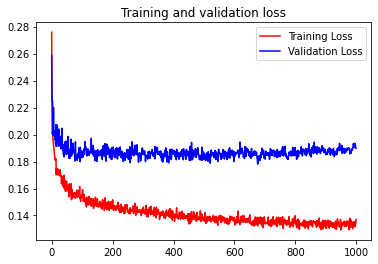

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('loss.png')
plt.show()


# Quantile = 0.95

In [34]:
model_upper = models.Sequential()
model_upper.add(layers.Dense(32, activation='relu', input_shape=(x_train.shape[1],)))
model_upper.add(layers.Dropout(0.3))
model_upper.add(layers.Dense(20 ,activation='relu'))
model_upper.add(layers.Dropout(0.3))
model_upper.add(layers.Dense(1,activation=keras.activations.softsign))
q = 0.95
model_upper.compile(loss=lambda y,f: tilted_loss(q,y,f), optimizer=keras.optimizers.SGD())

In [35]:
history_upper=model_upper.fit(x_train, y_train, epochs = 1000, batch_size = 8,validation_data=(x_test,y_test),callbacks=[lr_scheduler])

100%|██████████| 51/51 [00:00<00:00, 643.45it/s]


The value of K_z is  111.56354
Epoch 0 LR = 0.07548212268016015
Epoch 1/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.2332 - val_loss: 0.1886


100%|██████████| 51/51 [00:00<00:00, 605.80it/s]

The value of K_z is  111.56354
Epoch 1 LR = 0.07548212268016015
Epoch 2/1000
51/51 [==============================] - ETA: 0s - loss: 0.2054

51/51 [==============================] - 0s 3ms/step - loss: 0.2054 - val_loss: 0.1821


100%|██████████| 51/51 [00:00<00:00, 731.63it/s]

The value of K_z is  111.56354
Epoch 2 LR = 0.07548212268016015
Epoch 3/1000
49/51 [===========================>..] - ETA: 0s - loss: 0.1950

51/51 [==============================] - 0s 3ms/step - loss: 0.1952 - val_loss: 0.1790


100%|██████████| 51/51 [00:00<00:00, 739.15it/s]

The value of K_z is  111.56354
Epoch 3 LR = 0.07548212268016015
Epoch 4/1000
29/51 [================>.............] - ETA: 0s - loss: 0.1811

51/51 [==============================] - 0s 3ms/step - loss: 0.1951 - val_loss: 0.1762


100%|██████████| 51/51 [00:00<00:00, 726.48it/s]

The value of K_z is  111.56354
Epoch 4 LR = 0.07548212268016015
Epoch 5/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1891 - val_loss: 0.1742



100%|██████████| 51/51 [00:00<00:00, 762.85it/s]

The value of K_z is  111.56354
Epoch 5 LR = 0.07548212268016015
Epoch 6/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0510

51/51 [==============================] - 0s 3ms/step - loss: 0.1882 - val_loss: 0.1730


100%|██████████| 51/51 [00:00<00:00, 735.23it/s]

The value of K_z is  111.56354
Epoch 6 LR = 0.07548212268016015
Epoch 7/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1886 - val_loss: 0.1723



100%|██████████| 51/51 [00:00<00:00, 768.21it/s]


The value of K_z is  111.56354
Epoch 7 LR = 0.07548212268016015
Epoch 8/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1851 - val_loss: 0.1723


100%|██████████| 51/51 [00:00<00:00, 722.83it/s]

The value of K_z is  111.56354
Epoch 8 LR = 0.07548212268016015
Epoch 9/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1863 - val_loss: 0.1721



100%|██████████| 51/51 [00:00<00:00, 721.26it/s]

The value of K_z is  111.56354
Epoch 9 LR = 0.07548212268016015
Epoch 10/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1809 - val_loss: 0.1718



100%|██████████| 51/51 [00:00<00:00, 702.21it/s]

The value of K_z is  111.56354
Epoch 10 LR = 0.07548212268016015
Epoch 11/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1824 - val_loss: 0.1710



100%|██████████| 51/51 [00:00<00:00, 730.77it/s]

The value of K_z is  111.56354
Epoch 11 LR = 0.07548212268016015
Epoch 12/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1793 - val_loss: 0.1707



100%|██████████| 51/51 [00:00<00:00, 673.25it/s]

The value of K_z is  111.56354
Epoch 12 LR = 0.07548212268016015
Epoch 13/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1815 - val_loss: 0.1691



100%|██████████| 51/51 [00:00<00:00, 761.31it/s]

The value of K_z is  111.56354
Epoch 13 LR = 0.07548212268016015
Epoch 14/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1789 - val_loss: 0.1697



100%|██████████| 51/51 [00:00<00:00, 718.36it/s]

The value of K_z is  111.56354
Epoch 14 LR = 0.07548212268016015
Epoch 15/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1790 - val_loss: 0.1695



100%|██████████| 51/51 [00:00<00:00, 740.68it/s]

The value of K_z is  111.56354
Epoch 15 LR = 0.07548212268016015
Epoch 16/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1801 - val_loss: 0.1693



100%|██████████| 51/51 [00:00<00:00, 721.66it/s]

The value of K_z is  111.56354
Epoch 16 LR = 0.07548212268016015
Epoch 17/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1791 - val_loss: 0.1694



100%|██████████| 51/51 [00:00<00:00, 670.35it/s]

The value of K_z is  111.56354
Epoch 17 LR = 0.07548212268016015
Epoch 18/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1771 - val_loss: 0.1695



100%|██████████| 51/51 [00:00<00:00, 746.11it/s]

The value of K_z is  111.56354
Epoch 18 LR = 0.07548212268016015
Epoch 19/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1800 - val_loss: 0.1690



100%|██████████| 51/51 [00:00<00:00, 742.78it/s]

The value of K_z is  111.56354
Epoch 19 LR = 0.07548212268016015
Epoch 20/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1763 - val_loss: 0.1685



100%|██████████| 51/51 [00:00<00:00, 679.81it/s]

The value of K_z is  111.56354
Epoch 20 LR = 0.07548212268016015
Epoch 21/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1753 - val_loss: 0.1684



100%|██████████| 51/51 [00:00<00:00, 728.63it/s]


The value of K_z is  111.56354
Epoch 21 LR = 0.07548212268016015
Epoch 22/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1728 - val_loss: 0.1687


100%|██████████| 51/51 [00:00<00:00, 686.59it/s]

The value of K_z is  111.56354
Epoch 22 LR = 0.07548212268016015
Epoch 23/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1737 - val_loss: 0.1688



100%|██████████| 51/51 [00:00<00:00, 734.58it/s]


The value of K_z is  111.56354
Epoch 23 LR = 0.07548212268016015
Epoch 24/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1779 - val_loss: 0.1685


100%|██████████| 51/51 [00:00<00:00, 756.22it/s]

The value of K_z is  111.56354
Epoch 24 LR = 0.07548212268016015
Epoch 25/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1752 - val_loss: 0.1684



100%|██████████| 51/51 [00:00<00:00, 706.69it/s]


The value of K_z is  111.56354
Epoch 25 LR = 0.07548212268016015
Epoch 26/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1780 - val_loss: 0.1682


100%|██████████| 51/51 [00:00<00:00, 756.59it/s]

The value of K_z is  111.56354
Epoch 26 LR = 0.07548212268016015
Epoch 27/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1735 - val_loss: 0.1677



100%|██████████| 51/51 [00:00<00:00, 688.88it/s]

The value of K_z is  111.56354
Epoch 27 LR = 0.07548212268016015
Epoch 28/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1764 - val_loss: 0.1676



100%|██████████| 51/51 [00:00<00:00, 701.40it/s]

The value of K_z is  111.56354
Epoch 28 LR = 0.07548212268016015
Epoch 29/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1735 - val_loss: 0.1676



100%|██████████| 51/51 [00:00<00:00, 768.39it/s]

The value of K_z is  111.56354
Epoch 29 LR = 0.07548212268016015
Epoch 30/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0756

51/51 [==============================] - 0s 2ms/step - loss: 0.1729 - val_loss: 0.1675


100%|██████████| 51/51 [00:00<00:00, 711.94it/s]


The value of K_z is  111.56354
Epoch 30 LR = 0.07548212268016015
Epoch 31/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1729 - val_loss: 0.1671


100%|██████████| 51/51 [00:00<00:00, 718.50it/s]

The value of K_z is  111.56354
Epoch 31 LR = 0.07548212268016015
Epoch 32/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1784

51/51 [==============================] - 0s 2ms/step - loss: 0.1726 - val_loss: 0.1671


100%|██████████| 51/51 [00:00<00:00, 654.10it/s]

The value of K_z is  111.56354
Epoch 32 LR = 0.07548212268016015
Epoch 33/1000
29/51 [================>.............] - ETA: 0s - loss: 0.1927

51/51 [==============================] - 0s 2ms/step - loss: 0.1747 - val_loss: 0.1666


100%|██████████| 51/51 [00:00<00:00, 759.62it/s]


The value of K_z is  111.56354
Epoch 33 LR = 0.07548212268016015
Epoch 34/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1715 - val_loss: 0.1664


100%|██████████| 51/51 [00:00<00:00, 772.64it/s]


The value of K_z is  111.56354
Epoch 34 LR = 0.07548212268016015
Epoch 35/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1735 - val_loss: 0.1666


100%|██████████| 51/51 [00:00<00:00, 699.58it/s]

The value of K_z is  111.56354
Epoch 35 LR = 0.07548212268016015
Epoch 36/1000
26/51 [==============>...............] - ETA: 0s - loss: 0.1463

51/51 [==============================] - 0s 2ms/step - loss: 0.1738 - val_loss: 0.1665


100%|██████████| 51/51 [00:00<00:00, 751.98it/s]

The value of K_z is  111.56354
Epoch 36 LR = 0.07548212268016015
Epoch 37/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1711 - val_loss: 0.1661



100%|██████████| 51/51 [00:00<00:00, 667.11it/s]

The value of K_z is  111.56354
Epoch 37 LR = 0.07548212268016015
Epoch 38/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1717 - val_loss: 0.1659



100%|██████████| 51/51 [00:00<00:00, 761.25it/s]


The value of K_z is  111.56354
Epoch 38 LR = 0.07548212268016015
Epoch 39/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1738 - val_loss: 0.1661


100%|██████████| 51/51 [00:00<00:00, 775.23it/s]

The value of K_z is  111.56354
Epoch 39 LR = 0.07548212268016015
Epoch 40/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1863

51/51 [==============================] - 0s 2ms/step - loss: 0.1719 - val_loss: 0.1659


100%|██████████| 51/51 [00:00<00:00, 735.95it/s]

The value of K_z is  111.56354
Epoch 40 LR = 0.07548212268016015
Epoch 41/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2991

51/51 [==============================] - 0s 2ms/step - loss: 0.1716 - val_loss: 0.1655


100%|██████████| 51/51 [00:00<00:00, 745.89it/s]

The value of K_z is  111.56354
Epoch 41 LR = 0.07548212268016015
Epoch 42/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1789

51/51 [==============================] - 0s 2ms/step - loss: 0.1714 - val_loss: 0.1653


100%|██████████| 51/51 [00:00<00:00, 706.83it/s]

The value of K_z is  111.56354
Epoch 42 LR = 0.07548212268016015
Epoch 43/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1695 - val_loss: 0.1649



100%|██████████| 51/51 [00:00<00:00, 730.44it/s]

The value of K_z is  111.56354
Epoch 43 LR = 0.07548212268016015
Epoch 44/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1702 - val_loss: 0.1649



100%|██████████| 51/51 [00:00<00:00, 781.90it/s]

The value of K_z is  111.56354
Epoch 44 LR = 0.07548212268016015
Epoch 45/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0821

51/51 [==============================] - 0s 2ms/step - loss: 0.1688 - val_loss: 0.1647


100%|██████████| 51/51 [00:00<00:00, 682.51it/s]

The value of K_z is  111.56354
Epoch 45 LR = 0.07548212268016015
Epoch 46/1000
29/51 [================>.............] - ETA: 0s - loss: 0.1887

51/51 [==============================] - 0s 2ms/step - loss: 0.1697 - val_loss: 0.1648


100%|██████████| 51/51 [00:00<00:00, 742.66it/s]

The value of K_z is  111.56354
Epoch 46 LR = 0.07548212268016015
Epoch 47/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1681 - val_loss: 0.1649



100%|██████████| 51/51 [00:00<00:00, 715.77it/s]


The value of K_z is  111.56354
Epoch 47 LR = 0.07548212268016015
Epoch 48/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1685 - val_loss: 0.1646


100%|██████████| 51/51 [00:00<00:00, 766.60it/s]

The value of K_z is  111.56354
Epoch 48 LR = 0.07548212268016015
Epoch 49/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1683 - val_loss: 0.1643



100%|██████████| 51/51 [00:00<00:00, 767.75it/s]

The value of K_z is  111.56354
Epoch 49 LR = 0.07548212268016015
Epoch 50/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0509

51/51 [==============================] - 0s 2ms/step - loss: 0.1686 - val_loss: 0.1640


100%|██████████| 51/51 [00:00<00:00, 775.40it/s]

The value of K_z is  111.56354
Epoch 50 LR = 0.07548212268016015
Epoch 51/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1563

51/51 [==============================] - 0s 2ms/step - loss: 0.1692 - val_loss: 0.1642


100%|██████████| 51/51 [00:00<00:00, 746.92it/s]

The value of K_z is  111.56354
Epoch 51 LR = 0.07548212268016015
Epoch 52/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1697 - val_loss: 0.1640



100%|██████████| 51/51 [00:00<00:00, 775.46it/s]

The value of K_z is  111.56354
Epoch 52 LR = 0.07548212268016015
Epoch 53/1000
50/51 [============================>.] - ETA: 0s - loss: 0.1679

51/51 [==============================] - 0s 3ms/step - loss: 0.1680 - val_loss: 0.1638


100%|██████████| 51/51 [00:00<00:00, 774.15it/s]

The value of K_z is  111.56354
Epoch 53 LR = 0.07548212268016015
Epoch 54/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1677 - val_loss: 0.1639



100%|██████████| 51/51 [00:00<00:00, 765.78it/s]


The value of K_z is  111.56354
Epoch 54 LR = 0.07548212268016015
Epoch 55/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1686 - val_loss: 0.1634


100%|██████████| 51/51 [00:00<00:00, 757.56it/s]


The value of K_z is  111.56354
Epoch 55 LR = 0.07548212268016015
Epoch 56/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1688 - val_loss: 0.1634


100%|██████████| 51/51 [00:00<00:00, 736.49it/s]

The value of K_z is  111.56354
Epoch 56 LR = 0.07548212268016015
Epoch 57/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1649 - val_loss: 0.1635



100%|██████████| 51/51 [00:00<00:00, 745.52it/s]


The value of K_z is  111.56354
Epoch 57 LR = 0.07548212268016015
Epoch 58/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1696 - val_loss: 0.1635


100%|██████████| 51/51 [00:00<00:00, 742.58it/s]

The value of K_z is  111.56354
Epoch 58 LR = 0.07548212268016015
Epoch 59/1000
25/51 [=============>................] - ETA: 0s - loss: 0.1595

51/51 [==============================] - 0s 3ms/step - loss: 0.1715 - val_loss: 0.1632


100%|██████████| 51/51 [00:00<00:00, 756.01it/s]

The value of K_z is  111.56354
Epoch 59 LR = 0.07548212268016015
Epoch 60/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1663 - val_loss: 0.1631



100%|██████████| 51/51 [00:00<00:00, 757.59it/s]


The value of K_z is  111.56354
Epoch 60 LR = 0.07548212268016015
Epoch 61/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1675 - val_loss: 0.1630


100%|██████████| 51/51 [00:00<00:00, 766.73it/s]

The value of K_z is  111.56354
Epoch 61 LR = 0.07548212268016015
Epoch 62/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1669 - val_loss: 0.1628



100%|██████████| 51/51 [00:00<00:00, 730.85it/s]


The value of K_z is  111.56354
Epoch 62 LR = 0.07548212268016015
Epoch 63/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1680 - val_loss: 0.1627


100%|██████████| 51/51 [00:00<00:00, 761.20it/s]

The value of K_z is  111.56354
Epoch 63 LR = 0.07548212268016015
Epoch 64/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1667 - val_loss: 0.1628



100%|██████████| 51/51 [00:00<00:00, 738.13it/s]


The value of K_z is  111.56354
Epoch 64 LR = 0.07548212268016015
Epoch 65/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1674 - val_loss: 0.1627


100%|██████████| 51/51 [00:00<00:00, 745.39it/s]


The value of K_z is  111.56354
Epoch 65 LR = 0.07548212268016015
Epoch 66/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1669 - val_loss: 0.1628


100%|██████████| 51/51 [00:00<00:00, 749.39it/s]

The value of K_z is  111.56354
Epoch 66 LR = 0.07548212268016015
Epoch 67/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1648 - val_loss: 0.1629



100%|██████████| 51/51 [00:00<00:00, 765.89it/s]

The value of K_z is  111.56354
Epoch 67 LR = 0.07548212268016015
Epoch 68/1000
45/51 [=========================>....] - ETA: 0s - loss: 0.1779

51/51 [==============================] - 0s 3ms/step - loss: 0.1652 - val_loss: 0.1630


100%|██████████| 51/51 [00:00<00:00, 766.04it/s]

The value of K_z is  111.56354
Epoch 68 LR = 0.07548212268016015
Epoch 69/1000
48/51 [===========================>..] - ETA: 0s - loss: 0.1655

51/51 [==============================] - 0s 3ms/step - loss: 0.1638 - val_loss: 0.1630


100%|██████████| 51/51 [00:00<00:00, 754.55it/s]

The value of K_z is  111.56354
Epoch 69 LR = 0.07548212268016015
Epoch 70/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1645 - val_loss: 0.1629



100%|██████████| 51/51 [00:00<00:00, 705.32it/s]


The value of K_z is  111.56354
Epoch 70 LR = 0.07548212268016015
Epoch 71/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1654 - val_loss: 0.1627


100%|██████████| 51/51 [00:00<00:00, 730.86it/s]

The value of K_z is  111.56354
Epoch 71 LR = 0.07548212268016015
Epoch 72/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1644 - val_loss: 0.1628



100%|██████████| 51/51 [00:00<00:00, 755.15it/s]

The value of K_z is  111.56354
Epoch 72 LR = 0.07548212268016015
Epoch 73/1000
50/51 [============================>.] - ETA: 0s - loss: 0.1673

51/51 [==============================] - 0s 3ms/step - loss: 0.1667 - val_loss: 0.1627


100%|██████████| 51/51 [00:00<00:00, 725.49it/s]

The value of K_z is  111.56354
Epoch 73 LR = 0.07548212268016015
Epoch 74/1000
26/51 [==============>...............] - ETA: 0s - loss: 0.1400

51/51 [==============================] - 0s 2ms/step - loss: 0.1656 - val_loss: 0.1625


100%|██████████| 51/51 [00:00<00:00, 754.75it/s]

The value of K_z is  111.56354
Epoch 74 LR = 0.07548212268016015
Epoch 75/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1664 - val_loss: 0.1626



100%|██████████| 51/51 [00:00<00:00, 706.06it/s]


The value of K_z is  111.56354
Epoch 75 LR = 0.07548212268016015
Epoch 76/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1645 - val_loss: 0.1626


100%|██████████| 51/51 [00:00<00:00, 738.65it/s]

The value of K_z is  111.56354
Epoch 76 LR = 0.07548212268016015
Epoch 77/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1646 - val_loss: 0.1622



100%|██████████| 51/51 [00:00<00:00, 786.89it/s]

The value of K_z is  111.56354
Epoch 77 LR = 0.07548212268016015
Epoch 78/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0529

51/51 [==============================] - 0s 3ms/step - loss: 0.1648 - val_loss: 0.1622


100%|██████████| 51/51 [00:00<00:00, 779.12it/s]

The value of K_z is  111.56354
Epoch 78 LR = 0.07548212268016015
Epoch 79/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1656 - val_loss: 0.1623



100%|██████████| 51/51 [00:00<00:00, 773.05it/s]

The value of K_z is  111.56354
Epoch 79 LR = 0.07548212268016015
Epoch 80/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0430

51/51 [==============================] - 0s 2ms/step - loss: 0.1650 - val_loss: 0.1624


100%|██████████| 51/51 [00:00<00:00, 679.56it/s]

The value of K_z is  111.56354
Epoch 80 LR = 0.07548212268016015
Epoch 81/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1966

51/51 [==============================] - 0s 2ms/step - loss: 0.1659 - val_loss: 0.1624


100%|██████████| 51/51 [00:00<00:00, 744.50it/s]

The value of K_z is  111.56354
Epoch 81 LR = 0.07548212268016015
Epoch 82/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1669 - val_loss: 0.1624



100%|██████████| 51/51 [00:00<00:00, 757.33it/s]


The value of K_z is  111.56354
Epoch 82 LR = 0.07548212268016015
Epoch 83/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1640 - val_loss: 0.1623


100%|██████████| 51/51 [00:00<00:00, 757.34it/s]

The value of K_z is  111.56354
Epoch 83 LR = 0.07548212268016015
Epoch 84/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1646 - val_loss: 0.1623



100%|██████████| 51/51 [00:00<00:00, 745.07it/s]

The value of K_z is  111.56354
Epoch 84 LR = 0.07548212268016015
Epoch 85/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1057

51/51 [==============================] - 0s 2ms/step - loss: 0.1621 - val_loss: 0.1625


100%|██████████| 51/51 [00:00<00:00, 699.15it/s]

The value of K_z is  111.56354
Epoch 85 LR = 0.07548212268016015
Epoch 86/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1654 - val_loss: 0.1622



100%|██████████| 51/51 [00:00<00:00, 737.23it/s]


The value of K_z is  111.56354
Epoch 86 LR = 0.07548212268016015
Epoch 87/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1634 - val_loss: 0.1622


100%|██████████| 51/51 [00:00<00:00, 749.76it/s]

The value of K_z is  111.56354
Epoch 87 LR = 0.07548212268016015
Epoch 88/1000
51/51 [==============================] - ETA: 0s - loss: 0.1638

51/51 [==============================] - 0s 3ms/step - loss: 0.1638 - val_loss: 0.1618


100%|██████████| 51/51 [00:00<00:00, 742.40it/s]

The value of K_z is  111.56354
Epoch 88 LR = 0.07548212268016015
Epoch 89/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1658 - val_loss: 0.1616



100%|██████████| 51/51 [00:00<00:00, 748.99it/s]

The value of K_z is  111.56354
Epoch 89 LR = 0.07548212268016015
Epoch 90/1000
 1/51 [..............................] - ETA: 0s - loss: 0.4474

51/51 [==============================] - 0s 2ms/step - loss: 0.1669 - val_loss: 0.1610


100%|██████████| 51/51 [00:00<00:00, 711.60it/s]


The value of K_z is  111.56354
Epoch 90 LR = 0.07548212268016015
Epoch 91/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1647 - val_loss: 0.1611


100%|██████████| 51/51 [00:00<00:00, 725.10it/s]

The value of K_z is  111.56354
Epoch 91 LR = 0.07548212268016015
Epoch 92/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1644 - val_loss: 0.1612



100%|██████████| 51/51 [00:00<00:00, 776.20it/s]

The value of K_z is  111.56354
Epoch 92 LR = 0.07548212268016015
Epoch 93/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0269

51/51 [==============================] - 0s 2ms/step - loss: 0.1612 - val_loss: 0.1613


100%|██████████| 51/51 [00:00<00:00, 769.98it/s]

The value of K_z is  111.56354
Epoch 93 LR = 0.07548212268016015
Epoch 94/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1642 - val_loss: 0.1609



100%|██████████| 51/51 [00:00<00:00, 735.34it/s]


The value of K_z is  111.56354
Epoch 94 LR = 0.07548212268016015
Epoch 95/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1635 - val_loss: 0.1606


100%|██████████| 51/51 [00:00<00:00, 689.24it/s]

The value of K_z is  111.56354
Epoch 95 LR = 0.07548212268016015
Epoch 96/1000
29/51 [================>.............] - ETA: 0s - loss: 0.1593

51/51 [==============================] - 0s 2ms/step - loss: 0.1620 - val_loss: 0.1603


100%|██████████| 51/51 [00:00<00:00, 714.85it/s]

The value of K_z is  111.56354
Epoch 96 LR = 0.07548212268016015
Epoch 97/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1612 - val_loss: 0.1606



100%|██████████| 51/51 [00:00<00:00, 752.91it/s]


The value of K_z is  111.56354
Epoch 97 LR = 0.07548212268016015
Epoch 98/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1627 - val_loss: 0.1609


100%|██████████| 51/51 [00:00<00:00, 773.57it/s]

The value of K_z is  111.56354
Epoch 98 LR = 0.07548212268016015
Epoch 99/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1636 - val_loss: 0.1605



100%|██████████| 51/51 [00:00<00:00, 754.12it/s]

The value of K_z is  111.56354
Epoch 99 LR = 0.07548212268016015
Epoch 100/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1210

51/51 [==============================] - 0s 2ms/step - loss: 0.1641 - val_loss: 0.1602


100%|██████████| 51/51 [00:00<00:00, 705.52it/s]

The value of K_z is  111.56354
Epoch 100 LR = 0.07548212268016015
Epoch 101/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1598 - val_loss: 0.1601



100%|██████████| 51/51 [00:00<00:00, 741.43it/s]


The value of K_z is  111.56354
Epoch 101 LR = 0.07548212268016015
Epoch 102/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1626 - val_loss: 0.1601


100%|██████████| 51/51 [00:00<00:00, 732.82it/s]

The value of K_z is  111.56354
Epoch 102 LR = 0.07548212268016015
Epoch 103/1000
51/51 [==============================] - ETA: 0s - loss: 0.1652

51/51 [==============================] - 0s 3ms/step - loss: 0.1652 - val_loss: 0.1599


100%|██████████| 51/51 [00:00<00:00, 760.27it/s]

The value of K_z is  111.56354
Epoch 103 LR = 0.07548212268016015
Epoch 104/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1612 - val_loss: 0.1599



100%|██████████| 51/51 [00:00<00:00, 739.80it/s]


The value of K_z is  111.56354
Epoch 104 LR = 0.07548212268016015
Epoch 105/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1627 - val_loss: 0.1596


100%|██████████| 51/51 [00:00<00:00, 680.33it/s]

The value of K_z is  111.56354
Epoch 105 LR = 0.07548212268016015
Epoch 106/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1508

51/51 [==============================] - 0s 2ms/step - loss: 0.1652 - val_loss: 0.1595


100%|██████████| 51/51 [00:00<00:00, 760.89it/s]

The value of K_z is  111.56354
Epoch 106 LR = 0.07548212268016015
Epoch 107/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1630 - val_loss: 0.1595



100%|██████████| 51/51 [00:00<00:00, 710.44it/s]

The value of K_z is  111.56354
Epoch 107 LR = 0.07548212268016015
Epoch 108/1000
51/51 [==============================] - ETA: 0s - loss: 0.1619

51/51 [==============================] - 0s 3ms/step - loss: 0.1619 - val_loss: 0.1595


100%|██████████| 51/51 [00:00<00:00, 775.58it/s]

The value of K_z is  111.56354
Epoch 108 LR = 0.07548212268016015
Epoch 109/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1632 - val_loss: 0.1595



100%|██████████| 51/51 [00:00<00:00, 766.34it/s]

The value of K_z is  111.56354
Epoch 109 LR = 0.07548212268016015
Epoch 110/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0286

51/51 [==============================] - 0s 2ms/step - loss: 0.1625 - val_loss: 0.1592


100%|██████████| 51/51 [00:00<00:00, 712.13it/s]

The value of K_z is  111.56354
Epoch 110 LR = 0.07548212268016015
Epoch 111/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1638 - val_loss: 0.1598



100%|██████████| 51/51 [00:00<00:00, 749.12it/s]


The value of K_z is  111.56354
Epoch 111 LR = 0.07548212268016015
Epoch 112/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1628 - val_loss: 0.1595


100%|██████████| 51/51 [00:00<00:00, 768.35it/s]

The value of K_z is  111.56354
Epoch 112 LR = 0.07548212268016015
Epoch 113/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1123

51/51 [==============================] - 0s 3ms/step - loss: 0.1598 - val_loss: 0.1595


100%|██████████| 51/51 [00:00<00:00, 765.01it/s]

The value of K_z is  111.56354
Epoch 113 LR = 0.07548212268016015
Epoch 114/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1621 - val_loss: 0.1601



100%|██████████| 51/51 [00:00<00:00, 773.43it/s]

The value of K_z is  111.56354
Epoch 114 LR = 0.07548212268016015
Epoch 115/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2904

51/51 [==============================] - 0s 2ms/step - loss: 0.1626 - val_loss: 0.1595


100%|██████████| 51/51 [00:00<00:00, 721.97it/s]


The value of K_z is  111.56354
Epoch 115 LR = 0.07548212268016015
Epoch 116/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1626 - val_loss: 0.1601


100%|██████████| 51/51 [00:00<00:00, 747.68it/s]


The value of K_z is  111.56354
Epoch 116 LR = 0.07548212268016015
Epoch 117/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1612 - val_loss: 0.1603


100%|██████████| 51/51 [00:00<00:00, 723.86it/s]

The value of K_z is  111.56354
Epoch 117 LR = 0.07548212268016015
Epoch 118/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1287

51/51 [==============================] - 0s 3ms/step - loss: 0.1616 - val_loss: 0.1612


100%|██████████| 51/51 [00:00<00:00, 763.91it/s]

The value of K_z is  111.56354
Epoch 118 LR = 0.07548212268016015
Epoch 119/1000
47/51 [==========================>...] - ETA: 0s - loss: 0.1581

51/51 [==============================] - 0s 3ms/step - loss: 0.1594 - val_loss: 0.1617


100%|██████████| 51/51 [00:00<00:00, 726.40it/s]

The value of K_z is  111.56354
Epoch 119 LR = 0.07548212268016015
Epoch 120/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1579

51/51 [==============================] - 0s 3ms/step - loss: 0.1608 - val_loss: 0.1605


100%|██████████| 51/51 [00:00<00:00, 683.04it/s]

The value of K_z is  111.56354
Epoch 120 LR = 0.07548212268016015
Epoch 121/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1423

51/51 [==============================] - 0s 2ms/step - loss: 0.1616 - val_loss: 0.1613


100%|██████████| 51/51 [00:00<00:00, 742.54it/s]

The value of K_z is  111.56354
Epoch 121 LR = 0.07548212268016015
Epoch 122/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1597 - val_loss: 0.1605



100%|██████████| 51/51 [00:00<00:00, 746.93it/s]


The value of K_z is  111.56354
Epoch 122 LR = 0.07548212268016015
Epoch 123/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1602 - val_loss: 0.1602


100%|██████████| 51/51 [00:00<00:00, 765.85it/s]

The value of K_z is  111.56354
Epoch 123 LR = 0.07548212268016015
Epoch 124/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1622 - val_loss: 0.1601



100%|██████████| 51/51 [00:00<00:00, 725.73it/s]


The value of K_z is  111.56354
Epoch 124 LR = 0.07548212268016015
Epoch 125/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1602 - val_loss: 0.1604


100%|██████████| 51/51 [00:00<00:00, 688.32it/s]

The value of K_z is  111.56354
Epoch 125 LR = 0.07548212268016015
Epoch 126/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1796

51/51 [==============================] - 0s 3ms/step - loss: 0.1602 - val_loss: 0.1608


100%|██████████| 51/51 [00:00<00:00, 734.75it/s]

The value of K_z is  111.56354
Epoch 126 LR = 0.07548212268016015
Epoch 127/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1611 - val_loss: 0.1603



100%|██████████| 51/51 [00:00<00:00, 740.15it/s]


The value of K_z is  111.56354
Epoch 127 LR = 0.07548212268016015
Epoch 128/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1605 - val_loss: 0.1604


100%|██████████| 51/51 [00:00<00:00, 760.38it/s]

The value of K_z is  111.56354
Epoch 128 LR = 0.07548212268016015
Epoch 129/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1603 - val_loss: 0.1603



100%|██████████| 51/51 [00:00<00:00, 738.34it/s]


The value of K_z is  111.56354
Epoch 129 LR = 0.07548212268016015
Epoch 130/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1601 - val_loss: 0.1607


100%|██████████| 51/51 [00:00<00:00, 709.33it/s]

The value of K_z is  111.56354
Epoch 130 LR = 0.07548212268016015
Epoch 131/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1608 - val_loss: 0.1611



100%|██████████| 51/51 [00:00<00:00, 747.76it/s]

The value of K_z is  111.56354
Epoch 131 LR = 0.07548212268016015
Epoch 132/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1615 - val_loss: 0.1611



100%|██████████| 51/51 [00:00<00:00, 739.61it/s]

The value of K_z is  111.56354
Epoch 132 LR = 0.07548212268016015
Epoch 133/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1590 - val_loss: 0.1613



100%|██████████| 51/51 [00:00<00:00, 755.71it/s]

The value of K_z is  111.56354
Epoch 133 LR = 0.07548212268016015
Epoch 134/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1601 - val_loss: 0.1610



100%|██████████| 51/51 [00:00<00:00, 709.67it/s]


The value of K_z is  111.56354
Epoch 134 LR = 0.07548212268016015
Epoch 135/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1597 - val_loss: 0.1612


100%|██████████| 51/51 [00:00<00:00, 789.43it/s]

The value of K_z is  111.56354
Epoch 135 LR = 0.07548212268016015
Epoch 136/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1612 - val_loss: 0.1610



100%|██████████| 51/51 [00:00<00:00, 721.90it/s]

The value of K_z is  111.56354
Epoch 136 LR = 0.07548212268016015
Epoch 137/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1582 - val_loss: 0.1620



100%|██████████| 51/51 [00:00<00:00, 766.74it/s]

The value of K_z is  111.56354
Epoch 137 LR = 0.07548212268016015
Epoch 138/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2755

51/51 [==============================] - 0s 3ms/step - loss: 0.1581 - val_loss: 0.1619


100%|██████████| 51/51 [00:00<00:00, 653.93it/s]

The value of K_z is  111.56354
Epoch 138 LR = 0.07548212268016015
Epoch 139/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1755

51/51 [==============================] - 0s 2ms/step - loss: 0.1604 - val_loss: 0.1602


100%|██████████| 51/51 [00:00<00:00, 759.85it/s]


The value of K_z is  111.56354
Epoch 139 LR = 0.07548212268016015
Epoch 140/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1602 - val_loss: 0.1614


100%|██████████| 51/51 [00:00<00:00, 755.54it/s]

The value of K_z is  111.56354
Epoch 140 LR = 0.07548212268016015
Epoch 141/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1588 - val_loss: 0.1615



100%|██████████| 51/51 [00:00<00:00, 753.58it/s]

The value of K_z is  111.56354
Epoch 141 LR = 0.07548212268016015
Epoch 142/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1603 - val_loss: 0.1615



100%|██████████| 51/51 [00:00<00:00, 706.38it/s]

The value of K_z is  111.56354
Epoch 142 LR = 0.07548212268016015
Epoch 143/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1607 - val_loss: 0.1607



100%|██████████| 51/51 [00:00<00:00, 754.57it/s]

The value of K_z is  111.56354
Epoch 143 LR = 0.07548212268016015
Epoch 144/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1608 - val_loss: 0.1609



100%|██████████| 51/51 [00:00<00:00, 734.56it/s]


The value of K_z is  111.56354
Epoch 144 LR = 0.07548212268016015
Epoch 145/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1606 - val_loss: 0.1603


100%|██████████| 51/51 [00:00<00:00, 772.01it/s]

The value of K_z is  111.56354
Epoch 145 LR = 0.07548212268016015
Epoch 146/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1589 - val_loss: 0.1616



100%|██████████| 51/51 [00:00<00:00, 740.79it/s]

The value of K_z is  111.56354
Epoch 146 LR = 0.07548212268016015
Epoch 147/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1591 - val_loss: 0.1619



100%|██████████| 51/51 [00:00<00:00, 767.99it/s]

The value of K_z is  111.56354
Epoch 147 LR = 0.07548212268016015
Epoch 148/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0250

51/51 [==============================] - 0s 3ms/step - loss: 0.1579 - val_loss: 0.1614


100%|██████████| 51/51 [00:00<00:00, 725.22it/s]

The value of K_z is  111.56354
Epoch 148 LR = 0.07548212268016015
Epoch 149/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1585 - val_loss: 0.1613



100%|██████████| 51/51 [00:00<00:00, 731.60it/s]

The value of K_z is  111.56354
Epoch 149 LR = 0.07548212268016015
Epoch 150/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1811

51/51 [==============================] - 0s 3ms/step - loss: 0.1590 - val_loss: 0.1618


100%|██████████| 51/51 [00:00<00:00, 696.89it/s]

The value of K_z is  111.56354
Epoch 150 LR = 0.07548212268016015
Epoch 151/1000
25/51 [=============>................] - ETA: 0s - loss: 0.1405

51/51 [==============================] - 0s 3ms/step - loss: 0.1593 - val_loss: 0.1619


100%|██████████| 51/51 [00:00<00:00, 733.39it/s]

The value of K_z is  111.56354
Epoch 151 LR = 0.07548212268016015
Epoch 152/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1597 - val_loss: 0.1623



100%|██████████| 51/51 [00:00<00:00, 744.99it/s]


The value of K_z is  111.56354
Epoch 152 LR = 0.07548212268016015
Epoch 153/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1588 - val_loss: 0.1625


100%|██████████| 51/51 [00:00<00:00, 759.94it/s]

The value of K_z is  111.56354
Epoch 153 LR = 0.07548212268016015
Epoch 154/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1596 - val_loss: 0.1606



100%|██████████| 51/51 [00:00<00:00, 761.67it/s]


The value of K_z is  111.56354
Epoch 154 LR = 0.07548212268016015
Epoch 155/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1583 - val_loss: 0.1606


100%|██████████| 51/51 [00:00<00:00, 756.95it/s]

The value of K_z is  111.56354
Epoch 155 LR = 0.07548212268016015
Epoch 156/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1575 - val_loss: 0.1629



100%|██████████| 51/51 [00:00<00:00, 730.88it/s]

The value of K_z is  111.56354
Epoch 156 LR = 0.07548212268016015
Epoch 157/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1598 - val_loss: 0.1623



100%|██████████| 51/51 [00:00<00:00, 781.73it/s]

The value of K_z is  111.56354
Epoch 157 LR = 0.07548212268016015
Epoch 158/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0348

51/51 [==============================] - 0s 3ms/step - loss: 0.1582 - val_loss: 0.1615


100%|██████████| 51/51 [00:00<00:00, 745.40it/s]

The value of K_z is  111.56354
Epoch 158 LR = 0.07548212268016015
Epoch 159/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1576 - val_loss: 0.1631



100%|██████████| 51/51 [00:00<00:00, 760.08it/s]

The value of K_z is  111.56354
Epoch 159 LR = 0.07548212268016015
Epoch 160/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1589 - val_loss: 0.1634



100%|██████████| 51/51 [00:00<00:00, 738.12it/s]

The value of K_z is  111.56354
Epoch 160 LR = 0.07548212268016015
Epoch 161/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1591 - val_loss: 0.1626



100%|██████████| 51/51 [00:00<00:00, 756.59it/s]

The value of K_z is  111.56354
Epoch 161 LR = 0.07548212268016015
Epoch 162/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1608 - val_loss: 0.1633



100%|██████████| 51/51 [00:00<00:00, 781.93it/s]

The value of K_z is  111.56354
Epoch 162 LR = 0.07548212268016015
Epoch 163/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0303

51/51 [==============================] - 0s 3ms/step - loss: 0.1589 - val_loss: 0.1640


100%|██████████| 51/51 [00:00<00:00, 761.64it/s]

The value of K_z is  111.56354
Epoch 163 LR = 0.07548212268016015
Epoch 164/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1612 - val_loss: 0.1635



100%|██████████| 51/51 [00:00<00:00, 755.16it/s]

The value of K_z is  111.56354
Epoch 164 LR = 0.07548212268016015
Epoch 165/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0563

51/51 [==============================] - 0s 2ms/step - loss: 0.1589 - val_loss: 0.1631


100%|██████████| 51/51 [00:00<00:00, 723.14it/s]

The value of K_z is  111.56354
Epoch 165 LR = 0.07548212268016015
Epoch 166/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1575 - val_loss: 0.1645



100%|██████████| 51/51 [00:00<00:00, 734.27it/s]


The value of K_z is  111.56354
Epoch 166 LR = 0.07548212268016015
Epoch 167/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1574 - val_loss: 0.1645


100%|██████████| 51/51 [00:00<00:00, 716.40it/s]

The value of K_z is  111.56354
Epoch 167 LR = 0.07548212268016015
Epoch 168/1000
49/51 [===========================>..] - ETA: 0s - loss: 0.1536

51/51 [==============================] - 0s 3ms/step - loss: 0.1587 - val_loss: 0.1652


100%|██████████| 51/51 [00:00<00:00, 753.61it/s]

The value of K_z is  111.56354
Epoch 168 LR = 0.07548212268016015
Epoch 169/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1573 - val_loss: 0.1658



100%|██████████| 51/51 [00:00<00:00, 765.03it/s]

The value of K_z is  111.56354
Epoch 169 LR = 0.07548212268016015
Epoch 170/1000
 1/51 [..............................] - ETA: 0s - loss: 0.4570

51/51 [==============================] - 0s 3ms/step - loss: 0.1587 - val_loss: 0.1673


100%|██████████| 51/51 [00:00<00:00, 639.91it/s]

The value of K_z is  111.56354
Epoch 170 LR = 0.07548212268016015
Epoch 171/1000
50/51 [============================>.] - ETA: 0s - loss: 0.1555

51/51 [==============================] - 0s 3ms/step - loss: 0.1573 - val_loss: 0.1683


100%|██████████| 51/51 [00:00<00:00, 724.04it/s]

The value of K_z is  111.56354
Epoch 171 LR = 0.07548212268016015
Epoch 172/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1588 - val_loss: 0.1639



100%|██████████| 51/51 [00:00<00:00, 752.31it/s]

The value of K_z is  111.56354
Epoch 172 LR = 0.07548212268016015
Epoch 173/1000
49/51 [===========================>..] - ETA: 0s - loss: 0.1572

51/51 [==============================] - 0s 3ms/step - loss: 0.1563 - val_loss: 0.1631


100%|██████████| 51/51 [00:00<00:00, 691.21it/s]

The value of K_z is  111.56354
Epoch 173 LR = 0.07548212268016015
Epoch 174/1000
26/51 [==============>...............] - ETA: 0s - loss: 0.1718

51/51 [==============================] - 0s 2ms/step - loss: 0.1596 - val_loss: 0.1633


100%|██████████| 51/51 [00:00<00:00, 705.92it/s]

The value of K_z is  111.56354
Epoch 174 LR = 0.07548212268016015
Epoch 175/1000
25/51 [=============>................] - ETA: 0s - loss: 0.1327

51/51 [==============================] - 0s 3ms/step - loss: 0.1573 - val_loss: 0.1646


100%|██████████| 51/51 [00:00<00:00, 738.92it/s]

The value of K_z is  111.56354
Epoch 175 LR = 0.07548212268016015
Epoch 176/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1563 - val_loss: 0.1643



100%|██████████| 51/51 [00:00<00:00, 762.71it/s]


The value of K_z is  111.56354
Epoch 176 LR = 0.07548212268016015
Epoch 177/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1599 - val_loss: 0.1638


100%|██████████| 51/51 [00:00<00:00, 749.14it/s]


The value of K_z is  111.56354
Epoch 177 LR = 0.07548212268016015
Epoch 178/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1573 - val_loss: 0.1639


100%|██████████| 51/51 [00:00<00:00, 730.17it/s]

The value of K_z is  111.56354
Epoch 178 LR = 0.07548212268016015
Epoch 179/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1590 - val_loss: 0.1627



100%|██████████| 51/51 [00:00<00:00, 709.18it/s]


The value of K_z is  111.56354
Epoch 179 LR = 0.07548212268016015
Epoch 180/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1596 - val_loss: 0.1630


100%|██████████| 51/51 [00:00<00:00, 759.05it/s]

The value of K_z is  111.56354
Epoch 180 LR = 0.07548212268016015
Epoch 181/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1579 - val_loss: 0.1636



100%|██████████| 51/51 [00:00<00:00, 717.93it/s]


The value of K_z is  111.56354
Epoch 181 LR = 0.07548212268016015
Epoch 182/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1571 - val_loss: 0.1642


100%|██████████| 51/51 [00:00<00:00, 752.84it/s]


The value of K_z is  111.56354
Epoch 182 LR = 0.07548212268016015
Epoch 183/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1576 - val_loss: 0.1644


100%|██████████| 51/51 [00:00<00:00, 689.67it/s]

The value of K_z is  111.56354
Epoch 183 LR = 0.07548212268016015
Epoch 184/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1572

51/51 [==============================] - 0s 2ms/step - loss: 0.1571 - val_loss: 0.1626


100%|██████████| 51/51 [00:00<00:00, 693.02it/s]

The value of K_z is  111.56354
Epoch 184 LR = 0.07548212268016015
Epoch 185/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1296

51/51 [==============================] - 0s 2ms/step - loss: 0.1581 - val_loss: 0.1624


100%|██████████| 51/51 [00:00<00:00, 704.93it/s]

The value of K_z is  111.56354
Epoch 185 LR = 0.07548212268016015
Epoch 186/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1901

51/51 [==============================] - 0s 2ms/step - loss: 0.1555 - val_loss: 0.1648


100%|██████████| 51/51 [00:00<00:00, 751.93it/s]

The value of K_z is  111.56354
Epoch 186 LR = 0.07548212268016015
Epoch 187/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1611 - val_loss: 0.1638



100%|██████████| 51/51 [00:00<00:00, 745.02it/s]

The value of K_z is  111.56354
Epoch 187 LR = 0.07548212268016015
Epoch 188/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0275

51/51 [==============================] - 0s 3ms/step - loss: 0.1566 - val_loss: 0.1645


100%|██████████| 51/51 [00:00<00:00, 732.53it/s]

The value of K_z is  111.56354
Epoch 188 LR = 0.07548212268016015
Epoch 189/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1572 - val_loss: 0.1643



100%|██████████| 51/51 [00:00<00:00, 659.52it/s]

The value of K_z is  111.56354
Epoch 189 LR = 0.07548212268016015
Epoch 190/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1584 - val_loss: 0.1641



100%|██████████| 51/51 [00:00<00:00, 747.00it/s]


The value of K_z is  111.56354
Epoch 190 LR = 0.07548212268016015
Epoch 191/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1557 - val_loss: 0.1639


100%|██████████| 51/51 [00:00<00:00, 735.05it/s]

The value of K_z is  111.56354
Epoch 191 LR = 0.07548212268016015
Epoch 192/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1573 - val_loss: 0.1650



100%|██████████| 51/51 [00:00<00:00, 743.44it/s]

The value of K_z is  111.56354
Epoch 192 LR = 0.07548212268016015
Epoch 193/1000
26/51 [==============>...............] - ETA: 0s - loss: 0.1814

51/51 [==============================] - 0s 2ms/step - loss: 0.1553 - val_loss: 0.1655


100%|██████████| 51/51 [00:00<00:00, 711.82it/s]

The value of K_z is  111.56354
Epoch 193 LR = 0.07548212268016015
Epoch 194/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1559 - val_loss: 0.1670



100%|██████████| 51/51 [00:00<00:00, 699.77it/s]

The value of K_z is  111.56354
Epoch 194 LR = 0.07548212268016015
Epoch 195/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1576 - val_loss: 0.1650



100%|██████████| 51/51 [00:00<00:00, 656.03it/s]

The value of K_z is  111.56354
Epoch 195 LR = 0.07548212268016015
Epoch 196/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1625

51/51 [==============================] - 0s 2ms/step - loss: 0.1583 - val_loss: 0.1630


100%|██████████| 51/51 [00:00<00:00, 748.79it/s]

The value of K_z is  111.56354
Epoch 196 LR = 0.07548212268016015
Epoch 197/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1571 - val_loss: 0.1628



100%|██████████| 51/51 [00:00<00:00, 656.86it/s]

The value of K_z is  111.56354
Epoch 197 LR = 0.07548212268016015
Epoch 198/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1559 - val_loss: 0.1638



100%|██████████| 51/51 [00:00<00:00, 740.74it/s]

The value of K_z is  111.56354
Epoch 198 LR = 0.07548212268016015
Epoch 199/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1567 - val_loss: 0.1661



100%|██████████| 51/51 [00:00<00:00, 695.99it/s]

The value of K_z is  111.56354
Epoch 199 LR = 0.07548212268016015
Epoch 200/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1566 - val_loss: 0.1656



100%|██████████| 51/51 [00:00<00:00, 741.48it/s]


The value of K_z is  111.56354
Epoch 200 LR = 0.07548212268016015
Epoch 201/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1564 - val_loss: 0.1670


100%|██████████| 51/51 [00:00<00:00, 737.53it/s]

The value of K_z is  111.56354
Epoch 201 LR = 0.07548212268016015
Epoch 202/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1595 - val_loss: 0.1647



100%|██████████| 51/51 [00:00<00:00, 719.20it/s]

The value of K_z is  111.56354
Epoch 202 LR = 0.07548212268016015
Epoch 203/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1558 - val_loss: 0.1651



100%|██████████| 51/51 [00:00<00:00, 714.20it/s]

The value of K_z is  111.56354
Epoch 203 LR = 0.07548212268016015
Epoch 204/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1567 - val_loss: 0.1655



100%|██████████| 51/51 [00:00<00:00, 708.07it/s]

The value of K_z is  111.56354
Epoch 204 LR = 0.07548212268016015
Epoch 205/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1563 - val_loss: 0.1648



100%|██████████| 51/51 [00:00<00:00, 759.90it/s]


The value of K_z is  111.56354
Epoch 205 LR = 0.07548212268016015
Epoch 206/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1576 - val_loss: 0.1651


100%|██████████| 51/51 [00:00<00:00, 716.78it/s]

The value of K_z is  111.56354
Epoch 206 LR = 0.07548212268016015
Epoch 207/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1564 - val_loss: 0.1646



100%|██████████| 51/51 [00:00<00:00, 742.24it/s]


The value of K_z is  111.56354
Epoch 207 LR = 0.07548212268016015
Epoch 208/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1554 - val_loss: 0.1651


100%|██████████| 51/51 [00:00<00:00, 737.91it/s]

The value of K_z is  111.56354
Epoch 208 LR = 0.07548212268016015
Epoch 209/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1324

51/51 [==============================] - 0s 2ms/step - loss: 0.1566 - val_loss: 0.1650


100%|██████████| 51/51 [00:00<00:00, 701.40it/s]

The value of K_z is  111.56354
Epoch 209 LR = 0.07548212268016015
Epoch 210/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1557 - val_loss: 0.1655



100%|██████████| 51/51 [00:00<00:00, 761.50it/s]

The value of K_z is  111.56354
Epoch 210 LR = 0.07548212268016015
Epoch 211/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2567

51/51 [==============================] - 0s 2ms/step - loss: 0.1577 - val_loss: 0.1638


100%|██████████| 51/51 [00:00<00:00, 770.65it/s]


The value of K_z is  111.56354
Epoch 211 LR = 0.07548212268016015
Epoch 212/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1561 - val_loss: 0.1641


100%|██████████| 51/51 [00:00<00:00, 736.64it/s]

The value of K_z is  111.56354
Epoch 212 LR = 0.07548212268016015
Epoch 213/1000
50/51 [============================>.] - ETA: 0s - loss: 0.1576

51/51 [==============================] - 0s 3ms/step - loss: 0.1566 - val_loss: 0.1649


100%|██████████| 51/51 [00:00<00:00, 766.36it/s]

The value of K_z is  111.56354
Epoch 213 LR = 0.07548212268016015
Epoch 214/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1541 - val_loss: 0.1656



100%|██████████| 51/51 [00:00<00:00, 722.81it/s]


The value of K_z is  111.56354
Epoch 214 LR = 0.07548212268016015
Epoch 215/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1549 - val_loss: 0.1660


100%|██████████| 51/51 [00:00<00:00, 740.05it/s]

The value of K_z is  111.56354
Epoch 215 LR = 0.07548212268016015
Epoch 216/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1556 - val_loss: 0.1649



100%|██████████| 51/51 [00:00<00:00, 746.41it/s]

The value of K_z is  111.56354
Epoch 216 LR = 0.07548212268016015
Epoch 217/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1558 - val_loss: 0.1659



100%|██████████| 51/51 [00:00<00:00, 754.88it/s]


The value of K_z is  111.56354
Epoch 217 LR = 0.07548212268016015
Epoch 218/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1546 - val_loss: 0.1650


100%|██████████| 51/51 [00:00<00:00, 764.21it/s]

The value of K_z is  111.56354
Epoch 218 LR = 0.07548212268016015
Epoch 219/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1551 - val_loss: 0.1642



100%|██████████| 51/51 [00:00<00:00, 656.85it/s]

The value of K_z is  111.56354
Epoch 219 LR = 0.07548212268016015
Epoch 220/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1548 - val_loss: 0.1643



100%|██████████| 51/51 [00:00<00:00, 763.52it/s]


The value of K_z is  111.56354
Epoch 220 LR = 0.07548212268016015
Epoch 221/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1559 - val_loss: 0.1662


100%|██████████| 51/51 [00:00<00:00, 762.57it/s]


The value of K_z is  111.56354
Epoch 221 LR = 0.07548212268016015
Epoch 222/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1550 - val_loss: 0.1656


100%|██████████| 51/51 [00:00<00:00, 603.31it/s]

The value of K_z is  111.56354
Epoch 222 LR = 0.07548212268016015
Epoch 223/1000
51/51 [==============================] - ETA: 0s - loss: 0.1565

51/51 [==============================] - 0s 3ms/step - loss: 0.1565 - val_loss: 0.1654


100%|██████████| 51/51 [00:00<00:00, 708.63it/s]

The value of K_z is  111.56354
Epoch 223 LR = 0.07548212268016015
Epoch 224/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1752

51/51 [==============================] - 0s 2ms/step - loss: 0.1570 - val_loss: 0.1653


100%|██████████| 51/51 [00:00<00:00, 757.40it/s]

The value of K_z is  111.56354
Epoch 224 LR = 0.07548212268016015
Epoch 225/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1561 - val_loss: 0.1644



100%|██████████| 51/51 [00:00<00:00, 749.91it/s]


The value of K_z is  111.56354
Epoch 225 LR = 0.07548212268016015
Epoch 226/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1556 - val_loss: 0.1664


100%|██████████| 51/51 [00:00<00:00, 764.49it/s]


The value of K_z is  111.56354
Epoch 226 LR = 0.07548212268016015
Epoch 227/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1561 - val_loss: 0.1663


100%|██████████| 51/51 [00:00<00:00, 763.25it/s]

The value of K_z is  111.56354
Epoch 227 LR = 0.07548212268016015
Epoch 228/1000
26/51 [==============>...............] - ETA: 0s - loss: 0.1484

51/51 [==============================] - 0s 2ms/step - loss: 0.1569 - val_loss: 0.1641


100%|██████████| 51/51 [00:00<00:00, 748.05it/s]

The value of K_z is  111.56354
Epoch 228 LR = 0.07548212268016015
Epoch 229/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1864

51/51 [==============================] - 0s 3ms/step - loss: 0.1554 - val_loss: 0.1650


100%|██████████| 51/51 [00:00<00:00, 741.11it/s]

The value of K_z is  111.56354
Epoch 229 LR = 0.07548212268016015
Epoch 230/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1566 - val_loss: 0.1643



100%|██████████| 51/51 [00:00<00:00, 757.27it/s]


The value of K_z is  111.56354
Epoch 230 LR = 0.07548212268016015
Epoch 231/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1558 - val_loss: 0.1647


100%|██████████| 51/51 [00:00<00:00, 728.75it/s]


The value of K_z is  111.56354
Epoch 231 LR = 0.07548212268016015
Epoch 232/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1566 - val_loss: 0.1654


100%|██████████| 51/51 [00:00<00:00, 738.46it/s]


The value of K_z is  111.56354
Epoch 232 LR = 0.07548212268016015
Epoch 233/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1551 - val_loss: 0.1660


100%|██████████| 51/51 [00:00<00:00, 741.05it/s]

The value of K_z is  111.56354
Epoch 233 LR = 0.07548212268016015
Epoch 234/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1538 - val_loss: 0.1661



100%|██████████| 51/51 [00:00<00:00, 752.87it/s]

The value of K_z is  111.56354
Epoch 234 LR = 0.07548212268016015
Epoch 235/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1568 - val_loss: 0.1649



100%|██████████| 51/51 [00:00<00:00, 709.51it/s]

The value of K_z is  111.56354
Epoch 235 LR = 0.07548212268016015
Epoch 236/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1555 - val_loss: 0.1648



100%|██████████| 51/51 [00:00<00:00, 762.91it/s]

The value of K_z is  111.56354
Epoch 236 LR = 0.07548212268016015
Epoch 237/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0223

51/51 [==============================] - 0s 2ms/step - loss: 0.1553 - val_loss: 0.1657


100%|██████████| 51/51 [00:00<00:00, 737.05it/s]

The value of K_z is  111.56354
Epoch 237 LR = 0.07548212268016015
Epoch 238/1000
51/51 [==============================] - ETA: 0s - loss: 0.1560

51/51 [==============================] - 0s 3ms/step - loss: 0.1560 - val_loss: 0.1648


100%|██████████| 51/51 [00:00<00:00, 765.02it/s]

The value of K_z is  111.56354
Epoch 238 LR = 0.07548212268016015
Epoch 239/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1558 - val_loss: 0.1648



100%|██████████| 51/51 [00:00<00:00, 745.23it/s]

The value of K_z is  111.56354
Epoch 239 LR = 0.07548212268016015
Epoch 240/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1557 - val_loss: 0.1647



100%|██████████| 51/51 [00:00<00:00, 752.53it/s]


The value of K_z is  111.56354
Epoch 240 LR = 0.07548212268016015
Epoch 241/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1574 - val_loss: 0.1642


100%|██████████| 51/51 [00:00<00:00, 765.29it/s]


The value of K_z is  111.56354
Epoch 241 LR = 0.07548212268016015
Epoch 242/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1576 - val_loss: 0.1637


100%|██████████| 51/51 [00:00<00:00, 748.80it/s]

The value of K_z is  111.56354
Epoch 242 LR = 0.07548212268016015
Epoch 243/1000
24/51 [=============>................] - ETA: 0s - loss: 0.1295

51/51 [==============================] - 0s 3ms/step - loss: 0.1560 - val_loss: 0.1647


100%|██████████| 51/51 [00:00<00:00, 771.43it/s]

The value of K_z is  111.56354
Epoch 243 LR = 0.07548212268016015
Epoch 244/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1540 - val_loss: 0.1671



100%|██████████| 51/51 [00:00<00:00, 759.27it/s]

The value of K_z is  111.56354
Epoch 244 LR = 0.07548212268016015
Epoch 245/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1558 - val_loss: 0.1649



100%|██████████| 51/51 [00:00<00:00, 782.15it/s]


The value of K_z is  111.56354
Epoch 245 LR = 0.07548212268016015
Epoch 246/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1548 - val_loss: 0.1659


100%|██████████| 51/51 [00:00<00:00, 767.11it/s]

The value of K_z is  111.56354
Epoch 246 LR = 0.07548212268016015
Epoch 247/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1561 - val_loss: 0.1654



100%|██████████| 51/51 [00:00<00:00, 776.09it/s]

The value of K_z is  111.56354
Epoch 247 LR = 0.07548212268016015
Epoch 248/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0237

51/51 [==============================] - 0s 3ms/step - loss: 0.1538 - val_loss: 0.1664


100%|██████████| 51/51 [00:00<00:00, 739.82it/s]

The value of K_z is  111.56354
Epoch 248 LR = 0.07548212268016015
Epoch 249/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1568 - val_loss: 0.1656



100%|██████████| 51/51 [00:00<00:00, 757.86it/s]

The value of K_z is  111.56354
Epoch 249 LR = 0.07548212268016015
Epoch 250/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1546 - val_loss: 0.1663



100%|██████████| 51/51 [00:00<00:00, 767.37it/s]

The value of K_z is  111.56354
Epoch 250 LR = 0.07548212268016015
Epoch 251/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0872

51/51 [==============================] - 0s 2ms/step - loss: 0.1545 - val_loss: 0.1658


100%|██████████| 51/51 [00:00<00:00, 772.27it/s]

The value of K_z is  111.56354
Epoch 251 LR = 0.07548212268016015
Epoch 252/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1033

51/51 [==============================] - 0s 2ms/step - loss: 0.1552 - val_loss: 0.1635


100%|██████████| 51/51 [00:00<00:00, 766.25it/s]


The value of K_z is  111.56354
Epoch 252 LR = 0.07548212268016015
Epoch 253/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1555 - val_loss: 0.1642


100%|██████████| 51/51 [00:00<00:00, 740.87it/s]

The value of K_z is  111.56354
Epoch 253 LR = 0.07548212268016015
Epoch 254/1000
29/51 [================>.............] - ETA: 0s - loss: 0.1543

51/51 [==============================] - 0s 3ms/step - loss: 0.1556 - val_loss: 0.1642


100%|██████████| 51/51 [00:00<00:00, 735.34it/s]

The value of K_z is  111.56354
Epoch 254 LR = 0.07548212268016015
Epoch 255/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1543 - val_loss: 0.1641



100%|██████████| 51/51 [00:00<00:00, 767.37it/s]

The value of K_z is  111.56354
Epoch 255 LR = 0.07548212268016015
Epoch 256/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0260

51/51 [==============================] - 0s 2ms/step - loss: 0.1550 - val_loss: 0.1644


100%|██████████| 51/51 [00:00<00:00, 761.97it/s]

The value of K_z is  111.56354
Epoch 256 LR = 0.07548212268016015
Epoch 257/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1546 - val_loss: 0.1643



100%|██████████| 51/51 [00:00<00:00, 763.29it/s]

The value of K_z is  111.56354
Epoch 257 LR = 0.07548212268016015
Epoch 258/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2845

51/51 [==============================] - 0s 3ms/step - loss: 0.1565 - val_loss: 0.1642


100%|██████████| 51/51 [00:00<00:00, 752.73it/s]

The value of K_z is  111.56354
Epoch 258 LR = 0.07548212268016015
Epoch 259/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1563 - val_loss: 0.1631



100%|██████████| 51/51 [00:00<00:00, 736.85it/s]

The value of K_z is  111.56354
Epoch 259 LR = 0.07548212268016015
Epoch 260/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1548 - val_loss: 0.1638



100%|██████████| 51/51 [00:00<00:00, 756.30it/s]

The value of K_z is  111.56354
Epoch 260 LR = 0.07548212268016015
Epoch 261/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1560 - val_loss: 0.1629



100%|██████████| 51/51 [00:00<00:00, 675.74it/s]

The value of K_z is  111.56354
Epoch 261 LR = 0.07548212268016015
Epoch 262/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1557 - val_loss: 0.1633



100%|██████████| 51/51 [00:00<00:00, 770.31it/s]


The value of K_z is  111.56354
Epoch 262 LR = 0.07548212268016015
Epoch 263/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1546 - val_loss: 0.1646


100%|██████████| 51/51 [00:00<00:00, 765.94it/s]

The value of K_z is  111.56354
Epoch 263 LR = 0.07548212268016015
Epoch 264/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1560 - val_loss: 0.1642



100%|██████████| 51/51 [00:00<00:00, 764.08it/s]

The value of K_z is  111.56354
Epoch 264 LR = 0.07548212268016015
Epoch 265/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1552 - val_loss: 0.1644



100%|██████████| 51/51 [00:00<00:00, 767.94it/s]

The value of K_z is  111.56354
Epoch 265 LR = 0.07548212268016015
Epoch 266/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0311

51/51 [==============================] - 0s 3ms/step - loss: 0.1556 - val_loss: 0.1642


100%|██████████| 51/51 [00:00<00:00, 752.21it/s]

The value of K_z is  111.56354
Epoch 266 LR = 0.07548212268016015
Epoch 267/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1554 - val_loss: 0.1657



100%|██████████| 51/51 [00:00<00:00, 749.10it/s]

The value of K_z is  111.56354
Epoch 267 LR = 0.07548212268016015
Epoch 268/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0311

51/51 [==============================] - 0s 3ms/step - loss: 0.1546 - val_loss: 0.1662


100%|██████████| 51/51 [00:00<00:00, 731.49it/s]

The value of K_z is  111.56354
Epoch 268 LR = 0.07548212268016015
Epoch 269/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1543 - val_loss: 0.1656



100%|██████████| 51/51 [00:00<00:00, 772.96it/s]


The value of K_z is  111.56354
Epoch 269 LR = 0.07548212268016015
Epoch 270/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1553 - val_loss: 0.1653


100%|██████████| 51/51 [00:00<00:00, 771.91it/s]

The value of K_z is  111.56354
Epoch 270 LR = 0.07548212268016015
Epoch 271/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1544 - val_loss: 0.1647



100%|██████████| 51/51 [00:00<00:00, 766.20it/s]


The value of K_z is  111.56354
Epoch 271 LR = 0.07548212268016015
Epoch 272/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1544 - val_loss: 0.1646


100%|██████████| 51/51 [00:00<00:00, 726.17it/s]

The value of K_z is  111.56354
Epoch 272 LR = 0.07548212268016015
Epoch 273/1000
51/51 [==============================] - ETA: 0s - loss: 0.1548

51/51 [==============================] - 0s 3ms/step - loss: 0.1548 - val_loss: 0.1637


100%|██████████| 51/51 [00:00<00:00, 754.71it/s]

The value of K_z is  111.56354
Epoch 273 LR = 0.07548212268016015
Epoch 274/1000
29/51 [================>.............] - ETA: 0s - loss: 0.1520

51/51 [==============================] - 0s 3ms/step - loss: 0.1540 - val_loss: 0.1637


100%|██████████| 51/51 [00:00<00:00, 747.24it/s]

The value of K_z is  111.56354
Epoch 274 LR = 0.07548212268016015
Epoch 275/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1560 - val_loss: 0.1640



100%|██████████| 51/51 [00:00<00:00, 750.78it/s]

The value of K_z is  111.56354
Epoch 275 LR = 0.07548212268016015
Epoch 276/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1560 - val_loss: 0.1638



100%|██████████| 51/51 [00:00<00:00, 756.62it/s]


The value of K_z is  111.56354
Epoch 276 LR = 0.07548212268016015
Epoch 277/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1561 - val_loss: 0.1634


100%|██████████| 51/51 [00:00<00:00, 769.18it/s]

The value of K_z is  111.56354
Epoch 277 LR = 0.07548212268016015
Epoch 278/1000
50/51 [============================>.] - ETA: 0s - loss: 0.1558

51/51 [==============================] - 0s 3ms/step - loss: 0.1552 - val_loss: 0.1637


100%|██████████| 51/51 [00:00<00:00, 749.84it/s]

The value of K_z is  111.56354
Epoch 278 LR = 0.07548212268016015
Epoch 279/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1547 - val_loss: 0.1639



100%|██████████| 51/51 [00:00<00:00, 763.58it/s]


The value of K_z is  111.56354
Epoch 279 LR = 0.07548212268016015
Epoch 280/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1551 - val_loss: 0.1651


100%|██████████| 51/51 [00:00<00:00, 765.38it/s]

The value of K_z is  111.56354
Epoch 280 LR = 0.07548212268016015
Epoch 281/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1543 - val_loss: 0.1666



100%|██████████| 51/51 [00:00<00:00, 732.27it/s]

The value of K_z is  111.56354
Epoch 281 LR = 0.07548212268016015
Epoch 282/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1560 - val_loss: 0.1652



100%|██████████| 51/51 [00:00<00:00, 733.37it/s]

The value of K_z is  111.56354
Epoch 282 LR = 0.07548212268016015
Epoch 283/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1558 - val_loss: 0.1642



100%|██████████| 51/51 [00:00<00:00, 724.18it/s]

The value of K_z is  111.56354
Epoch 283 LR = 0.07548212268016015
Epoch 284/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1545 - val_loss: 0.1656



100%|██████████| 51/51 [00:00<00:00, 726.41it/s]

The value of K_z is  111.56354
Epoch 284 LR = 0.07548212268016015
Epoch 285/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1547 - val_loss: 0.1653



100%|██████████| 51/51 [00:00<00:00, 771.63it/s]


The value of K_z is  111.56354
Epoch 285 LR = 0.07548212268016015
Epoch 286/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1532 - val_loss: 0.1657


100%|██████████| 51/51 [00:00<00:00, 715.50it/s]

The value of K_z is  111.56354
Epoch 286 LR = 0.07548212268016015
Epoch 287/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1566 - val_loss: 0.1655



100%|██████████| 51/51 [00:00<00:00, 752.24it/s]


The value of K_z is  111.56354
Epoch 287 LR = 0.07548212268016015
Epoch 288/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1552 - val_loss: 0.1648


100%|██████████| 51/51 [00:00<00:00, 736.15it/s]

The value of K_z is  111.56354
Epoch 288 LR = 0.07548212268016015
Epoch 289/1000
25/51 [=============>................] - ETA: 0s - loss: 0.1358

51/51 [==============================] - 0s 3ms/step - loss: 0.1539 - val_loss: 0.1659


100%|██████████| 51/51 [00:00<00:00, 740.99it/s]

The value of K_z is  111.56354
Epoch 289 LR = 0.07548212268016015
Epoch 290/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1549 - val_loss: 0.1660



100%|██████████| 51/51 [00:00<00:00, 727.10it/s]

The value of K_z is  111.56354
Epoch 290 LR = 0.07548212268016015
Epoch 291/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1551 - val_loss: 0.1653



100%|██████████| 51/51 [00:00<00:00, 715.82it/s]

The value of K_z is  111.56354
Epoch 291 LR = 0.07548212268016015
Epoch 292/1000
51/51 [==============================] - ETA: 0s - loss: 0.1547

51/51 [==============================] - 0s 3ms/step - loss: 0.1547 - val_loss: 0.1654


100%|██████████| 51/51 [00:00<00:00, 643.20it/s]

The value of K_z is  111.56354
Epoch 292 LR = 0.07548212268016015
Epoch 293/1000
26/51 [==============>...............] - ETA: 0s - loss: 0.1541

51/51 [==============================] - 0s 3ms/step - loss: 0.1555 - val_loss: 0.1647


100%|██████████| 51/51 [00:00<00:00, 731.85it/s]

The value of K_z is  111.56354
Epoch 293 LR = 0.07548212268016015
Epoch 294/1000
26/51 [==============>...............] - ETA: 0s - loss: 0.1616

51/51 [==============================] - 0s 3ms/step - loss: 0.1549 - val_loss: 0.1649


100%|██████████| 51/51 [00:00<00:00, 737.46it/s]

The value of K_z is  111.56354
Epoch 294 LR = 0.07548212268016015
Epoch 295/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1547 - val_loss: 0.1653



100%|██████████| 51/51 [00:00<00:00, 759.88it/s]


The value of K_z is  111.56354
Epoch 295 LR = 0.07548212268016015
Epoch 296/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1538 - val_loss: 0.1659


100%|██████████| 51/51 [00:00<00:00, 690.70it/s]

The value of K_z is  111.56354
Epoch 296 LR = 0.07548212268016015
Epoch 297/1000
29/51 [================>.............] - ETA: 0s - loss: 0.1376

51/51 [==============================] - 0s 2ms/step - loss: 0.1550 - val_loss: 0.1671


100%|██████████| 51/51 [00:00<00:00, 701.84it/s]

The value of K_z is  111.56354
Epoch 297 LR = 0.07548212268016015
Epoch 298/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1269

51/51 [==============================] - 0s 2ms/step - loss: 0.1523 - val_loss: 0.1672


100%|██████████| 51/51 [00:00<00:00, 736.05it/s]

The value of K_z is  111.56354
Epoch 298 LR = 0.07548212268016015
Epoch 299/1000
26/51 [==============>...............] - ETA: 0s - loss: 0.1243

51/51 [==============================] - 0s 2ms/step - loss: 0.1533 - val_loss: 0.1659


100%|██████████| 51/51 [00:00<00:00, 751.98it/s]

The value of K_z is  111.56354
Epoch 299 LR = 0.07548212268016015
Epoch 300/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1549 - val_loss: 0.1663



100%|██████████| 51/51 [00:00<00:00, 742.61it/s]


The value of K_z is  111.56354
Epoch 300 LR = 0.07548212268016015
Epoch 301/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1557 - val_loss: 0.1662


100%|██████████| 51/51 [00:00<00:00, 772.06it/s]

The value of K_z is  111.56354
Epoch 301 LR = 0.07548212268016015
Epoch 302/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1545 - val_loss: 0.1658



100%|██████████| 51/51 [00:00<00:00, 759.83it/s]


The value of K_z is  111.56354
Epoch 302 LR = 0.07548212268016015
Epoch 303/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1539 - val_loss: 0.1656


100%|██████████| 51/51 [00:00<00:00, 777.34it/s]

The value of K_z is  111.56354
Epoch 303 LR = 0.07548212268016015
Epoch 304/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1536 - val_loss: 0.1647



100%|██████████| 51/51 [00:00<00:00, 778.04it/s]


The value of K_z is  111.56354
Epoch 304 LR = 0.07548212268016015
Epoch 305/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1528 - val_loss: 0.1667


100%|██████████| 51/51 [00:00<00:00, 745.49it/s]

The value of K_z is  111.56354
Epoch 305 LR = 0.07548212268016015
Epoch 306/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1533 - val_loss: 0.1652



100%|██████████| 51/51 [00:00<00:00, 748.61it/s]

The value of K_z is  111.56354
Epoch 306 LR = 0.07548212268016015
Epoch 307/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1541 - val_loss: 0.1646



100%|██████████| 51/51 [00:00<00:00, 703.57it/s]

The value of K_z is  111.56354
Epoch 307 LR = 0.07548212268016015
Epoch 308/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1541 - val_loss: 0.1645



100%|██████████| 51/51 [00:00<00:00, 688.89it/s]

The value of K_z is  111.56354
Epoch 308 LR = 0.07548212268016015
Epoch 309/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1559 - val_loss: 0.1649



100%|██████████| 51/51 [00:00<00:00, 733.91it/s]

The value of K_z is  111.56354
Epoch 309 LR = 0.07548212268016015
Epoch 310/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1554 - val_loss: 0.1644



100%|██████████| 51/51 [00:00<00:00, 746.01it/s]


The value of K_z is  111.56354
Epoch 310 LR = 0.07548212268016015
Epoch 311/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1541 - val_loss: 0.1633


100%|██████████| 51/51 [00:00<00:00, 687.69it/s]

The value of K_z is  111.56354
Epoch 311 LR = 0.07548212268016015
Epoch 312/1000
29/51 [================>.............] - ETA: 0s - loss: 0.1753

51/51 [==============================] - 0s 2ms/step - loss: 0.1543 - val_loss: 0.1640


100%|██████████| 51/51 [00:00<00:00, 670.34it/s]

The value of K_z is  111.56354
Epoch 312 LR = 0.07548212268016015
Epoch 313/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1543 - val_loss: 0.1647



100%|██████████| 51/51 [00:00<00:00, 675.86it/s]

The value of K_z is  111.56354
Epoch 313 LR = 0.07548212268016015
Epoch 314/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1537 - val_loss: 0.1644



100%|██████████| 51/51 [00:00<00:00, 742.18it/s]


The value of K_z is  111.56354
Epoch 314 LR = 0.07548212268016015
Epoch 315/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1541 - val_loss: 0.1644


100%|██████████| 51/51 [00:00<00:00, 760.33it/s]


The value of K_z is  111.56354
Epoch 315 LR = 0.07548212268016015
Epoch 316/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1538 - val_loss: 0.1638


100%|██████████| 51/51 [00:00<00:00, 764.36it/s]

The value of K_z is  111.56354
Epoch 316 LR = 0.07548212268016015
Epoch 317/1000
 1/51 [..............................] - ETA: 0s - loss: 0.5008

51/51 [==============================] - 0s 2ms/step - loss: 0.1545 - val_loss: 0.1655


100%|██████████| 51/51 [00:00<00:00, 640.20it/s]

The value of K_z is  111.56354
Epoch 317 LR = 0.07548212268016015
Epoch 318/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1424

51/51 [==============================] - 0s 2ms/step - loss: 0.1556 - val_loss: 0.1650


100%|██████████| 51/51 [00:00<00:00, 703.92it/s]

The value of K_z is  111.56354
Epoch 318 LR = 0.07548212268016015
Epoch 319/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1532 - val_loss: 0.1653



100%|██████████| 51/51 [00:00<00:00, 744.60it/s]

The value of K_z is  111.56354
Epoch 319 LR = 0.07548212268016015
Epoch 320/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0252

51/51 [==============================] - 0s 2ms/step - loss: 0.1532 - val_loss: 0.1654


100%|██████████| 51/51 [00:00<00:00, 767.94it/s]

The value of K_z is  111.56354
Epoch 320 LR = 0.07548212268016015
Epoch 321/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2921

51/51 [==============================] - 0s 2ms/step - loss: 0.1534 - val_loss: 0.1657


100%|██████████| 51/51 [00:00<00:00, 751.12it/s]


The value of K_z is  111.56354
Epoch 321 LR = 0.07548212268016015
Epoch 322/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1541 - val_loss: 0.1645


100%|██████████| 51/51 [00:00<00:00, 753.17it/s]

The value of K_z is  111.56354
Epoch 322 LR = 0.07548212268016015
Epoch 323/1000
48/51 [===========================>..] - ETA: 0s - loss: 0.1525

51/51 [==============================] - 0s 3ms/step - loss: 0.1536 - val_loss: 0.1641


100%|██████████| 51/51 [00:00<00:00, 688.27it/s]

The value of K_z is  111.56354
Epoch 323 LR = 0.07548212268016015
Epoch 324/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1547 - val_loss: 0.1643



100%|██████████| 51/51 [00:00<00:00, 760.85it/s]


The value of K_z is  111.56354
Epoch 324 LR = 0.07548212268016015
Epoch 325/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1551 - val_loss: 0.1647


100%|██████████| 51/51 [00:00<00:00, 634.07it/s]

The value of K_z is  111.56354
Epoch 325 LR = 0.07548212268016015
Epoch 326/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1638

51/51 [==============================] - 0s 2ms/step - loss: 0.1541 - val_loss: 0.1646


100%|██████████| 51/51 [00:00<00:00, 743.61it/s]


The value of K_z is  111.56354
Epoch 326 LR = 0.07548212268016015
Epoch 327/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1533 - val_loss: 0.1636


100%|██████████| 51/51 [00:00<00:00, 776.28it/s]


The value of K_z is  111.56354
Epoch 327 LR = 0.07548212268016015
Epoch 328/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1534 - val_loss: 0.1644


100%|██████████| 51/51 [00:00<00:00, 661.04it/s]

The value of K_z is  111.56354
Epoch 328 LR = 0.07548212268016015
Epoch 329/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1579

51/51 [==============================] - 0s 2ms/step - loss: 0.1539 - val_loss: 0.1653


100%|██████████| 51/51 [00:00<00:00, 774.78it/s]

The value of K_z is  111.56354
Epoch 329 LR = 0.07548212268016015
Epoch 330/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1548 - val_loss: 0.1647



100%|██████████| 51/51 [00:00<00:00, 745.37it/s]

The value of K_z is  111.56354
Epoch 330 LR = 0.07548212268016015
Epoch 331/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0512

51/51 [==============================] - 0s 2ms/step - loss: 0.1538 - val_loss: 0.1640


100%|██████████| 51/51 [00:00<00:00, 744.69it/s]


The value of K_z is  111.56354
Epoch 331 LR = 0.07548212268016015
Epoch 332/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1558 - val_loss: 0.1649


100%|██████████| 51/51 [00:00<00:00, 778.52it/s]


The value of K_z is  111.56354
Epoch 332 LR = 0.07548212268016015
Epoch 333/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1535 - val_loss: 0.1661


100%|██████████| 51/51 [00:00<00:00, 705.49it/s]

The value of K_z is  111.56354
Epoch 333 LR = 0.07548212268016015
Epoch 334/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1550 - val_loss: 0.1648



100%|██████████| 51/51 [00:00<00:00, 752.16it/s]


The value of K_z is  111.56354
Epoch 334 LR = 0.07548212268016015
Epoch 335/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1549 - val_loss: 0.1657


100%|██████████| 51/51 [00:00<00:00, 758.06it/s]

The value of K_z is  111.56354
Epoch 335 LR = 0.07548212268016015
Epoch 336/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1536 - val_loss: 0.1667



100%|██████████| 51/51 [00:00<00:00, 756.45it/s]


The value of K_z is  111.56354
Epoch 336 LR = 0.07548212268016015
Epoch 337/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1545 - val_loss: 0.1653


100%|██████████| 51/51 [00:00<00:00, 767.78it/s]

The value of K_z is  111.56354
Epoch 337 LR = 0.07548212268016015
Epoch 338/1000
50/51 [============================>.] - ETA: 0s - loss: 0.1526

51/51 [==============================] - 0s 3ms/step - loss: 0.1560 - val_loss: 0.1659


100%|██████████| 51/51 [00:00<00:00, 693.63it/s]

The value of K_z is  111.56354
Epoch 338 LR = 0.07548212268016015
Epoch 339/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1536 - val_loss: 0.1655



100%|██████████| 51/51 [00:00<00:00, 750.83it/s]


The value of K_z is  111.56354
Epoch 339 LR = 0.07548212268016015
Epoch 340/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1527 - val_loss: 0.1655


100%|██████████| 51/51 [00:00<00:00, 754.48it/s]


The value of K_z is  111.56354
Epoch 340 LR = 0.07548212268016015
Epoch 341/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1543 - val_loss: 0.1655


100%|██████████| 51/51 [00:00<00:00, 659.93it/s]

The value of K_z is  111.56354
Epoch 341 LR = 0.07548212268016015
Epoch 342/1000
29/51 [================>.............] - ETA: 0s - loss: 0.1215

51/51 [==============================] - 0s 2ms/step - loss: 0.1540 - val_loss: 0.1664


100%|██████████| 51/51 [00:00<00:00, 729.18it/s]


The value of K_z is  111.56354
Epoch 342 LR = 0.07548212268016015
Epoch 343/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1542 - val_loss: 0.1667


100%|██████████| 51/51 [00:00<00:00, 739.14it/s]

The value of K_z is  111.56354
Epoch 343 LR = 0.07548212268016015
Epoch 344/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1542 - val_loss: 0.1645



100%|██████████| 51/51 [00:00<00:00, 742.64it/s]


The value of K_z is  111.56354
Epoch 344 LR = 0.07548212268016015
Epoch 345/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1547 - val_loss: 0.1645


100%|██████████| 51/51 [00:00<00:00, 734.49it/s]

The value of K_z is  111.56354
Epoch 345 LR = 0.07548212268016015
Epoch 346/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1528 - val_loss: 0.1665



100%|██████████| 51/51 [00:00<00:00, 750.07it/s]


The value of K_z is  111.56354
Epoch 346 LR = 0.07548212268016015
Epoch 347/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1555 - val_loss: 0.1659


100%|██████████| 51/51 [00:00<00:00, 727.60it/s]

The value of K_z is  111.56354
Epoch 347 LR = 0.07548212268016015
Epoch 348/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1703

51/51 [==============================] - 0s 3ms/step - loss: 0.1550 - val_loss: 0.1644


100%|██████████| 51/51 [00:00<00:00, 749.11it/s]

The value of K_z is  111.56354
Epoch 348 LR = 0.07548212268016015
Epoch 349/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1541 - val_loss: 0.1654



100%|██████████| 51/51 [00:00<00:00, 712.62it/s]

The value of K_z is  111.56354
Epoch 349 LR = 0.07548212268016015
Epoch 350/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1558 - val_loss: 0.1654



100%|██████████| 51/51 [00:00<00:00, 736.29it/s]

The value of K_z is  111.56354
Epoch 350 LR = 0.07548212268016015
Epoch 351/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1440

51/51 [==============================] - 0s 2ms/step - loss: 0.1543 - val_loss: 0.1661


100%|██████████| 51/51 [00:00<00:00, 713.69it/s]

The value of K_z is  111.56354
Epoch 351 LR = 0.07548212268016015
Epoch 352/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1536 - val_loss: 0.1656



100%|██████████| 51/51 [00:00<00:00, 691.46it/s]

The value of K_z is  111.56354
Epoch 352 LR = 0.07548212268016015
Epoch 353/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1530 - val_loss: 0.1657



100%|██████████| 51/51 [00:00<00:00, 730.79it/s]

The value of K_z is  111.56354
Epoch 353 LR = 0.07548212268016015
Epoch 354/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1537 - val_loss: 0.1663



100%|██████████| 51/51 [00:00<00:00, 747.71it/s]


The value of K_z is  111.56354
Epoch 354 LR = 0.07548212268016015
Epoch 355/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1545 - val_loss: 0.1661


100%|██████████| 51/51 [00:00<00:00, 725.05it/s]

The value of K_z is  111.56354
Epoch 355 LR = 0.07548212268016015
Epoch 356/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1549 - val_loss: 0.1653



100%|██████████| 51/51 [00:00<00:00, 738.85it/s]

The value of K_z is  111.56354
Epoch 356 LR = 0.07548212268016015
Epoch 357/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1543 - val_loss: 0.1653



100%|██████████| 51/51 [00:00<00:00, 660.85it/s]

The value of K_z is  111.56354
Epoch 357 LR = 0.07548212268016015
Epoch 358/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1544 - val_loss: 0.1654



100%|██████████| 51/51 [00:00<00:00, 731.95it/s]

The value of K_z is  111.56354
Epoch 358 LR = 0.07548212268016015
Epoch 359/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1544 - val_loss: 0.1649



100%|██████████| 51/51 [00:00<00:00, 690.47it/s]

The value of K_z is  111.56354
Epoch 359 LR = 0.07548212268016015
Epoch 360/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1524 - val_loss: 0.1656



100%|██████████| 51/51 [00:00<00:00, 731.10it/s]


The value of K_z is  111.56354
Epoch 360 LR = 0.07548212268016015
Epoch 361/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1537 - val_loss: 0.1650


100%|██████████| 51/51 [00:00<00:00, 734.16it/s]

The value of K_z is  111.56354
Epoch 361 LR = 0.07548212268016015
Epoch 362/1000
29/51 [================>.............] - ETA: 0s - loss: 0.1121

51/51 [==============================] - 0s 3ms/step - loss: 0.1533 - val_loss: 0.1653


100%|██████████| 51/51 [00:00<00:00, 640.78it/s]

The value of K_z is  111.56354
Epoch 362 LR = 0.07548212268016015
Epoch 363/1000
26/51 [==============>...............] - ETA: 0s - loss: 0.1685

51/51 [==============================] - 0s 2ms/step - loss: 0.1543 - val_loss: 0.1642


100%|██████████| 51/51 [00:00<00:00, 739.94it/s]

The value of K_z is  111.56354
Epoch 363 LR = 0.07548212268016015
Epoch 364/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1536 - val_loss: 0.1654



100%|██████████| 51/51 [00:00<00:00, 736.48it/s]

The value of K_z is  111.56354
Epoch 364 LR = 0.07548212268016015
Epoch 365/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1552 - val_loss: 0.1655



100%|██████████| 51/51 [00:00<00:00, 749.68it/s]


The value of K_z is  111.56354
Epoch 365 LR = 0.07548212268016015
Epoch 366/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1536 - val_loss: 0.1659


100%|██████████| 51/51 [00:00<00:00, 752.23it/s]

The value of K_z is  111.56354
Epoch 366 LR = 0.07548212268016015
Epoch 367/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1535 - val_loss: 0.1635



100%|██████████| 51/51 [00:00<00:00, 647.92it/s]

The value of K_z is  111.56354
Epoch 367 LR = 0.07548212268016015
Epoch 368/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1534 - val_loss: 0.1640



100%|██████████| 51/51 [00:00<00:00, 700.16it/s]

The value of K_z is  111.56354
Epoch 368 LR = 0.07548212268016015
Epoch 369/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1517 - val_loss: 0.1650



100%|██████████| 51/51 [00:00<00:00, 721.96it/s]

The value of K_z is  111.56354
Epoch 369 LR = 0.07548212268016015
Epoch 370/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1525 - val_loss: 0.1650



100%|██████████| 51/51 [00:00<00:00, 709.42it/s]

The value of K_z is  111.56354
Epoch 370 LR = 0.07548212268016015
Epoch 371/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1552 - val_loss: 0.1645



100%|██████████| 51/51 [00:00<00:00, 732.01it/s]

The value of K_z is  111.56354
Epoch 371 LR = 0.07548212268016015
Epoch 372/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1534 - val_loss: 0.1649



100%|██████████| 51/51 [00:00<00:00, 681.61it/s]

The value of K_z is  111.56354
Epoch 372 LR = 0.07548212268016015
Epoch 373/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1541 - val_loss: 0.1637



100%|██████████| 51/51 [00:00<00:00, 728.14it/s]

The value of K_z is  111.56354
Epoch 373 LR = 0.07548212268016015
Epoch 374/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1530 - val_loss: 0.1644



100%|██████████| 51/51 [00:00<00:00, 712.55it/s]

The value of K_z is  111.56354
Epoch 374 LR = 0.07548212268016015
Epoch 375/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1540 - val_loss: 0.1650



100%|██████████| 51/51 [00:00<00:00, 714.01it/s]

The value of K_z is  111.56354
Epoch 375 LR = 0.07548212268016015
Epoch 376/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1525 - val_loss: 0.1668



100%|██████████| 51/51 [00:00<00:00, 664.34it/s]

The value of K_z is  111.56354
Epoch 376 LR = 0.07548212268016015
Epoch 377/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1542 - val_loss: 0.1664



100%|██████████| 51/51 [00:00<00:00, 648.52it/s]

The value of K_z is  111.56354
Epoch 377 LR = 0.07548212268016015
Epoch 378/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1541 - val_loss: 0.1652



100%|██████████| 51/51 [00:00<00:00, 754.10it/s]

The value of K_z is  111.56354
Epoch 378 LR = 0.07548212268016015
Epoch 379/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1539 - val_loss: 0.1659



100%|██████████| 51/51 [00:00<00:00, 751.65it/s]


The value of K_z is  111.56354
Epoch 379 LR = 0.07548212268016015
Epoch 380/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1531 - val_loss: 0.1652


100%|██████████| 51/51 [00:00<00:00, 727.97it/s]

The value of K_z is  111.56354
Epoch 380 LR = 0.07548212268016015
Epoch 381/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1528 - val_loss: 0.1657



100%|██████████| 51/51 [00:00<00:00, 737.18it/s]


The value of K_z is  111.56354
Epoch 381 LR = 0.07548212268016015
Epoch 382/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1520 - val_loss: 0.1671


100%|██████████| 51/51 [00:00<00:00, 670.71it/s]

The value of K_z is  111.56354
Epoch 382 LR = 0.07548212268016015
Epoch 383/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1276

51/51 [==============================] - 0s 2ms/step - loss: 0.1533 - val_loss: 0.1640


100%|██████████| 51/51 [00:00<00:00, 735.46it/s]

The value of K_z is  111.56354
Epoch 383 LR = 0.07548212268016015
Epoch 384/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1473

51/51 [==============================] - 0s 2ms/step - loss: 0.1538 - val_loss: 0.1641


100%|██████████| 51/51 [00:00<00:00, 721.65it/s]

The value of K_z is  111.56354
Epoch 384 LR = 0.07548212268016015
Epoch 385/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1530 - val_loss: 0.1652



100%|██████████| 51/51 [00:00<00:00, 716.46it/s]

The value of K_z is  111.56354
Epoch 385 LR = 0.07548212268016015
Epoch 386/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1590

51/51 [==============================] - 0s 2ms/step - loss: 0.1546 - val_loss: 0.1652


100%|██████████| 51/51 [00:00<00:00, 749.65it/s]

The value of K_z is  111.56354
Epoch 386 LR = 0.07548212268016015
Epoch 387/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1533 - val_loss: 0.1647



100%|██████████| 51/51 [00:00<00:00, 636.39it/s]

The value of K_z is  111.56354
Epoch 387 LR = 0.07548212268016015
Epoch 388/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1281

51/51 [==============================] - 0s 3ms/step - loss: 0.1540 - val_loss: 0.1654


100%|██████████| 51/51 [00:00<00:00, 748.12it/s]

The value of K_z is  111.56354
Epoch 388 LR = 0.07548212268016015
Epoch 389/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1535 - val_loss: 0.1656



100%|██████████| 51/51 [00:00<00:00, 695.76it/s]

The value of K_z is  111.56354
Epoch 389 LR = 0.07548212268016015
Epoch 390/1000
25/51 [=============>................] - ETA: 0s - loss: 0.1460

51/51 [==============================] - 0s 3ms/step - loss: 0.1540 - val_loss: 0.1659


100%|██████████| 51/51 [00:00<00:00, 782.75it/s]

The value of K_z is  111.56354
Epoch 390 LR = 0.07548212268016015
Epoch 391/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1515 - val_loss: 0.1654



100%|██████████| 51/51 [00:00<00:00, 729.81it/s]


The value of K_z is  111.56354
Epoch 391 LR = 0.07548212268016015
Epoch 392/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1552 - val_loss: 0.1661


100%|██████████| 51/51 [00:00<00:00, 759.98it/s]

The value of K_z is  111.56354
Epoch 392 LR = 0.07548212268016015
Epoch 393/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1545 - val_loss: 0.1663



100%|██████████| 51/51 [00:00<00:00, 712.38it/s]


The value of K_z is  111.56354
Epoch 393 LR = 0.07548212268016015
Epoch 394/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1523 - val_loss: 0.1662


100%|██████████| 51/51 [00:00<00:00, 743.67it/s]

The value of K_z is  111.56354
Epoch 394 LR = 0.07548212268016015
Epoch 395/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1527 - val_loss: 0.1646



100%|██████████| 51/51 [00:00<00:00, 723.40it/s]


The value of K_z is  111.56354
Epoch 395 LR = 0.07548212268016015
Epoch 396/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1523 - val_loss: 0.1651


100%|██████████| 51/51 [00:00<00:00, 733.94it/s]

The value of K_z is  111.56354
Epoch 396 LR = 0.07548212268016015
Epoch 397/1000
30/51 [================>.............] - ETA: 0s - loss: 0.1384

51/51 [==============================] - 0s 3ms/step - loss: 0.1529 - val_loss: 0.1651


100%|██████████| 51/51 [00:00<00:00, 758.12it/s]

The value of K_z is  111.56354
Epoch 397 LR = 0.07548212268016015
Epoch 398/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1528 - val_loss: 0.1653



100%|██████████| 51/51 [00:00<00:00, 739.51it/s]

The value of K_z is  111.56354
Epoch 398 LR = 0.07548212268016015
Epoch 399/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1548 - val_loss: 0.1645



100%|██████████| 51/51 [00:00<00:00, 733.45it/s]

The value of K_z is  111.56354
Epoch 399 LR = 0.07548212268016015
Epoch 400/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1540 - val_loss: 0.1652



100%|██████████| 51/51 [00:00<00:00, 665.83it/s]


The value of K_z is  111.56354
Epoch 400 LR = 0.07548212268016015
Epoch 401/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1543 - val_loss: 0.1646


100%|██████████| 51/51 [00:00<00:00, 755.03it/s]

The value of K_z is  111.56354
Epoch 401 LR = 0.07548212268016015
Epoch 402/1000
49/51 [===========================>..] - ETA: 0s - loss: 0.1569

51/51 [==============================] - 0s 3ms/step - loss: 0.1533 - val_loss: 0.1640


100%|██████████| 51/51 [00:00<00:00, 729.74it/s]

The value of K_z is  111.56354
Epoch 402 LR = 0.07548212268016015
Epoch 403/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1524 - val_loss: 0.1654



100%|██████████| 51/51 [00:00<00:00, 743.63it/s]


The value of K_z is  111.56354
Epoch 403 LR = 0.07548212268016015
Epoch 404/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1533 - val_loss: 0.1662


100%|██████████| 51/51 [00:00<00:00, 708.91it/s]

The value of K_z is  111.56354
Epoch 404 LR = 0.07548212268016015
Epoch 405/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1530 - val_loss: 0.1655



100%|██████████| 51/51 [00:00<00:00, 750.13it/s]


The value of K_z is  111.56354
Epoch 405 LR = 0.07548212268016015
Epoch 406/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1530 - val_loss: 0.1661


100%|██████████| 51/51 [00:00<00:00, 711.17it/s]

The value of K_z is  111.56354
Epoch 406 LR = 0.07548212268016015
Epoch 407/1000
47/51 [==========================>...] - ETA: 0s - loss: 0.1606

51/51 [==============================] - 0s 3ms/step - loss: 0.1532 - val_loss: 0.1628


100%|██████████| 51/51 [00:00<00:00, 747.70it/s]

The value of K_z is  111.56354
Epoch 407 LR = 0.07548212268016015
Epoch 408/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1529 - val_loss: 0.1640



100%|██████████| 51/51 [00:00<00:00, 758.97it/s]


The value of K_z is  111.56354
Epoch 408 LR = 0.07548212268016015
Epoch 409/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1524 - val_loss: 0.1633


100%|██████████| 51/51 [00:00<00:00, 747.32it/s]

The value of K_z is  111.56354
Epoch 409 LR = 0.07548212268016015
Epoch 410/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1538 - val_loss: 0.1631



100%|██████████| 51/51 [00:00<00:00, 746.08it/s]


The value of K_z is  111.56354
Epoch 410 LR = 0.07548212268016015
Epoch 411/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1546 - val_loss: 0.1637


100%|██████████| 51/51 [00:00<00:00, 723.24it/s]

The value of K_z is  111.56354
Epoch 411 LR = 0.07548212268016015
Epoch 412/1000
49/51 [===========================>..] - ETA: 0s - loss: 0.1547

51/51 [==============================] - 0s 3ms/step - loss: 0.1535 - val_loss: 0.1642


100%|██████████| 51/51 [00:00<00:00, 655.04it/s]

The value of K_z is  111.56354
Epoch 412 LR = 0.07548212268016015
Epoch 413/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1644

51/51 [==============================] - 0s 2ms/step - loss: 0.1538 - val_loss: 0.1654


100%|██████████| 51/51 [00:00<00:00, 737.60it/s]


The value of K_z is  111.56354
Epoch 413 LR = 0.07548212268016015
Epoch 414/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1538 - val_loss: 0.1635


100%|██████████| 51/51 [00:00<00:00, 751.99it/s]

The value of K_z is  111.56354
Epoch 414 LR = 0.07548212268016015
Epoch 415/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1525 - val_loss: 0.1644



100%|██████████| 51/51 [00:00<00:00, 750.43it/s]

The value of K_z is  111.56354
Epoch 415 LR = 0.07548212268016015
Epoch 416/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1118

51/51 [==============================] - 0s 2ms/step - loss: 0.1517 - val_loss: 0.1650


100%|██████████| 51/51 [00:00<00:00, 738.62it/s]


The value of K_z is  111.56354
Epoch 416 LR = 0.07548212268016015
Epoch 417/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1522 - val_loss: 0.1634


100%|██████████| 51/51 [00:00<00:00, 736.83it/s]

The value of K_z is  111.56354
Epoch 417 LR = 0.07548212268016015
Epoch 418/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1527 - val_loss: 0.1643



100%|██████████| 51/51 [00:00<00:00, 702.42it/s]

The value of K_z is  111.56354
Epoch 418 LR = 0.07548212268016015
Epoch 419/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1521 - val_loss: 0.1644



100%|██████████| 51/51 [00:00<00:00, 735.57it/s]


The value of K_z is  111.56354
Epoch 419 LR = 0.07548212268016015
Epoch 420/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1530 - val_loss: 0.1662


100%|██████████| 51/51 [00:00<00:00, 712.86it/s]

The value of K_z is  111.56354
Epoch 420 LR = 0.07548212268016015
Epoch 421/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1536 - val_loss: 0.1645



100%|██████████| 51/51 [00:00<00:00, 747.64it/s]


The value of K_z is  111.56354
Epoch 421 LR = 0.07548212268016015
Epoch 422/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1548 - val_loss: 0.1639


100%|██████████| 51/51 [00:00<00:00, 701.50it/s]

The value of K_z is  111.56354
Epoch 422 LR = 0.07548212268016015
Epoch 423/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1800

51/51 [==============================] - 0s 2ms/step - loss: 0.1540 - val_loss: 0.1631


100%|██████████| 51/51 [00:00<00:00, 763.56it/s]

The value of K_z is  111.56354
Epoch 423 LR = 0.07548212268016015
Epoch 424/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1536 - val_loss: 0.1647



100%|██████████| 51/51 [00:00<00:00, 751.77it/s]

The value of K_z is  111.56354
Epoch 424 LR = 0.07548212268016015
Epoch 425/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0327

51/51 [==============================] - 0s 2ms/step - loss: 0.1541 - val_loss: 0.1645


100%|██████████| 51/51 [00:00<00:00, 751.56it/s]

The value of K_z is  111.56354
Epoch 425 LR = 0.07548212268016015
Epoch 426/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1527 - val_loss: 0.1648



100%|██████████| 51/51 [00:00<00:00, 757.96it/s]

The value of K_z is  111.56354
Epoch 426 LR = 0.07548212268016015
Epoch 427/1000
 1/51 [..............................] - ETA: 0s - loss: 0.3965

51/51 [==============================] - 0s 3ms/step - loss: 0.1526 - val_loss: 0.1643


100%|██████████| 51/51 [00:00<00:00, 750.77it/s]

The value of K_z is  111.56354
Epoch 427 LR = 0.07548212268016015
Epoch 428/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1518 - val_loss: 0.1654



100%|██████████| 51/51 [00:00<00:00, 660.53it/s]

The value of K_z is  111.56354
Epoch 428 LR = 0.07548212268016015
Epoch 429/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1521 - val_loss: 0.1635



100%|██████████| 51/51 [00:00<00:00, 745.75it/s]


The value of K_z is  111.56354
Epoch 429 LR = 0.07548212268016015
Epoch 430/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1522 - val_loss: 0.1645


100%|██████████| 51/51 [00:00<00:00, 736.15it/s]

The value of K_z is  111.56354
Epoch 430 LR = 0.07548212268016015
Epoch 431/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1526 - val_loss: 0.1636



100%|██████████| 51/51 [00:00<00:00, 717.18it/s]


The value of K_z is  111.56354
Epoch 431 LR = 0.07548212268016015
Epoch 432/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1527 - val_loss: 0.1634


100%|██████████| 51/51 [00:00<00:00, 736.45it/s]

The value of K_z is  111.56354
Epoch 432 LR = 0.07548212268016015
Epoch 433/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1522 - val_loss: 0.1635



100%|██████████| 51/51 [00:00<00:00, 711.89it/s]

The value of K_z is  111.56354
Epoch 433 LR = 0.07548212268016015
Epoch 434/1000
51/51 [==============================] - ETA: 0s - loss: 0.1527

51/51 [==============================] - 0s 3ms/step - loss: 0.1527 - val_loss: 0.1644


100%|██████████| 51/51 [00:00<00:00, 752.07it/s]

The value of K_z is  111.56354
Epoch 434 LR = 0.07548212268016015
Epoch 435/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1529 - val_loss: 0.1650



100%|██████████| 51/51 [00:00<00:00, 740.48it/s]


The value of K_z is  111.56354
Epoch 435 LR = 0.07548212268016015
Epoch 436/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1526 - val_loss: 0.1646


100%|██████████| 51/51 [00:00<00:00, 689.77it/s]

The value of K_z is  111.56354
Epoch 436 LR = 0.07548212268016015
Epoch 437/1000
51/51 [==============================] - ETA: 0s - loss: 0.1536

51/51 [==============================] - 0s 3ms/step - loss: 0.1536 - val_loss: 0.1649


100%|██████████| 51/51 [00:00<00:00, 690.55it/s]

The value of K_z is  111.56354
Epoch 437 LR = 0.07548212268016015
Epoch 438/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1483

51/51 [==============================] - 0s 2ms/step - loss: 0.1529 - val_loss: 0.1647


100%|██████████| 51/51 [00:00<00:00, 730.70it/s]

The value of K_z is  111.56354
Epoch 438 LR = 0.07548212268016015
Epoch 439/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1540 - val_loss: 0.1636



100%|██████████| 51/51 [00:00<00:00, 693.06it/s]


The value of K_z is  111.56354
Epoch 439 LR = 0.07548212268016015
Epoch 440/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1515 - val_loss: 0.1651


100%|██████████| 51/51 [00:00<00:00, 752.83it/s]


The value of K_z is  111.56354
Epoch 440 LR = 0.07548212268016015
Epoch 441/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1544 - val_loss: 0.1642


100%|██████████| 51/51 [00:00<00:00, 708.30it/s]

The value of K_z is  111.56354
Epoch 441 LR = 0.07548212268016015
Epoch 442/1000
25/51 [=============>................] - ETA: 0s - loss: 0.1350

51/51 [==============================] - 0s 3ms/step - loss: 0.1524 - val_loss: 0.1639


100%|██████████| 51/51 [00:00<00:00, 721.11it/s]

The value of K_z is  111.56354
Epoch 442 LR = 0.07548212268016015
Epoch 443/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1527 - val_loss: 0.1636



100%|██████████| 51/51 [00:00<00:00, 735.64it/s]


The value of K_z is  111.56354
Epoch 443 LR = 0.07548212268016015
Epoch 444/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1523 - val_loss: 0.1648


100%|██████████| 51/51 [00:00<00:00, 739.42it/s]

The value of K_z is  111.56354
Epoch 444 LR = 0.07548212268016015
Epoch 445/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1527 - val_loss: 0.1657



100%|██████████| 51/51 [00:00<00:00, 745.00it/s]


The value of K_z is  111.56354
Epoch 445 LR = 0.07548212268016015
Epoch 446/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1534 - val_loss: 0.1645


100%|██████████| 51/51 [00:00<00:00, 625.44it/s]

The value of K_z is  111.56354
Epoch 446 LR = 0.07548212268016015
Epoch 447/1000
29/51 [================>.............] - ETA: 0s - loss: 0.1504

51/51 [==============================] - 0s 2ms/step - loss: 0.1522 - val_loss: 0.1661


100%|██████████| 51/51 [00:00<00:00, 759.15it/s]

The value of K_z is  111.56354
Epoch 447 LR = 0.07548212268016015
Epoch 448/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1530 - val_loss: 0.1635



100%|██████████| 51/51 [00:00<00:00, 712.76it/s]

The value of K_z is  111.56354
Epoch 448 LR = 0.07548212268016015
Epoch 449/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1534 - val_loss: 0.1646



100%|██████████| 51/51 [00:00<00:00, 741.55it/s]

The value of K_z is  111.56354
Epoch 449 LR = 0.07548212268016015
Epoch 450/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1518 - val_loss: 0.1657



100%|██████████| 51/51 [00:00<00:00, 733.25it/s]


The value of K_z is  111.56354
Epoch 450 LR = 0.07548212268016015
Epoch 451/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1528 - val_loss: 0.1657


100%|██████████| 51/51 [00:00<00:00, 692.45it/s]

The value of K_z is  111.56354
Epoch 451 LR = 0.07548212268016015
Epoch 452/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1531 - val_loss: 0.1639



100%|██████████| 51/51 [00:00<00:00, 764.07it/s]

The value of K_z is  111.56354
Epoch 452 LR = 0.07548212268016015
Epoch 453/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2712

51/51 [==============================] - 0s 2ms/step - loss: 0.1559 - val_loss: 0.1637


100%|██████████| 51/51 [00:00<00:00, 746.47it/s]


The value of K_z is  111.56354
Epoch 453 LR = 0.07548212268016015
Epoch 454/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1522 - val_loss: 0.1667


100%|██████████| 51/51 [00:00<00:00, 772.12it/s]


The value of K_z is  111.56354
Epoch 454 LR = 0.07548212268016015
Epoch 455/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1524 - val_loss: 0.1675


100%|██████████| 51/51 [00:00<00:00, 750.83it/s]


The value of K_z is  111.56354
Epoch 455 LR = 0.07548212268016015
Epoch 456/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1526 - val_loss: 0.1653


100%|██████████| 51/51 [00:00<00:00, 702.17it/s]

The value of K_z is  111.56354
Epoch 456 LR = 0.07548212268016015
Epoch 457/1000
25/51 [=============>................] - ETA: 0s - loss: 0.1450

51/51 [==============================] - 0s 3ms/step - loss: 0.1529 - val_loss: 0.1650


100%|██████████| 51/51 [00:00<00:00, 718.39it/s]

The value of K_z is  111.56354
Epoch 457 LR = 0.07548212268016015
Epoch 458/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1530 - val_loss: 0.1669



100%|██████████| 51/51 [00:00<00:00, 766.60it/s]

The value of K_z is  111.56354
Epoch 458 LR = 0.07548212268016015
Epoch 459/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0515

51/51 [==============================] - 0s 2ms/step - loss: 0.1516 - val_loss: 0.1657


100%|██████████| 51/51 [00:00<00:00, 724.92it/s]


The value of K_z is  111.56354
Epoch 459 LR = 0.07548212268016015
Epoch 460/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1528 - val_loss: 0.1659


100%|██████████| 51/51 [00:00<00:00, 766.48it/s]

The value of K_z is  111.56354
Epoch 460 LR = 0.07548212268016015
Epoch 461/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1532 - val_loss: 0.1652



100%|██████████| 51/51 [00:00<00:00, 658.63it/s]

The value of K_z is  111.56354
Epoch 461 LR = 0.07548212268016015
Epoch 462/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1519 - val_loss: 0.1658



100%|██████████| 51/51 [00:00<00:00, 749.01it/s]

The value of K_z is  111.56354
Epoch 462 LR = 0.07548212268016015
Epoch 463/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1538 - val_loss: 0.1663



100%|██████████| 51/51 [00:00<00:00, 700.07it/s]

The value of K_z is  111.56354
Epoch 463 LR = 0.07548212268016015
Epoch 464/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1530 - val_loss: 0.1661



100%|██████████| 51/51 [00:00<00:00, 758.49it/s]

The value of K_z is  111.56354
Epoch 464 LR = 0.07548212268016015
Epoch 465/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0501

51/51 [==============================] - 0s 2ms/step - loss: 0.1527 - val_loss: 0.1646


100%|██████████| 51/51 [00:00<00:00, 736.62it/s]


The value of K_z is  111.56354
Epoch 465 LR = 0.07548212268016015
Epoch 466/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1510 - val_loss: 0.1647


100%|██████████| 51/51 [00:00<00:00, 740.89it/s]

The value of K_z is  111.56354
Epoch 466 LR = 0.07548212268016015
Epoch 467/1000
26/51 [==============>...............] - ETA: 0s - loss: 0.1431

51/51 [==============================] - 0s 2ms/step - loss: 0.1534 - val_loss: 0.1643


100%|██████████| 51/51 [00:00<00:00, 725.11it/s]

The value of K_z is  111.56354
Epoch 467 LR = 0.07548212268016015
Epoch 468/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1514 - val_loss: 0.1659



100%|██████████| 51/51 [00:00<00:00, 753.26it/s]

The value of K_z is  111.56354
Epoch 468 LR = 0.07548212268016015
Epoch 469/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1509

51/51 [==============================] - 0s 2ms/step - loss: 0.1525 - val_loss: 0.1641


100%|██████████| 51/51 [00:00<00:00, 757.15it/s]

The value of K_z is  111.56354
Epoch 469 LR = 0.07548212268016015
Epoch 470/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1528 - val_loss: 0.1638



100%|██████████| 51/51 [00:00<00:00, 738.15it/s]

The value of K_z is  111.56354
Epoch 470 LR = 0.07548212268016015
Epoch 471/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1599

51/51 [==============================] - 0s 3ms/step - loss: 0.1526 - val_loss: 0.1639


100%|██████████| 51/51 [00:00<00:00, 704.23it/s]

The value of K_z is  111.56354
Epoch 471 LR = 0.07548212268016015
Epoch 472/1000
26/51 [==============>...............] - ETA: 0s - loss: 0.1462

51/51 [==============================] - 0s 2ms/step - loss: 0.1516 - val_loss: 0.1647


100%|██████████| 51/51 [00:00<00:00, 696.32it/s]

The value of K_z is  111.56354
Epoch 472 LR = 0.07548212268016015
Epoch 473/1000
25/51 [=============>................] - ETA: 0s - loss: 0.1670

51/51 [==============================] - 0s 2ms/step - loss: 0.1520 - val_loss: 0.1648


100%|██████████| 51/51 [00:00<00:00, 752.98it/s]

The value of K_z is  111.56354
Epoch 473 LR = 0.07548212268016015
Epoch 474/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1523 - val_loss: 0.1650



100%|██████████| 51/51 [00:00<00:00, 715.64it/s]

The value of K_z is  111.56354
Epoch 474 LR = 0.07548212268016015
Epoch 475/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1523 - val_loss: 0.1657



100%|██████████| 51/51 [00:00<00:00, 745.02it/s]


The value of K_z is  111.56354
Epoch 475 LR = 0.07548212268016015
Epoch 476/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1522 - val_loss: 0.1633


100%|██████████| 51/51 [00:00<00:00, 678.13it/s]

The value of K_z is  111.56354
Epoch 476 LR = 0.07548212268016015
Epoch 477/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1375

51/51 [==============================] - 0s 2ms/step - loss: 0.1543 - val_loss: 0.1636


100%|██████████| 51/51 [00:00<00:00, 759.30it/s]

The value of K_z is  111.56354
Epoch 477 LR = 0.07548212268016015
Epoch 478/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1524 - val_loss: 0.1630



100%|██████████| 51/51 [00:00<00:00, 718.24it/s]

The value of K_z is  111.56354
Epoch 478 LR = 0.07548212268016015
Epoch 479/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1509 - val_loss: 0.1646



100%|██████████| 51/51 [00:00<00:00, 617.18it/s]

The value of K_z is  111.56354
Epoch 479 LR = 0.07548212268016015
Epoch 480/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1522 - val_loss: 0.1648



100%|██████████| 51/51 [00:00<00:00, 728.20it/s]


The value of K_z is  111.56354
Epoch 480 LR = 0.07548212268016015
Epoch 481/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1528 - val_loss: 0.1641


100%|██████████| 51/51 [00:00<00:00, 701.95it/s]

The value of K_z is  111.56354
Epoch 481 LR = 0.07548212268016015
Epoch 482/1000
29/51 [================>.............] - ETA: 0s - loss: 0.1492

51/51 [==============================] - 0s 2ms/step - loss: 0.1521 - val_loss: 0.1642


100%|██████████| 51/51 [00:00<00:00, 707.65it/s]

The value of K_z is  111.56354
Epoch 482 LR = 0.07548212268016015
Epoch 483/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1520 - val_loss: 0.1647



100%|██████████| 51/51 [00:00<00:00, 759.78it/s]

The value of K_z is  111.56354
Epoch 483 LR = 0.07548212268016015
Epoch 484/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0284

51/51 [==============================] - 0s 2ms/step - loss: 0.1525 - val_loss: 0.1647


100%|██████████| 51/51 [00:00<00:00, 737.56it/s]


The value of K_z is  111.56354
Epoch 484 LR = 0.07548212268016015
Epoch 485/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1524 - val_loss: 0.1644


100%|██████████| 51/51 [00:00<00:00, 771.01it/s]


The value of K_z is  111.56354
Epoch 485 LR = 0.07548212268016015
Epoch 486/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1553 - val_loss: 0.1640


100%|██████████| 51/51 [00:00<00:00, 675.71it/s]

The value of K_z is  111.56354
Epoch 486 LR = 0.07548212268016015
Epoch 487/1000
29/51 [================>.............] - ETA: 0s - loss: 0.1533

51/51 [==============================] - 0s 2ms/step - loss: 0.1503 - val_loss: 0.1656


100%|██████████| 51/51 [00:00<00:00, 749.31it/s]


The value of K_z is  111.56354
Epoch 487 LR = 0.07548212268016015
Epoch 488/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1530 - val_loss: 0.1660


100%|██████████| 51/51 [00:00<00:00, 730.65it/s]


The value of K_z is  111.56354
Epoch 488 LR = 0.07548212268016015
Epoch 489/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1516 - val_loss: 0.1664


100%|██████████| 51/51 [00:00<00:00, 761.30it/s]


The value of K_z is  111.56354
Epoch 489 LR = 0.07548212268016015
Epoch 490/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1510 - val_loss: 0.1651


100%|██████████| 51/51 [00:00<00:00, 741.37it/s]


The value of K_z is  111.56354
Epoch 490 LR = 0.07548212268016015
Epoch 491/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1532 - val_loss: 0.1651


100%|██████████| 51/51 [00:00<00:00, 739.21it/s]

The value of K_z is  111.56354
Epoch 491 LR = 0.07548212268016015
Epoch 492/1000
51/51 [==============================] - ETA: 0s - loss: 0.1507

51/51 [==============================] - 0s 3ms/step - loss: 0.1507 - val_loss: 0.1670


100%|██████████| 51/51 [00:00<00:00, 695.87it/s]

The value of K_z is  111.56354
Epoch 492 LR = 0.07548212268016015
Epoch 493/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1524 - val_loss: 0.1656



100%|██████████| 51/51 [00:00<00:00, 749.58it/s]


The value of K_z is  111.56354
Epoch 493 LR = 0.07548212268016015
Epoch 494/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1510 - val_loss: 0.1673


100%|██████████| 51/51 [00:00<00:00, 717.47it/s]

The value of K_z is  111.56354
Epoch 494 LR = 0.07548212268016015
Epoch 495/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1509 - val_loss: 0.1642



100%|██████████| 51/51 [00:00<00:00, 728.52it/s]

The value of K_z is  111.56354
Epoch 495 LR = 0.07548212268016015
Epoch 496/1000
29/51 [================>.............] - ETA: 0s - loss: 0.1660

51/51 [==============================] - 0s 3ms/step - loss: 0.1521 - val_loss: 0.1659


100%|██████████| 51/51 [00:00<00:00, 690.06it/s]

The value of K_z is  111.56354
Epoch 496 LR = 0.07548212268016015
Epoch 497/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1537 - val_loss: 0.1632



100%|██████████| 51/51 [00:00<00:00, 718.11it/s]

The value of K_z is  111.56354
Epoch 497 LR = 0.07548212268016015
Epoch 498/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1529 - val_loss: 0.1635



100%|██████████| 51/51 [00:00<00:00, 727.31it/s]

The value of K_z is  111.56354
Epoch 498 LR = 0.07548212268016015
Epoch 499/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1509 - val_loss: 0.1642



100%|██████████| 51/51 [00:00<00:00, 783.82it/s]

The value of K_z is  111.56354
Epoch 499 LR = 0.07548212268016015
Epoch 500/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2726

51/51 [==============================] - 0s 2ms/step - loss: 0.1518 - val_loss: 0.1660


100%|██████████| 51/51 [00:00<00:00, 719.60it/s]

The value of K_z is  111.56354
Epoch 500 LR = 0.07548212268016015
Epoch 501/1000
29/51 [================>.............] - ETA: 0s - loss: 0.1341

51/51 [==============================] - 0s 3ms/step - loss: 0.1519 - val_loss: 0.1640


100%|██████████| 51/51 [00:00<00:00, 737.14it/s]

The value of K_z is  111.56354
Epoch 501 LR = 0.07548212268016015
Epoch 502/1000
26/51 [==============>...............] - ETA: 0s - loss: 0.1491

51/51 [==============================] - 0s 3ms/step - loss: 0.1513 - val_loss: 0.1654


100%|██████████| 51/51 [00:00<00:00, 699.67it/s]

The value of K_z is  111.56354
Epoch 502 LR = 0.07548212268016015
Epoch 503/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1518 - val_loss: 0.1658



100%|██████████| 51/51 [00:00<00:00, 744.17it/s]

The value of K_z is  111.56354
Epoch 503 LR = 0.07548212268016015
Epoch 504/1000
48/51 [===========================>..] - ETA: 0s - loss: 0.1595

51/51 [==============================] - 0s 3ms/step - loss: 0.1529 - val_loss: 0.1652


100%|██████████| 51/51 [00:00<00:00, 741.24it/s]

The value of K_z is  111.56354
Epoch 504 LR = 0.07548212268016015
Epoch 505/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1520 - val_loss: 0.1658



100%|██████████| 51/51 [00:00<00:00, 739.52it/s]


The value of K_z is  111.56354
Epoch 505 LR = 0.07548212268016015
Epoch 506/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1526 - val_loss: 0.1631


100%|██████████| 51/51 [00:00<00:00, 674.95it/s]

The value of K_z is  111.56354
Epoch 506 LR = 0.07548212268016015
Epoch 507/1000
29/51 [================>.............] - ETA: 0s - loss: 0.1262

51/51 [==============================] - 0s 2ms/step - loss: 0.1516 - val_loss: 0.1630


100%|██████████| 51/51 [00:00<00:00, 763.74it/s]


The value of K_z is  111.56354
Epoch 507 LR = 0.07548212268016015
Epoch 508/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1542 - val_loss: 0.1637


100%|██████████| 51/51 [00:00<00:00, 743.36it/s]

The value of K_z is  111.56354
Epoch 508 LR = 0.07548212268016015
Epoch 509/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1522 - val_loss: 0.1630



100%|██████████| 51/51 [00:00<00:00, 752.09it/s]


The value of K_z is  111.56354
Epoch 509 LR = 0.07548212268016015
Epoch 510/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1524 - val_loss: 0.1630


100%|██████████| 51/51 [00:00<00:00, 784.23it/s]


The value of K_z is  111.56354
Epoch 510 LR = 0.07548212268016015
Epoch 511/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1516 - val_loss: 0.1637


100%|██████████| 51/51 [00:00<00:00, 667.45it/s]

The value of K_z is  111.56354
Epoch 511 LR = 0.07548212268016015
Epoch 512/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1307

51/51 [==============================] - 0s 2ms/step - loss: 0.1524 - val_loss: 0.1627


100%|██████████| 51/51 [00:00<00:00, 751.38it/s]

The value of K_z is  111.56354
Epoch 512 LR = 0.07548212268016015
Epoch 513/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1516 - val_loss: 0.1649



100%|██████████| 51/51 [00:00<00:00, 753.29it/s]


The value of K_z is  111.56354
Epoch 513 LR = 0.07548212268016015
Epoch 514/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1518 - val_loss: 0.1647


100%|██████████| 51/51 [00:00<00:00, 753.56it/s]

The value of K_z is  111.56354
Epoch 514 LR = 0.07548212268016015
Epoch 515/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1517 - val_loss: 0.1665



100%|██████████| 51/51 [00:00<00:00, 751.22it/s]

The value of K_z is  111.56354
Epoch 515 LR = 0.07548212268016015
Epoch 516/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0481

51/51 [==============================] - 0s 3ms/step - loss: 0.1526 - val_loss: 0.1652


100%|██████████| 51/51 [00:00<00:00, 708.66it/s]

The value of K_z is  111.56354
Epoch 516 LR = 0.07548212268016015
Epoch 517/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1813

51/51 [==============================] - 0s 2ms/step - loss: 0.1515 - val_loss: 0.1664


100%|██████████| 51/51 [00:00<00:00, 766.93it/s]


The value of K_z is  111.56354
Epoch 517 LR = 0.07548212268016015
Epoch 518/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1517 - val_loss: 0.1647


100%|██████████| 51/51 [00:00<00:00, 751.13it/s]


The value of K_z is  111.56354
Epoch 518 LR = 0.07548212268016015
Epoch 519/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1534 - val_loss: 0.1650


100%|██████████| 51/51 [00:00<00:00, 769.66it/s]

The value of K_z is  111.56354
Epoch 519 LR = 0.07548212268016015
Epoch 520/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0922

51/51 [==============================] - 0s 2ms/step - loss: 0.1509 - val_loss: 0.1669


100%|██████████| 51/51 [00:00<00:00, 761.99it/s]


The value of K_z is  111.56354
Epoch 520 LR = 0.07548212268016015
Epoch 521/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1536 - val_loss: 0.1650


100%|██████████| 51/51 [00:00<00:00, 655.69it/s]

The value of K_z is  111.56354
Epoch 521 LR = 0.07548212268016015
Epoch 522/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1362

51/51 [==============================] - 0s 2ms/step - loss: 0.1515 - val_loss: 0.1660


100%|██████████| 51/51 [00:00<00:00, 716.55it/s]

The value of K_z is  111.56354
Epoch 522 LR = 0.07548212268016015
Epoch 523/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1519 - val_loss: 0.1662



100%|██████████| 51/51 [00:00<00:00, 748.89it/s]

The value of K_z is  111.56354
Epoch 523 LR = 0.07548212268016015
Epoch 524/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1523 - val_loss: 0.1650



100%|██████████| 51/51 [00:00<00:00, 759.59it/s]


The value of K_z is  111.56354
Epoch 524 LR = 0.07548212268016015
Epoch 525/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1521 - val_loss: 0.1663


100%|██████████| 51/51 [00:00<00:00, 755.35it/s]


The value of K_z is  111.56354
Epoch 525 LR = 0.07548212268016015
Epoch 526/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1525 - val_loss: 0.1638


100%|██████████| 51/51 [00:00<00:00, 616.05it/s]

The value of K_z is  111.56354
Epoch 526 LR = 0.07548212268016015
Epoch 527/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1221

51/51 [==============================] - 0s 2ms/step - loss: 0.1516 - val_loss: 0.1640


100%|██████████| 51/51 [00:00<00:00, 744.40it/s]

The value of K_z is  111.56354
Epoch 527 LR = 0.07548212268016015
Epoch 528/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1521 - val_loss: 0.1641



100%|██████████| 51/51 [00:00<00:00, 760.64it/s]


The value of K_z is  111.56354
Epoch 528 LR = 0.07548212268016015
Epoch 529/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1515 - val_loss: 0.1630


100%|██████████| 51/51 [00:00<00:00, 733.29it/s]

The value of K_z is  111.56354
Epoch 529 LR = 0.07548212268016015
Epoch 530/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1506 - val_loss: 0.1637



100%|██████████| 51/51 [00:00<00:00, 743.31it/s]

The value of K_z is  111.56354
Epoch 530 LR = 0.07548212268016015
Epoch 531/1000
46/51 [==========================>...] - ETA: 0s - loss: 0.1585

51/51 [==============================] - 0s 3ms/step - loss: 0.1523 - val_loss: 0.1657


100%|██████████| 51/51 [00:00<00:00, 680.92it/s]

The value of K_z is  111.56354
Epoch 531 LR = 0.07548212268016015
Epoch 532/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1614

51/51 [==============================] - 0s 2ms/step - loss: 0.1517 - val_loss: 0.1660


100%|██████████| 51/51 [00:00<00:00, 770.51it/s]


The value of K_z is  111.56354
Epoch 532 LR = 0.07548212268016015
Epoch 533/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1512 - val_loss: 0.1663


100%|██████████| 51/51 [00:00<00:00, 760.40it/s]


The value of K_z is  111.56354
Epoch 533 LR = 0.07548212268016015
Epoch 534/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1535 - val_loss: 0.1644


100%|██████████| 51/51 [00:00<00:00, 750.96it/s]


The value of K_z is  111.56354
Epoch 534 LR = 0.07548212268016015
Epoch 535/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1509 - val_loss: 0.1640


100%|██████████| 51/51 [00:00<00:00, 690.84it/s]

The value of K_z is  111.56354
Epoch 535 LR = 0.07548212268016015
Epoch 536/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1427

51/51 [==============================] - 0s 2ms/step - loss: 0.1502 - val_loss: 0.1655


100%|██████████| 51/51 [00:00<00:00, 671.39it/s]

The value of K_z is  111.56354
Epoch 536 LR = 0.07548212268016015
Epoch 537/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1354

51/51 [==============================] - 0s 2ms/step - loss: 0.1516 - val_loss: 0.1656


100%|██████████| 51/51 [00:00<00:00, 748.58it/s]


The value of K_z is  111.56354
Epoch 537 LR = 0.07548212268016015
Epoch 538/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1519 - val_loss: 0.1656


100%|██████████| 51/51 [00:00<00:00, 759.45it/s]

The value of K_z is  111.56354
Epoch 538 LR = 0.07548212268016015
Epoch 539/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1522 - val_loss: 0.1642



100%|██████████| 51/51 [00:00<00:00, 711.66it/s]


The value of K_z is  111.56354
Epoch 539 LR = 0.07548212268016015
Epoch 540/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1523 - val_loss: 0.1649


100%|██████████| 51/51 [00:00<00:00, 702.93it/s]

The value of K_z is  111.56354
Epoch 540 LR = 0.07548212268016015
Epoch 541/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1506 - val_loss: 0.1660



100%|██████████| 51/51 [00:00<00:00, 658.81it/s]

The value of K_z is  111.56354
Epoch 541 LR = 0.07548212268016015
Epoch 542/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1074

51/51 [==============================] - 0s 2ms/step - loss: 0.1513 - val_loss: 0.1651


100%|██████████| 51/51 [00:00<00:00, 761.24it/s]

The value of K_z is  111.56354
Epoch 542 LR = 0.07548212268016015
Epoch 543/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1507 - val_loss: 0.1648



100%|██████████| 51/51 [00:00<00:00, 736.42it/s]

The value of K_z is  111.56354
Epoch 543 LR = 0.07548212268016015
Epoch 544/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0435

51/51 [==============================] - 0s 2ms/step - loss: 0.1516 - val_loss: 0.1633


100%|██████████| 51/51 [00:00<00:00, 767.05it/s]


The value of K_z is  111.56354
Epoch 544 LR = 0.07548212268016015
Epoch 545/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1513 - val_loss: 0.1635


100%|██████████| 51/51 [00:00<00:00, 661.29it/s]

The value of K_z is  111.56354
Epoch 545 LR = 0.07548212268016015
Epoch 546/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1519 - val_loss: 0.1636



100%|██████████| 51/51 [00:00<00:00, 689.38it/s]

The value of K_z is  111.56354
Epoch 546 LR = 0.07548212268016015
Epoch 547/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1529 - val_loss: 0.1630



100%|██████████| 51/51 [00:00<00:00, 759.85it/s]


The value of K_z is  111.56354
Epoch 547 LR = 0.07548212268016015
Epoch 548/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1517 - val_loss: 0.1637


100%|██████████| 51/51 [00:00<00:00, 702.78it/s]

The value of K_z is  111.56354
Epoch 548 LR = 0.07548212268016015
Epoch 549/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1529 - val_loss: 0.1627



100%|██████████| 51/51 [00:00<00:00, 764.30it/s]

The value of K_z is  111.56354
Epoch 549 LR = 0.07548212268016015
Epoch 550/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0203

51/51 [==============================] - 0s 2ms/step - loss: 0.1499 - val_loss: 0.1633


100%|██████████| 51/51 [00:00<00:00, 652.39it/s]

The value of K_z is  111.56354
Epoch 550 LR = 0.07548212268016015
Epoch 551/1000
29/51 [================>.............] - ETA: 0s - loss: 0.1178

51/51 [==============================] - 0s 2ms/step - loss: 0.1513 - val_loss: 0.1635


100%|██████████| 51/51 [00:00<00:00, 685.89it/s]

The value of K_z is  111.56354
Epoch 551 LR = 0.07548212268016015
Epoch 552/1000
26/51 [==============>...............] - ETA: 0s - loss: 0.1265

51/51 [==============================] - 0s 2ms/step - loss: 0.1526 - val_loss: 0.1620


100%|██████████| 51/51 [00:00<00:00, 770.01it/s]

The value of K_z is  111.56354
Epoch 552 LR = 0.07548212268016015
Epoch 553/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1522 - val_loss: 0.1640



100%|██████████| 51/51 [00:00<00:00, 746.60it/s]


The value of K_z is  111.56354
Epoch 553 LR = 0.07548212268016015
Epoch 554/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1518 - val_loss: 0.1612


100%|██████████| 51/51 [00:00<00:00, 745.47it/s]


The value of K_z is  111.56354
Epoch 554 LR = 0.07548212268016015
Epoch 555/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1519 - val_loss: 0.1631


100%|██████████| 51/51 [00:00<00:00, 681.71it/s]

The value of K_z is  111.56354
Epoch 555 LR = 0.07548212268016015
Epoch 556/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1517 - val_loss: 0.1641



100%|██████████| 51/51 [00:00<00:00, 747.20it/s]


The value of K_z is  111.56354
Epoch 556 LR = 0.07548212268016015
Epoch 557/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1519 - val_loss: 0.1630


100%|██████████| 51/51 [00:00<00:00, 745.98it/s]

The value of K_z is  111.56354
Epoch 557 LR = 0.07548212268016015
Epoch 558/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1515 - val_loss: 0.1641



100%|██████████| 51/51 [00:00<00:00, 759.86it/s]

The value of K_z is  111.56354
Epoch 558 LR = 0.07548212268016015
Epoch 559/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1507 - val_loss: 0.1644



100%|██████████| 51/51 [00:00<00:00, 672.08it/s]

The value of K_z is  111.56354
Epoch 559 LR = 0.07548212268016015
Epoch 560/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1517 - val_loss: 0.1641



100%|██████████| 51/51 [00:00<00:00, 704.78it/s]

The value of K_z is  111.56354
Epoch 560 LR = 0.07548212268016015
Epoch 561/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1519 - val_loss: 0.1649



100%|██████████| 51/51 [00:00<00:00, 784.24it/s]

The value of K_z is  111.56354
Epoch 561 LR = 0.07548212268016015
Epoch 562/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0340

51/51 [==============================] - 0s 3ms/step - loss: 0.1504 - val_loss: 0.1637


100%|██████████| 51/51 [00:00<00:00, 745.68it/s]

The value of K_z is  111.56354
Epoch 562 LR = 0.07548212268016015
Epoch 563/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1510 - val_loss: 0.1639



100%|██████████| 51/51 [00:00<00:00, 741.46it/s]


The value of K_z is  111.56354
Epoch 563 LR = 0.07548212268016015
Epoch 564/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1518 - val_loss: 0.1637


100%|██████████| 51/51 [00:00<00:00, 760.16it/s]

The value of K_z is  111.56354
Epoch 564 LR = 0.07548212268016015
Epoch 565/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1513 - val_loss: 0.1632



100%|██████████| 51/51 [00:00<00:00, 689.51it/s]

The value of K_z is  111.56354
Epoch 565 LR = 0.07548212268016015
Epoch 566/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1506 - val_loss: 0.1637



100%|██████████| 51/51 [00:00<00:00, 736.22it/s]

The value of K_z is  111.56354
Epoch 566 LR = 0.07548212268016015
Epoch 567/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1523 - val_loss: 0.1637



100%|██████████| 51/51 [00:00<00:00, 762.10it/s]

The value of K_z is  111.56354
Epoch 567 LR = 0.07548212268016015
Epoch 568/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1529 - val_loss: 0.1614



100%|██████████| 51/51 [00:00<00:00, 717.57it/s]


The value of K_z is  111.56354
Epoch 568 LR = 0.07548212268016015
Epoch 569/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1507 - val_loss: 0.1604


100%|██████████| 51/51 [00:00<00:00, 773.37it/s]


The value of K_z is  111.56354
Epoch 569 LR = 0.07548212268016015
Epoch 570/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1525 - val_loss: 0.1619


100%|██████████| 51/51 [00:00<00:00, 692.04it/s]

The value of K_z is  111.56354
Epoch 570 LR = 0.07548212268016015
Epoch 571/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1526 - val_loss: 0.1605



100%|██████████| 51/51 [00:00<00:00, 760.69it/s]


The value of K_z is  111.56354
Epoch 571 LR = 0.07548212268016015
Epoch 572/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1519 - val_loss: 0.1614


100%|██████████| 51/51 [00:00<00:00, 729.25it/s]

The value of K_z is  111.56354
Epoch 572 LR = 0.07548212268016015
Epoch 573/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1526 - val_loss: 0.1620



100%|██████████| 51/51 [00:00<00:00, 786.67it/s]

The value of K_z is  111.56354
Epoch 573 LR = 0.07548212268016015
Epoch 574/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0308

51/51 [==============================] - 0s 2ms/step - loss: 0.1517 - val_loss: 0.1619


100%|██████████| 51/51 [00:00<00:00, 718.44it/s]


The value of K_z is  111.56354
Epoch 574 LR = 0.07548212268016015
Epoch 575/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1529 - val_loss: 0.1615


100%|██████████| 51/51 [00:00<00:00, 733.38it/s]


The value of K_z is  111.56354
Epoch 575 LR = 0.07548212268016015
Epoch 576/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1513 - val_loss: 0.1630


100%|██████████| 51/51 [00:00<00:00, 713.04it/s]

The value of K_z is  111.56354
Epoch 576 LR = 0.07548212268016015
Epoch 577/1000
50/51 [============================>.] - ETA: 0s - loss: 0.1525

51/51 [==============================] - 0s 3ms/step - loss: 0.1513 - val_loss: 0.1625


100%|██████████| 51/51 [00:00<00:00, 740.93it/s]

The value of K_z is  111.56354
Epoch 577 LR = 0.07548212268016015
Epoch 578/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1506 - val_loss: 0.1614



100%|██████████| 51/51 [00:00<00:00, 714.61it/s]

The value of K_z is  111.56354
Epoch 578 LR = 0.07548212268016015
Epoch 579/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1514 - val_loss: 0.1611



100%|██████████| 51/51 [00:00<00:00, 769.56it/s]

The value of K_z is  111.56354
Epoch 579 LR = 0.07548212268016015
Epoch 580/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0943

51/51 [==============================] - 0s 2ms/step - loss: 0.1514 - val_loss: 0.1615


100%|██████████| 51/51 [00:00<00:00, 696.25it/s]

The value of K_z is  111.56354
Epoch 580 LR = 0.07548212268016015
Epoch 581/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1508 - val_loss: 0.1606



100%|██████████| 51/51 [00:00<00:00, 771.01it/s]


The value of K_z is  111.56354
Epoch 581 LR = 0.07548212268016015
Epoch 582/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1506 - val_loss: 0.1617


100%|██████████| 51/51 [00:00<00:00, 670.82it/s]

The value of K_z is  111.56354
Epoch 582 LR = 0.07548212268016015
Epoch 583/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1509 - val_loss: 0.1618



100%|██████████| 51/51 [00:00<00:00, 733.49it/s]


The value of K_z is  111.56354
Epoch 583 LR = 0.07548212268016015
Epoch 584/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1514 - val_loss: 0.1623


100%|██████████| 51/51 [00:00<00:00, 767.27it/s]


The value of K_z is  111.56354
Epoch 584 LR = 0.07548212268016015
Epoch 585/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1500 - val_loss: 0.1626


100%|██████████| 51/51 [00:00<00:00, 669.29it/s]

The value of K_z is  111.56354
Epoch 585 LR = 0.07548212268016015
Epoch 586/1000
51/51 [==============================] - ETA: 0s - loss: 0.1514

51/51 [==============================] - 0s 3ms/step - loss: 0.1514 - val_loss: 0.1631


100%|██████████| 51/51 [00:00<00:00, 760.50it/s]

The value of K_z is  111.56354
Epoch 586 LR = 0.07548212268016015
Epoch 587/1000
51/51 [==============================] - ETA: 0s - loss: 0.1529

51/51 [==============================] - 0s 3ms/step - loss: 0.1529 - val_loss: 0.1633


100%|██████████| 51/51 [00:00<00:00, 712.18it/s]

The value of K_z is  111.56354
Epoch 587 LR = 0.07548212268016015
Epoch 588/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1514 - val_loss: 0.1617



100%|██████████| 51/51 [00:00<00:00, 764.38it/s]

The value of K_z is  111.56354
Epoch 588 LR = 0.07548212268016015
Epoch 589/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0163

51/51 [==============================] - 0s 2ms/step - loss: 0.1512 - val_loss: 0.1624


100%|██████████| 51/51 [00:00<00:00, 718.04it/s]


The value of K_z is  111.56354
Epoch 589 LR = 0.07548212268016015
Epoch 590/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1509 - val_loss: 0.1641


100%|██████████| 51/51 [00:00<00:00, 695.85it/s]

The value of K_z is  111.56354
Epoch 590 LR = 0.07548212268016015
Epoch 591/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1521 - val_loss: 0.1632



100%|██████████| 51/51 [00:00<00:00, 712.72it/s]


The value of K_z is  111.56354
Epoch 591 LR = 0.07548212268016015
Epoch 592/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1511 - val_loss: 0.1641


100%|██████████| 51/51 [00:00<00:00, 722.69it/s]

The value of K_z is  111.56354
Epoch 592 LR = 0.07548212268016015
Epoch 593/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1458

51/51 [==============================] - 0s 3ms/step - loss: 0.1526 - val_loss: 0.1632


100%|██████████| 51/51 [00:00<00:00, 709.77it/s]

The value of K_z is  111.56354
Epoch 593 LR = 0.07548212268016015
Epoch 594/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1513 - val_loss: 0.1650



100%|██████████| 51/51 [00:00<00:00, 731.75it/s]

The value of K_z is  111.56354
Epoch 594 LR = 0.07548212268016015
Epoch 595/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1370

51/51 [==============================] - 0s 3ms/step - loss: 0.1512 - val_loss: 0.1640


100%|██████████| 51/51 [00:00<00:00, 720.16it/s]

The value of K_z is  111.56354
Epoch 595 LR = 0.07548212268016015
Epoch 596/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1509 - val_loss: 0.1651



100%|██████████| 51/51 [00:00<00:00, 731.31it/s]


The value of K_z is  111.56354
Epoch 596 LR = 0.07548212268016015
Epoch 597/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1510 - val_loss: 0.1647


100%|██████████| 51/51 [00:00<00:00, 747.78it/s]

The value of K_z is  111.56354
Epoch 597 LR = 0.07548212268016015
Epoch 598/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1506 - val_loss: 0.1669



100%|██████████| 51/51 [00:00<00:00, 729.81it/s]

The value of K_z is  111.56354
Epoch 598 LR = 0.07548212268016015
Epoch 599/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1501 - val_loss: 0.1632



100%|██████████| 51/51 [00:00<00:00, 765.83it/s]

The value of K_z is  111.56354
Epoch 599 LR = 0.07548212268016015
Epoch 600/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0197

51/51 [==============================] - 0s 3ms/step - loss: 0.1498 - val_loss: 0.1640


100%|██████████| 51/51 [00:00<00:00, 762.23it/s]

The value of K_z is  111.56354
Epoch 600 LR = 0.07548212268016015
Epoch 601/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1524 - val_loss: 0.1642



100%|██████████| 51/51 [00:00<00:00, 765.23it/s]

The value of K_z is  111.56354
Epoch 601 LR = 0.07548212268016015
Epoch 602/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0550

51/51 [==============================] - 0s 3ms/step - loss: 0.1500 - val_loss: 0.1657


100%|██████████| 51/51 [00:00<00:00, 764.51it/s]

The value of K_z is  111.56354
Epoch 602 LR = 0.07548212268016015
Epoch 603/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1509 - val_loss: 0.1655



100%|██████████| 51/51 [00:00<00:00, 768.55it/s]

The value of K_z is  111.56354
Epoch 603 LR = 0.07548212268016015
Epoch 604/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1044

51/51 [==============================] - 0s 2ms/step - loss: 0.1498 - val_loss: 0.1661


100%|██████████| 51/51 [00:00<00:00, 760.73it/s]


The value of K_z is  111.56354
Epoch 604 LR = 0.07548212268016015
Epoch 605/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1491 - val_loss: 0.1629


100%|██████████| 51/51 [00:00<00:00, 765.43it/s]

The value of K_z is  111.56354
Epoch 605 LR = 0.07548212268016015
Epoch 606/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1505 - val_loss: 0.1644



100%|██████████| 51/51 [00:00<00:00, 759.11it/s]


The value of K_z is  111.56354
Epoch 606 LR = 0.07548212268016015
Epoch 607/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1502 - val_loss: 0.1645


100%|██████████| 51/51 [00:00<00:00, 758.07it/s]

The value of K_z is  111.56354
Epoch 607 LR = 0.07548212268016015
Epoch 608/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1518 - val_loss: 0.1630



100%|██████████| 51/51 [00:00<00:00, 737.43it/s]


The value of K_z is  111.56354
Epoch 608 LR = 0.07548212268016015
Epoch 609/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1505 - val_loss: 0.1629


100%|██████████| 51/51 [00:00<00:00, 745.37it/s]

The value of K_z is  111.56354
Epoch 609 LR = 0.07548212268016015
Epoch 610/1000
29/51 [================>.............] - ETA: 0s - loss: 0.1586

51/51 [==============================] - 0s 2ms/step - loss: 0.1510 - val_loss: 0.1629


100%|██████████| 51/51 [00:00<00:00, 709.95it/s]

The value of K_z is  111.56354
Epoch 610 LR = 0.07548212268016015
Epoch 611/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1511 - val_loss: 0.1639



100%|██████████| 51/51 [00:00<00:00, 740.51it/s]

The value of K_z is  111.56354
Epoch 611 LR = 0.07548212268016015
Epoch 612/1000
46/51 [==========================>...] - ETA: 0s - loss: 0.1488

51/51 [==============================] - 0s 3ms/step - loss: 0.1497 - val_loss: 0.1653


100%|██████████| 51/51 [00:00<00:00, 749.83it/s]

The value of K_z is  111.56354
Epoch 612 LR = 0.07548212268016015
Epoch 613/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1504 - val_loss: 0.1635



100%|██████████| 51/51 [00:00<00:00, 733.37it/s]


The value of K_z is  111.56354
Epoch 613 LR = 0.07548212268016015
Epoch 614/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1530 - val_loss: 0.1620


100%|██████████| 51/51 [00:00<00:00, 762.17it/s]


The value of K_z is  111.56354
Epoch 614 LR = 0.07548212268016015
Epoch 615/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1518 - val_loss: 0.1625


100%|██████████| 51/51 [00:00<00:00, 766.91it/s]

The value of K_z is  111.56354
Epoch 615 LR = 0.07548212268016015
Epoch 616/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1508 - val_loss: 0.1652



100%|██████████| 51/51 [00:00<00:00, 724.67it/s]


The value of K_z is  111.56354
Epoch 616 LR = 0.07548212268016015
Epoch 617/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1522 - val_loss: 0.1620


100%|██████████| 51/51 [00:00<00:00, 744.03it/s]

The value of K_z is  111.56354
Epoch 617 LR = 0.07548212268016015
Epoch 618/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1512 - val_loss: 0.1630



100%|██████████| 51/51 [00:00<00:00, 710.91it/s]


The value of K_z is  111.56354
Epoch 618 LR = 0.07548212268016015
Epoch 619/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1511 - val_loss: 0.1627


100%|██████████| 51/51 [00:00<00:00, 785.29it/s]


The value of K_z is  111.56354
Epoch 619 LR = 0.07548212268016015
Epoch 620/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1505 - val_loss: 0.1639


100%|██████████| 51/51 [00:00<00:00, 707.43it/s]

The value of K_z is  111.56354
Epoch 620 LR = 0.07548212268016015
Epoch 621/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1513 - val_loss: 0.1633



100%|██████████| 51/51 [00:00<00:00, 731.20it/s]

The value of K_z is  111.56354
Epoch 621 LR = 0.07548212268016015
Epoch 622/1000
48/51 [===========================>..] - ETA: 0s - loss: 0.1523

51/51 [==============================] - 0s 3ms/step - loss: 0.1492 - val_loss: 0.1649


100%|██████████| 51/51 [00:00<00:00, 750.31it/s]

The value of K_z is  111.56354
Epoch 622 LR = 0.07548212268016015
Epoch 623/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1503 - val_loss: 0.1641



100%|██████████| 51/51 [00:00<00:00, 763.36it/s]

The value of K_z is  111.56354
Epoch 623 LR = 0.07548212268016015
Epoch 624/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0394

51/51 [==============================] - 0s 2ms/step - loss: 0.1505 - val_loss: 0.1647


100%|██████████| 51/51 [00:00<00:00, 720.51it/s]


The value of K_z is  111.56354
Epoch 624 LR = 0.07548212268016015
Epoch 625/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1505 - val_loss: 0.1631


100%|██████████| 51/51 [00:00<00:00, 779.50it/s]

The value of K_z is  111.56354
Epoch 625 LR = 0.07548212268016015
Epoch 626/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1539 - val_loss: 0.1638



100%|██████████| 51/51 [00:00<00:00, 744.25it/s]

The value of K_z is  111.56354
Epoch 626 LR = 0.07548212268016015
Epoch 627/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2702

51/51 [==============================] - 0s 3ms/step - loss: 0.1497 - val_loss: 0.1637


100%|██████████| 51/51 [00:00<00:00, 757.26it/s]

The value of K_z is  111.56354
Epoch 627 LR = 0.07548212268016015
Epoch 628/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1527 - val_loss: 0.1624



100%|██████████| 51/51 [00:00<00:00, 750.39it/s]


The value of K_z is  111.56354
Epoch 628 LR = 0.07548212268016015
Epoch 629/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1505 - val_loss: 0.1633


100%|██████████| 51/51 [00:00<00:00, 755.79it/s]

The value of K_z is  111.56354
Epoch 629 LR = 0.07548212268016015
Epoch 630/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1515 - val_loss: 0.1631



100%|██████████| 51/51 [00:00<00:00, 771.70it/s]

The value of K_z is  111.56354
Epoch 630 LR = 0.07548212268016015
Epoch 631/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1512 - val_loss: 0.1634



100%|██████████| 51/51 [00:00<00:00, 754.10it/s]

The value of K_z is  111.56354
Epoch 631 LR = 0.07548212268016015
Epoch 632/1000
24/51 [=============>................] - ETA: 0s - loss: 0.1491

51/51 [==============================] - 0s 3ms/step - loss: 0.1505 - val_loss: 0.1623


100%|██████████| 51/51 [00:00<00:00, 756.80it/s]

The value of K_z is  111.56354
Epoch 632 LR = 0.07548212268016015
Epoch 633/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1505 - val_loss: 0.1628



100%|██████████| 51/51 [00:00<00:00, 725.56it/s]

The value of K_z is  111.56354
Epoch 633 LR = 0.07548212268016015
Epoch 634/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1514 - val_loss: 0.1630



100%|██████████| 51/51 [00:00<00:00, 660.42it/s]

The value of K_z is  111.56354
Epoch 634 LR = 0.07548212268016015
Epoch 635/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1502 - val_loss: 0.1654



100%|██████████| 51/51 [00:00<00:00, 718.62it/s]

The value of K_z is  111.56354
Epoch 635 LR = 0.07548212268016015
Epoch 636/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1506 - val_loss: 0.1648



100%|██████████| 51/51 [00:00<00:00, 720.04it/s]


The value of K_z is  111.56354
Epoch 636 LR = 0.07548212268016015
Epoch 637/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1496 - val_loss: 0.1660


100%|██████████| 51/51 [00:00<00:00, 741.65it/s]

The value of K_z is  111.56354
Epoch 637 LR = 0.07548212268016015
Epoch 638/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1508 - val_loss: 0.1647



100%|██████████| 51/51 [00:00<00:00, 751.74it/s]

The value of K_z is  111.56354
Epoch 638 LR = 0.07548212268016015
Epoch 639/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0244

51/51 [==============================] - 0s 2ms/step - loss: 0.1523 - val_loss: 0.1653


100%|██████████| 51/51 [00:00<00:00, 771.38it/s]


The value of K_z is  111.56354
Epoch 639 LR = 0.07548212268016015
Epoch 640/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1507 - val_loss: 0.1638


100%|██████████| 51/51 [00:00<00:00, 780.10it/s]

The value of K_z is  111.56354
Epoch 640 LR = 0.07548212268016015
Epoch 641/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1508 - val_loss: 0.1635



100%|██████████| 51/51 [00:00<00:00, 764.77it/s]

The value of K_z is  111.56354
Epoch 641 LR = 0.07548212268016015
Epoch 642/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0375

51/51 [==============================] - 0s 3ms/step - loss: 0.1518 - val_loss: 0.1646


100%|██████████| 51/51 [00:00<00:00, 750.39it/s]

The value of K_z is  111.56354
Epoch 642 LR = 0.07548212268016015
Epoch 643/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1497 - val_loss: 0.1664



100%|██████████| 51/51 [00:00<00:00, 771.05it/s]

The value of K_z is  111.56354
Epoch 643 LR = 0.07548212268016015
Epoch 644/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2590

51/51 [==============================] - 0s 2ms/step - loss: 0.1519 - val_loss: 0.1644


100%|██████████| 51/51 [00:00<00:00, 749.75it/s]


The value of K_z is  111.56354
Epoch 644 LR = 0.07548212268016015
Epoch 645/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1509 - val_loss: 0.1639


100%|██████████| 51/51 [00:00<00:00, 756.06it/s]

The value of K_z is  111.56354
Epoch 645 LR = 0.07548212268016015
Epoch 646/1000
51/51 [==============================] - ETA: 0s - loss: 0.1516

51/51 [==============================] - 0s 3ms/step - loss: 0.1516 - val_loss: 0.1652


100%|██████████| 51/51 [00:00<00:00, 741.42it/s]

The value of K_z is  111.56354
Epoch 646 LR = 0.07548212268016015
Epoch 647/1000
51/51 [==============================] - ETA: 0s - loss: 0.1498

51/51 [==============================] - 0s 3ms/step - loss: 0.1498 - val_loss: 0.1639


100%|██████████| 51/51 [00:00<00:00, 760.91it/s]

The value of K_z is  111.56354
Epoch 647 LR = 0.07548212268016015
Epoch 648/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1501 - val_loss: 0.1655



100%|██████████| 51/51 [00:00<00:00, 744.91it/s]

The value of K_z is  111.56354
Epoch 648 LR = 0.07548212268016015
Epoch 649/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0272

51/51 [==============================] - 0s 2ms/step - loss: 0.1510 - val_loss: 0.1654


100%|██████████| 51/51 [00:00<00:00, 739.03it/s]


The value of K_z is  111.56354
Epoch 649 LR = 0.07548212268016015
Epoch 650/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1496 - val_loss: 0.1650


100%|██████████| 51/51 [00:00<00:00, 731.12it/s]

The value of K_z is  111.56354
Epoch 650 LR = 0.07548212268016015
Epoch 651/1000
50/51 [============================>.] - ETA: 0s - loss: 0.1482

51/51 [==============================] - 0s 3ms/step - loss: 0.1517 - val_loss: 0.1634


100%|██████████| 51/51 [00:00<00:00, 768.09it/s]

The value of K_z is  111.56354
Epoch 651 LR = 0.07548212268016015
Epoch 652/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1514 - val_loss: 0.1637



100%|██████████| 51/51 [00:00<00:00, 756.21it/s]

The value of K_z is  111.56354
Epoch 652 LR = 0.07548212268016015
Epoch 653/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1514 - val_loss: 0.1641



100%|██████████| 51/51 [00:00<00:00, 754.59it/s]

The value of K_z is  111.56354
Epoch 653 LR = 0.07548212268016015
Epoch 654/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0146

51/51 [==============================] - 0s 2ms/step - loss: 0.1509 - val_loss: 0.1647


100%|██████████| 51/51 [00:00<00:00, 770.53it/s]


The value of K_z is  111.56354
Epoch 654 LR = 0.07548212268016015
Epoch 655/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1508 - val_loss: 0.1650


100%|██████████| 51/51 [00:00<00:00, 755.93it/s]

The value of K_z is  111.56354
Epoch 655 LR = 0.07548212268016015
Epoch 656/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1509 - val_loss: 0.1651



100%|██████████| 51/51 [00:00<00:00, 764.00it/s]

The value of K_z is  111.56354
Epoch 656 LR = 0.07548212268016015
Epoch 657/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0890

51/51 [==============================] - 0s 3ms/step - loss: 0.1501 - val_loss: 0.1643


100%|██████████| 51/51 [00:00<00:00, 767.33it/s]

The value of K_z is  111.56354
Epoch 657 LR = 0.07548212268016015
Epoch 658/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1524 - val_loss: 0.1651



100%|██████████| 51/51 [00:00<00:00, 776.73it/s]

The value of K_z is  111.56354
Epoch 658 LR = 0.07548212268016015
Epoch 659/1000
 1/51 [..............................] - ETA: 0s - loss: 0.4341

51/51 [==============================] - 0s 2ms/step - loss: 0.1499 - val_loss: 0.1656


100%|██████████| 51/51 [00:00<00:00, 733.45it/s]

The value of K_z is  111.56354
Epoch 659 LR = 0.07548212268016015
Epoch 660/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1519 - val_loss: 0.1650



100%|██████████| 51/51 [00:00<00:00, 771.90it/s]

The value of K_z is  111.56354
Epoch 660 LR = 0.07548212268016015
Epoch 661/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1502 - val_loss: 0.1648



100%|██████████| 51/51 [00:00<00:00, 772.45it/s]


The value of K_z is  111.56354
Epoch 661 LR = 0.07548212268016015
Epoch 662/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1508 - val_loss: 0.1648


100%|██████████| 51/51 [00:00<00:00, 724.05it/s]

The value of K_z is  111.56354
Epoch 662 LR = 0.07548212268016015
Epoch 663/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1513 - val_loss: 0.1648



100%|██████████| 51/51 [00:00<00:00, 744.94it/s]


The value of K_z is  111.56354
Epoch 663 LR = 0.07548212268016015
Epoch 664/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1502 - val_loss: 0.1656


100%|██████████| 51/51 [00:00<00:00, 774.27it/s]


The value of K_z is  111.56354
Epoch 664 LR = 0.07548212268016015
Epoch 665/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1498 - val_loss: 0.1669


100%|██████████| 51/51 [00:00<00:00, 754.33it/s]

The value of K_z is  111.56354
Epoch 665 LR = 0.07548212268016015
Epoch 666/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1520 - val_loss: 0.1660



100%|██████████| 51/51 [00:00<00:00, 767.01it/s]

The value of K_z is  111.56354
Epoch 666 LR = 0.07548212268016015
Epoch 667/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0517

51/51 [==============================] - 0s 3ms/step - loss: 0.1516 - val_loss: 0.1646


100%|██████████| 51/51 [00:00<00:00, 755.71it/s]

The value of K_z is  111.56354
Epoch 667 LR = 0.07548212268016015
Epoch 668/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1511 - val_loss: 0.1633



100%|██████████| 51/51 [00:00<00:00, 771.30it/s]

The value of K_z is  111.56354
Epoch 668 LR = 0.07548212268016015
Epoch 669/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0562

51/51 [==============================] - 0s 2ms/step - loss: 0.1515 - val_loss: 0.1655


100%|██████████| 51/51 [00:00<00:00, 768.86it/s]


The value of K_z is  111.56354
Epoch 669 LR = 0.07548212268016015
Epoch 670/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1510 - val_loss: 0.1652


100%|██████████| 51/51 [00:00<00:00, 746.00it/s]

The value of K_z is  111.56354
Epoch 670 LR = 0.07548212268016015
Epoch 671/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1496 - val_loss: 0.1643



100%|██████████| 51/51 [00:00<00:00, 746.90it/s]

The value of K_z is  111.56354
Epoch 671 LR = 0.07548212268016015
Epoch 672/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0254

51/51 [==============================] - 0s 3ms/step - loss: 0.1508 - val_loss: 0.1626


100%|██████████| 51/51 [00:00<00:00, 738.28it/s]

The value of K_z is  111.56354
Epoch 672 LR = 0.07548212268016015
Epoch 673/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1505 - val_loss: 0.1650



100%|██████████| 51/51 [00:00<00:00, 767.15it/s]


The value of K_z is  111.56354
Epoch 673 LR = 0.07548212268016015
Epoch 674/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1516 - val_loss: 0.1623


100%|██████████| 51/51 [00:00<00:00, 737.67it/s]


The value of K_z is  111.56354
Epoch 674 LR = 0.07548212268016015
Epoch 675/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1494 - val_loss: 0.1640


100%|██████████| 51/51 [00:00<00:00, 752.42it/s]

The value of K_z is  111.56354
Epoch 675 LR = 0.07548212268016015
Epoch 676/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1519 - val_loss: 0.1635



100%|██████████| 51/51 [00:00<00:00, 766.86it/s]


The value of K_z is  111.56354
Epoch 676 LR = 0.07548212268016015
Epoch 677/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1510 - val_loss: 0.1651


100%|██████████| 51/51 [00:00<00:00, 760.28it/s]

The value of K_z is  111.56354
Epoch 677 LR = 0.07548212268016015
Epoch 678/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1511 - val_loss: 0.1645



100%|██████████| 51/51 [00:00<00:00, 764.77it/s]

The value of K_z is  111.56354
Epoch 678 LR = 0.07548212268016015
Epoch 679/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2534

51/51 [==============================] - 0s 2ms/step - loss: 0.1506 - val_loss: 0.1615


100%|██████████| 51/51 [00:00<00:00, 758.82it/s]

The value of K_z is  111.56354
Epoch 679 LR = 0.07548212268016015
Epoch 680/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1512 - val_loss: 0.1632



100%|██████████| 51/51 [00:00<00:00, 764.21it/s]


The value of K_z is  111.56354
Epoch 680 LR = 0.07548212268016015
Epoch 681/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1497 - val_loss: 0.1646


100%|██████████| 51/51 [00:00<00:00, 767.91it/s]


The value of K_z is  111.56354
Epoch 681 LR = 0.07548212268016015
Epoch 682/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1508 - val_loss: 0.1635


100%|██████████| 51/51 [00:00<00:00, 727.68it/s]

The value of K_z is  111.56354
Epoch 682 LR = 0.07548212268016015
Epoch 683/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1497 - val_loss: 0.1631



100%|██████████| 51/51 [00:00<00:00, 717.28it/s]


The value of K_z is  111.56354
Epoch 683 LR = 0.07548212268016015
Epoch 684/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1504 - val_loss: 0.1636


100%|██████████| 51/51 [00:00<00:00, 726.01it/s]

The value of K_z is  111.56354
Epoch 684 LR = 0.07548212268016015
Epoch 685/1000
50/51 [============================>.] - ETA: 0s - loss: 0.1514

51/51 [==============================] - 0s 3ms/step - loss: 0.1502 - val_loss: 0.1627


100%|██████████| 51/51 [00:00<00:00, 739.66it/s]

The value of K_z is  111.56354
Epoch 685 LR = 0.07548212268016015
Epoch 686/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1496 - val_loss: 0.1626



100%|██████████| 51/51 [00:00<00:00, 784.95it/s]


The value of K_z is  111.56354
Epoch 686 LR = 0.07548212268016015
Epoch 687/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1496 - val_loss: 0.1636


100%|██████████| 51/51 [00:00<00:00, 696.79it/s]

The value of K_z is  111.56354
Epoch 687 LR = 0.07548212268016015
Epoch 688/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1501 - val_loss: 0.1628



100%|██████████| 51/51 [00:00<00:00, 751.99it/s]


The value of K_z is  111.56354
Epoch 688 LR = 0.07548212268016015
Epoch 689/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1504 - val_loss: 0.1616


100%|██████████| 51/51 [00:00<00:00, 741.71it/s]


The value of K_z is  111.56354
Epoch 689 LR = 0.07548212268016015
Epoch 690/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1518 - val_loss: 0.1631


100%|██████████| 51/51 [00:00<00:00, 758.40it/s]

The value of K_z is  111.56354
Epoch 690 LR = 0.07548212268016015
Epoch 691/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1507 - val_loss: 0.1650



100%|██████████| 51/51 [00:00<00:00, 736.03it/s]


The value of K_z is  111.56354
Epoch 691 LR = 0.07548212268016015
Epoch 692/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1495 - val_loss: 0.1625


100%|██████████| 51/51 [00:00<00:00, 764.92it/s]

The value of K_z is  111.56354
Epoch 692 LR = 0.07548212268016015
Epoch 693/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1505 - val_loss: 0.1644



100%|██████████| 51/51 [00:00<00:00, 742.83it/s]


The value of K_z is  111.56354
Epoch 693 LR = 0.07548212268016015
Epoch 694/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1487 - val_loss: 0.1662


100%|██████████| 51/51 [00:00<00:00, 726.73it/s]

The value of K_z is  111.56354
Epoch 694 LR = 0.07548212268016015
Epoch 695/1000
51/51 [==============================] - ETA: 0s - loss: 0.1514

51/51 [==============================] - 0s 3ms/step - loss: 0.1514 - val_loss: 0.1639


100%|██████████| 51/51 [00:00<00:00, 765.53it/s]

The value of K_z is  111.56354
Epoch 695 LR = 0.07548212268016015
Epoch 696/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1500 - val_loss: 0.1648



100%|██████████| 51/51 [00:00<00:00, 752.73it/s]


The value of K_z is  111.56354
Epoch 696 LR = 0.07548212268016015
Epoch 697/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1517 - val_loss: 0.1636


100%|██████████| 51/51 [00:00<00:00, 753.83it/s]

The value of K_z is  111.56354
Epoch 697 LR = 0.07548212268016015
Epoch 698/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1510 - val_loss: 0.1627



100%|██████████| 51/51 [00:00<00:00, 745.76it/s]


The value of K_z is  111.56354
Epoch 698 LR = 0.07548212268016015
Epoch 699/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1501 - val_loss: 0.1633


100%|██████████| 51/51 [00:00<00:00, 752.78it/s]


The value of K_z is  111.56354
Epoch 699 LR = 0.07548212268016015
Epoch 700/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1510 - val_loss: 0.1627


100%|██████████| 51/51 [00:00<00:00, 725.25it/s]

The value of K_z is  111.56354
Epoch 700 LR = 0.07548212268016015
Epoch 701/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1505 - val_loss: 0.1619



100%|██████████| 51/51 [00:00<00:00, 759.50it/s]


The value of K_z is  111.56354
Epoch 701 LR = 0.07548212268016015
Epoch 702/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1495 - val_loss: 0.1660


100%|██████████| 51/51 [00:00<00:00, 735.42it/s]

The value of K_z is  111.56354
Epoch 702 LR = 0.07548212268016015
Epoch 703/1000
26/51 [==============>...............] - ETA: 0s - loss: 0.1095

51/51 [==============================] - 0s 3ms/step - loss: 0.1518 - val_loss: 0.1622


100%|██████████| 51/51 [00:00<00:00, 755.51it/s]

The value of K_z is  111.56354
Epoch 703 LR = 0.07548212268016015
Epoch 704/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1490 - val_loss: 0.1642



100%|██████████| 51/51 [00:00<00:00, 754.18it/s]


The value of K_z is  111.56354
Epoch 704 LR = 0.07548212268016015
Epoch 705/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1516 - val_loss: 0.1609


100%|██████████| 51/51 [00:00<00:00, 756.33it/s]

The value of K_z is  111.56354
Epoch 705 LR = 0.07548212268016015
Epoch 706/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1501 - val_loss: 0.1643



100%|██████████| 51/51 [00:00<00:00, 723.48it/s]


The value of K_z is  111.56354
Epoch 706 LR = 0.07548212268016015
Epoch 707/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1516 - val_loss: 0.1625


100%|██████████| 51/51 [00:00<00:00, 695.48it/s]

The value of K_z is  111.56354
Epoch 707 LR = 0.07548212268016015
Epoch 708/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1501 - val_loss: 0.1621



100%|██████████| 51/51 [00:00<00:00, 738.21it/s]

The value of K_z is  111.56354
Epoch 708 LR = 0.07548212268016015
Epoch 709/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0309

51/51 [==============================] - 0s 2ms/step - loss: 0.1508 - val_loss: 0.1612


100%|██████████| 51/51 [00:00<00:00, 777.12it/s]

The value of K_z is  111.56354
Epoch 709 LR = 0.07548212268016015
Epoch 710/1000
 1/51 [..............................] - ETA: 0s - loss: 0.4223

51/51 [==============================] - 0s 2ms/step - loss: 0.1497 - val_loss: 0.1649


100%|██████████| 51/51 [00:00<00:00, 760.95it/s]

The value of K_z is  111.56354
Epoch 710 LR = 0.07548212268016015
Epoch 711/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1523 - val_loss: 0.1617



100%|██████████| 51/51 [00:00<00:00, 774.81it/s]


The value of K_z is  111.56354
Epoch 711 LR = 0.07548212268016015
Epoch 712/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1498 - val_loss: 0.1635


100%|██████████| 51/51 [00:00<00:00, 757.60it/s]

The value of K_z is  111.56354
Epoch 712 LR = 0.07548212268016015
Epoch 713/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1498 - val_loss: 0.1644



100%|██████████| 51/51 [00:00<00:00, 749.52it/s]

The value of K_z is  111.56354
Epoch 713 LR = 0.07548212268016015
Epoch 714/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1491 - val_loss: 0.1656



100%|██████████| 51/51 [00:00<00:00, 739.31it/s]


The value of K_z is  111.56354
Epoch 714 LR = 0.07548212268016015
Epoch 715/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1501 - val_loss: 0.1652


100%|██████████| 51/51 [00:00<00:00, 761.29it/s]

The value of K_z is  111.56354
Epoch 715 LR = 0.07548212268016015
Epoch 716/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1503 - val_loss: 0.1639



100%|██████████| 51/51 [00:00<00:00, 742.81it/s]


The value of K_z is  111.56354
Epoch 716 LR = 0.07548212268016015
Epoch 717/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1525 - val_loss: 0.1641


100%|██████████| 51/51 [00:00<00:00, 763.57it/s]

The value of K_z is  111.56354
Epoch 717 LR = 0.07548212268016015
Epoch 718/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1506 - val_loss: 0.1643



100%|██████████| 51/51 [00:00<00:00, 732.33it/s]


The value of K_z is  111.56354
Epoch 718 LR = 0.07548212268016015
Epoch 719/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1494 - val_loss: 0.1658


100%|██████████| 51/51 [00:00<00:00, 614.89it/s]

The value of K_z is  111.56354
Epoch 719 LR = 0.07548212268016015
Epoch 720/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1527

51/51 [==============================] - 0s 2ms/step - loss: 0.1511 - val_loss: 0.1635


100%|██████████| 51/51 [00:00<00:00, 770.78it/s]


The value of K_z is  111.56354
Epoch 720 LR = 0.07548212268016015
Epoch 721/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1505 - val_loss: 0.1638


100%|██████████| 51/51 [00:00<00:00, 779.22it/s]


The value of K_z is  111.56354
Epoch 721 LR = 0.07548212268016015
Epoch 722/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1512 - val_loss: 0.1635


100%|██████████| 51/51 [00:00<00:00, 763.18it/s]

The value of K_z is  111.56354
Epoch 722 LR = 0.07548212268016015
Epoch 723/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1512 - val_loss: 0.1620



100%|██████████| 51/51 [00:00<00:00, 753.57it/s]


The value of K_z is  111.56354
Epoch 723 LR = 0.07548212268016015
Epoch 724/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1491 - val_loss: 0.1636


100%|██████████| 51/51 [00:00<00:00, 649.30it/s]

The value of K_z is  111.56354
Epoch 724 LR = 0.07548212268016015
Epoch 725/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1491 - val_loss: 0.1646



100%|██████████| 51/51 [00:00<00:00, 743.25it/s]

The value of K_z is  111.56354
Epoch 725 LR = 0.07548212268016015
Epoch 726/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0217

51/51 [==============================] - 0s 2ms/step - loss: 0.1498 - val_loss: 0.1648


100%|██████████| 51/51 [00:00<00:00, 760.12it/s]

The value of K_z is  111.56354
Epoch 726 LR = 0.07548212268016015
Epoch 727/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1505 - val_loss: 0.1640



100%|██████████| 51/51 [00:00<00:00, 756.54it/s]

The value of K_z is  111.56354
Epoch 727 LR = 0.07548212268016015
Epoch 728/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1494 - val_loss: 0.1643



100%|██████████| 51/51 [00:00<00:00, 708.88it/s]


The value of K_z is  111.56354
Epoch 728 LR = 0.07548212268016015
Epoch 729/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1494 - val_loss: 0.1635


100%|██████████| 51/51 [00:00<00:00, 705.54it/s]

The value of K_z is  111.56354
Epoch 729 LR = 0.07548212268016015
Epoch 730/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1499 - val_loss: 0.1638



100%|██████████| 51/51 [00:00<00:00, 756.83it/s]


The value of K_z is  111.56354
Epoch 730 LR = 0.07548212268016015
Epoch 731/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1507 - val_loss: 0.1620


100%|██████████| 51/51 [00:00<00:00, 753.23it/s]


The value of K_z is  111.56354
Epoch 731 LR = 0.07548212268016015
Epoch 732/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1489 - val_loss: 0.1639


100%|██████████| 51/51 [00:00<00:00, 760.60it/s]

The value of K_z is  111.56354
Epoch 732 LR = 0.07548212268016015
Epoch 733/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1495 - val_loss: 0.1634



100%|██████████| 51/51 [00:00<00:00, 641.26it/s]

The value of K_z is  111.56354
Epoch 733 LR = 0.07548212268016015
Epoch 734/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1512 - val_loss: 0.1655



100%|██████████| 51/51 [00:00<00:00, 699.27it/s]

The value of K_z is  111.56354
Epoch 734 LR = 0.07548212268016015
Epoch 735/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1505 - val_loss: 0.1644



100%|██████████| 51/51 [00:00<00:00, 750.70it/s]

The value of K_z is  111.56354
Epoch 735 LR = 0.07548212268016015
Epoch 736/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1509 - val_loss: 0.1623



100%|██████████| 51/51 [00:00<00:00, 750.51it/s]


The value of K_z is  111.56354
Epoch 736 LR = 0.07548212268016015
Epoch 737/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1491 - val_loss: 0.1645


100%|██████████| 51/51 [00:00<00:00, 749.91it/s]

The value of K_z is  111.56354
Epoch 737 LR = 0.07548212268016015
Epoch 738/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1507 - val_loss: 0.1638



100%|██████████| 51/51 [00:00<00:00, 731.79it/s]

The value of K_z is  111.56354
Epoch 738 LR = 0.07548212268016015
Epoch 739/1000
49/51 [===========================>..] - ETA: 0s - loss: 0.1502

51/51 [==============================] - 0s 3ms/step - loss: 0.1502 - val_loss: 0.1630


100%|██████████| 51/51 [00:00<00:00, 694.46it/s]

The value of K_z is  111.56354
Epoch 739 LR = 0.07548212268016015
Epoch 740/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1700

51/51 [==============================] - 0s 2ms/step - loss: 0.1511 - val_loss: 0.1619


100%|██████████| 51/51 [00:00<00:00, 753.43it/s]

The value of K_z is  111.56354
Epoch 740 LR = 0.07548212268016015
Epoch 741/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1498 - val_loss: 0.1613



100%|██████████| 51/51 [00:00<00:00, 743.19it/s]


The value of K_z is  111.56354
Epoch 741 LR = 0.07548212268016015
Epoch 742/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1509 - val_loss: 0.1618


100%|██████████| 51/51 [00:00<00:00, 755.58it/s]

The value of K_z is  111.56354
Epoch 742 LR = 0.07548212268016015
Epoch 743/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1497 - val_loss: 0.1630



100%|██████████| 51/51 [00:00<00:00, 764.55it/s]


The value of K_z is  111.56354
Epoch 743 LR = 0.07548212268016015
Epoch 744/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1484 - val_loss: 0.1648


100%|██████████| 51/51 [00:00<00:00, 667.02it/s]

The value of K_z is  111.56354
Epoch 744 LR = 0.07548212268016015
Epoch 745/1000
29/51 [================>.............] - ETA: 0s - loss: 0.1368

51/51 [==============================] - 0s 2ms/step - loss: 0.1505 - val_loss: 0.1628


100%|██████████| 51/51 [00:00<00:00, 750.93it/s]


The value of K_z is  111.56354
Epoch 745 LR = 0.07548212268016015
Epoch 746/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1496 - val_loss: 0.1650


100%|██████████| 51/51 [00:00<00:00, 745.87it/s]


The value of K_z is  111.56354
Epoch 746 LR = 0.07548212268016015
Epoch 747/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1499 - val_loss: 0.1658


100%|██████████| 51/51 [00:00<00:00, 653.87it/s]

The value of K_z is  111.56354
Epoch 747 LR = 0.07548212268016015
Epoch 748/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1154

51/51 [==============================] - 0s 2ms/step - loss: 0.1522 - val_loss: 0.1639


100%|██████████| 51/51 [00:00<00:00, 698.05it/s]

The value of K_z is  111.56354
Epoch 748 LR = 0.07548212268016015
Epoch 749/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1935

51/51 [==============================] - 0s 3ms/step - loss: 0.1490 - val_loss: 0.1617


100%|██████████| 51/51 [00:00<00:00, 753.05it/s]

The value of K_z is  111.56354
Epoch 749 LR = 0.07548212268016015
Epoch 750/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1506 - val_loss: 0.1629



100%|██████████| 51/51 [00:00<00:00, 741.99it/s]


The value of K_z is  111.56354
Epoch 750 LR = 0.07548212268016015
Epoch 751/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1497 - val_loss: 0.1614


100%|██████████| 51/51 [00:00<00:00, 729.08it/s]

The value of K_z is  111.56354
Epoch 751 LR = 0.07548212268016015
Epoch 752/1000
51/51 [==============================] - ETA: 0s - loss: 0.1502

51/51 [==============================] - 0s 3ms/step - loss: 0.1502 - val_loss: 0.1625


100%|██████████| 51/51 [00:00<00:00, 719.35it/s]

The value of K_z is  111.56354
Epoch 752 LR = 0.07548212268016015
Epoch 753/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1491

51/51 [==============================] - 0s 2ms/step - loss: 0.1489 - val_loss: 0.1632


100%|██████████| 51/51 [00:00<00:00, 745.64it/s]

The value of K_z is  111.56354
Epoch 753 LR = 0.07548212268016015
Epoch 754/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1231

51/51 [==============================] - 0s 3ms/step - loss: 0.1503 - val_loss: 0.1638


100%|██████████| 51/51 [00:00<00:00, 750.18it/s]

The value of K_z is  111.56354
Epoch 754 LR = 0.07548212268016015
Epoch 755/1000
51/51 [==============================] - ETA: 0s - loss: 0.1490

51/51 [==============================] - 0s 3ms/step - loss: 0.1490 - val_loss: 0.1646


100%|██████████| 51/51 [00:00<00:00, 736.14it/s]

The value of K_z is  111.56354
Epoch 755 LR = 0.07548212268016015
Epoch 756/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1500 - val_loss: 0.1635



100%|██████████| 51/51 [00:00<00:00, 730.03it/s]


The value of K_z is  111.56354
Epoch 756 LR = 0.07548212268016015
Epoch 757/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1496 - val_loss: 0.1625


100%|██████████| 51/51 [00:00<00:00, 737.54it/s]

The value of K_z is  111.56354
Epoch 757 LR = 0.07548212268016015
Epoch 758/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1491 - val_loss: 0.1658



100%|██████████| 51/51 [00:00<00:00, 759.68it/s]

The value of K_z is  111.56354
Epoch 758 LR = 0.07548212268016015
Epoch 759/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1635

51/51 [==============================] - 0s 2ms/step - loss: 0.1509 - val_loss: 0.1629


100%|██████████| 51/51 [00:00<00:00, 753.84it/s]

The value of K_z is  111.56354
Epoch 759 LR = 0.07548212268016015
Epoch 760/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1508 - val_loss: 0.1622



100%|██████████| 51/51 [00:00<00:00, 714.15it/s]


The value of K_z is  111.56354
Epoch 760 LR = 0.07548212268016015
Epoch 761/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1498 - val_loss: 0.1625


100%|██████████| 51/51 [00:00<00:00, 758.01it/s]


The value of K_z is  111.56354
Epoch 761 LR = 0.07548212268016015
Epoch 762/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1503 - val_loss: 0.1622


100%|██████████| 51/51 [00:00<00:00, 692.73it/s]

The value of K_z is  111.56354
Epoch 762 LR = 0.07548212268016015
Epoch 763/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1491 - val_loss: 0.1646



100%|██████████| 51/51 [00:00<00:00, 747.76it/s]


The value of K_z is  111.56354
Epoch 763 LR = 0.07548212268016015
Epoch 764/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1495 - val_loss: 0.1631


100%|██████████| 51/51 [00:00<00:00, 744.12it/s]

The value of K_z is  111.56354
Epoch 764 LR = 0.07548212268016015
Epoch 765/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1506 - val_loss: 0.1628



100%|██████████| 51/51 [00:00<00:00, 680.07it/s]

The value of K_z is  111.56354
Epoch 765 LR = 0.07548212268016015
Epoch 766/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1487 - val_loss: 0.1631



100%|██████████| 51/51 [00:00<00:00, 653.56it/s]

The value of K_z is  111.56354
Epoch 766 LR = 0.07548212268016015
Epoch 767/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1502 - val_loss: 0.1627



100%|██████████| 51/51 [00:00<00:00, 709.15it/s]

The value of K_z is  111.56354
Epoch 767 LR = 0.07548212268016015
Epoch 768/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1496 - val_loss: 0.1630



100%|██████████| 51/51 [00:00<00:00, 733.04it/s]


The value of K_z is  111.56354
Epoch 768 LR = 0.07548212268016015
Epoch 769/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1500 - val_loss: 0.1623


100%|██████████| 51/51 [00:00<00:00, 733.88it/s]

The value of K_z is  111.56354
Epoch 769 LR = 0.07548212268016015
Epoch 770/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1497 - val_loss: 0.1624



100%|██████████| 51/51 [00:00<00:00, 744.33it/s]

The value of K_z is  111.56354
Epoch 770 LR = 0.07548212268016015
Epoch 771/1000
26/51 [==============>...............] - ETA: 0s - loss: 0.2003

51/51 [==============================] - 0s 3ms/step - loss: 0.1500 - val_loss: 0.1638


100%|██████████| 51/51 [00:00<00:00, 647.21it/s]

The value of K_z is  111.56354
Epoch 771 LR = 0.07548212268016015
Epoch 772/1000
29/51 [================>.............] - ETA: 0s - loss: 0.1515

51/51 [==============================] - 0s 2ms/step - loss: 0.1498 - val_loss: 0.1659


100%|██████████| 51/51 [00:00<00:00, 731.68it/s]

The value of K_z is  111.56354
Epoch 772 LR = 0.07548212268016015
Epoch 773/1000
26/51 [==============>...............] - ETA: 0s - loss: 0.1643

51/51 [==============================] - 0s 3ms/step - loss: 0.1509 - val_loss: 0.1637


100%|██████████| 51/51 [00:00<00:00, 677.09it/s]

The value of K_z is  111.56354
Epoch 773 LR = 0.07548212268016015
Epoch 774/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1756

51/51 [==============================] - 0s 2ms/step - loss: 0.1486 - val_loss: 0.1641


100%|██████████| 51/51 [00:00<00:00, 750.47it/s]

The value of K_z is  111.56354
Epoch 774 LR = 0.07548212268016015
Epoch 775/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1503 - val_loss: 0.1626



100%|██████████| 51/51 [00:00<00:00, 742.60it/s]


The value of K_z is  111.56354
Epoch 775 LR = 0.07548212268016015
Epoch 776/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1496 - val_loss: 0.1635


100%|██████████| 51/51 [00:00<00:00, 643.58it/s]

The value of K_z is  111.56354
Epoch 776 LR = 0.07548212268016015
Epoch 777/1000
51/51 [==============================] - ETA: 0s - loss: 0.1485

51/51 [==============================] - 0s 3ms/step - loss: 0.1485 - val_loss: 0.1640


100%|██████████| 51/51 [00:00<00:00, 707.91it/s]

The value of K_z is  111.56354
Epoch 777 LR = 0.07548212268016015
Epoch 778/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1491 - val_loss: 0.1648



100%|██████████| 51/51 [00:00<00:00, 704.99it/s]

The value of K_z is  111.56354
Epoch 778 LR = 0.07548212268016015
Epoch 779/1000
26/51 [==============>...............] - ETA: 0s - loss: 0.1372

51/51 [==============================] - 0s 2ms/step - loss: 0.1513 - val_loss: 0.1618


100%|██████████| 51/51 [00:00<00:00, 753.58it/s]

The value of K_z is  111.56354
Epoch 779 LR = 0.07548212268016015
Epoch 780/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1501 - val_loss: 0.1614



100%|██████████| 51/51 [00:00<00:00, 755.50it/s]


The value of K_z is  111.56354
Epoch 780 LR = 0.07548212268016015
Epoch 781/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1492 - val_loss: 0.1628


100%|██████████| 51/51 [00:00<00:00, 654.68it/s]

The value of K_z is  111.56354
Epoch 781 LR = 0.07548212268016015
Epoch 782/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1535

51/51 [==============================] - 0s 2ms/step - loss: 0.1502 - val_loss: 0.1609


100%|██████████| 51/51 [00:00<00:00, 757.05it/s]


The value of K_z is  111.56354
Epoch 782 LR = 0.07548212268016015
Epoch 783/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1497 - val_loss: 0.1630


100%|██████████| 51/51 [00:00<00:00, 733.67it/s]

The value of K_z is  111.56354
Epoch 783 LR = 0.07548212268016015
Epoch 784/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1497 - val_loss: 0.1607



100%|██████████| 51/51 [00:00<00:00, 790.02it/s]

The value of K_z is  111.56354
Epoch 784 LR = 0.07548212268016015
Epoch 785/1000
 1/51 [..............................] - ETA: 0s - loss: 0.4226

51/51 [==============================] - 0s 2ms/step - loss: 0.1491 - val_loss: 0.1627


100%|██████████| 51/51 [00:00<00:00, 740.50it/s]


The value of K_z is  111.56354
Epoch 785 LR = 0.07548212268016015
Epoch 786/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1497 - val_loss: 0.1641


100%|██████████| 51/51 [00:00<00:00, 689.13it/s]

The value of K_z is  111.56354
Epoch 786 LR = 0.07548212268016015
Epoch 787/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1224

51/51 [==============================] - 0s 3ms/step - loss: 0.1502 - val_loss: 0.1623


100%|██████████| 51/51 [00:00<00:00, 745.87it/s]

The value of K_z is  111.56354
Epoch 787 LR = 0.07548212268016015
Epoch 788/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1495 - val_loss: 0.1601



100%|██████████| 51/51 [00:00<00:00, 686.81it/s]

The value of K_z is  111.56354
Epoch 788 LR = 0.07548212268016015
Epoch 789/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1500 - val_loss: 0.1620



100%|██████████| 51/51 [00:00<00:00, 719.84it/s]

The value of K_z is  111.56354
Epoch 789 LR = 0.07548212268016015
Epoch 790/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1495 - val_loss: 0.1649



100%|██████████| 51/51 [00:00<00:00, 752.20it/s]

The value of K_z is  111.56354
Epoch 790 LR = 0.07548212268016015
Epoch 791/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1506 - val_loss: 0.1625



100%|██████████| 51/51 [00:00<00:00, 735.01it/s]

The value of K_z is  111.56354
Epoch 791 LR = 0.07548212268016015
Epoch 792/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1489 - val_loss: 0.1629



100%|██████████| 51/51 [00:00<00:00, 754.87it/s]


The value of K_z is  111.56354
Epoch 792 LR = 0.07548212268016015
Epoch 793/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1498 - val_loss: 0.1629


100%|██████████| 51/51 [00:00<00:00, 754.13it/s]

The value of K_z is  111.56354
Epoch 793 LR = 0.07548212268016015
Epoch 794/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1495 - val_loss: 0.1634



100%|██████████| 51/51 [00:00<00:00, 748.75it/s]

The value of K_z is  111.56354
Epoch 794 LR = 0.07548212268016015
Epoch 795/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1672

51/51 [==============================] - 0s 2ms/step - loss: 0.1511 - val_loss: 0.1627


100%|██████████| 51/51 [00:00<00:00, 757.84it/s]

The value of K_z is  111.56354
Epoch 795 LR = 0.07548212268016015
Epoch 796/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1510 - val_loss: 0.1630



100%|██████████| 51/51 [00:00<00:00, 677.55it/s]

The value of K_z is  111.56354
Epoch 796 LR = 0.07548212268016015
Epoch 797/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1496 - val_loss: 0.1636



100%|██████████| 51/51 [00:00<00:00, 765.27it/s]


The value of K_z is  111.56354
Epoch 797 LR = 0.07548212268016015
Epoch 798/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1504 - val_loss: 0.1631


100%|██████████| 51/51 [00:00<00:00, 749.24it/s]


The value of K_z is  111.56354
Epoch 798 LR = 0.07548212268016015
Epoch 799/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1485 - val_loss: 0.1633


100%|██████████| 51/51 [00:00<00:00, 729.25it/s]

The value of K_z is  111.56354
Epoch 799 LR = 0.07548212268016015
Epoch 800/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1499 - val_loss: 0.1637



100%|██████████| 51/51 [00:00<00:00, 770.11it/s]


The value of K_z is  111.56354
Epoch 800 LR = 0.07548212268016015
Epoch 801/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1490 - val_loss: 0.1634


100%|██████████| 51/51 [00:00<00:00, 668.79it/s]

The value of K_z is  111.56354
Epoch 801 LR = 0.07548212268016015
Epoch 802/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1497 - val_loss: 0.1638



100%|██████████| 51/51 [00:00<00:00, 754.60it/s]


The value of K_z is  111.56354
Epoch 802 LR = 0.07548212268016015
Epoch 803/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1489 - val_loss: 0.1649


100%|██████████| 51/51 [00:00<00:00, 733.98it/s]


The value of K_z is  111.56354
Epoch 803 LR = 0.07548212268016015
Epoch 804/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1497 - val_loss: 0.1631


100%|██████████| 51/51 [00:00<00:00, 762.11it/s]


The value of K_z is  111.56354
Epoch 804 LR = 0.07548212268016015
Epoch 805/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1488 - val_loss: 0.1628


100%|██████████| 51/51 [00:00<00:00, 767.59it/s]

The value of K_z is  111.56354
Epoch 805 LR = 0.07548212268016015
Epoch 806/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1495 - val_loss: 0.1628



100%|██████████| 51/51 [00:00<00:00, 669.03it/s]

The value of K_z is  111.56354
Epoch 806 LR = 0.07548212268016015
Epoch 807/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1498 - val_loss: 0.1630



100%|██████████| 51/51 [00:00<00:00, 731.39it/s]


The value of K_z is  111.56354
Epoch 807 LR = 0.07548212268016015
Epoch 808/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1515 - val_loss: 0.1626


100%|██████████| 51/51 [00:00<00:00, 706.93it/s]

The value of K_z is  111.56354
Epoch 808 LR = 0.07548212268016015
Epoch 809/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1493 - val_loss: 0.1637



100%|██████████| 51/51 [00:00<00:00, 749.27it/s]


The value of K_z is  111.56354
Epoch 809 LR = 0.07548212268016015
Epoch 810/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1507 - val_loss: 0.1636


100%|██████████| 51/51 [00:00<00:00, 765.16it/s]


The value of K_z is  111.56354
Epoch 810 LR = 0.07548212268016015
Epoch 811/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1496 - val_loss: 0.1637


100%|██████████| 51/51 [00:00<00:00, 694.14it/s]

The value of K_z is  111.56354
Epoch 811 LR = 0.07548212268016015
Epoch 812/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1622

51/51 [==============================] - 0s 2ms/step - loss: 0.1499 - val_loss: 0.1630


100%|██████████| 51/51 [00:00<00:00, 760.22it/s]

The value of K_z is  111.56354
Epoch 812 LR = 0.07548212268016015
Epoch 813/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1482 - val_loss: 0.1645



100%|██████████| 51/51 [00:00<00:00, 711.91it/s]


The value of K_z is  111.56354
Epoch 813 LR = 0.07548212268016015
Epoch 814/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1488 - val_loss: 0.1622


100%|██████████| 51/51 [00:00<00:00, 681.68it/s]

The value of K_z is  111.56354
Epoch 814 LR = 0.07548212268016015
Epoch 815/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1400

51/51 [==============================] - 0s 2ms/step - loss: 0.1489 - val_loss: 0.1627


100%|██████████| 51/51 [00:00<00:00, 752.99it/s]

The value of K_z is  111.56354
Epoch 815 LR = 0.07548212268016015
Epoch 816/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1487 - val_loss: 0.1632



100%|██████████| 51/51 [00:00<00:00, 668.17it/s]

The value of K_z is  111.56354
Epoch 816 LR = 0.07548212268016015
Epoch 817/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1492 - val_loss: 0.1626



100%|██████████| 51/51 [00:00<00:00, 777.12it/s]

The value of K_z is  111.56354
Epoch 817 LR = 0.07548212268016015
Epoch 818/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1270

51/51 [==============================] - 0s 2ms/step - loss: 0.1499 - val_loss: 0.1623


100%|██████████| 51/51 [00:00<00:00, 664.62it/s]

The value of K_z is  111.56354
Epoch 818 LR = 0.07548212268016015
Epoch 819/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1591

51/51 [==============================] - 0s 2ms/step - loss: 0.1497 - val_loss: 0.1643


100%|██████████| 51/51 [00:00<00:00, 758.65it/s]


The value of K_z is  111.56354
Epoch 819 LR = 0.07548212268016015
Epoch 820/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1496 - val_loss: 0.1617


100%|██████████| 51/51 [00:00<00:00, 740.40it/s]


The value of K_z is  111.56354
Epoch 820 LR = 0.07548212268016015
Epoch 821/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1510 - val_loss: 0.1603


100%|██████████| 51/51 [00:00<00:00, 697.66it/s]

The value of K_z is  111.56354
Epoch 821 LR = 0.07548212268016015
Epoch 822/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1313

51/51 [==============================] - 0s 2ms/step - loss: 0.1491 - val_loss: 0.1620


100%|██████████| 51/51 [00:00<00:00, 766.75it/s]

The value of K_z is  111.56354
Epoch 822 LR = 0.07548212268016015
Epoch 823/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1496 - val_loss: 0.1612



100%|██████████| 51/51 [00:00<00:00, 710.83it/s]


The value of K_z is  111.56354
Epoch 823 LR = 0.07548212268016015
Epoch 824/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1497 - val_loss: 0.1638


100%|██████████| 51/51 [00:00<00:00, 755.18it/s]

The value of K_z is  111.56354
Epoch 824 LR = 0.07548212268016015
Epoch 825/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1495 - val_loss: 0.1637



100%|██████████| 51/51 [00:00<00:00, 764.81it/s]


The value of K_z is  111.56354
Epoch 825 LR = 0.07548212268016015
Epoch 826/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1498 - val_loss: 0.1637


100%|██████████| 51/51 [00:00<00:00, 696.12it/s]

The value of K_z is  111.56354
Epoch 826 LR = 0.07548212268016015
Epoch 827/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1724

51/51 [==============================] - 0s 2ms/step - loss: 0.1506 - val_loss: 0.1613


100%|██████████| 51/51 [00:00<00:00, 769.55it/s]

The value of K_z is  111.56354
Epoch 827 LR = 0.07548212268016015
Epoch 828/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1495 - val_loss: 0.1617



100%|██████████| 51/51 [00:00<00:00, 690.65it/s]


The value of K_z is  111.56354
Epoch 828 LR = 0.07548212268016015
Epoch 829/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1491 - val_loss: 0.1621


100%|██████████| 51/51 [00:00<00:00, 733.38it/s]

The value of K_z is  111.56354
Epoch 829 LR = 0.07548212268016015
Epoch 830/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1493 - val_loss: 0.1628



100%|██████████| 51/51 [00:00<00:00, 741.86it/s]

The value of K_z is  111.56354
Epoch 830 LR = 0.07548212268016015
Epoch 831/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.1638

51/51 [==============================] - 0s 3ms/step - loss: 0.1497 - val_loss: 0.1613


100%|██████████| 51/51 [00:00<00:00, 670.87it/s]

The value of K_z is  111.56354
Epoch 831 LR = 0.07548212268016015
Epoch 832/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1487 - val_loss: 0.1624



100%|██████████| 51/51 [00:00<00:00, 767.90it/s]

The value of K_z is  111.56354
Epoch 832 LR = 0.07548212268016015
Epoch 833/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0319

51/51 [==============================] - 0s 3ms/step - loss: 0.1494 - val_loss: 0.1626


100%|██████████| 51/51 [00:00<00:00, 775.51it/s]

The value of K_z is  111.56354
Epoch 833 LR = 0.07548212268016015
Epoch 834/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1505 - val_loss: 0.1621



100%|██████████| 51/51 [00:00<00:00, 748.35it/s]

The value of K_z is  111.56354
Epoch 834 LR = 0.07548212268016015
Epoch 835/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1409

51/51 [==============================] - 0s 3ms/step - loss: 0.1494 - val_loss: 0.1628


100%|██████████| 51/51 [00:00<00:00, 731.58it/s]

The value of K_z is  111.56354
Epoch 835 LR = 0.07548212268016015
Epoch 836/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1511 - val_loss: 0.1603



100%|██████████| 51/51 [00:00<00:00, 673.54it/s]

The value of K_z is  111.56354
Epoch 836 LR = 0.07548212268016015
Epoch 837/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1502 - val_loss: 0.1643



100%|██████████| 51/51 [00:00<00:00, 759.57it/s]


The value of K_z is  111.56354
Epoch 837 LR = 0.07548212268016015
Epoch 838/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1506 - val_loss: 0.1646


100%|██████████| 51/51 [00:00<00:00, 733.01it/s]

The value of K_z is  111.56354
Epoch 838 LR = 0.07548212268016015
Epoch 839/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1487 - val_loss: 0.1629



100%|██████████| 51/51 [00:00<00:00, 758.67it/s]

The value of K_z is  111.56354
Epoch 839 LR = 0.07548212268016015
Epoch 840/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2011

51/51 [==============================] - 0s 2ms/step - loss: 0.1501 - val_loss: 0.1630


100%|██████████| 51/51 [00:00<00:00, 673.60it/s]

The value of K_z is  111.56354
Epoch 840 LR = 0.07548212268016015
Epoch 841/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1017

51/51 [==============================] - 0s 2ms/step - loss: 0.1486 - val_loss: 0.1610


100%|██████████| 51/51 [00:00<00:00, 765.84it/s]

The value of K_z is  111.56354
Epoch 841 LR = 0.07548212268016015
Epoch 842/1000
42/51 [=======================>......] - ETA: 0s - loss: 0.1373

51/51 [==============================] - 0s 3ms/step - loss: 0.1503 - val_loss: 0.1643


100%|██████████| 51/51 [00:00<00:00, 749.72it/s]

The value of K_z is  111.56354
Epoch 842 LR = 0.07548212268016015
Epoch 843/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1684

51/51 [==============================] - 0s 2ms/step - loss: 0.1491 - val_loss: 0.1663


100%|██████████| 51/51 [00:00<00:00, 745.14it/s]

The value of K_z is  111.56354
Epoch 843 LR = 0.07548212268016015
Epoch 844/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1492 - val_loss: 0.1643



100%|██████████| 51/51 [00:00<00:00, 771.75it/s]

The value of K_z is  111.56354
Epoch 844 LR = 0.07548212268016015
Epoch 845/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2216

51/51 [==============================] - 0s 2ms/step - loss: 0.1491 - val_loss: 0.1635


100%|██████████| 51/51 [00:00<00:00, 774.92it/s]


The value of K_z is  111.56354
Epoch 845 LR = 0.07548212268016015
Epoch 846/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1489 - val_loss: 0.1638


100%|██████████| 51/51 [00:00<00:00, 772.85it/s]


The value of K_z is  111.56354
Epoch 846 LR = 0.07548212268016015
Epoch 847/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1496 - val_loss: 0.1611


100%|██████████| 51/51 [00:00<00:00, 770.25it/s]

The value of K_z is  111.56354
Epoch 847 LR = 0.07548212268016015
Epoch 848/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1493 - val_loss: 0.1618



100%|██████████| 51/51 [00:00<00:00, 761.83it/s]


The value of K_z is  111.56354
Epoch 848 LR = 0.07548212268016015
Epoch 849/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1493 - val_loss: 0.1638


100%|██████████| 51/51 [00:00<00:00, 780.99it/s]


The value of K_z is  111.56354
Epoch 849 LR = 0.07548212268016015
Epoch 850/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1488 - val_loss: 0.1628


100%|██████████| 51/51 [00:00<00:00, 780.59it/s]

The value of K_z is  111.56354
Epoch 850 LR = 0.07548212268016015
Epoch 851/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2579

51/51 [==============================] - 0s 2ms/step - loss: 0.1496 - val_loss: 0.1630


100%|██████████| 51/51 [00:00<00:00, 706.57it/s]

The value of K_z is  111.56354
Epoch 851 LR = 0.07548212268016015
Epoch 852/1000
24/51 [=============>................] - ETA: 0s - loss: 0.1587

51/51 [==============================] - 0s 3ms/step - loss: 0.1484 - val_loss: 0.1658


100%|██████████| 51/51 [00:00<00:00, 749.77it/s]

The value of K_z is  111.56354
Epoch 852 LR = 0.07548212268016015
Epoch 853/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1506 - val_loss: 0.1625



100%|██████████| 51/51 [00:00<00:00, 733.03it/s]

The value of K_z is  111.56354
Epoch 853 LR = 0.07548212268016015
Epoch 854/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1492 - val_loss: 0.1638



100%|██████████| 51/51 [00:00<00:00, 697.01it/s]

The value of K_z is  111.56354
Epoch 854 LR = 0.07548212268016015
Epoch 855/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1504 - val_loss: 0.1640



100%|██████████| 51/51 [00:00<00:00, 737.91it/s]


The value of K_z is  111.56354
Epoch 855 LR = 0.07548212268016015
Epoch 856/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1497 - val_loss: 0.1625


100%|██████████| 51/51 [00:00<00:00, 744.59it/s]

The value of K_z is  111.56354
Epoch 856 LR = 0.07548212268016015
Epoch 857/1000
51/51 [==============================] - ETA: 0s - loss: 0.1501

51/51 [==============================] - 0s 3ms/step - loss: 0.1501 - val_loss: 0.1618


100%|██████████| 51/51 [00:00<00:00, 741.08it/s]

The value of K_z is  111.56354
Epoch 857 LR = 0.07548212268016015
Epoch 858/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1502 - val_loss: 0.1621



100%|██████████| 51/51 [00:00<00:00, 790.27it/s]

The value of K_z is  111.56354
Epoch 858 LR = 0.07548212268016015
Epoch 859/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1487 - val_loss: 0.1639



100%|██████████| 51/51 [00:00<00:00, 773.78it/s]

The value of K_z is  111.56354
Epoch 859 LR = 0.07548212268016015
Epoch 860/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0268

51/51 [==============================] - 0s 2ms/step - loss: 0.1506 - val_loss: 0.1630


100%|██████████| 51/51 [00:00<00:00, 783.71it/s]

The value of K_z is  111.56354
Epoch 860 LR = 0.07548212268016015
Epoch 861/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1486 - val_loss: 0.1643



100%|██████████| 51/51 [00:00<00:00, 770.16it/s]

The value of K_z is  111.56354
Epoch 861 LR = 0.07548212268016015
Epoch 862/1000
 1/51 [..............................] - ETA: 0s - loss: 0.4988

51/51 [==============================] - 0s 3ms/step - loss: 0.1491 - val_loss: 0.1645


100%|██████████| 51/51 [00:00<00:00, 762.28it/s]

The value of K_z is  111.56354
Epoch 862 LR = 0.07548212268016015
Epoch 863/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1494 - val_loss: 0.1650



100%|██████████| 51/51 [00:00<00:00, 704.16it/s]


The value of K_z is  111.56354
Epoch 863 LR = 0.07548212268016015
Epoch 864/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1496 - val_loss: 0.1631


100%|██████████| 51/51 [00:00<00:00, 762.24it/s]

The value of K_z is  111.56354
Epoch 864 LR = 0.07548212268016015
Epoch 865/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1495 - val_loss: 0.1636



100%|██████████| 51/51 [00:00<00:00, 734.77it/s]


The value of K_z is  111.56354
Epoch 865 LR = 0.07548212268016015
Epoch 866/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1498 - val_loss: 0.1646


100%|██████████| 51/51 [00:00<00:00, 755.06it/s]

The value of K_z is  111.56354
Epoch 866 LR = 0.07548212268016015
Epoch 867/1000
51/51 [==============================] - ETA: 0s - loss: 0.1491

51/51 [==============================] - 0s 3ms/step - loss: 0.1491 - val_loss: 0.1617


100%|██████████| 51/51 [00:00<00:00, 756.75it/s]

The value of K_z is  111.56354
Epoch 867 LR = 0.07548212268016015
Epoch 868/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1500 - val_loss: 0.1630



100%|██████████| 51/51 [00:00<00:00, 697.47it/s]


The value of K_z is  111.56354
Epoch 868 LR = 0.07548212268016015
Epoch 869/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1494 - val_loss: 0.1642


100%|██████████| 51/51 [00:00<00:00, 752.31it/s]


The value of K_z is  111.56354
Epoch 869 LR = 0.07548212268016015
Epoch 870/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1499 - val_loss: 0.1623


100%|██████████| 51/51 [00:00<00:00, 758.86it/s]

The value of K_z is  111.56354
Epoch 870 LR = 0.07548212268016015
Epoch 871/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1492 - val_loss: 0.1611



100%|██████████| 51/51 [00:00<00:00, 747.99it/s]


The value of K_z is  111.56354
Epoch 871 LR = 0.07548212268016015
Epoch 872/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1501 - val_loss: 0.1644


100%|██████████| 51/51 [00:00<00:00, 757.28it/s]

The value of K_z is  111.56354
Epoch 872 LR = 0.07548212268016015
Epoch 873/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1494 - val_loss: 0.1641



100%|██████████| 51/51 [00:00<00:00, 664.21it/s]

The value of K_z is  111.56354
Epoch 873 LR = 0.07548212268016015
Epoch 874/1000
29/51 [================>.............] - ETA: 0s - loss: 0.1192

51/51 [==============================] - 0s 2ms/step - loss: 0.1488 - val_loss: 0.1632


100%|██████████| 51/51 [00:00<00:00, 690.53it/s]

The value of K_z is  111.56354
Epoch 874 LR = 0.07548212268016015
Epoch 875/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1492 - val_loss: 0.1594



100%|██████████| 51/51 [00:00<00:00, 755.85it/s]


The value of K_z is  111.56354
Epoch 875 LR = 0.07548212268016015
Epoch 876/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1491 - val_loss: 0.1620


100%|██████████| 51/51 [00:00<00:00, 723.94it/s]

The value of K_z is  111.56354
Epoch 876 LR = 0.07548212268016015
Epoch 877/1000
51/51 [==============================] - ETA: 0s - loss: 0.1502

51/51 [==============================] - 0s 3ms/step - loss: 0.1502 - val_loss: 0.1627


100%|██████████| 51/51 [00:00<00:00, 748.65it/s]

The value of K_z is  111.56354
Epoch 877 LR = 0.07548212268016015
Epoch 878/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1494 - val_loss: 0.1621



100%|██████████| 51/51 [00:00<00:00, 764.19it/s]

The value of K_z is  111.56354
Epoch 878 LR = 0.07548212268016015
Epoch 879/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1489 - val_loss: 0.1632



100%|██████████| 51/51 [00:00<00:00, 745.06it/s]


The value of K_z is  111.56354
Epoch 879 LR = 0.07548212268016015
Epoch 880/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1487 - val_loss: 0.1623


100%|██████████| 51/51 [00:00<00:00, 763.00it/s]

The value of K_z is  111.56354
Epoch 880 LR = 0.07548212268016015
Epoch 881/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1501 - val_loss: 0.1616



100%|██████████| 51/51 [00:00<00:00, 749.31it/s]

The value of K_z is  111.56354
Epoch 881 LR = 0.07548212268016015
Epoch 882/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1482 - val_loss: 0.1636



100%|██████████| 51/51 [00:00<00:00, 748.84it/s]

The value of K_z is  111.56354
Epoch 882 LR = 0.07548212268016015
Epoch 883/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1490 - val_loss: 0.1628



100%|██████████| 51/51 [00:00<00:00, 727.70it/s]

The value of K_z is  111.56354
Epoch 883 LR = 0.07548212268016015
Epoch 884/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1514 - val_loss: 0.1623



100%|██████████| 51/51 [00:00<00:00, 738.66it/s]


The value of K_z is  111.56354
Epoch 884 LR = 0.07548212268016015
Epoch 885/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1491 - val_loss: 0.1620


100%|██████████| 51/51 [00:00<00:00, 741.60it/s]

The value of K_z is  111.56354
Epoch 885 LR = 0.07548212268016015
Epoch 886/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1498 - val_loss: 0.1627



100%|██████████| 51/51 [00:00<00:00, 749.46it/s]


The value of K_z is  111.56354
Epoch 886 LR = 0.07548212268016015
Epoch 887/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1506 - val_loss: 0.1651


100%|██████████| 51/51 [00:00<00:00, 753.52it/s]

The value of K_z is  111.56354
Epoch 887 LR = 0.07548212268016015
Epoch 888/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1502 - val_loss: 0.1632



100%|██████████| 51/51 [00:00<00:00, 735.09it/s]

The value of K_z is  111.56354
Epoch 888 LR = 0.07548212268016015
Epoch 889/1000
26/51 [==============>...............] - ETA: 0s - loss: 0.1704

51/51 [==============================] - 0s 2ms/step - loss: 0.1485 - val_loss: 0.1649


100%|██████████| 51/51 [00:00<00:00, 764.21it/s]

The value of K_z is  111.56354
Epoch 889 LR = 0.07548212268016015
Epoch 890/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1514 - val_loss: 0.1608



100%|██████████| 51/51 [00:00<00:00, 771.78it/s]

The value of K_z is  111.56354
Epoch 890 LR = 0.07548212268016015
Epoch 891/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2920

51/51 [==============================] - 0s 2ms/step - loss: 0.1490 - val_loss: 0.1625


100%|██████████| 51/51 [00:00<00:00, 744.12it/s]

The value of K_z is  111.56354
Epoch 891 LR = 0.07548212268016015
Epoch 892/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1474 - val_loss: 0.1641



100%|██████████| 51/51 [00:00<00:00, 754.25it/s]

The value of K_z is  111.56354
Epoch 892 LR = 0.07548212268016015
Epoch 893/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1499 - val_loss: 0.1625



100%|██████████| 51/51 [00:00<00:00, 765.41it/s]

The value of K_z is  111.56354
Epoch 893 LR = 0.07548212268016015
Epoch 894/1000
49/51 [===========================>..] - ETA: 0s - loss: 0.1429

51/51 [==============================] - 0s 3ms/step - loss: 0.1488 - val_loss: 0.1637


100%|██████████| 51/51 [00:00<00:00, 755.52it/s]

The value of K_z is  111.56354
Epoch 894 LR = 0.07548212268016015
Epoch 895/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1447

51/51 [==============================] - 0s 2ms/step - loss: 0.1484 - val_loss: 0.1645


100%|██████████| 51/51 [00:00<00:00, 728.54it/s]

The value of K_z is  111.56354
Epoch 895 LR = 0.07548212268016015
Epoch 896/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1491 - val_loss: 0.1654



100%|██████████| 51/51 [00:00<00:00, 704.39it/s]

The value of K_z is  111.56354
Epoch 896 LR = 0.07548212268016015
Epoch 897/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1491 - val_loss: 0.1639



100%|██████████| 51/51 [00:00<00:00, 744.46it/s]

The value of K_z is  111.56354
Epoch 897 LR = 0.07548212268016015
Epoch 898/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1487 - val_loss: 0.1616



100%|██████████| 51/51 [00:00<00:00, 758.26it/s]


The value of K_z is  111.56354
Epoch 898 LR = 0.07548212268016015
Epoch 899/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1482 - val_loss: 0.1638


100%|██████████| 51/51 [00:00<00:00, 774.15it/s]


The value of K_z is  111.56354
Epoch 899 LR = 0.07548212268016015
Epoch 900/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1492 - val_loss: 0.1635


100%|██████████| 51/51 [00:00<00:00, 741.01it/s]


The value of K_z is  111.56354
Epoch 900 LR = 0.07548212268016015
Epoch 901/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1513 - val_loss: 0.1641


100%|██████████| 51/51 [00:00<00:00, 681.16it/s]

The value of K_z is  111.56354
Epoch 901 LR = 0.07548212268016015
Epoch 902/1000
51/51 [==============================] - ETA: 0s - loss: 0.1495

51/51 [==============================] - 0s 3ms/step - loss: 0.1495 - val_loss: 0.1614


100%|██████████| 51/51 [00:00<00:00, 759.42it/s]

The value of K_z is  111.56354
Epoch 902 LR = 0.07548212268016015
Epoch 903/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1480 - val_loss: 0.1622



100%|██████████| 51/51 [00:00<00:00, 752.16it/s]

The value of K_z is  111.56354
Epoch 903 LR = 0.07548212268016015
Epoch 904/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1496 - val_loss: 0.1623



100%|██████████| 51/51 [00:00<00:00, 756.37it/s]


The value of K_z is  111.56354
Epoch 904 LR = 0.07548212268016015
Epoch 905/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1499 - val_loss: 0.1615


100%|██████████| 51/51 [00:00<00:00, 769.86it/s]


The value of K_z is  111.56354
Epoch 905 LR = 0.07548212268016015
Epoch 906/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1500 - val_loss: 0.1614


100%|██████████| 51/51 [00:00<00:00, 735.97it/s]


The value of K_z is  111.56354
Epoch 906 LR = 0.07548212268016015
Epoch 907/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1507 - val_loss: 0.1615


100%|██████████| 51/51 [00:00<00:00, 774.35it/s]

The value of K_z is  111.56354
Epoch 907 LR = 0.07548212268016015
Epoch 908/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1483 - val_loss: 0.1607



100%|██████████| 51/51 [00:00<00:00, 748.11it/s]


The value of K_z is  111.56354
Epoch 908 LR = 0.07548212268016015
Epoch 909/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1491 - val_loss: 0.1622


100%|██████████| 51/51 [00:00<00:00, 781.19it/s]


The value of K_z is  111.56354
Epoch 909 LR = 0.07548212268016015
Epoch 910/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1491 - val_loss: 0.1619


100%|██████████| 51/51 [00:00<00:00, 676.25it/s]

The value of K_z is  111.56354
Epoch 910 LR = 0.07548212268016015
Epoch 911/1000
29/51 [================>.............] - ETA: 0s - loss: 0.1629

51/51 [==============================] - 0s 2ms/step - loss: 0.1488 - val_loss: 0.1636


100%|██████████| 51/51 [00:00<00:00, 744.45it/s]


The value of K_z is  111.56354
Epoch 911 LR = 0.07548212268016015
Epoch 912/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1501 - val_loss: 0.1628


100%|██████████| 51/51 [00:00<00:00, 710.63it/s]

The value of K_z is  111.56354
Epoch 912 LR = 0.07548212268016015
Epoch 913/1000
29/51 [================>.............] - ETA: 0s - loss: 0.1377

51/51 [==============================] - 0s 2ms/step - loss: 0.1483 - val_loss: 0.1635


100%|██████████| 51/51 [00:00<00:00, 765.48it/s]

The value of K_z is  111.56354
Epoch 913 LR = 0.07548212268016015
Epoch 914/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1491 - val_loss: 0.1636



100%|██████████| 51/51 [00:00<00:00, 767.06it/s]

The value of K_z is  111.56354
Epoch 914 LR = 0.07548212268016015
Epoch 915/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0646

51/51 [==============================] - 0s 2ms/step - loss: 0.1483 - val_loss: 0.1652


100%|██████████| 51/51 [00:00<00:00, 762.29it/s]


The value of K_z is  111.56354
Epoch 915 LR = 0.07548212268016015
Epoch 916/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1493 - val_loss: 0.1606


100%|██████████| 51/51 [00:00<00:00, 759.60it/s]


The value of K_z is  111.56354
Epoch 916 LR = 0.07548212268016015
Epoch 917/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1492 - val_loss: 0.1628


100%|██████████| 51/51 [00:00<00:00, 749.04it/s]

The value of K_z is  111.56354
Epoch 917 LR = 0.07548212268016015
Epoch 918/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1491 - val_loss: 0.1607



100%|██████████| 51/51 [00:00<00:00, 758.76it/s]

The value of K_z is  111.56354
Epoch 918 LR = 0.07548212268016015
Epoch 919/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1483 - val_loss: 0.1622



100%|██████████| 51/51 [00:00<00:00, 733.43it/s]


The value of K_z is  111.56354
Epoch 919 LR = 0.07548212268016015
Epoch 920/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1509 - val_loss: 0.1585


100%|██████████| 51/51 [00:00<00:00, 753.66it/s]


The value of K_z is  111.56354
Epoch 920 LR = 0.07548212268016015
Epoch 921/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1495 - val_loss: 0.1604


100%|██████████| 51/51 [00:00<00:00, 698.55it/s]

The value of K_z is  111.56354
Epoch 921 LR = 0.07548212268016015
Epoch 922/1000
30/51 [================>.............] - ETA: 0s - loss: 0.1484

51/51 [==============================] - 0s 2ms/step - loss: 0.1491 - val_loss: 0.1597


100%|██████████| 51/51 [00:00<00:00, 766.51it/s]

The value of K_z is  111.56354
Epoch 922 LR = 0.07548212268016015
Epoch 923/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1522 - val_loss: 0.1587



100%|██████████| 51/51 [00:00<00:00, 717.27it/s]

The value of K_z is  111.56354
Epoch 923 LR = 0.07548212268016015
Epoch 924/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1492 - val_loss: 0.1607



100%|██████████| 51/51 [00:00<00:00, 754.39it/s]


The value of K_z is  111.56354
Epoch 924 LR = 0.07548212268016015
Epoch 925/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1492 - val_loss: 0.1629


100%|██████████| 51/51 [00:00<00:00, 764.25it/s]


The value of K_z is  111.56354
Epoch 925 LR = 0.07548212268016015
Epoch 926/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1505 - val_loss: 0.1602


100%|██████████| 51/51 [00:00<00:00, 786.31it/s]

The value of K_z is  111.56354
Epoch 926 LR = 0.07548212268016015
Epoch 927/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1499 - val_loss: 0.1609



100%|██████████| 51/51 [00:00<00:00, 778.50it/s]

The value of K_z is  111.56354
Epoch 927 LR = 0.07548212268016015
Epoch 928/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1492 - val_loss: 0.1632



100%|██████████| 51/51 [00:00<00:00, 777.56it/s]

The value of K_z is  111.56354
Epoch 928 LR = 0.07548212268016015
Epoch 929/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1496 - val_loss: 0.1621



100%|██████████| 51/51 [00:00<00:00, 764.37it/s]

The value of K_z is  111.56354
Epoch 929 LR = 0.07548212268016015
Epoch 930/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0196

51/51 [==============================] - 0s 2ms/step - loss: 0.1489 - val_loss: 0.1616


100%|██████████| 51/51 [00:00<00:00, 749.01it/s]

The value of K_z is  111.56354
Epoch 930 LR = 0.07548212268016015
Epoch 931/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1494 - val_loss: 0.1629



100%|██████████| 51/51 [00:00<00:00, 780.66it/s]

The value of K_z is  111.56354
Epoch 931 LR = 0.07548212268016015
Epoch 932/1000
 1/51 [..............................] - ETA: 0s - loss: 0.3983

51/51 [==============================] - 0s 3ms/step - loss: 0.1482 - val_loss: 0.1618


100%|██████████| 51/51 [00:00<00:00, 753.38it/s]

The value of K_z is  111.56354
Epoch 932 LR = 0.07548212268016015
Epoch 933/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1490 - val_loss: 0.1611



100%|██████████| 51/51 [00:00<00:00, 758.42it/s]

The value of K_z is  111.56354
Epoch 933 LR = 0.07548212268016015
Epoch 934/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1482 - val_loss: 0.1633



100%|██████████| 51/51 [00:00<00:00, 721.29it/s]


The value of K_z is  111.56354
Epoch 934 LR = 0.07548212268016015
Epoch 935/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1485 - val_loss: 0.1620


100%|██████████| 51/51 [00:00<00:00, 760.26it/s]

The value of K_z is  111.56354
Epoch 935 LR = 0.07548212268016015
Epoch 936/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1477 - val_loss: 0.1640



100%|██████████| 51/51 [00:00<00:00, 733.68it/s]


The value of K_z is  111.56354
Epoch 936 LR = 0.07548212268016015
Epoch 937/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1496 - val_loss: 0.1624


100%|██████████| 51/51 [00:00<00:00, 721.35it/s]

The value of K_z is  111.56354
Epoch 937 LR = 0.07548212268016015
Epoch 938/1000
29/51 [================>.............] - ETA: 0s - loss: 0.1632

51/51 [==============================] - 0s 2ms/step - loss: 0.1488 - val_loss: 0.1620


100%|██████████| 51/51 [00:00<00:00, 729.24it/s]

The value of K_z is  111.56354
Epoch 938 LR = 0.07548212268016015
Epoch 939/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1490 - val_loss: 0.1614



100%|██████████| 51/51 [00:00<00:00, 770.68it/s]

The value of K_z is  111.56354
Epoch 939 LR = 0.07548212268016015
Epoch 940/1000
 1/51 [..............................] - ETA: 0s - loss: 0.4951

51/51 [==============================] - 0s 2ms/step - loss: 0.1489 - val_loss: 0.1619


100%|██████████| 51/51 [00:00<00:00, 720.40it/s]

The value of K_z is  111.56354
Epoch 940 LR = 0.07548212268016015
Epoch 941/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1486 - val_loss: 0.1632



100%|██████████| 51/51 [00:00<00:00, 769.13it/s]

The value of K_z is  111.56354
Epoch 941 LR = 0.07548212268016015
Epoch 942/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0251

51/51 [==============================] - 0s 2ms/step - loss: 0.1490 - val_loss: 0.1632


100%|██████████| 51/51 [00:00<00:00, 658.95it/s]

The value of K_z is  111.56354
Epoch 942 LR = 0.07548212268016015
Epoch 943/1000
30/51 [================>.............] - ETA: 0s - loss: 0.1538

51/51 [==============================] - 0s 2ms/step - loss: 0.1484 - val_loss: 0.1634


100%|██████████| 51/51 [00:00<00:00, 769.52it/s]


The value of K_z is  111.56354
Epoch 943 LR = 0.07548212268016015
Epoch 944/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1490 - val_loss: 0.1627


100%|██████████| 51/51 [00:00<00:00, 722.37it/s]


The value of K_z is  111.56354
Epoch 944 LR = 0.07548212268016015
Epoch 945/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1485 - val_loss: 0.1618


100%|██████████| 51/51 [00:00<00:00, 771.65it/s]


The value of K_z is  111.56354
Epoch 945 LR = 0.07548212268016015
Epoch 946/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1492 - val_loss: 0.1618


100%|██████████| 51/51 [00:00<00:00, 701.64it/s]

The value of K_z is  111.56354
Epoch 946 LR = 0.07548212268016015
Epoch 947/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1495 - val_loss: 0.1612



100%|██████████| 51/51 [00:00<00:00, 644.56it/s]

The value of K_z is  111.56354
Epoch 947 LR = 0.07548212268016015
Epoch 948/1000
29/51 [================>.............] - ETA: 0s - loss: 0.1095

51/51 [==============================] - 0s 3ms/step - loss: 0.1496 - val_loss: 0.1624


100%|██████████| 51/51 [00:00<00:00, 740.21it/s]

The value of K_z is  111.56354
Epoch 948 LR = 0.07548212268016015
Epoch 949/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1476 - val_loss: 0.1652



100%|██████████| 51/51 [00:00<00:00, 761.31it/s]

The value of K_z is  111.56354
Epoch 949 LR = 0.07548212268016015
Epoch 950/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0924

51/51 [==============================] - 0s 2ms/step - loss: 0.1487 - val_loss: 0.1621


100%|██████████| 51/51 [00:00<00:00, 763.20it/s]


The value of K_z is  111.56354
Epoch 950 LR = 0.07548212268016015
Epoch 951/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1493 - val_loss: 0.1614


100%|██████████| 51/51 [00:00<00:00, 760.67it/s]


The value of K_z is  111.56354
Epoch 951 LR = 0.07548212268016015
Epoch 952/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1500 - val_loss: 0.1617


100%|██████████| 51/51 [00:00<00:00, 661.22it/s]

The value of K_z is  111.56354
Epoch 952 LR = 0.07548212268016015
Epoch 953/1000
29/51 [================>.............] - ETA: 0s - loss: 0.1589

51/51 [==============================] - 0s 2ms/step - loss: 0.1497 - val_loss: 0.1617


100%|██████████| 51/51 [00:00<00:00, 775.31it/s]


The value of K_z is  111.56354
Epoch 953 LR = 0.07548212268016015
Epoch 954/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1492 - val_loss: 0.1625


100%|██████████| 51/51 [00:00<00:00, 773.75it/s]


The value of K_z is  111.56354
Epoch 954 LR = 0.07548212268016015
Epoch 955/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1490 - val_loss: 0.1621


100%|██████████| 51/51 [00:00<00:00, 770.06it/s]


The value of K_z is  111.56354
Epoch 955 LR = 0.07548212268016015
Epoch 956/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1483 - val_loss: 0.1623


100%|██████████| 51/51 [00:00<00:00, 716.49it/s]


The value of K_z is  111.56354
Epoch 956 LR = 0.07548212268016015
Epoch 957/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1490 - val_loss: 0.1628


100%|██████████| 51/51 [00:00<00:00, 574.07it/s]

The value of K_z is  111.56354
Epoch 957 LR = 0.07548212268016015
Epoch 958/1000
47/51 [==========================>...] - ETA: 0s - loss: 0.1461

51/51 [==============================] - 0s 3ms/step - loss: 0.1488 - val_loss: 0.1613


100%|██████████| 51/51 [00:00<00:00, 637.99it/s]

The value of K_z is  111.56354
Epoch 958 LR = 0.07548212268016015
Epoch 959/1000
51/51 [==============================] - ETA: 0s - loss: 0.1479

51/51 [==============================] - 0s 3ms/step - loss: 0.1479 - val_loss: 0.1634


100%|██████████| 51/51 [00:00<00:00, 638.34it/s]

The value of K_z is  111.56354
Epoch 959 LR = 0.07548212268016015
Epoch 960/1000
51/51 [==============================] - ETA: 0s - loss: 0.1502

51/51 [==============================] - 0s 3ms/step - loss: 0.1502 - val_loss: 0.1618


100%|██████████| 51/51 [00:00<00:00, 646.79it/s]

The value of K_z is  111.56354
Epoch 960 LR = 0.07548212268016015
Epoch 961/1000
51/51 [==============================] - ETA: 0s - loss: 0.1485

51/51 [==============================] - 0s 3ms/step - loss: 0.1485 - val_loss: 0.1621


100%|██████████| 51/51 [00:00<00:00, 646.74it/s]

The value of K_z is  111.56354
Epoch 961 LR = 0.07548212268016015
Epoch 962/1000
46/51 [==========================>...] - ETA: 0s - loss: 0.1476

51/51 [==============================] - 0s 3ms/step - loss: 0.1489 - val_loss: 0.1624


100%|██████████| 51/51 [00:00<00:00, 586.05it/s]

The value of K_z is  111.56354
Epoch 962 LR = 0.07548212268016015
Epoch 963/1000
26/51 [==============>...............] - ETA: 0s - loss: 0.1613

51/51 [==============================] - 0s 3ms/step - loss: 0.1484 - val_loss: 0.1629


100%|██████████| 51/51 [00:00<00:00, 659.15it/s]

The value of K_z is  111.56354
Epoch 963 LR = 0.07548212268016015
Epoch 964/1000
26/51 [==============>...............] - ETA: 0s - loss: 0.1719

51/51 [==============================] - 0s 3ms/step - loss: 0.1481 - val_loss: 0.1650


100%|██████████| 51/51 [00:00<00:00, 639.43it/s]

The value of K_z is  111.56354
Epoch 964 LR = 0.07548212268016015
Epoch 965/1000
26/51 [==============>...............] - ETA: 0s - loss: 0.1851

51/51 [==============================] - 0s 3ms/step - loss: 0.1488 - val_loss: 0.1648


100%|██████████| 51/51 [00:00<00:00, 644.80it/s]

The value of K_z is  111.56354
Epoch 965 LR = 0.07548212268016015
Epoch 966/1000
51/51 [==============================] - ETA: 0s - loss: 0.1493

51/51 [==============================] - 0s 3ms/step - loss: 0.1493 - val_loss: 0.1612


100%|██████████| 51/51 [00:00<00:00, 553.90it/s]

The value of K_z is  111.56354
Epoch 966 LR = 0.07548212268016015
Epoch 967/1000
47/51 [==========================>...] - ETA: 0s - loss: 0.1507

51/51 [==============================] - 0s 3ms/step - loss: 0.1480 - val_loss: 0.1615


100%|██████████| 51/51 [00:00<00:00, 637.00it/s]

The value of K_z is  111.56354
Epoch 967 LR = 0.07548212268016015
Epoch 968/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1509

51/51 [==============================] - 0s 3ms/step - loss: 0.1482 - val_loss: 0.1635


100%|██████████| 51/51 [00:00<00:00, 637.85it/s]

The value of K_z is  111.56354
Epoch 968 LR = 0.07548212268016015
Epoch 969/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1606

51/51 [==============================] - 0s 3ms/step - loss: 0.1493 - val_loss: 0.1600


100%|██████████| 51/51 [00:00<00:00, 665.68it/s]

The value of K_z is  111.56354
Epoch 969 LR = 0.07548212268016015
Epoch 970/1000
26/51 [==============>...............] - ETA: 0s - loss: 0.1344

51/51 [==============================] - 0s 3ms/step - loss: 0.1494 - val_loss: 0.1606


100%|██████████| 51/51 [00:00<00:00, 618.24it/s]

The value of K_z is  111.56354
Epoch 970 LR = 0.07548212268016015
Epoch 971/1000
46/51 [==========================>...] - ETA: 0s - loss: 0.1580

51/51 [==============================] - 0s 3ms/step - loss: 0.1489 - val_loss: 0.1624


100%|██████████| 51/51 [00:00<00:00, 656.69it/s]

The value of K_z is  111.56354
Epoch 971 LR = 0.07548212268016015
Epoch 972/1000
51/51 [==============================] - ETA: 0s - loss: 0.1499

51/51 [==============================] - 0s 3ms/step - loss: 0.1499 - val_loss: 0.1601


100%|██████████| 51/51 [00:00<00:00, 634.50it/s]

The value of K_z is  111.56354
Epoch 972 LR = 0.07548212268016015
Epoch 973/1000
51/51 [==============================] - ETA: 0s - loss: 0.1485

51/51 [==============================] - 0s 3ms/step - loss: 0.1485 - val_loss: 0.1619


100%|██████████| 51/51 [00:00<00:00, 657.39it/s]

The value of K_z is  111.56354
Epoch 973 LR = 0.07548212268016015
Epoch 974/1000
51/51 [==============================] - ETA: 0s - loss: 0.1488

51/51 [==============================] - 0s 3ms/step - loss: 0.1488 - val_loss: 0.1619


100%|██████████| 51/51 [00:00<00:00, 641.78it/s]

The value of K_z is  111.56354
Epoch 974 LR = 0.07548212268016015
Epoch 975/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1694

51/51 [==============================] - 0s 3ms/step - loss: 0.1485 - val_loss: 0.1633


100%|██████████| 51/51 [00:00<00:00, 588.11it/s]

The value of K_z is  111.56354
Epoch 975 LR = 0.07548212268016015
Epoch 976/1000
46/51 [==========================>...] - ETA: 0s - loss: 0.1493

51/51 [==============================] - 0s 3ms/step - loss: 0.1486 - val_loss: 0.1629


100%|██████████| 51/51 [00:00<00:00, 655.73it/s]

The value of K_z is  111.56354
Epoch 976 LR = 0.07548212268016015
Epoch 977/1000
51/51 [==============================] - ETA: 0s - loss: 0.1500

51/51 [==============================] - 0s 3ms/step - loss: 0.1500 - val_loss: 0.1602


100%|██████████| 51/51 [00:00<00:00, 649.25it/s]

The value of K_z is  111.56354
Epoch 977 LR = 0.07548212268016015
Epoch 978/1000
50/51 [============================>.] - ETA: 0s - loss: 0.1465

51/51 [==============================] - 0s 3ms/step - loss: 0.1486 - val_loss: 0.1619


100%|██████████| 51/51 [00:00<00:00, 631.02it/s]

The value of K_z is  111.56354
Epoch 978 LR = 0.07548212268016015
Epoch 979/1000
50/51 [============================>.] - ETA: 0s - loss: 0.1486

51/51 [==============================] - 0s 3ms/step - loss: 0.1474 - val_loss: 0.1624


100%|██████████| 51/51 [00:00<00:00, 627.14it/s]

The value of K_z is  111.56354
Epoch 979 LR = 0.07548212268016015
Epoch 980/1000
45/51 [=========================>....] - ETA: 0s - loss: 0.1483

51/51 [==============================] - 0s 3ms/step - loss: 0.1497 - val_loss: 0.1612


100%|██████████| 51/51 [00:00<00:00, 653.03it/s]

The value of K_z is  111.56354
Epoch 980 LR = 0.07548212268016015
Epoch 981/1000
51/51 [==============================] - ETA: 0s - loss: 0.1499

51/51 [==============================] - 0s 3ms/step - loss: 0.1499 - val_loss: 0.1604


100%|██████████| 51/51 [00:00<00:00, 646.69it/s]

The value of K_z is  111.56354
Epoch 981 LR = 0.07548212268016015
Epoch 982/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1212

51/51 [==============================] - 0s 3ms/step - loss: 0.1486 - val_loss: 0.1620


100%|██████████| 51/51 [00:00<00:00, 650.65it/s]

The value of K_z is  111.56354
Epoch 982 LR = 0.07548212268016015
Epoch 983/1000
50/51 [============================>.] - ETA: 0s - loss: 0.1499

51/51 [==============================] - 0s 3ms/step - loss: 0.1490 - val_loss: 0.1622


100%|██████████| 51/51 [00:00<00:00, 639.75it/s]

The value of K_z is  111.56354
Epoch 983 LR = 0.07548212268016015
Epoch 984/1000
51/51 [==============================] - ETA: 0s - loss: 0.1485

51/51 [==============================] - 0s 3ms/step - loss: 0.1485 - val_loss: 0.1640


100%|██████████| 51/51 [00:00<00:00, 588.24it/s]

The value of K_z is  111.56354
Epoch 984 LR = 0.07548212268016015
Epoch 985/1000
26/51 [==============>...............] - ETA: 0s - loss: 0.1289

51/51 [==============================] - 0s 3ms/step - loss: 0.1493 - val_loss: 0.1620


100%|██████████| 51/51 [00:00<00:00, 631.22it/s]

The value of K_z is  111.56354
Epoch 985 LR = 0.07548212268016015
Epoch 986/1000
49/51 [===========================>..] - ETA: 0s - loss: 0.1521

51/51 [==============================] - 0s 3ms/step - loss: 0.1482 - val_loss: 0.1647


100%|██████████| 51/51 [00:00<00:00, 632.17it/s]

The value of K_z is  111.56354
Epoch 986 LR = 0.07548212268016015
Epoch 987/1000
51/51 [==============================] - ETA: 0s - loss: 0.1478

51/51 [==============================] - 0s 3ms/step - loss: 0.1478 - val_loss: 0.1634


100%|██████████| 51/51 [00:00<00:00, 616.57it/s]

The value of K_z is  111.56354
Epoch 987 LR = 0.07548212268016015
Epoch 988/1000
51/51 [==============================] - ETA: 0s - loss: 0.1486

51/51 [==============================] - 0s 3ms/step - loss: 0.1486 - val_loss: 0.1639


100%|██████████| 51/51 [00:00<00:00, 609.63it/s]

The value of K_z is  111.56354
Epoch 988 LR = 0.07548212268016015
Epoch 989/1000
46/51 [==========================>...] - ETA: 0s - loss: 0.1432

51/51 [==============================] - 0s 3ms/step - loss: 0.1484 - val_loss: 0.1630


100%|██████████| 51/51 [00:00<00:00, 634.98it/s]

The value of K_z is  111.56354
Epoch 989 LR = 0.07548212268016015
Epoch 990/1000
46/51 [==========================>...] - ETA: 0s - loss: 0.1574

51/51 [==============================] - 0s 3ms/step - loss: 0.1495 - val_loss: 0.1618


100%|██████████| 51/51 [00:00<00:00, 641.30it/s]

The value of K_z is  111.56354
Epoch 990 LR = 0.07548212268016015
Epoch 991/1000
51/51 [==============================] - ETA: 0s - loss: 0.1480

51/51 [==============================] - 0s 3ms/step - loss: 0.1480 - val_loss: 0.1631


100%|██████████| 51/51 [00:00<00:00, 641.45it/s]

The value of K_z is  111.56354
Epoch 991 LR = 0.07548212268016015
Epoch 992/1000
51/51 [==============================] - ETA: 0s - loss: 0.1503

51/51 [==============================] - 0s 3ms/step - loss: 0.1503 - val_loss: 0.1630


100%|██████████| 51/51 [00:00<00:00, 650.78it/s]

The value of K_z is  111.56354
Epoch 992 LR = 0.07548212268016015
Epoch 993/1000
41/51 [=======================>......] - ETA: 0s - loss: 0.1548

51/51 [==============================] - 0s 3ms/step - loss: 0.1478 - val_loss: 0.1643


100%|██████████| 51/51 [00:00<00:00, 629.77it/s]

The value of K_z is  111.56354
Epoch 993 LR = 0.07548212268016015
Epoch 994/1000
51/51 [==============================] - ETA: 0s - loss: 0.1482

51/51 [==============================] - 0s 3ms/step - loss: 0.1482 - val_loss: 0.1647


100%|██████████| 51/51 [00:00<00:00, 636.93it/s]

The value of K_z is  111.56354
Epoch 994 LR = 0.07548212268016015
Epoch 995/1000
49/51 [===========================>..] - ETA: 0s - loss: 0.1519

51/51 [==============================] - 0s 3ms/step - loss: 0.1497 - val_loss: 0.1631


100%|██████████| 51/51 [00:00<00:00, 657.38it/s]

The value of K_z is  111.56354
Epoch 995 LR = 0.07548212268016015
Epoch 996/1000
47/51 [==========================>...] - ETA: 0s - loss: 0.1380

51/51 [==============================] - 0s 3ms/step - loss: 0.1476 - val_loss: 0.1631


100%|██████████| 51/51 [00:00<00:00, 653.16it/s]

The value of K_z is  111.56354
Epoch 996 LR = 0.07548212268016015
Epoch 997/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.1779

51/51 [==============================] - 0s 3ms/step - loss: 0.1489 - val_loss: 0.1621


100%|██████████| 51/51 [00:00<00:00, 527.40it/s]

The value of K_z is  111.56354
Epoch 997 LR = 0.07548212268016015
Epoch 998/1000
26/51 [==============>...............] - ETA: 0s - loss: 0.1344

51/51 [==============================] - 0s 3ms/step - loss: 0.1500 - val_loss: 0.1642


100%|██████████| 51/51 [00:00<00:00, 616.83it/s]

The value of K_z is  111.56354
Epoch 998 LR = 0.07548212268016015
Epoch 999/1000
51/51 [==============================] - ETA: 0s - loss: 0.1472

51/51 [==============================] - 0s 3ms/step - loss: 0.1472 - val_loss: 0.1632


100%|██████████| 51/51 [00:00<00:00, 649.42it/s]

The value of K_z is  111.56354
Epoch 999 LR = 0.07548212268016015
Epoch 1000/1000
26/51 [==============>...............] - ETA: 0s - loss: 0.1174

51/51 [==============================] - 0s 3ms/step - loss: 0.1473 - val_loss: 0.1617


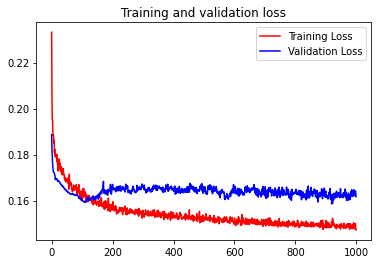

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
loss = history_upper.history['loss']
val_loss = history_upper.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('loss.png')
plt.show()


# Quantile = 0.05

In [37]:
model_lower = models.Sequential()
model_lower.add(layers.Dense(32, activation='relu', input_shape=(x_train.shape[1],)))
model_lower.add(layers.Dropout(0.3))
model_lower.add(layers.Dense(20 ,activation='relu'))
model_lower.add(layers.Dropout(0.3))
model_lower.add(layers.Dense(1,activation=keras.activations.softsign))
q = 0.05
model_lower.compile(loss=lambda y,f: tilted_loss(q,y,f), optimizer=keras.optimizers.SGD())

In [38]:
history_lower=model_lower.fit(x_train, y_train, epochs = 1000, batch_size = 8,validation_data=(x_test,y_test),callbacks=[lr_scheduler])

100%|██████████| 51/51 [00:00<00:00, 698.30it/s]


The value of K_z is  111.56354
Epoch 0 LR = 0.07548212268016015
Epoch 1/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.2408 - val_loss: 0.1383


100%|██████████| 51/51 [00:00<00:00, 749.35it/s]

The value of K_z is  111.56354
Epoch 1 LR = 0.07548212268016015
Epoch 2/1000
51/51 [==============================] - ETA: 0s - loss: 0.1173

51/51 [==============================] - 0s 3ms/step - loss: 0.1173 - val_loss: 0.1261


100%|██████████| 51/51 [00:00<00:00, 750.09it/s]

The value of K_z is  111.56354
Epoch 2 LR = 0.07548212268016015
Epoch 3/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1104 - val_loss: 0.1208



100%|██████████| 51/51 [00:00<00:00, 769.46it/s]


The value of K_z is  111.56354
Epoch 3 LR = 0.07548212268016015
Epoch 4/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1012 - val_loss: 0.1176


100%|██████████| 51/51 [00:00<00:00, 676.14it/s]

The value of K_z is  111.56354
Epoch 4 LR = 0.07548212268016015
Epoch 5/1000
29/51 [================>.............] - ETA: 0s - loss: 0.0893

51/51 [==============================] - 0s 2ms/step - loss: 0.0975 - val_loss: 0.1152


100%|██████████| 51/51 [00:00<00:00, 763.64it/s]


The value of K_z is  111.56354
Epoch 5 LR = 0.07548212268016015
Epoch 6/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0953 - val_loss: 0.1134


100%|██████████| 51/51 [00:00<00:00, 752.41it/s]


The value of K_z is  111.56354
Epoch 6 LR = 0.07548212268016015
Epoch 7/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0920 - val_loss: 0.1120


100%|██████████| 51/51 [00:00<00:00, 737.38it/s]

The value of K_z is  111.56354
Epoch 7 LR = 0.07548212268016015
Epoch 8/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0916 - val_loss: 0.1108



100%|██████████| 51/51 [00:00<00:00, 770.22it/s]


The value of K_z is  111.56354
Epoch 8 LR = 0.07548212268016015
Epoch 9/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0899 - val_loss: 0.1098


100%|██████████| 51/51 [00:00<00:00, 658.96it/s]

The value of K_z is  111.56354
Epoch 9 LR = 0.07548212268016015
Epoch 10/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.0886

51/51 [==============================] - 0s 2ms/step - loss: 0.0905 - val_loss: 0.1090


100%|██████████| 51/51 [00:00<00:00, 763.11it/s]


The value of K_z is  111.56354
Epoch 10 LR = 0.07548212268016015
Epoch 11/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0904 - val_loss: 0.1082


100%|██████████| 51/51 [00:00<00:00, 740.45it/s]


The value of K_z is  111.56354
Epoch 11 LR = 0.07548212268016015
Epoch 12/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0891 - val_loss: 0.1076


100%|██████████| 51/51 [00:00<00:00, 791.52it/s]

The value of K_z is  111.56354
Epoch 12 LR = 0.07548212268016015
Epoch 13/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0882 - val_loss: 0.1069



100%|██████████| 51/51 [00:00<00:00, 733.31it/s]


The value of K_z is  111.56354
Epoch 13 LR = 0.07548212268016015
Epoch 14/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0869 - val_loss: 0.1064


100%|██████████| 51/51 [00:00<00:00, 780.53it/s]


The value of K_z is  111.56354
Epoch 14 LR = 0.07548212268016015
Epoch 15/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0862 - val_loss: 0.1057


100%|██████████| 51/51 [00:00<00:00, 748.11it/s]

The value of K_z is  111.56354
Epoch 15 LR = 0.07548212268016015
Epoch 16/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0859 - val_loss: 0.1051



100%|██████████| 51/51 [00:00<00:00, 758.87it/s]

The value of K_z is  111.56354
Epoch 16 LR = 0.07548212268016015
Epoch 17/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0235

51/51 [==============================] - 0s 3ms/step - loss: 0.0821 - val_loss: 0.1043


100%|██████████| 51/51 [00:00<00:00, 775.17it/s]

The value of K_z is  111.56354
Epoch 17 LR = 0.07548212268016015
Epoch 18/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0820 - val_loss: 0.1038



100%|██████████| 51/51 [00:00<00:00, 773.10it/s]

The value of K_z is  111.56354
Epoch 18 LR = 0.07548212268016015
Epoch 19/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1211

51/51 [==============================] - 0s 2ms/step - loss: 0.0829 - val_loss: 0.1032


100%|██████████| 51/51 [00:00<00:00, 744.42it/s]

The value of K_z is  111.56354
Epoch 19 LR = 0.07548212268016015
Epoch 20/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0845 - val_loss: 0.1025



100%|██████████| 51/51 [00:00<00:00, 753.10it/s]

The value of K_z is  111.56354
Epoch 20 LR = 0.07548212268016015
Epoch 21/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0837 - val_loss: 0.1034



100%|██████████| 51/51 [00:00<00:00, 734.30it/s]

The value of K_z is  111.56354
Epoch 21 LR = 0.07548212268016015
Epoch 22/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0534

51/51 [==============================] - 0s 3ms/step - loss: 0.0809 - val_loss: 0.1025


100%|██████████| 51/51 [00:00<00:00, 785.95it/s]

The value of K_z is  111.56354
Epoch 22 LR = 0.07548212268016015
Epoch 23/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0800 - val_loss: 0.1025



100%|██████████| 51/51 [00:00<00:00, 757.84it/s]

The value of K_z is  111.56354
Epoch 23 LR = 0.07548212268016015
Epoch 24/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1602

51/51 [==============================] - 0s 2ms/step - loss: 0.0810 - val_loss: 0.1014


100%|██████████| 51/51 [00:00<00:00, 797.57it/s]

The value of K_z is  111.56354
Epoch 24 LR = 0.07548212268016015
Epoch 25/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1467

51/51 [==============================] - 0s 2ms/step - loss: 0.0799 - val_loss: 0.1006


100%|██████████| 51/51 [00:00<00:00, 723.08it/s]

The value of K_z is  111.56354
Epoch 25 LR = 0.07548212268016015
Epoch 26/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.0759

51/51 [==============================] - 0s 2ms/step - loss: 0.0795 - val_loss: 0.0995


100%|██████████| 51/51 [00:00<00:00, 747.85it/s]

The value of K_z is  111.56354
Epoch 26 LR = 0.07548212268016015
Epoch 27/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.0852

51/51 [==============================] - 0s 3ms/step - loss: 0.0812 - val_loss: 0.0999


100%|██████████| 51/51 [00:00<00:00, 736.56it/s]

The value of K_z is  111.56354
Epoch 27 LR = 0.07548212268016015
Epoch 28/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0815 - val_loss: 0.0996



100%|██████████| 51/51 [00:00<00:00, 736.75it/s]

The value of K_z is  111.56354
Epoch 28 LR = 0.07548212268016015
Epoch 29/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0794 - val_loss: 0.0980



100%|██████████| 51/51 [00:00<00:00, 720.23it/s]


The value of K_z is  111.56354
Epoch 29 LR = 0.07548212268016015
Epoch 30/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0789 - val_loss: 0.0982


100%|██████████| 51/51 [00:00<00:00, 759.62it/s]

The value of K_z is  111.56354
Epoch 30 LR = 0.07548212268016015
Epoch 31/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0783 - val_loss: 0.0981



100%|██████████| 51/51 [00:00<00:00, 748.40it/s]

The value of K_z is  111.56354
Epoch 31 LR = 0.07548212268016015
Epoch 32/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0448

51/51 [==============================] - 0s 3ms/step - loss: 0.0785 - val_loss: 0.0983


100%|██████████| 51/51 [00:00<00:00, 663.12it/s]

The value of K_z is  111.56354
Epoch 32 LR = 0.07548212268016015
Epoch 33/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.0771

51/51 [==============================] - 0s 2ms/step - loss: 0.0760 - val_loss: 0.0977


100%|██████████| 51/51 [00:00<00:00, 759.94it/s]


The value of K_z is  111.56354
Epoch 33 LR = 0.07548212268016015
Epoch 34/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0767 - val_loss: 0.0959


100%|██████████| 51/51 [00:00<00:00, 720.21it/s]


The value of K_z is  111.56354
Epoch 34 LR = 0.07548212268016015
Epoch 35/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0744 - val_loss: 0.0958


100%|██████████| 51/51 [00:00<00:00, 716.28it/s]

The value of K_z is  111.56354
Epoch 35 LR = 0.07548212268016015
Epoch 36/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0728 - val_loss: 0.0958



100%|██████████| 51/51 [00:00<00:00, 761.33it/s]

The value of K_z is  111.56354
Epoch 36 LR = 0.07548212268016015
Epoch 37/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0551

51/51 [==============================] - 0s 2ms/step - loss: 0.0751 - val_loss: 0.0949


100%|██████████| 51/51 [00:00<00:00, 753.49it/s]

The value of K_z is  111.56354
Epoch 37 LR = 0.07548212268016015
Epoch 38/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0733 - val_loss: 0.0944



100%|██████████| 51/51 [00:00<00:00, 749.83it/s]

The value of K_z is  111.56354
Epoch 38 LR = 0.07548212268016015
Epoch 39/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0743 - val_loss: 0.0930



100%|██████████| 51/51 [00:00<00:00, 766.94it/s]

The value of K_z is  111.56354
Epoch 39 LR = 0.07548212268016015
Epoch 40/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0882

51/51 [==============================] - 0s 3ms/step - loss: 0.0731 - val_loss: 0.0924


100%|██████████| 51/51 [00:00<00:00, 769.21it/s]

The value of K_z is  111.56354
Epoch 40 LR = 0.07548212268016015
Epoch 41/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0735 - val_loss: 0.0930



100%|██████████| 51/51 [00:00<00:00, 737.05it/s]

The value of K_z is  111.56354
Epoch 41 LR = 0.07548212268016015
Epoch 42/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0478

51/51 [==============================] - 0s 3ms/step - loss: 0.0732 - val_loss: 0.0942


100%|██████████| 51/51 [00:00<00:00, 713.70it/s]

The value of K_z is  111.56354
Epoch 42 LR = 0.07548212268016015
Epoch 43/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0754 - val_loss: 0.0936



100%|██████████| 51/51 [00:00<00:00, 754.87it/s]


The value of K_z is  111.56354
Epoch 43 LR = 0.07548212268016015
Epoch 44/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0728 - val_loss: 0.0944


100%|██████████| 51/51 [00:00<00:00, 778.29it/s]

The value of K_z is  111.56354
Epoch 44 LR = 0.07548212268016015
Epoch 45/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0414

51/51 [==============================] - 0s 2ms/step - loss: 0.0731 - val_loss: 0.0930


100%|██████████| 51/51 [00:00<00:00, 765.26it/s]


The value of K_z is  111.56354
Epoch 45 LR = 0.07548212268016015
Epoch 46/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0718 - val_loss: 0.0922


100%|██████████| 51/51 [00:00<00:00, 752.59it/s]


The value of K_z is  111.56354
Epoch 46 LR = 0.07548212268016015
Epoch 47/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0710 - val_loss: 0.0919


100%|██████████| 51/51 [00:00<00:00, 748.06it/s]

The value of K_z is  111.56354
Epoch 47 LR = 0.07548212268016015
Epoch 48/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0724 - val_loss: 0.0910



100%|██████████| 51/51 [00:00<00:00, 718.00it/s]

The value of K_z is  111.56354
Epoch 48 LR = 0.07548212268016015
Epoch 49/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0724 - val_loss: 0.0911



100%|██████████| 51/51 [00:00<00:00, 751.40it/s]


The value of K_z is  111.56354
Epoch 49 LR = 0.07548212268016015
Epoch 50/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0709 - val_loss: 0.0910


100%|██████████| 51/51 [00:00<00:00, 720.89it/s]

The value of K_z is  111.56354
Epoch 50 LR = 0.07548212268016015
Epoch 51/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0713 - val_loss: 0.0905



100%|██████████| 51/51 [00:00<00:00, 728.73it/s]

The value of K_z is  111.56354
Epoch 51 LR = 0.07548212268016015
Epoch 52/1000
29/51 [================>.............] - ETA: 0s - loss: 0.0734

51/51 [==============================] - 0s 2ms/step - loss: 0.0709 - val_loss: 0.0900


100%|██████████| 51/51 [00:00<00:00, 766.54it/s]

The value of K_z is  111.56354
Epoch 52 LR = 0.07548212268016015
Epoch 53/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0705 - val_loss: 0.0888



100%|██████████| 51/51 [00:00<00:00, 756.14it/s]


The value of K_z is  111.56354
Epoch 53 LR = 0.07548212268016015
Epoch 54/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0724 - val_loss: 0.0916


100%|██████████| 51/51 [00:00<00:00, 760.59it/s]

The value of K_z is  111.56354
Epoch 54 LR = 0.07548212268016015
Epoch 55/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0880

51/51 [==============================] - 0s 2ms/step - loss: 0.0694 - val_loss: 0.0903


100%|██████████| 51/51 [00:00<00:00, 755.80it/s]

The value of K_z is  111.56354
Epoch 55 LR = 0.07548212268016015
Epoch 56/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0702 - val_loss: 0.0899



100%|██████████| 51/51 [00:00<00:00, 773.07it/s]

The value of K_z is  111.56354
Epoch 56 LR = 0.07548212268016015
Epoch 57/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0325

51/51 [==============================] - 0s 2ms/step - loss: 0.0699 - val_loss: 0.0896


100%|██████████| 51/51 [00:00<00:00, 617.22it/s]

The value of K_z is  111.56354
Epoch 57 LR = 0.07548212268016015
Epoch 58/1000
29/51 [================>.............] - ETA: 0s - loss: 0.0752

51/51 [==============================] - 0s 2ms/step - loss: 0.0719 - val_loss: 0.0896


100%|██████████| 51/51 [00:00<00:00, 758.35it/s]


The value of K_z is  111.56354
Epoch 58 LR = 0.07548212268016015
Epoch 59/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0709 - val_loss: 0.0904


100%|██████████| 51/51 [00:00<00:00, 747.21it/s]

The value of K_z is  111.56354
Epoch 59 LR = 0.07548212268016015
Epoch 60/1000
26/51 [==============>...............] - ETA: 0s - loss: 0.0643

51/51 [==============================] - 0s 2ms/step - loss: 0.0694 - val_loss: 0.0893


100%|██████████| 51/51 [00:00<00:00, 750.19it/s]

The value of K_z is  111.56354
Epoch 60 LR = 0.07548212268016015
Epoch 61/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0698 - val_loss: 0.0906



100%|██████████| 51/51 [00:00<00:00, 751.10it/s]


The value of K_z is  111.56354
Epoch 61 LR = 0.07548212268016015
Epoch 62/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0715 - val_loss: 0.0911


100%|██████████| 51/51 [00:00<00:00, 682.03it/s]

The value of K_z is  111.56354
Epoch 62 LR = 0.07548212268016015
Epoch 63/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0696 - val_loss: 0.0893



100%|██████████| 51/51 [00:00<00:00, 754.62it/s]


The value of K_z is  111.56354
Epoch 63 LR = 0.07548212268016015
Epoch 64/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0708 - val_loss: 0.0900


100%|██████████| 51/51 [00:00<00:00, 767.60it/s]


The value of K_z is  111.56354
Epoch 64 LR = 0.07548212268016015
Epoch 65/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0686 - val_loss: 0.0890


100%|██████████| 51/51 [00:00<00:00, 776.66it/s]

The value of K_z is  111.56354
Epoch 65 LR = 0.07548212268016015
Epoch 66/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0698 - val_loss: 0.0890



100%|██████████| 51/51 [00:00<00:00, 780.96it/s]

The value of K_z is  111.56354
Epoch 66 LR = 0.07548212268016015
Epoch 67/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0974

51/51 [==============================] - 0s 2ms/step - loss: 0.0699 - val_loss: 0.0888


100%|██████████| 51/51 [00:00<00:00, 670.10it/s]

The value of K_z is  111.56354
Epoch 67 LR = 0.07548212268016015
Epoch 68/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.0656

51/51 [==============================] - 0s 2ms/step - loss: 0.0694 - val_loss: 0.0885


100%|██████████| 51/51 [00:00<00:00, 769.36it/s]


The value of K_z is  111.56354
Epoch 68 LR = 0.07548212268016015
Epoch 69/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0702 - val_loss: 0.0890


100%|██████████| 51/51 [00:00<00:00, 771.10it/s]


The value of K_z is  111.56354
Epoch 69 LR = 0.07548212268016015
Epoch 70/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0695 - val_loss: 0.0890


100%|██████████| 51/51 [00:00<00:00, 737.84it/s]

The value of K_z is  111.56354
Epoch 70 LR = 0.07548212268016015
Epoch 71/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0694 - val_loss: 0.0885



100%|██████████| 51/51 [00:00<00:00, 754.15it/s]

The value of K_z is  111.56354
Epoch 71 LR = 0.07548212268016015
Epoch 72/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1147

51/51 [==============================] - 0s 2ms/step - loss: 0.0709 - val_loss: 0.0886


100%|██████████| 51/51 [00:00<00:00, 656.41it/s]

The value of K_z is  111.56354
Epoch 72 LR = 0.07548212268016015
Epoch 73/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.0679

51/51 [==============================] - 0s 2ms/step - loss: 0.0691 - val_loss: 0.0893


100%|██████████| 51/51 [00:00<00:00, 786.06it/s]

The value of K_z is  111.56354
Epoch 73 LR = 0.07548212268016015
Epoch 74/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0680 - val_loss: 0.0886



100%|██████████| 51/51 [00:00<00:00, 716.95it/s]

The value of K_z is  111.56354
Epoch 74 LR = 0.07548212268016015
Epoch 75/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0682 - val_loss: 0.0882



100%|██████████| 51/51 [00:00<00:00, 774.48it/s]

The value of K_z is  111.56354
Epoch 75 LR = 0.07548212268016015
Epoch 76/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1072

51/51 [==============================] - 0s 2ms/step - loss: 0.0672 - val_loss: 0.0874


100%|██████████| 51/51 [00:00<00:00, 789.91it/s]

The value of K_z is  111.56354
Epoch 76 LR = 0.07548212268016015
Epoch 77/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0693 - val_loss: 0.0892



100%|██████████| 51/51 [00:00<00:00, 693.84it/s]

The value of K_z is  111.56354
Epoch 77 LR = 0.07548212268016015
Epoch 78/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.0662

51/51 [==============================] - 0s 2ms/step - loss: 0.0694 - val_loss: 0.0887


100%|██████████| 51/51 [00:00<00:00, 769.97it/s]

The value of K_z is  111.56354
Epoch 78 LR = 0.07548212268016015
Epoch 79/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0683 - val_loss: 0.0880



100%|██████████| 51/51 [00:00<00:00, 771.73it/s]

The value of K_z is  111.56354
Epoch 79 LR = 0.07548212268016015
Epoch 80/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0278

51/51 [==============================] - 0s 3ms/step - loss: 0.0676 - val_loss: 0.0881


100%|██████████| 51/51 [00:00<00:00, 750.46it/s]

The value of K_z is  111.56354
Epoch 80 LR = 0.07548212268016015
Epoch 81/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0665 - val_loss: 0.0880



100%|██████████| 51/51 [00:00<00:00, 764.20it/s]


The value of K_z is  111.56354
Epoch 81 LR = 0.07548212268016015
Epoch 82/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0699 - val_loss: 0.0882


100%|██████████| 51/51 [00:00<00:00, 693.19it/s]

The value of K_z is  111.56354
Epoch 82 LR = 0.07548212268016015
Epoch 83/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0674 - val_loss: 0.0878



100%|██████████| 51/51 [00:00<00:00, 759.74it/s]


The value of K_z is  111.56354
Epoch 83 LR = 0.07548212268016015
Epoch 84/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0685 - val_loss: 0.0874


100%|██████████| 51/51 [00:00<00:00, 723.60it/s]

The value of K_z is  111.56354
Epoch 84 LR = 0.07548212268016015
Epoch 85/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0679 - val_loss: 0.0874



100%|██████████| 51/51 [00:00<00:00, 762.68it/s]


The value of K_z is  111.56354
Epoch 85 LR = 0.07548212268016015
Epoch 86/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0684 - val_loss: 0.0877


100%|██████████| 51/51 [00:00<00:00, 761.22it/s]


The value of K_z is  111.56354
Epoch 86 LR = 0.07548212268016015
Epoch 87/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0666 - val_loss: 0.0875


100%|██████████| 51/51 [00:00<00:00, 632.00it/s]

The value of K_z is  111.56354
Epoch 87 LR = 0.07548212268016015
Epoch 88/1000
29/51 [================>.............] - ETA: 0s - loss: 0.0680

51/51 [==============================] - 0s 2ms/step - loss: 0.0658 - val_loss: 0.0877


100%|██████████| 51/51 [00:00<00:00, 766.00it/s]


The value of K_z is  111.56354
Epoch 88 LR = 0.07548212268016015
Epoch 89/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0673 - val_loss: 0.0876


100%|██████████| 51/51 [00:00<00:00, 693.20it/s]

The value of K_z is  111.56354
Epoch 89 LR = 0.07548212268016015
Epoch 90/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0663 - val_loss: 0.0871



100%|██████████| 51/51 [00:00<00:00, 759.31it/s]


The value of K_z is  111.56354
Epoch 90 LR = 0.07548212268016015
Epoch 91/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0673 - val_loss: 0.0879


100%|██████████| 51/51 [00:00<00:00, 769.81it/s]


The value of K_z is  111.56354
Epoch 91 LR = 0.07548212268016015
Epoch 92/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0663 - val_loss: 0.0874


100%|██████████| 51/51 [00:00<00:00, 668.60it/s]

The value of K_z is  111.56354
Epoch 92 LR = 0.07548212268016015
Epoch 93/1000
26/51 [==============>...............] - ETA: 0s - loss: 0.0569

51/51 [==============================] - 0s 3ms/step - loss: 0.0676 - val_loss: 0.0873


100%|██████████| 51/51 [00:00<00:00, 678.96it/s]

The value of K_z is  111.56354
Epoch 93 LR = 0.07548212268016015
Epoch 94/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.0709

51/51 [==============================] - 0s 3ms/step - loss: 0.0661 - val_loss: 0.0874


100%|██████████| 51/51 [00:00<00:00, 665.49it/s]

The value of K_z is  111.56354
Epoch 94 LR = 0.07548212268016015
Epoch 95/1000
49/51 [===========================>..] - ETA: 0s - loss: 0.0673

51/51 [==============================] - 0s 3ms/step - loss: 0.0681 - val_loss: 0.0879


100%|██████████| 51/51 [00:00<00:00, 695.97it/s]

The value of K_z is  111.56354
Epoch 95 LR = 0.07548212268016015
Epoch 96/1000
26/51 [==============>...............] - ETA: 0s - loss: 0.0671

51/51 [==============================] - 0s 3ms/step - loss: 0.0654 - val_loss: 0.0876


100%|██████████| 51/51 [00:00<00:00, 724.11it/s]

The value of K_z is  111.56354
Epoch 96 LR = 0.07548212268016015
Epoch 97/1000
48/51 [===========================>..] - ETA: 0s - loss: 0.0589

51/51 [==============================] - 0s 3ms/step - loss: 0.0643 - val_loss: 0.0865


100%|██████████| 51/51 [00:00<00:00, 701.84it/s]

The value of K_z is  111.56354
Epoch 97 LR = 0.07548212268016015
Epoch 98/1000
26/51 [==============>...............] - ETA: 0s - loss: 0.0614

51/51 [==============================] - 0s 3ms/step - loss: 0.0652 - val_loss: 0.0868


100%|██████████| 51/51 [00:00<00:00, 725.87it/s]

The value of K_z is  111.56354
Epoch 98 LR = 0.07548212268016015
Epoch 99/1000
49/51 [===========================>..] - ETA: 0s - loss: 0.0670

51/51 [==============================] - 0s 3ms/step - loss: 0.0670 - val_loss: 0.0860


100%|██████████| 51/51 [00:00<00:00, 738.21it/s]

The value of K_z is  111.56354
Epoch 99 LR = 0.07548212268016015
Epoch 100/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0663 - val_loss: 0.0874



100%|██████████| 51/51 [00:00<00:00, 762.03it/s]


The value of K_z is  111.56354
Epoch 100 LR = 0.07548212268016015
Epoch 101/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0662 - val_loss: 0.0872


100%|██████████| 51/51 [00:00<00:00, 758.55it/s]

The value of K_z is  111.56354
Epoch 101 LR = 0.07548212268016015
Epoch 102/1000
51/51 [==============================] - ETA: 0s - loss: 0.0658

51/51 [==============================] - 0s 3ms/step - loss: 0.0658 - val_loss: 0.0870


100%|██████████| 51/51 [00:00<00:00, 753.36it/s]

The value of K_z is  111.56354
Epoch 102 LR = 0.07548212268016015
Epoch 103/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0658 - val_loss: 0.0870



100%|██████████| 51/51 [00:00<00:00, 759.49it/s]

The value of K_z is  111.56354
Epoch 103 LR = 0.07548212268016015
Epoch 104/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0653 - val_loss: 0.0869



100%|██████████| 51/51 [00:00<00:00, 778.72it/s]

The value of K_z is  111.56354
Epoch 104 LR = 0.07548212268016015
Epoch 105/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0658 - val_loss: 0.0868



100%|██████████| 51/51 [00:00<00:00, 762.21it/s]

The value of K_z is  111.56354
Epoch 105 LR = 0.07548212268016015
Epoch 106/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0672 - val_loss: 0.0870



100%|██████████| 51/51 [00:00<00:00, 763.36it/s]

The value of K_z is  111.56354
Epoch 106 LR = 0.07548212268016015
Epoch 107/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1508

51/51 [==============================] - 0s 3ms/step - loss: 0.0654 - val_loss: 0.0865


100%|██████████| 51/51 [00:00<00:00, 716.08it/s]

The value of K_z is  111.56354
Epoch 107 LR = 0.07548212268016015
Epoch 108/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0659 - val_loss: 0.0864



100%|██████████| 51/51 [00:00<00:00, 776.76it/s]

The value of K_z is  111.56354
Epoch 108 LR = 0.07548212268016015
Epoch 109/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1293

51/51 [==============================] - 0s 2ms/step - loss: 0.0651 - val_loss: 0.0865


100%|██████████| 51/51 [00:00<00:00, 762.81it/s]


The value of K_z is  111.56354
Epoch 109 LR = 0.07548212268016015
Epoch 110/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0650 - val_loss: 0.0859


100%|██████████| 51/51 [00:00<00:00, 789.41it/s]

The value of K_z is  111.56354
Epoch 110 LR = 0.07548212268016015
Epoch 111/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0703

51/51 [==============================] - 0s 2ms/step - loss: 0.0663 - val_loss: 0.0855


100%|██████████| 51/51 [00:00<00:00, 732.36it/s]


The value of K_z is  111.56354
Epoch 111 LR = 0.07548212268016015
Epoch 112/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0660 - val_loss: 0.0867


100%|██████████| 51/51 [00:00<00:00, 766.95it/s]

The value of K_z is  111.56354
Epoch 112 LR = 0.07548212268016015
Epoch 113/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0666 - val_loss: 0.0864



100%|██████████| 51/51 [00:00<00:00, 769.03it/s]

The value of K_z is  111.56354
Epoch 113 LR = 0.07548212268016015
Epoch 114/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0911

51/51 [==============================] - 0s 3ms/step - loss: 0.0648 - val_loss: 0.0853


100%|██████████| 51/51 [00:00<00:00, 759.65it/s]

The value of K_z is  111.56354
Epoch 114 LR = 0.07548212268016015
Epoch 115/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0648 - val_loss: 0.0867



100%|██████████| 51/51 [00:00<00:00, 782.78it/s]

The value of K_z is  111.56354
Epoch 115 LR = 0.07548212268016015
Epoch 116/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0406

51/51 [==============================] - 0s 2ms/step - loss: 0.0660 - val_loss: 0.0869


100%|██████████| 51/51 [00:00<00:00, 747.49it/s]

The value of K_z is  111.56354
Epoch 116 LR = 0.07548212268016015
Epoch 117/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0653 - val_loss: 0.0864



100%|██████████| 51/51 [00:00<00:00, 769.20it/s]

The value of K_z is  111.56354
Epoch 117 LR = 0.07548212268016015
Epoch 118/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0657 - val_loss: 0.0866



100%|██████████| 51/51 [00:00<00:00, 775.62it/s]


The value of K_z is  111.56354
Epoch 118 LR = 0.07548212268016015
Epoch 119/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0652 - val_loss: 0.0867


100%|██████████| 51/51 [00:00<00:00, 755.12it/s]

The value of K_z is  111.56354
Epoch 119 LR = 0.07548212268016015
Epoch 120/1000
51/51 [==============================] - ETA: 0s - loss: 0.0664

51/51 [==============================] - 0s 3ms/step - loss: 0.0664 - val_loss: 0.0865


100%|██████████| 51/51 [00:00<00:00, 745.34it/s]

The value of K_z is  111.56354
Epoch 120 LR = 0.07548212268016015
Epoch 121/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0650 - val_loss: 0.0863



100%|██████████| 51/51 [00:00<00:00, 763.41it/s]

The value of K_z is  111.56354
Epoch 121 LR = 0.07548212268016015
Epoch 122/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1162

51/51 [==============================] - 0s 3ms/step - loss: 0.0651 - val_loss: 0.0862


100%|██████████| 51/51 [00:00<00:00, 762.35it/s]

The value of K_z is  111.56354
Epoch 122 LR = 0.07548212268016015
Epoch 123/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0643 - val_loss: 0.0853



100%|██████████| 51/51 [00:00<00:00, 766.15it/s]

The value of K_z is  111.56354
Epoch 123 LR = 0.07548212268016015
Epoch 124/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0562

51/51 [==============================] - 0s 3ms/step - loss: 0.0634 - val_loss: 0.0859


100%|██████████| 51/51 [00:00<00:00, 722.47it/s]

The value of K_z is  111.56354
Epoch 124 LR = 0.07548212268016015
Epoch 125/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0644 - val_loss: 0.0866



100%|██████████| 51/51 [00:00<00:00, 756.36it/s]


The value of K_z is  111.56354
Epoch 125 LR = 0.07548212268016015
Epoch 126/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0648 - val_loss: 0.0871


100%|██████████| 51/51 [00:00<00:00, 714.19it/s]

The value of K_z is  111.56354
Epoch 126 LR = 0.07548212268016015
Epoch 127/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.0681

51/51 [==============================] - 0s 3ms/step - loss: 0.0641 - val_loss: 0.0866


100%|██████████| 51/51 [00:00<00:00, 782.23it/s]

The value of K_z is  111.56354
Epoch 127 LR = 0.07548212268016015
Epoch 128/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0648 - val_loss: 0.0866



100%|██████████| 51/51 [00:00<00:00, 738.52it/s]

The value of K_z is  111.56354
Epoch 128 LR = 0.07548212268016015
Epoch 129/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0301

51/51 [==============================] - 0s 3ms/step - loss: 0.0653 - val_loss: 0.0864


100%|██████████| 51/51 [00:00<00:00, 756.34it/s]

The value of K_z is  111.56354
Epoch 129 LR = 0.07548212268016015
Epoch 130/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0630 - val_loss: 0.0856



100%|██████████| 51/51 [00:00<00:00, 714.99it/s]

The value of K_z is  111.56354
Epoch 130 LR = 0.07548212268016015
Epoch 131/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0653 - val_loss: 0.0863



100%|██████████| 51/51 [00:00<00:00, 751.41it/s]


The value of K_z is  111.56354
Epoch 131 LR = 0.07548212268016015
Epoch 132/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0656 - val_loss: 0.0854


100%|██████████| 51/51 [00:00<00:00, 767.15it/s]

The value of K_z is  111.56354
Epoch 132 LR = 0.07548212268016015
Epoch 133/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0635 - val_loss: 0.0863



100%|██████████| 51/51 [00:00<00:00, 771.76it/s]

The value of K_z is  111.56354
Epoch 133 LR = 0.07548212268016015
Epoch 134/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0613

51/51 [==============================] - 0s 2ms/step - loss: 0.0632 - val_loss: 0.0853


100%|██████████| 51/51 [00:00<00:00, 731.92it/s]

The value of K_z is  111.56354
Epoch 134 LR = 0.07548212268016015
Epoch 135/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0643 - val_loss: 0.0868



100%|██████████| 51/51 [00:00<00:00, 777.36it/s]

The value of K_z is  111.56354
Epoch 135 LR = 0.07548212268016015
Epoch 136/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0716

51/51 [==============================] - 0s 3ms/step - loss: 0.0644 - val_loss: 0.0862


100%|██████████| 51/51 [00:00<00:00, 735.39it/s]

The value of K_z is  111.56354
Epoch 136 LR = 0.07548212268016015
Epoch 137/1000
30/51 [================>.............] - ETA: 0s - loss: 0.0630

51/51 [==============================] - 0s 3ms/step - loss: 0.0624 - val_loss: 0.0859


100%|██████████| 51/51 [00:00<00:00, 762.34it/s]

The value of K_z is  111.56354
Epoch 137 LR = 0.07548212268016015
Epoch 138/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0644 - val_loss: 0.0857



100%|██████████| 51/51 [00:00<00:00, 772.18it/s]


The value of K_z is  111.56354
Epoch 138 LR = 0.07548212268016015
Epoch 139/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0634 - val_loss: 0.0859


100%|██████████| 51/51 [00:00<00:00, 758.20it/s]

The value of K_z is  111.56354
Epoch 139 LR = 0.07548212268016015
Epoch 140/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0641 - val_loss: 0.0863



100%|██████████| 51/51 [00:00<00:00, 708.65it/s]


The value of K_z is  111.56354
Epoch 140 LR = 0.07548212268016015
Epoch 141/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0633 - val_loss: 0.0854


100%|██████████| 51/51 [00:00<00:00, 764.22it/s]

The value of K_z is  111.56354
Epoch 141 LR = 0.07548212268016015
Epoch 142/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0661 - val_loss: 0.0860



100%|██████████| 51/51 [00:00<00:00, 728.15it/s]

The value of K_z is  111.56354
Epoch 142 LR = 0.07548212268016015
Epoch 143/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0633 - val_loss: 0.0857



100%|██████████| 51/51 [00:00<00:00, 773.68it/s]

The value of K_z is  111.56354
Epoch 143 LR = 0.07548212268016015
Epoch 144/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2282

51/51 [==============================] - 0s 2ms/step - loss: 0.0643 - val_loss: 0.0858


100%|██████████| 51/51 [00:00<00:00, 715.38it/s]

The value of K_z is  111.56354
Epoch 144 LR = 0.07548212268016015
Epoch 145/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0640 - val_loss: 0.0859



100%|██████████| 51/51 [00:00<00:00, 765.15it/s]

The value of K_z is  111.56354
Epoch 145 LR = 0.07548212268016015
Epoch 146/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1273

51/51 [==============================] - 0s 2ms/step - loss: 0.0645 - val_loss: 0.0857


100%|██████████| 51/51 [00:00<00:00, 730.88it/s]


The value of K_z is  111.56354
Epoch 146 LR = 0.07548212268016015
Epoch 147/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0633 - val_loss: 0.0862


100%|██████████| 51/51 [00:00<00:00, 673.39it/s]

The value of K_z is  111.56354
Epoch 147 LR = 0.07548212268016015
Epoch 148/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0629 - val_loss: 0.0850



100%|██████████| 51/51 [00:00<00:00, 750.39it/s]

The value of K_z is  111.56354
Epoch 148 LR = 0.07548212268016015
Epoch 149/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1000

51/51 [==============================] - 0s 3ms/step - loss: 0.0635 - val_loss: 0.0854


100%|██████████| 51/51 [00:00<00:00, 761.19it/s]

The value of K_z is  111.56354
Epoch 149 LR = 0.07548212268016015
Epoch 150/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0654 - val_loss: 0.0859



100%|██████████| 51/51 [00:00<00:00, 770.66it/s]


The value of K_z is  111.56354
Epoch 150 LR = 0.07548212268016015
Epoch 151/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0636 - val_loss: 0.0854


100%|██████████| 51/51 [00:00<00:00, 775.51it/s]


The value of K_z is  111.56354
Epoch 151 LR = 0.07548212268016015
Epoch 152/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0636 - val_loss: 0.0848


100%|██████████| 51/51 [00:00<00:00, 694.55it/s]

The value of K_z is  111.56354
Epoch 152 LR = 0.07548212268016015
Epoch 153/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0629 - val_loss: 0.0849



100%|██████████| 51/51 [00:00<00:00, 692.05it/s]

The value of K_z is  111.56354
Epoch 153 LR = 0.07548212268016015
Epoch 154/1000
25/51 [=============>................] - ETA: 0s - loss: 0.0835

51/51 [==============================] - 0s 3ms/step - loss: 0.0651 - val_loss: 0.0851


100%|██████████| 51/51 [00:00<00:00, 744.48it/s]

The value of K_z is  111.56354
Epoch 154 LR = 0.07548212268016015
Epoch 155/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0622 - val_loss: 0.0850



100%|██████████| 51/51 [00:00<00:00, 705.76it/s]

The value of K_z is  111.56354
Epoch 155 LR = 0.07548212268016015
Epoch 156/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0657 - val_loss: 0.0854



100%|██████████| 51/51 [00:00<00:00, 782.24it/s]

The value of K_z is  111.56354
Epoch 156 LR = 0.07548212268016015
Epoch 157/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0241

51/51 [==============================] - 0s 2ms/step - loss: 0.0631 - val_loss: 0.0848


100%|██████████| 51/51 [00:00<00:00, 708.89it/s]


The value of K_z is  111.56354
Epoch 157 LR = 0.07548212268016015
Epoch 158/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0641 - val_loss: 0.0850


100%|██████████| 51/51 [00:00<00:00, 770.40it/s]

The value of K_z is  111.56354
Epoch 158 LR = 0.07548212268016015
Epoch 159/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0637 - val_loss: 0.0850



100%|██████████| 51/51 [00:00<00:00, 767.21it/s]

The value of K_z is  111.56354
Epoch 159 LR = 0.07548212268016015
Epoch 160/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0637 - val_loss: 0.0850



100%|██████████| 51/51 [00:00<00:00, 757.08it/s]

The value of K_z is  111.56354
Epoch 160 LR = 0.07548212268016015
Epoch 161/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0663 - val_loss: 0.0855



100%|██████████| 51/51 [00:00<00:00, 742.96it/s]

The value of K_z is  111.56354
Epoch 161 LR = 0.07548212268016015
Epoch 162/1000
50/51 [============================>.] - ETA: 0s - loss: 0.0644

51/51 [==============================] - 0s 3ms/step - loss: 0.0647 - val_loss: 0.0854


100%|██████████| 51/51 [00:00<00:00, 685.16it/s]

The value of K_z is  111.56354
Epoch 162 LR = 0.07548212268016015
Epoch 163/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0628 - val_loss: 0.0857



100%|██████████| 51/51 [00:00<00:00, 739.70it/s]


The value of K_z is  111.56354
Epoch 163 LR = 0.07548212268016015
Epoch 164/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0622 - val_loss: 0.0853


100%|██████████| 51/51 [00:00<00:00, 772.72it/s]

The value of K_z is  111.56354
Epoch 164 LR = 0.07548212268016015
Epoch 165/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0635 - val_loss: 0.0851



100%|██████████| 51/51 [00:00<00:00, 711.42it/s]

The value of K_z is  111.56354
Epoch 165 LR = 0.07548212268016015
Epoch 166/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0657 - val_loss: 0.0856



100%|██████████| 51/51 [00:00<00:00, 750.18it/s]

The value of K_z is  111.56354
Epoch 166 LR = 0.07548212268016015
Epoch 167/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0620 - val_loss: 0.0853



100%|██████████| 51/51 [00:00<00:00, 683.67it/s]

The value of K_z is  111.56354
Epoch 167 LR = 0.07548212268016015
Epoch 168/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0626 - val_loss: 0.0846



100%|██████████| 51/51 [00:00<00:00, 773.51it/s]

The value of K_z is  111.56354
Epoch 168 LR = 0.07548212268016015
Epoch 169/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0943

51/51 [==============================] - 0s 2ms/step - loss: 0.0630 - val_loss: 0.0848


100%|██████████| 51/51 [00:00<00:00, 753.71it/s]

The value of K_z is  111.56354
Epoch 169 LR = 0.07548212268016015
Epoch 170/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0628 - val_loss: 0.0846



100%|██████████| 51/51 [00:00<00:00, 760.96it/s]


The value of K_z is  111.56354
Epoch 170 LR = 0.07548212268016015
Epoch 171/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0634 - val_loss: 0.0850


100%|██████████| 51/51 [00:00<00:00, 768.96it/s]

The value of K_z is  111.56354
Epoch 171 LR = 0.07548212268016015
Epoch 172/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0651 - val_loss: 0.0859



100%|██████████| 51/51 [00:00<00:00, 723.41it/s]

The value of K_z is  111.56354
Epoch 172 LR = 0.07548212268016015
Epoch 173/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0624 - val_loss: 0.0852



100%|██████████| 51/51 [00:00<00:00, 765.01it/s]


The value of K_z is  111.56354
Epoch 173 LR = 0.07548212268016015
Epoch 174/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0641 - val_loss: 0.0852


100%|██████████| 51/51 [00:00<00:00, 713.26it/s]

The value of K_z is  111.56354
Epoch 174 LR = 0.07548212268016015
Epoch 175/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0632 - val_loss: 0.0851



100%|██████████| 51/51 [00:00<00:00, 768.73it/s]

The value of K_z is  111.56354
Epoch 175 LR = 0.07548212268016015
Epoch 176/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0623

51/51 [==============================] - 0s 2ms/step - loss: 0.0614 - val_loss: 0.0848


100%|██████████| 51/51 [00:00<00:00, 773.57it/s]

The value of K_z is  111.56354
Epoch 176 LR = 0.07548212268016015
Epoch 177/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0637 - val_loss: 0.0845



100%|██████████| 51/51 [00:00<00:00, 695.65it/s]

The value of K_z is  111.56354
Epoch 177 LR = 0.07548212268016015
Epoch 178/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0630 - val_loss: 0.0849



100%|██████████| 51/51 [00:00<00:00, 775.58it/s]

The value of K_z is  111.56354
Epoch 178 LR = 0.07548212268016015
Epoch 179/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0284

51/51 [==============================] - 0s 2ms/step - loss: 0.0635 - val_loss: 0.0858


100%|██████████| 51/51 [00:00<00:00, 784.75it/s]

The value of K_z is  111.56354
Epoch 179 LR = 0.07548212268016015
Epoch 180/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0621 - val_loss: 0.0854



100%|██████████| 51/51 [00:00<00:00, 773.09it/s]

The value of K_z is  111.56354
Epoch 180 LR = 0.07548212268016015
Epoch 181/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0910

51/51 [==============================] - 0s 2ms/step - loss: 0.0641 - val_loss: 0.0851


100%|██████████| 51/51 [00:00<00:00, 783.78it/s]


The value of K_z is  111.56354
Epoch 181 LR = 0.07548212268016015
Epoch 182/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0622 - val_loss: 0.0846


100%|██████████| 51/51 [00:00<00:00, 747.94it/s]


The value of K_z is  111.56354
Epoch 182 LR = 0.07548212268016015
Epoch 183/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0631 - val_loss: 0.0844


100%|██████████| 51/51 [00:00<00:00, 767.50it/s]

The value of K_z is  111.56354
Epoch 183 LR = 0.07548212268016015
Epoch 184/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0622 - val_loss: 0.0845



100%|██████████| 51/51 [00:00<00:00, 783.26it/s]


The value of K_z is  111.56354
Epoch 184 LR = 0.07548212268016015
Epoch 185/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0628 - val_loss: 0.0844


100%|██████████| 51/51 [00:00<00:00, 768.65it/s]


The value of K_z is  111.56354
Epoch 185 LR = 0.07548212268016015
Epoch 186/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0631 - val_loss: 0.0850


100%|██████████| 51/51 [00:00<00:00, 784.66it/s]

The value of K_z is  111.56354
Epoch 186 LR = 0.07548212268016015
Epoch 187/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0624 - val_loss: 0.0847



100%|██████████| 51/51 [00:00<00:00, 798.18it/s]

The value of K_z is  111.56354
Epoch 187 LR = 0.07548212268016015
Epoch 188/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0272

51/51 [==============================] - 0s 3ms/step - loss: 0.0634 - val_loss: 0.0842


100%|██████████| 51/51 [00:00<00:00, 725.70it/s]

The value of K_z is  111.56354
Epoch 188 LR = 0.07548212268016015
Epoch 189/1000
51/51 [==============================] - ETA: 0s - loss: 0.0624

51/51 [==============================] - 0s 3ms/step - loss: 0.0624 - val_loss: 0.0847


100%|██████████| 51/51 [00:00<00:00, 756.02it/s]

The value of K_z is  111.56354
Epoch 189 LR = 0.07548212268016015
Epoch 190/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0616 - val_loss: 0.0849



100%|██████████| 51/51 [00:00<00:00, 764.00it/s]


The value of K_z is  111.56354
Epoch 190 LR = 0.07548212268016015
Epoch 191/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0612 - val_loss: 0.0848


100%|██████████| 51/51 [00:00<00:00, 770.36it/s]

The value of K_z is  111.56354
Epoch 191 LR = 0.07548212268016015
Epoch 192/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0632 - val_loss: 0.0851



100%|██████████| 51/51 [00:00<00:00, 733.84it/s]


The value of K_z is  111.56354
Epoch 192 LR = 0.07548212268016015
Epoch 193/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0627 - val_loss: 0.0843


100%|██████████| 51/51 [00:00<00:00, 789.73it/s]


The value of K_z is  111.56354
Epoch 193 LR = 0.07548212268016015
Epoch 194/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0639 - val_loss: 0.0847


100%|██████████| 51/51 [00:00<00:00, 773.10it/s]

The value of K_z is  111.56354
Epoch 194 LR = 0.07548212268016015
Epoch 195/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0637 - val_loss: 0.0841



100%|██████████| 51/51 [00:00<00:00, 739.75it/s]

The value of K_z is  111.56354
Epoch 195 LR = 0.07548212268016015
Epoch 196/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0633 - val_loss: 0.0840



100%|██████████| 51/51 [00:00<00:00, 744.29it/s]

The value of K_z is  111.56354
Epoch 196 LR = 0.07548212268016015
Epoch 197/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.0676

51/51 [==============================] - 0s 2ms/step - loss: 0.0624 - val_loss: 0.0843


100%|██████████| 51/51 [00:00<00:00, 705.77it/s]

The value of K_z is  111.56354
Epoch 197 LR = 0.07548212268016015
Epoch 198/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0627 - val_loss: 0.0853



100%|██████████| 51/51 [00:00<00:00, 790.13it/s]


The value of K_z is  111.56354
Epoch 198 LR = 0.07548212268016015
Epoch 199/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0632 - val_loss: 0.0860


100%|██████████| 51/51 [00:00<00:00, 737.94it/s]

The value of K_z is  111.56354
Epoch 199 LR = 0.07548212268016015
Epoch 200/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0620 - val_loss: 0.0850



100%|██████████| 51/51 [00:00<00:00, 725.04it/s]

The value of K_z is  111.56354
Epoch 200 LR = 0.07548212268016015
Epoch 201/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0631 - val_loss: 0.0841



100%|██████████| 51/51 [00:00<00:00, 758.77it/s]

The value of K_z is  111.56354
Epoch 201 LR = 0.07548212268016015
Epoch 202/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0627 - val_loss: 0.0842



100%|██████████| 51/51 [00:00<00:00, 715.84it/s]

The value of K_z is  111.56354
Epoch 202 LR = 0.07548212268016015
Epoch 203/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0609 - val_loss: 0.0856



100%|██████████| 51/51 [00:00<00:00, 760.23it/s]

The value of K_z is  111.56354
Epoch 203 LR = 0.07548212268016015
Epoch 204/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0619 - val_loss: 0.0872



100%|██████████| 51/51 [00:00<00:00, 758.80it/s]

The value of K_z is  111.56354
Epoch 204 LR = 0.07548212268016015
Epoch 205/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0624 - val_loss: 0.0874



100%|██████████| 51/51 [00:00<00:00, 762.76it/s]

The value of K_z is  111.56354
Epoch 205 LR = 0.07548212268016015
Epoch 206/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0633 - val_loss: 0.0879



100%|██████████| 51/51 [00:00<00:00, 740.10it/s]


The value of K_z is  111.56354
Epoch 206 LR = 0.07548212268016015
Epoch 207/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0626 - val_loss: 0.0886


100%|██████████| 51/51 [00:00<00:00, 709.88it/s]

The value of K_z is  111.56354
Epoch 207 LR = 0.07548212268016015
Epoch 208/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0606 - val_loss: 0.0888



100%|██████████| 51/51 [00:00<00:00, 743.62it/s]

The value of K_z is  111.56354
Epoch 208 LR = 0.07548212268016015
Epoch 209/1000
50/51 [============================>.] - ETA: 0s - loss: 0.0614

51/51 [==============================] - 0s 3ms/step - loss: 0.0611 - val_loss: 0.0893


100%|██████████| 51/51 [00:00<00:00, 724.12it/s]

The value of K_z is  111.56354
Epoch 209 LR = 0.07548212268016015
Epoch 210/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0641 - val_loss: 0.0896



100%|██████████| 51/51 [00:00<00:00, 731.16it/s]

The value of K_z is  111.56354
Epoch 210 LR = 0.07548212268016015
Epoch 211/1000
29/51 [================>.............] - ETA: 0s - loss: 0.0628

51/51 [==============================] - 0s 3ms/step - loss: 0.0618 - val_loss: 0.0899


100%|██████████| 51/51 [00:00<00:00, 737.21it/s]

The value of K_z is  111.56354
Epoch 211 LR = 0.07548212268016015
Epoch 212/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0612 - val_loss: 0.0896



100%|██████████| 51/51 [00:00<00:00, 675.66it/s]

The value of K_z is  111.56354
Epoch 212 LR = 0.07548212268016015
Epoch 213/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0617 - val_loss: 0.0892



100%|██████████| 51/51 [00:00<00:00, 728.42it/s]

The value of K_z is  111.56354
Epoch 213 LR = 0.07548212268016015
Epoch 214/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0617 - val_loss: 0.0890



100%|██████████| 51/51 [00:00<00:00, 752.96it/s]


The value of K_z is  111.56354
Epoch 214 LR = 0.07548212268016015
Epoch 215/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0625 - val_loss: 0.0892


100%|██████████| 51/51 [00:00<00:00, 746.37it/s]

The value of K_z is  111.56354
Epoch 215 LR = 0.07548212268016015
Epoch 216/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0616 - val_loss: 0.0899



100%|██████████| 51/51 [00:00<00:00, 747.18it/s]


The value of K_z is  111.56354
Epoch 216 LR = 0.07548212268016015
Epoch 217/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0615 - val_loss: 0.0896


100%|██████████| 51/51 [00:00<00:00, 681.23it/s]

The value of K_z is  111.56354
Epoch 217 LR = 0.07548212268016015
Epoch 218/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0626 - val_loss: 0.0899



100%|██████████| 51/51 [00:00<00:00, 714.97it/s]

The value of K_z is  111.56354
Epoch 218 LR = 0.07548212268016015
Epoch 219/1000
29/51 [================>.............] - ETA: 0s - loss: 0.0618

51/51 [==============================] - 0s 2ms/step - loss: 0.0613 - val_loss: 0.0902


100%|██████████| 51/51 [00:00<00:00, 748.52it/s]

The value of K_z is  111.56354
Epoch 219 LR = 0.07548212268016015
Epoch 220/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0615 - val_loss: 0.0904



100%|██████████| 51/51 [00:00<00:00, 750.24it/s]

The value of K_z is  111.56354
Epoch 220 LR = 0.07548212268016015
Epoch 221/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0618 - val_loss: 0.0910



100%|██████████| 51/51 [00:00<00:00, 745.96it/s]

The value of K_z is  111.56354
Epoch 221 LR = 0.07548212268016015
Epoch 222/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0607 - val_loss: 0.0903



100%|██████████| 51/51 [00:00<00:00, 707.10it/s]

The value of K_z is  111.56354
Epoch 222 LR = 0.07548212268016015
Epoch 223/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0613 - val_loss: 0.0905



100%|██████████| 51/51 [00:00<00:00, 677.44it/s]

The value of K_z is  111.56354
Epoch 223 LR = 0.07548212268016015
Epoch 224/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0624 - val_loss: 0.0905



100%|██████████| 51/51 [00:00<00:00, 763.94it/s]

The value of K_z is  111.56354
Epoch 224 LR = 0.07548212268016015
Epoch 225/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1241

51/51 [==============================] - 0s 2ms/step - loss: 0.0624 - val_loss: 0.0911


100%|██████████| 51/51 [00:00<00:00, 755.46it/s]

The value of K_z is  111.56354
Epoch 225 LR = 0.07548212268016015
Epoch 226/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0617 - val_loss: 0.0910



100%|██████████| 51/51 [00:00<00:00, 765.60it/s]

The value of K_z is  111.56354
Epoch 226 LR = 0.07548212268016015
Epoch 227/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1532

51/51 [==============================] - 0s 2ms/step - loss: 0.0612 - val_loss: 0.0913


100%|██████████| 51/51 [00:00<00:00, 713.58it/s]

The value of K_z is  111.56354
Epoch 227 LR = 0.07548212268016015
Epoch 228/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.0602

51/51 [==============================] - 0s 2ms/step - loss: 0.0611 - val_loss: 0.0912


100%|██████████| 51/51 [00:00<00:00, 700.86it/s]

The value of K_z is  111.56354
Epoch 228 LR = 0.07548212268016015
Epoch 229/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0618 - val_loss: 0.0911



100%|██████████| 51/51 [00:00<00:00, 730.73it/s]

The value of K_z is  111.56354
Epoch 229 LR = 0.07548212268016015
Epoch 230/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0626 - val_loss: 0.0910



100%|██████████| 51/51 [00:00<00:00, 774.69it/s]


The value of K_z is  111.56354
Epoch 230 LR = 0.07548212268016015
Epoch 231/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0609 - val_loss: 0.0908


100%|██████████| 51/51 [00:00<00:00, 736.70it/s]

The value of K_z is  111.56354
Epoch 231 LR = 0.07548212268016015
Epoch 232/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0616 - val_loss: 0.0908



100%|██████████| 51/51 [00:00<00:00, 703.30it/s]

The value of K_z is  111.56354
Epoch 232 LR = 0.07548212268016015
Epoch 233/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.0617

51/51 [==============================] - 0s 3ms/step - loss: 0.0616 - val_loss: 0.0908


100%|██████████| 51/51 [00:00<00:00, 693.95it/s]

The value of K_z is  111.56354
Epoch 233 LR = 0.07548212268016015
Epoch 234/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0608 - val_loss: 0.0914



100%|██████████| 51/51 [00:00<00:00, 742.40it/s]


The value of K_z is  111.56354
Epoch 234 LR = 0.07548212268016015
Epoch 235/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0605 - val_loss: 0.0909


100%|██████████| 51/51 [00:00<00:00, 719.47it/s]

The value of K_z is  111.56354
Epoch 235 LR = 0.07548212268016015
Epoch 236/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0620 - val_loss: 0.0912



100%|██████████| 51/51 [00:00<00:00, 750.16it/s]

The value of K_z is  111.56354
Epoch 236 LR = 0.07548212268016015
Epoch 237/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0616 - val_loss: 0.0911



100%|██████████| 51/51 [00:00<00:00, 669.57it/s]

The value of K_z is  111.56354
Epoch 237 LR = 0.07548212268016015
Epoch 238/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.0553

51/51 [==============================] - 0s 2ms/step - loss: 0.0618 - val_loss: 0.0916


100%|██████████| 51/51 [00:00<00:00, 687.50it/s]

The value of K_z is  111.56354
Epoch 238 LR = 0.07548212268016015
Epoch 239/1000
49/51 [===========================>..] - ETA: 0s - loss: 0.0592

51/51 [==============================] - 0s 3ms/step - loss: 0.0611 - val_loss: 0.0913


100%|██████████| 51/51 [00:00<00:00, 730.99it/s]

The value of K_z is  111.56354
Epoch 239 LR = 0.07548212268016015
Epoch 240/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.0529

51/51 [==============================] - 0s 2ms/step - loss: 0.0610 - val_loss: 0.0913


100%|██████████| 51/51 [00:00<00:00, 742.63it/s]

The value of K_z is  111.56354
Epoch 240 LR = 0.07548212268016015
Epoch 241/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0609 - val_loss: 0.0911



100%|██████████| 51/51 [00:00<00:00, 736.34it/s]


The value of K_z is  111.56354
Epoch 241 LR = 0.07548212268016015
Epoch 242/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0599 - val_loss: 0.0915


100%|██████████| 51/51 [00:00<00:00, 588.09it/s]

The value of K_z is  111.56354
Epoch 242 LR = 0.07548212268016015
Epoch 243/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.0643

51/51 [==============================] - 0s 2ms/step - loss: 0.0604 - val_loss: 0.0911


100%|██████████| 51/51 [00:00<00:00, 772.73it/s]

The value of K_z is  111.56354
Epoch 243 LR = 0.07548212268016015
Epoch 244/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0604 - val_loss: 0.0911



100%|██████████| 51/51 [00:00<00:00, 748.19it/s]

The value of K_z is  111.56354
Epoch 244 LR = 0.07548212268016015
Epoch 245/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0610 - val_loss: 0.0914



100%|██████████| 51/51 [00:00<00:00, 758.47it/s]


The value of K_z is  111.56354
Epoch 245 LR = 0.07548212268016015
Epoch 246/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0610 - val_loss: 0.0913


100%|██████████| 51/51 [00:00<00:00, 739.61it/s]

The value of K_z is  111.56354
Epoch 246 LR = 0.07548212268016015
Epoch 247/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0607 - val_loss: 0.0911



100%|██████████| 51/51 [00:00<00:00, 677.05it/s]

The value of K_z is  111.56354
Epoch 247 LR = 0.07548212268016015
Epoch 248/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0608 - val_loss: 0.0911



100%|██████████| 51/51 [00:00<00:00, 755.90it/s]

The value of K_z is  111.56354
Epoch 248 LR = 0.07548212268016015
Epoch 249/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0603 - val_loss: 0.0910



100%|██████████| 51/51 [00:00<00:00, 772.90it/s]


The value of K_z is  111.56354
Epoch 249 LR = 0.07548212268016015
Epoch 250/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0604 - val_loss: 0.0913


100%|██████████| 51/51 [00:00<00:00, 756.39it/s]


The value of K_z is  111.56354
Epoch 250 LR = 0.07548212268016015
Epoch 251/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0601 - val_loss: 0.0912


100%|██████████| 51/51 [00:00<00:00, 768.41it/s]

The value of K_z is  111.56354
Epoch 251 LR = 0.07548212268016015
Epoch 252/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0608 - val_loss: 0.0913



100%|██████████| 51/51 [00:00<00:00, 677.44it/s]

The value of K_z is  111.56354
Epoch 252 LR = 0.07548212268016015
Epoch 253/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0599 - val_loss: 0.0912



100%|██████████| 51/51 [00:00<00:00, 775.15it/s]


The value of K_z is  111.56354
Epoch 253 LR = 0.07548212268016015
Epoch 254/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0612 - val_loss: 0.0917


100%|██████████| 51/51 [00:00<00:00, 777.90it/s]

The value of K_z is  111.56354
Epoch 254 LR = 0.07548212268016015
Epoch 255/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0608 - val_loss: 0.0912



100%|██████████| 51/51 [00:00<00:00, 746.40it/s]

The value of K_z is  111.56354
Epoch 255 LR = 0.07548212268016015
Epoch 256/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0342

51/51 [==============================] - 0s 2ms/step - loss: 0.0603 - val_loss: 0.0914


100%|██████████| 51/51 [00:00<00:00, 744.92it/s]


The value of K_z is  111.56354
Epoch 256 LR = 0.07548212268016015
Epoch 257/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0603 - val_loss: 0.0909


100%|██████████| 51/51 [00:00<00:00, 726.47it/s]


The value of K_z is  111.56354
Epoch 257 LR = 0.07548212268016015
Epoch 258/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0610 - val_loss: 0.0909


100%|██████████| 51/51 [00:00<00:00, 720.93it/s]

The value of K_z is  111.56354
Epoch 258 LR = 0.07548212268016015
Epoch 259/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0622 - val_loss: 0.0913



100%|██████████| 51/51 [00:00<00:00, 766.76it/s]


The value of K_z is  111.56354
Epoch 259 LR = 0.07548212268016015
Epoch 260/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0613 - val_loss: 0.0909


100%|██████████| 51/51 [00:00<00:00, 765.52it/s]


The value of K_z is  111.56354
Epoch 260 LR = 0.07548212268016015
Epoch 261/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0609 - val_loss: 0.0907


100%|██████████| 51/51 [00:00<00:00, 746.82it/s]

The value of K_z is  111.56354
Epoch 261 LR = 0.07548212268016015
Epoch 262/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0633 - val_loss: 0.0905



100%|██████████| 51/51 [00:00<00:00, 775.23it/s]


The value of K_z is  111.56354
Epoch 262 LR = 0.07548212268016015
Epoch 263/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0618 - val_loss: 0.0906


100%|██████████| 51/51 [00:00<00:00, 730.91it/s]

The value of K_z is  111.56354
Epoch 263 LR = 0.07548212268016015
Epoch 264/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0608 - val_loss: 0.0908



100%|██████████| 51/51 [00:00<00:00, 763.59it/s]

The value of K_z is  111.56354
Epoch 264 LR = 0.07548212268016015
Epoch 265/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0605 - val_loss: 0.0908



100%|██████████| 51/51 [00:00<00:00, 771.46it/s]


The value of K_z is  111.56354
Epoch 265 LR = 0.07548212268016015
Epoch 266/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0606 - val_loss: 0.0905


100%|██████████| 51/51 [00:00<00:00, 773.42it/s]

The value of K_z is  111.56354
Epoch 266 LR = 0.07548212268016015
Epoch 267/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0536

51/51 [==============================] - 0s 2ms/step - loss: 0.0602 - val_loss: 0.0910


100%|██████████| 51/51 [00:00<00:00, 804.27it/s]


The value of K_z is  111.56354
Epoch 267 LR = 0.07548212268016015
Epoch 268/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0599 - val_loss: 0.0908


100%|██████████| 51/51 [00:00<00:00, 723.63it/s]

The value of K_z is  111.56354
Epoch 268 LR = 0.07548212268016015
Epoch 269/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0599 - val_loss: 0.0909



100%|██████████| 51/51 [00:00<00:00, 761.80it/s]

The value of K_z is  111.56354
Epoch 269 LR = 0.07548212268016015
Epoch 270/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0211

51/51 [==============================] - 0s 2ms/step - loss: 0.0616 - val_loss: 0.0907


100%|██████████| 51/51 [00:00<00:00, 669.78it/s]

The value of K_z is  111.56354
Epoch 270 LR = 0.07548212268016015
Epoch 271/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.0611

51/51 [==============================] - 0s 2ms/step - loss: 0.0611 - val_loss: 0.0908


100%|██████████| 51/51 [00:00<00:00, 798.24it/s]


The value of K_z is  111.56354
Epoch 271 LR = 0.07548212268016015
Epoch 272/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0598 - val_loss: 0.0905


100%|██████████| 51/51 [00:00<00:00, 752.17it/s]

The value of K_z is  111.56354
Epoch 272 LR = 0.07548212268016015
Epoch 273/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0235

51/51 [==============================] - 0s 3ms/step - loss: 0.0618 - val_loss: 0.0909


100%|██████████| 51/51 [00:00<00:00, 767.80it/s]

The value of K_z is  111.56354
Epoch 273 LR = 0.07548212268016015
Epoch 274/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0607 - val_loss: 0.0904



100%|██████████| 51/51 [00:00<00:00, 764.47it/s]


The value of K_z is  111.56354
Epoch 274 LR = 0.07548212268016015
Epoch 275/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0603 - val_loss: 0.0906


100%|██████████| 51/51 [00:00<00:00, 770.42it/s]

The value of K_z is  111.56354
Epoch 275 LR = 0.07548212268016015
Epoch 276/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0276

51/51 [==============================] - 0s 2ms/step - loss: 0.0599 - val_loss: 0.0908


100%|██████████| 51/51 [00:00<00:00, 750.93it/s]


The value of K_z is  111.56354
Epoch 276 LR = 0.07548212268016015
Epoch 277/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0610 - val_loss: 0.0905


100%|██████████| 51/51 [00:00<00:00, 775.17it/s]


The value of K_z is  111.56354
Epoch 277 LR = 0.07548212268016015
Epoch 278/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0597 - val_loss: 0.0910


100%|██████████| 51/51 [00:00<00:00, 718.77it/s]

The value of K_z is  111.56354
Epoch 278 LR = 0.07548212268016015
Epoch 279/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0606 - val_loss: 0.0909



100%|██████████| 51/51 [00:00<00:00, 762.18it/s]

The value of K_z is  111.56354
Epoch 279 LR = 0.07548212268016015
Epoch 280/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0299

51/51 [==============================] - 0s 2ms/step - loss: 0.0594 - val_loss: 0.0908


100%|██████████| 51/51 [00:00<00:00, 748.44it/s]


The value of K_z is  111.56354
Epoch 280 LR = 0.07548212268016015
Epoch 281/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0598 - val_loss: 0.0905


100%|██████████| 51/51 [00:00<00:00, 767.25it/s]

The value of K_z is  111.56354
Epoch 281 LR = 0.07548212268016015
Epoch 282/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0221

51/51 [==============================] - 0s 2ms/step - loss: 0.0607 - val_loss: 0.0908


100%|██████████| 51/51 [00:00<00:00, 700.01it/s]


The value of K_z is  111.56354
Epoch 282 LR = 0.07548212268016015
Epoch 283/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0602 - val_loss: 0.0908


100%|██████████| 51/51 [00:00<00:00, 685.02it/s]

The value of K_z is  111.56354
Epoch 283 LR = 0.07548212268016015
Epoch 284/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0611 - val_loss: 0.0910



100%|██████████| 51/51 [00:00<00:00, 746.37it/s]


The value of K_z is  111.56354
Epoch 284 LR = 0.07548212268016015
Epoch 285/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0616 - val_loss: 0.0910


100%|██████████| 51/51 [00:00<00:00, 781.52it/s]


The value of K_z is  111.56354
Epoch 285 LR = 0.07548212268016015
Epoch 286/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0596 - val_loss: 0.0907


100%|██████████| 51/51 [00:00<00:00, 747.59it/s]


The value of K_z is  111.56354
Epoch 286 LR = 0.07548212268016015
Epoch 287/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0594 - val_loss: 0.0910


100%|██████████| 51/51 [00:00<00:00, 771.40it/s]

The value of K_z is  111.56354
Epoch 287 LR = 0.07548212268016015
Epoch 288/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0602 - val_loss: 0.0906



100%|██████████| 51/51 [00:00<00:00, 725.86it/s]

The value of K_z is  111.56354
Epoch 288 LR = 0.07548212268016015
Epoch 289/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0600 - val_loss: 0.0911



100%|██████████| 51/51 [00:00<00:00, 783.24it/s]


The value of K_z is  111.56354
Epoch 289 LR = 0.07548212268016015
Epoch 290/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0597 - val_loss: 0.0909


100%|██████████| 51/51 [00:00<00:00, 673.38it/s]

The value of K_z is  111.56354
Epoch 290 LR = 0.07548212268016015
Epoch 291/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.0548

51/51 [==============================] - 0s 2ms/step - loss: 0.0594 - val_loss: 0.0909


100%|██████████| 51/51 [00:00<00:00, 769.84it/s]


The value of K_z is  111.56354
Epoch 291 LR = 0.07548212268016015
Epoch 292/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0612 - val_loss: 0.0908


100%|██████████| 51/51 [00:00<00:00, 770.44it/s]

The value of K_z is  111.56354
Epoch 292 LR = 0.07548212268016015
Epoch 293/1000
29/51 [================>.............] - ETA: 0s - loss: 0.0561

51/51 [==============================] - 0s 2ms/step - loss: 0.0600 - val_loss: 0.0915


100%|██████████| 51/51 [00:00<00:00, 709.67it/s]

The value of K_z is  111.56354
Epoch 293 LR = 0.07548212268016015
Epoch 294/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.0680

51/51 [==============================] - 0s 2ms/step - loss: 0.0603 - val_loss: 0.0915


100%|██████████| 51/51 [00:00<00:00, 774.48it/s]

The value of K_z is  111.56354
Epoch 294 LR = 0.07548212268016015
Epoch 295/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0594 - val_loss: 0.0910



100%|██████████| 51/51 [00:00<00:00, 769.18it/s]

The value of K_z is  111.56354
Epoch 295 LR = 0.07548212268016015
Epoch 296/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0275

51/51 [==============================] - 0s 2ms/step - loss: 0.0604 - val_loss: 0.0907


100%|██████████| 51/51 [00:00<00:00, 787.60it/s]


The value of K_z is  111.56354
Epoch 296 LR = 0.07548212268016015
Epoch 297/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0611 - val_loss: 0.0909


100%|██████████| 51/51 [00:00<00:00, 779.34it/s]


The value of K_z is  111.56354
Epoch 297 LR = 0.07548212268016015
Epoch 298/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0598 - val_loss: 0.0907


100%|██████████| 51/51 [00:00<00:00, 712.01it/s]

The value of K_z is  111.56354
Epoch 298 LR = 0.07548212268016015
Epoch 299/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0596 - val_loss: 0.0906



100%|██████████| 51/51 [00:00<00:00, 771.14it/s]

The value of K_z is  111.56354
Epoch 299 LR = 0.07548212268016015
Epoch 300/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0396

51/51 [==============================] - 0s 2ms/step - loss: 0.0607 - val_loss: 0.0906


100%|██████████| 51/51 [00:00<00:00, 744.86it/s]


The value of K_z is  111.56354
Epoch 300 LR = 0.07548212268016015
Epoch 301/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0603 - val_loss: 0.0909


100%|██████████| 51/51 [00:00<00:00, 729.79it/s]

The value of K_z is  111.56354
Epoch 301 LR = 0.07548212268016015
Epoch 302/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0602 - val_loss: 0.0906



100%|██████████| 51/51 [00:00<00:00, 772.91it/s]

The value of K_z is  111.56354
Epoch 302 LR = 0.07548212268016015
Epoch 303/1000
49/51 [===========================>..] - ETA: 0s - loss: 0.0600

51/51 [==============================] - 0s 3ms/step - loss: 0.0590 - val_loss: 0.0906


100%|██████████| 51/51 [00:00<00:00, 696.49it/s]

The value of K_z is  111.56354
Epoch 303 LR = 0.07548212268016015
Epoch 304/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0589 - val_loss: 0.0905



100%|██████████| 51/51 [00:00<00:00, 782.57it/s]


The value of K_z is  111.56354
Epoch 304 LR = 0.07548212268016015
Epoch 305/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0599 - val_loss: 0.0909


100%|██████████| 51/51 [00:00<00:00, 766.56it/s]

The value of K_z is  111.56354
Epoch 305 LR = 0.07548212268016015
Epoch 306/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0602 - val_loss: 0.0909



100%|██████████| 51/51 [00:00<00:00, 766.79it/s]

The value of K_z is  111.56354
Epoch 306 LR = 0.07548212268016015
Epoch 307/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0304

51/51 [==============================] - 0s 2ms/step - loss: 0.0596 - val_loss: 0.0907


100%|██████████| 51/51 [00:00<00:00, 720.06it/s]


The value of K_z is  111.56354
Epoch 307 LR = 0.07548212268016015
Epoch 308/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0608 - val_loss: 0.0907


100%|██████████| 51/51 [00:00<00:00, 709.28it/s]

The value of K_z is  111.56354
Epoch 308 LR = 0.07548212268016015
Epoch 309/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0596 - val_loss: 0.0909



100%|██████████| 51/51 [00:00<00:00, 737.31it/s]


The value of K_z is  111.56354
Epoch 309 LR = 0.07548212268016015
Epoch 310/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0601 - val_loss: 0.0908


100%|██████████| 51/51 [00:00<00:00, 757.96it/s]


The value of K_z is  111.56354
Epoch 310 LR = 0.07548212268016015
Epoch 311/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0592 - val_loss: 0.0908


100%|██████████| 51/51 [00:00<00:00, 742.49it/s]


The value of K_z is  111.56354
Epoch 311 LR = 0.07548212268016015
Epoch 312/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0594 - val_loss: 0.0906


100%|██████████| 51/51 [00:00<00:00, 782.94it/s]

The value of K_z is  111.56354
Epoch 312 LR = 0.07548212268016015
Epoch 313/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0889

51/51 [==============================] - 0s 2ms/step - loss: 0.0605 - val_loss: 0.0910


100%|██████████| 51/51 [00:00<00:00, 667.45it/s]

The value of K_z is  111.56354
Epoch 313 LR = 0.07548212268016015
Epoch 314/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0596 - val_loss: 0.0906



100%|██████████| 51/51 [00:00<00:00, 768.19it/s]

The value of K_z is  111.56354
Epoch 314 LR = 0.07548212268016015
Epoch 315/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0192

51/51 [==============================] - 0s 2ms/step - loss: 0.0590 - val_loss: 0.0905


100%|██████████| 51/51 [00:00<00:00, 755.36it/s]

The value of K_z is  111.56354
Epoch 315 LR = 0.07548212268016015
Epoch 316/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0611 - val_loss: 0.0908



100%|██████████| 51/51 [00:00<00:00, 764.50it/s]

The value of K_z is  111.56354
Epoch 316 LR = 0.07548212268016015
Epoch 317/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0768

51/51 [==============================] - 0s 2ms/step - loss: 0.0591 - val_loss: 0.0910


100%|██████████| 51/51 [00:00<00:00, 762.24it/s]

The value of K_z is  111.56354
Epoch 317 LR = 0.07548212268016015
Epoch 318/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0454

51/51 [==============================] - 0s 3ms/step - loss: 0.0598 - val_loss: 0.0911


100%|██████████| 51/51 [00:00<00:00, 692.47it/s]

The value of K_z is  111.56354
Epoch 318 LR = 0.07548212268016015
Epoch 319/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.0665

51/51 [==============================] - 0s 2ms/step - loss: 0.0594 - val_loss: 0.0911


100%|██████████| 51/51 [00:00<00:00, 772.33it/s]


The value of K_z is  111.56354
Epoch 319 LR = 0.07548212268016015
Epoch 320/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0601 - val_loss: 0.0909


100%|██████████| 51/51 [00:00<00:00, 761.67it/s]

The value of K_z is  111.56354
Epoch 320 LR = 0.07548212268016015
Epoch 321/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0599 - val_loss: 0.0907



100%|██████████| 51/51 [00:00<00:00, 755.84it/s]


The value of K_z is  111.56354
Epoch 321 LR = 0.07548212268016015
Epoch 322/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0610 - val_loss: 0.0910


100%|██████████| 51/51 [00:00<00:00, 770.70it/s]

The value of K_z is  111.56354
Epoch 322 LR = 0.07548212268016015
Epoch 323/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0212

51/51 [==============================] - 0s 2ms/step - loss: 0.0590 - val_loss: 0.0908


100%|██████████| 51/51 [00:00<00:00, 635.12it/s]

The value of K_z is  111.56354
Epoch 323 LR = 0.07548212268016015
Epoch 324/1000
26/51 [==============>...............] - ETA: 0s - loss: 0.0542

51/51 [==============================] - 0s 3ms/step - loss: 0.0588 - val_loss: 0.0905


100%|██████████| 51/51 [00:00<00:00, 763.35it/s]

The value of K_z is  111.56354
Epoch 324 LR = 0.07548212268016015
Epoch 325/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0603 - val_loss: 0.0910



100%|██████████| 51/51 [00:00<00:00, 753.50it/s]


The value of K_z is  111.56354
Epoch 325 LR = 0.07548212268016015
Epoch 326/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0605 - val_loss: 0.0909


100%|██████████| 51/51 [00:00<00:00, 773.57it/s]


The value of K_z is  111.56354
Epoch 326 LR = 0.07548212268016015
Epoch 327/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0596 - val_loss: 0.0910


100%|██████████| 51/51 [00:00<00:00, 770.77it/s]

The value of K_z is  111.56354
Epoch 327 LR = 0.07548212268016015
Epoch 328/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0312

51/51 [==============================] - 0s 2ms/step - loss: 0.0597 - val_loss: 0.0911


100%|██████████| 51/51 [00:00<00:00, 657.13it/s]

The value of K_z is  111.56354
Epoch 328 LR = 0.07548212268016015
Epoch 329/1000
29/51 [================>.............] - ETA: 0s - loss: 0.0687

51/51 [==============================] - 0s 2ms/step - loss: 0.0608 - val_loss: 0.0914


100%|██████████| 51/51 [00:00<00:00, 761.28it/s]


The value of K_z is  111.56354
Epoch 329 LR = 0.07548212268016015
Epoch 330/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0611 - val_loss: 0.0912


100%|██████████| 51/51 [00:00<00:00, 775.20it/s]

The value of K_z is  111.56354
Epoch 330 LR = 0.07548212268016015
Epoch 331/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0602 - val_loss: 0.0913



100%|██████████| 51/51 [00:00<00:00, 775.88it/s]

The value of K_z is  111.56354
Epoch 331 LR = 0.07548212268016015
Epoch 332/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0282

51/51 [==============================] - 0s 2ms/step - loss: 0.0611 - val_loss: 0.0910


100%|██████████| 51/51 [00:00<00:00, 773.39it/s]

The value of K_z is  111.56354
Epoch 332 LR = 0.07548212268016015
Epoch 333/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0584 - val_loss: 0.0908



100%|██████████| 51/51 [00:00<00:00, 616.27it/s]

The value of K_z is  111.56354
Epoch 333 LR = 0.07548212268016015
Epoch 334/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0603 - val_loss: 0.0909



100%|██████████| 51/51 [00:00<00:00, 774.50it/s]

The value of K_z is  111.56354
Epoch 334 LR = 0.07548212268016015
Epoch 335/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0385

51/51 [==============================] - 0s 2ms/step - loss: 0.0585 - val_loss: 0.0909


100%|██████████| 51/51 [00:00<00:00, 765.65it/s]


The value of K_z is  111.56354
Epoch 335 LR = 0.07548212268016015
Epoch 336/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0593 - val_loss: 0.0909


100%|██████████| 51/51 [00:00<00:00, 784.42it/s]


The value of K_z is  111.56354
Epoch 336 LR = 0.07548212268016015
Epoch 337/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0610 - val_loss: 0.0907


100%|██████████| 51/51 [00:00<00:00, 767.31it/s]


The value of K_z is  111.56354
Epoch 337 LR = 0.07548212268016015
Epoch 338/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0592 - val_loss: 0.0909


100%|██████████| 51/51 [00:00<00:00, 693.55it/s]

The value of K_z is  111.56354
Epoch 338 LR = 0.07548212268016015
Epoch 339/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.0623

51/51 [==============================] - 0s 2ms/step - loss: 0.0590 - val_loss: 0.0909


100%|██████████| 51/51 [00:00<00:00, 749.48it/s]

The value of K_z is  111.56354
Epoch 339 LR = 0.07548212268016015
Epoch 340/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0582 - val_loss: 0.0906



100%|██████████| 51/51 [00:00<00:00, 745.10it/s]


The value of K_z is  111.56354
Epoch 340 LR = 0.07548212268016015
Epoch 341/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0590 - val_loss: 0.0905


100%|██████████| 51/51 [00:00<00:00, 700.67it/s]

The value of K_z is  111.56354
Epoch 341 LR = 0.07548212268016015
Epoch 342/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0592 - val_loss: 0.0906



100%|██████████| 51/51 [00:00<00:00, 675.87it/s]

The value of K_z is  111.56354
Epoch 342 LR = 0.07548212268016015
Epoch 343/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.0553

51/51 [==============================] - 0s 2ms/step - loss: 0.0592 - val_loss: 0.0905


100%|██████████| 51/51 [00:00<00:00, 688.22it/s]

The value of K_z is  111.56354
Epoch 343 LR = 0.07548212268016015
Epoch 344/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.0629

51/51 [==============================] - 0s 2ms/step - loss: 0.0590 - val_loss: 0.0910


100%|██████████| 51/51 [00:00<00:00, 767.01it/s]

The value of K_z is  111.56354
Epoch 344 LR = 0.07548212268016015
Epoch 345/1000
29/51 [================>.............] - ETA: 0s - loss: 0.0666

51/51 [==============================] - 0s 5ms/step - loss: 0.0602 - val_loss: 0.0906


100%|██████████| 51/51 [00:00<00:00, 739.93it/s]

The value of K_z is  111.56354
Epoch 345 LR = 0.07548212268016015
Epoch 346/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0588 - val_loss: 0.0905



100%|██████████| 51/51 [00:00<00:00, 775.63it/s]

The value of K_z is  111.56354
Epoch 346 LR = 0.07548212268016015
Epoch 347/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0908

51/51 [==============================] - 0s 2ms/step - loss: 0.0589 - val_loss: 0.0908


100%|██████████| 51/51 [00:00<00:00, 788.17it/s]


The value of K_z is  111.56354
Epoch 347 LR = 0.07548212268016015
Epoch 348/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0594 - val_loss: 0.0905


100%|██████████| 51/51 [00:00<00:00, 764.38it/s]

The value of K_z is  111.56354
Epoch 348 LR = 0.07548212268016015
Epoch 349/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0603 - val_loss: 0.0905



100%|██████████| 51/51 [00:00<00:00, 740.51it/s]

The value of K_z is  111.56354
Epoch 349 LR = 0.07548212268016015
Epoch 350/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0597 - val_loss: 0.0904



100%|██████████| 51/51 [00:00<00:00, 754.19it/s]


The value of K_z is  111.56354
Epoch 350 LR = 0.07548212268016015
Epoch 351/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0590 - val_loss: 0.0906


100%|██████████| 51/51 [00:00<00:00, 732.42it/s]

The value of K_z is  111.56354
Epoch 351 LR = 0.07548212268016015
Epoch 352/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0587 - val_loss: 0.0904



100%|██████████| 51/51 [00:00<00:00, 780.25it/s]

The value of K_z is  111.56354
Epoch 352 LR = 0.07548212268016015
Epoch 353/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0383

51/51 [==============================] - 0s 3ms/step - loss: 0.0587 - val_loss: 0.0908


100%|██████████| 51/51 [00:00<00:00, 766.61it/s]

The value of K_z is  111.56354
Epoch 353 LR = 0.07548212268016015
Epoch 354/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0590 - val_loss: 0.0907



100%|██████████| 51/51 [00:00<00:00, 760.00it/s]

The value of K_z is  111.56354
Epoch 354 LR = 0.07548212268016015
Epoch 355/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1233

51/51 [==============================] - 0s 2ms/step - loss: 0.0602 - val_loss: 0.0907


100%|██████████| 51/51 [00:00<00:00, 761.59it/s]

The value of K_z is  111.56354
Epoch 355 LR = 0.07548212268016015
Epoch 356/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0598 - val_loss: 0.0908



100%|██████████| 51/51 [00:00<00:00, 752.17it/s]

The value of K_z is  111.56354
Epoch 356 LR = 0.07548212268016015
Epoch 357/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0521

51/51 [==============================] - 0s 2ms/step - loss: 0.0597 - val_loss: 0.0909


100%|██████████| 51/51 [00:00<00:00, 729.42it/s]

The value of K_z is  111.56354
Epoch 357 LR = 0.07548212268016015
Epoch 358/1000
42/51 [=======================>......] - ETA: 0s - loss: 0.0604

51/51 [==============================] - 0s 3ms/step - loss: 0.0589 - val_loss: 0.0903


100%|██████████| 51/51 [00:00<00:00, 740.16it/s]

The value of K_z is  111.56354
Epoch 358 LR = 0.07548212268016015
Epoch 359/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.0561

51/51 [==============================] - 0s 2ms/step - loss: 0.0594 - val_loss: 0.0909


100%|██████████| 51/51 [00:00<00:00, 755.16it/s]

The value of K_z is  111.56354
Epoch 359 LR = 0.07548212268016015
Epoch 360/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0585 - val_loss: 0.0908



100%|██████████| 51/51 [00:00<00:00, 744.12it/s]

The value of K_z is  111.56354
Epoch 360 LR = 0.07548212268016015
Epoch 361/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0195

51/51 [==============================] - 0s 2ms/step - loss: 0.0600 - val_loss: 0.0907


100%|██████████| 51/51 [00:00<00:00, 734.54it/s]


The value of K_z is  111.56354
Epoch 361 LR = 0.07548212268016015
Epoch 362/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0593 - val_loss: 0.0909


100%|██████████| 51/51 [00:00<00:00, 733.78it/s]

The value of K_z is  111.56354
Epoch 362 LR = 0.07548212268016015
Epoch 363/1000
47/51 [==========================>...] - ETA: 0s - loss: 0.0579

51/51 [==============================] - 0s 3ms/step - loss: 0.0584 - val_loss: 0.0910


100%|██████████| 51/51 [00:00<00:00, 729.75it/s]

The value of K_z is  111.56354
Epoch 363 LR = 0.07548212268016015
Epoch 364/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0593 - val_loss: 0.0909



100%|██████████| 51/51 [00:00<00:00, 770.70it/s]


The value of K_z is  111.56354
Epoch 364 LR = 0.07548212268016015
Epoch 365/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0594 - val_loss: 0.0909


100%|██████████| 51/51 [00:00<00:00, 660.08it/s]

The value of K_z is  111.56354
Epoch 365 LR = 0.07548212268016015
Epoch 366/1000
29/51 [================>.............] - ETA: 0s - loss: 0.0595

51/51 [==============================] - 0s 2ms/step - loss: 0.0591 - val_loss: 0.0908


100%|██████████| 51/51 [00:00<00:00, 749.37it/s]


The value of K_z is  111.56354
Epoch 366 LR = 0.07548212268016015
Epoch 367/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0591 - val_loss: 0.0906


100%|██████████| 51/51 [00:00<00:00, 753.40it/s]


The value of K_z is  111.56354
Epoch 367 LR = 0.07548212268016015
Epoch 368/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0592 - val_loss: 0.0908


100%|██████████| 51/51 [00:00<00:00, 743.55it/s]

The value of K_z is  111.56354
Epoch 368 LR = 0.07548212268016015
Epoch 369/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0613 - val_loss: 0.0906



100%|██████████| 51/51 [00:00<00:00, 756.94it/s]


The value of K_z is  111.56354
Epoch 369 LR = 0.07548212268016015
Epoch 370/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0589 - val_loss: 0.0907


100%|██████████| 51/51 [00:00<00:00, 740.10it/s]

The value of K_z is  111.56354
Epoch 370 LR = 0.07548212268016015
Epoch 371/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0595 - val_loss: 0.0909



100%|██████████| 51/51 [00:00<00:00, 773.28it/s]

The value of K_z is  111.56354
Epoch 371 LR = 0.07548212268016015
Epoch 372/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1707

51/51 [==============================] - 0s 2ms/step - loss: 0.0597 - val_loss: 0.0910


100%|██████████| 51/51 [00:00<00:00, 725.27it/s]


The value of K_z is  111.56354
Epoch 372 LR = 0.07548212268016015
Epoch 373/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0603 - val_loss: 0.0909


100%|██████████| 51/51 [00:00<00:00, 755.57it/s]

The value of K_z is  111.56354
Epoch 373 LR = 0.07548212268016015
Epoch 374/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0592 - val_loss: 0.0908



100%|██████████| 51/51 [00:00<00:00, 715.18it/s]


The value of K_z is  111.56354
Epoch 374 LR = 0.07548212268016015
Epoch 375/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0596 - val_loss: 0.0907


100%|██████████| 51/51 [00:00<00:00, 769.27it/s]


The value of K_z is  111.56354
Epoch 375 LR = 0.07548212268016015
Epoch 376/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0581 - val_loss: 0.0908


100%|██████████| 51/51 [00:00<00:00, 722.81it/s]


The value of K_z is  111.56354
Epoch 376 LR = 0.07548212268016015
Epoch 377/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0599 - val_loss: 0.0908


100%|██████████| 51/51 [00:00<00:00, 754.01it/s]

The value of K_z is  111.56354
Epoch 377 LR = 0.07548212268016015
Epoch 378/1000
48/51 [===========================>..] - ETA: 0s - loss: 0.0595

51/51 [==============================] - 0s 3ms/step - loss: 0.0606 - val_loss: 0.0909


100%|██████████| 51/51 [00:00<00:00, 755.42it/s]

The value of K_z is  111.56354
Epoch 378 LR = 0.07548212268016015
Epoch 379/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0591 - val_loss: 0.0907



100%|██████████| 51/51 [00:00<00:00, 777.67it/s]

The value of K_z is  111.56354
Epoch 379 LR = 0.07548212268016015
Epoch 380/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0584 - val_loss: 0.0904



100%|██████████| 51/51 [00:00<00:00, 773.08it/s]

The value of K_z is  111.56354
Epoch 380 LR = 0.07548212268016015
Epoch 381/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0407

51/51 [==============================] - 0s 2ms/step - loss: 0.0599 - val_loss: 0.0906


100%|██████████| 51/51 [00:00<00:00, 751.02it/s]


The value of K_z is  111.56354
Epoch 381 LR = 0.07548212268016015
Epoch 382/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0592 - val_loss: 0.0908


100%|██████████| 51/51 [00:00<00:00, 761.21it/s]


The value of K_z is  111.56354
Epoch 382 LR = 0.07548212268016015
Epoch 383/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0594 - val_loss: 0.0904


100%|██████████| 51/51 [00:00<00:00, 769.32it/s]

The value of K_z is  111.56354
Epoch 383 LR = 0.07548212268016015
Epoch 384/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0601 - val_loss: 0.0908



100%|██████████| 51/51 [00:00<00:00, 765.86it/s]

The value of K_z is  111.56354
Epoch 384 LR = 0.07548212268016015
Epoch 385/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0467

51/51 [==============================] - 0s 2ms/step - loss: 0.0599 - val_loss: 0.0911


100%|██████████| 51/51 [00:00<00:00, 762.71it/s]

The value of K_z is  111.56354
Epoch 385 LR = 0.07548212268016015
Epoch 386/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0597 - val_loss: 0.0909



100%|██████████| 51/51 [00:00<00:00, 744.77it/s]

The value of K_z is  111.56354
Epoch 386 LR = 0.07548212268016015
Epoch 387/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1514

51/51 [==============================] - 0s 2ms/step - loss: 0.0592 - val_loss: 0.0913


100%|██████████| 51/51 [00:00<00:00, 721.93it/s]

The value of K_z is  111.56354
Epoch 387 LR = 0.07548212268016015
Epoch 388/1000
48/51 [===========================>..] - ETA: 0s - loss: 0.0590

51/51 [==============================] - 0s 3ms/step - loss: 0.0589 - val_loss: 0.0912


100%|██████████| 51/51 [00:00<00:00, 755.33it/s]

The value of K_z is  111.56354
Epoch 388 LR = 0.07548212268016015
Epoch 389/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0598 - val_loss: 0.0910



100%|██████████| 51/51 [00:00<00:00, 781.30it/s]


The value of K_z is  111.56354
Epoch 389 LR = 0.07548212268016015
Epoch 390/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0585 - val_loss: 0.0911


100%|██████████| 51/51 [00:00<00:00, 751.02it/s]


The value of K_z is  111.56354
Epoch 390 LR = 0.07548212268016015
Epoch 391/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0577 - val_loss: 0.0910


100%|██████████| 51/51 [00:00<00:00, 695.10it/s]

The value of K_z is  111.56354
Epoch 391 LR = 0.07548212268016015
Epoch 392/1000
26/51 [==============>...............] - ETA: 0s - loss: 0.0715

51/51 [==============================] - 0s 2ms/step - loss: 0.0582 - val_loss: 0.0912


100%|██████████| 51/51 [00:00<00:00, 730.14it/s]

The value of K_z is  111.56354
Epoch 392 LR = 0.07548212268016015
Epoch 393/1000
49/51 [===========================>..] - ETA: 0s - loss: 0.0589

51/51 [==============================] - 0s 3ms/step - loss: 0.0589 - val_loss: 0.0913


100%|██████████| 51/51 [00:00<00:00, 642.40it/s]

The value of K_z is  111.56354
Epoch 393 LR = 0.07548212268016015
Epoch 394/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.0549

51/51 [==============================] - 0s 2ms/step - loss: 0.0587 - val_loss: 0.0913


100%|██████████| 51/51 [00:00<00:00, 748.15it/s]

The value of K_z is  111.56354
Epoch 394 LR = 0.07548212268016015
Epoch 395/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0591 - val_loss: 0.0917



100%|██████████| 51/51 [00:00<00:00, 777.00it/s]

The value of K_z is  111.56354
Epoch 395 LR = 0.07548212268016015
Epoch 396/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0842

51/51 [==============================] - 0s 2ms/step - loss: 0.0584 - val_loss: 0.0917


100%|██████████| 51/51 [00:00<00:00, 774.68it/s]


The value of K_z is  111.56354
Epoch 396 LR = 0.07548212268016015
Epoch 397/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0581 - val_loss: 0.0916


100%|██████████| 51/51 [00:00<00:00, 722.98it/s]

The value of K_z is  111.56354
Epoch 397 LR = 0.07548212268016015
Epoch 398/1000
50/51 [============================>.] - ETA: 0s - loss: 0.0597

51/51 [==============================] - 0s 3ms/step - loss: 0.0593 - val_loss: 0.0916


100%|██████████| 51/51 [00:00<00:00, 742.97it/s]

The value of K_z is  111.56354
Epoch 398 LR = 0.07548212268016015
Epoch 399/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0576 - val_loss: 0.0917



100%|██████████| 51/51 [00:00<00:00, 759.88it/s]

The value of K_z is  111.56354
Epoch 399 LR = 0.07548212268016015
Epoch 400/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0283

51/51 [==============================] - 0s 2ms/step - loss: 0.0593 - val_loss: 0.0921


100%|██████████| 51/51 [00:00<00:00, 728.24it/s]


The value of K_z is  111.56354
Epoch 400 LR = 0.07548212268016015
Epoch 401/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0585 - val_loss: 0.0923


100%|██████████| 51/51 [00:00<00:00, 772.12it/s]


The value of K_z is  111.56354
Epoch 401 LR = 0.07548212268016015
Epoch 402/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0588 - val_loss: 0.0923


100%|██████████| 51/51 [00:00<00:00, 771.16it/s]


The value of K_z is  111.56354
Epoch 402 LR = 0.07548212268016015
Epoch 403/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0596 - val_loss: 0.0919


100%|██████████| 51/51 [00:00<00:00, 780.37it/s]

The value of K_z is  111.56354
Epoch 403 LR = 0.07548212268016015
Epoch 404/1000
51/51 [==============================] - ETA: 0s - loss: 0.0588

51/51 [==============================] - 0s 3ms/step - loss: 0.0588 - val_loss: 0.0920


100%|██████████| 51/51 [00:00<00:00, 762.22it/s]

The value of K_z is  111.56354
Epoch 404 LR = 0.07548212268016015
Epoch 405/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0576 - val_loss: 0.0917



100%|██████████| 51/51 [00:00<00:00, 768.73it/s]

The value of K_z is  111.56354
Epoch 405 LR = 0.07548212268016015
Epoch 406/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0155

51/51 [==============================] - 0s 2ms/step - loss: 0.0609 - val_loss: 0.0918


100%|██████████| 51/51 [00:00<00:00, 779.59it/s]


The value of K_z is  111.56354
Epoch 406 LR = 0.07548212268016015
Epoch 407/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0588 - val_loss: 0.0917


100%|██████████| 51/51 [00:00<00:00, 769.39it/s]


The value of K_z is  111.56354
Epoch 407 LR = 0.07548212268016015
Epoch 408/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0591 - val_loss: 0.0918


100%|██████████| 51/51 [00:00<00:00, 766.77it/s]

The value of K_z is  111.56354
Epoch 408 LR = 0.07548212268016015
Epoch 409/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0587 - val_loss: 0.0917



100%|██████████| 51/51 [00:00<00:00, 725.25it/s]


The value of K_z is  111.56354
Epoch 409 LR = 0.07548212268016015
Epoch 410/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0605 - val_loss: 0.0919


100%|██████████| 51/51 [00:00<00:00, 771.21it/s]


The value of K_z is  111.56354
Epoch 410 LR = 0.07548212268016015
Epoch 411/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0590 - val_loss: 0.0919


100%|██████████| 51/51 [00:00<00:00, 784.03it/s]

The value of K_z is  111.56354
Epoch 411 LR = 0.07548212268016015
Epoch 412/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0285

51/51 [==============================] - 0s 3ms/step - loss: 0.0594 - val_loss: 0.0919


100%|██████████| 51/51 [00:00<00:00, 763.37it/s]

The value of K_z is  111.56354
Epoch 412 LR = 0.07548212268016015
Epoch 413/1000
25/51 [=============>................] - ETA: 0s - loss: 0.0633

51/51 [==============================] - 0s 3ms/step - loss: 0.0593 - val_loss: 0.0918


100%|██████████| 51/51 [00:00<00:00, 753.82it/s]

The value of K_z is  111.56354
Epoch 413 LR = 0.07548212268016015
Epoch 414/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0589 - val_loss: 0.0916



100%|██████████| 51/51 [00:00<00:00, 751.13it/s]


The value of K_z is  111.56354
Epoch 414 LR = 0.07548212268016015
Epoch 415/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0595 - val_loss: 0.0916


100%|██████████| 51/51 [00:00<00:00, 771.52it/s]


The value of K_z is  111.56354
Epoch 415 LR = 0.07548212268016015
Epoch 416/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0586 - val_loss: 0.0910


100%|██████████| 51/51 [00:00<00:00, 778.47it/s]

The value of K_z is  111.56354
Epoch 416 LR = 0.07548212268016015
Epoch 417/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0589 - val_loss: 0.0910



100%|██████████| 51/51 [00:00<00:00, 753.10it/s]

The value of K_z is  111.56354
Epoch 417 LR = 0.07548212268016015
Epoch 418/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1191

51/51 [==============================] - 0s 3ms/step - loss: 0.0583 - val_loss: 0.0909


100%|██████████| 51/51 [00:00<00:00, 762.12it/s]

The value of K_z is  111.56354
Epoch 418 LR = 0.07548212268016015
Epoch 419/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0604 - val_loss: 0.0908



100%|██████████| 51/51 [00:00<00:00, 773.52it/s]

The value of K_z is  111.56354
Epoch 419 LR = 0.07548212268016015
Epoch 420/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0186

51/51 [==============================] - 0s 2ms/step - loss: 0.0584 - val_loss: 0.0912


100%|██████████| 51/51 [00:00<00:00, 734.43it/s]


The value of K_z is  111.56354
Epoch 420 LR = 0.07548212268016015
Epoch 421/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0587 - val_loss: 0.0912


100%|██████████| 51/51 [00:00<00:00, 766.70it/s]

The value of K_z is  111.56354
Epoch 421 LR = 0.07548212268016015
Epoch 422/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0218

51/51 [==============================] - 0s 2ms/step - loss: 0.0584 - val_loss: 0.0913


100%|██████████| 51/51 [00:00<00:00, 741.39it/s]


The value of K_z is  111.56354
Epoch 422 LR = 0.07548212268016015
Epoch 423/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0596 - val_loss: 0.0910


100%|██████████| 51/51 [00:00<00:00, 672.29it/s]

The value of K_z is  111.56354
Epoch 423 LR = 0.07548212268016015
Epoch 424/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0583 - val_loss: 0.0912



100%|██████████| 51/51 [00:00<00:00, 735.99it/s]


The value of K_z is  111.56354
Epoch 424 LR = 0.07548212268016015
Epoch 425/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0589 - val_loss: 0.0914


100%|██████████| 51/51 [00:00<00:00, 771.23it/s]


The value of K_z is  111.56354
Epoch 425 LR = 0.07548212268016015
Epoch 426/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0584 - val_loss: 0.0915


100%|██████████| 51/51 [00:00<00:00, 703.45it/s]

The value of K_z is  111.56354
Epoch 426 LR = 0.07548212268016015
Epoch 427/1000
26/51 [==============>...............] - ETA: 0s - loss: 0.0546

51/51 [==============================] - 0s 2ms/step - loss: 0.0585 - val_loss: 0.0915


100%|██████████| 51/51 [00:00<00:00, 763.23it/s]

The value of K_z is  111.56354
Epoch 427 LR = 0.07548212268016015
Epoch 428/1000
24/51 [=============>................] - ETA: 0s - loss: 0.0574

51/51 [==============================] - 0s 3ms/step - loss: 0.0583 - val_loss: 0.0915


100%|██████████| 51/51 [00:00<00:00, 673.97it/s]

The value of K_z is  111.56354
Epoch 428 LR = 0.07548212268016015
Epoch 429/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.0552

51/51 [==============================] - 0s 2ms/step - loss: 0.0588 - val_loss: 0.0916


100%|██████████| 51/51 [00:00<00:00, 758.89it/s]


The value of K_z is  111.56354
Epoch 429 LR = 0.07548212268016015
Epoch 430/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0614 - val_loss: 0.0918


100%|██████████| 51/51 [00:00<00:00, 768.40it/s]


The value of K_z is  111.56354
Epoch 430 LR = 0.07548212268016015
Epoch 431/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0581 - val_loss: 0.0914


100%|██████████| 51/51 [00:00<00:00, 756.36it/s]

The value of K_z is  111.56354
Epoch 431 LR = 0.07548212268016015
Epoch 432/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0587 - val_loss: 0.0913



100%|██████████| 51/51 [00:00<00:00, 763.47it/s]

The value of K_z is  111.56354
Epoch 432 LR = 0.07548212268016015
Epoch 433/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0257

51/51 [==============================] - 0s 3ms/step - loss: 0.0585 - val_loss: 0.0914


100%|██████████| 51/51 [00:00<00:00, 678.21it/s]

The value of K_z is  111.56354
Epoch 433 LR = 0.07548212268016015
Epoch 434/1000
29/51 [================>.............] - ETA: 0s - loss: 0.0611

51/51 [==============================] - 0s 2ms/step - loss: 0.0585 - val_loss: 0.0913


100%|██████████| 51/51 [00:00<00:00, 768.00it/s]


The value of K_z is  111.56354
Epoch 434 LR = 0.07548212268016015
Epoch 435/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0588 - val_loss: 0.0912


100%|██████████| 51/51 [00:00<00:00, 774.67it/s]


The value of K_z is  111.56354
Epoch 435 LR = 0.07548212268016015
Epoch 436/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0582 - val_loss: 0.0913


100%|██████████| 51/51 [00:00<00:00, 764.12it/s]


The value of K_z is  111.56354
Epoch 436 LR = 0.07548212268016015
Epoch 437/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0578 - val_loss: 0.0913


100%|██████████| 51/51 [00:00<00:00, 727.50it/s]

The value of K_z is  111.56354
Epoch 437 LR = 0.07548212268016015
Epoch 438/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0592 - val_loss: 0.0913



100%|██████████| 51/51 [00:00<00:00, 674.97it/s]

The value of K_z is  111.56354
Epoch 438 LR = 0.07548212268016015
Epoch 439/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.0620

51/51 [==============================] - 0s 2ms/step - loss: 0.0582 - val_loss: 0.0913


100%|██████████| 51/51 [00:00<00:00, 767.41it/s]

The value of K_z is  111.56354
Epoch 439 LR = 0.07548212268016015
Epoch 440/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0593 - val_loss: 0.0913



100%|██████████| 51/51 [00:00<00:00, 754.36it/s]


The value of K_z is  111.56354
Epoch 440 LR = 0.07548212268016015
Epoch 441/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0611 - val_loss: 0.0883


100%|██████████| 51/51 [00:00<00:00, 748.05it/s]

The value of K_z is  111.56354
Epoch 441 LR = 0.07548212268016015
Epoch 442/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0583 - val_loss: 0.0888



100%|██████████| 51/51 [00:00<00:00, 760.63it/s]

The value of K_z is  111.56354
Epoch 442 LR = 0.07548212268016015
Epoch 443/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1327

51/51 [==============================] - 0s 3ms/step - loss: 0.0594 - val_loss: 0.0895


100%|██████████| 51/51 [00:00<00:00, 666.61it/s]

The value of K_z is  111.56354
Epoch 443 LR = 0.07548212268016015
Epoch 444/1000
29/51 [================>.............] - ETA: 0s - loss: 0.0580

51/51 [==============================] - 0s 2ms/step - loss: 0.0587 - val_loss: 0.0894


100%|██████████| 51/51 [00:00<00:00, 769.17it/s]


The value of K_z is  111.56354
Epoch 444 LR = 0.07548212268016015
Epoch 445/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0589 - val_loss: 0.0895


100%|██████████| 51/51 [00:00<00:00, 764.55it/s]

The value of K_z is  111.56354
Epoch 445 LR = 0.07548212268016015
Epoch 446/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0595 - val_loss: 0.0896



100%|██████████| 51/51 [00:00<00:00, 642.40it/s]

The value of K_z is  111.56354
Epoch 446 LR = 0.07548212268016015
Epoch 447/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0589 - val_loss: 0.0903



100%|██████████| 51/51 [00:00<00:00, 767.88it/s]

The value of K_z is  111.56354
Epoch 447 LR = 0.07548212268016015
Epoch 448/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0592 - val_loss: 0.0900



100%|██████████| 51/51 [00:00<00:00, 684.51it/s]

The value of K_z is  111.56354
Epoch 448 LR = 0.07548212268016015
Epoch 449/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0591 - val_loss: 0.0902



100%|██████████| 51/51 [00:00<00:00, 778.60it/s]


The value of K_z is  111.56354
Epoch 449 LR = 0.07548212268016015
Epoch 450/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0587 - val_loss: 0.0905


100%|██████████| 51/51 [00:00<00:00, 762.21it/s]


The value of K_z is  111.56354
Epoch 450 LR = 0.07548212268016015
Epoch 451/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0583 - val_loss: 0.0907


100%|██████████| 51/51 [00:00<00:00, 729.98it/s]

The value of K_z is  111.56354
Epoch 451 LR = 0.07548212268016015
Epoch 452/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0588 - val_loss: 0.0908



100%|██████████| 51/51 [00:00<00:00, 714.28it/s]

The value of K_z is  111.56354
Epoch 452 LR = 0.07548212268016015
Epoch 453/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0591 - val_loss: 0.0909



100%|██████████| 51/51 [00:00<00:00, 664.36it/s]

The value of K_z is  111.56354
Epoch 453 LR = 0.07548212268016015
Epoch 454/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0582 - val_loss: 0.0906



100%|██████████| 51/51 [00:00<00:00, 769.75it/s]

The value of K_z is  111.56354
Epoch 454 LR = 0.07548212268016015
Epoch 455/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0880

51/51 [==============================] - 0s 2ms/step - loss: 0.0588 - val_loss: 0.0908


100%|██████████| 51/51 [00:00<00:00, 723.81it/s]


The value of K_z is  111.56354
Epoch 455 LR = 0.07548212268016015
Epoch 456/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0596 - val_loss: 0.0907


100%|██████████| 51/51 [00:00<00:00, 759.80it/s]


The value of K_z is  111.56354
Epoch 456 LR = 0.07548212268016015
Epoch 457/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0582 - val_loss: 0.0908


100%|██████████| 51/51 [00:00<00:00, 688.40it/s]

The value of K_z is  111.56354
Epoch 457 LR = 0.07548212268016015
Epoch 458/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0582 - val_loss: 0.0907



100%|██████████| 51/51 [00:00<00:00, 697.85it/s]

The value of K_z is  111.56354
Epoch 458 LR = 0.07548212268016015
Epoch 459/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0587 - val_loss: 0.0905



100%|██████████| 51/51 [00:00<00:00, 729.51it/s]

The value of K_z is  111.56354
Epoch 459 LR = 0.07548212268016015
Epoch 460/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0580 - val_loss: 0.0904



100%|██████████| 51/51 [00:00<00:00, 752.66it/s]

The value of K_z is  111.56354
Epoch 460 LR = 0.07548212268016015
Epoch 461/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0750

51/51 [==============================] - 0s 2ms/step - loss: 0.0585 - val_loss: 0.0904


100%|██████████| 51/51 [00:00<00:00, 770.92it/s]


The value of K_z is  111.56354
Epoch 461 LR = 0.07548212268016015
Epoch 462/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0575 - val_loss: 0.0907


100%|██████████| 51/51 [00:00<00:00, 751.82it/s]


The value of K_z is  111.56354
Epoch 462 LR = 0.07548212268016015
Epoch 463/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0580 - val_loss: 0.0912


100%|██████████| 51/51 [00:00<00:00, 638.53it/s]

The value of K_z is  111.56354
Epoch 463 LR = 0.07548212268016015
Epoch 464/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.0473

51/51 [==============================] - 0s 2ms/step - loss: 0.0575 - val_loss: 0.0909


100%|██████████| 51/51 [00:00<00:00, 772.03it/s]


The value of K_z is  111.56354
Epoch 464 LR = 0.07548212268016015
Epoch 465/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0582 - val_loss: 0.0912


100%|██████████| 51/51 [00:00<00:00, 727.53it/s]

The value of K_z is  111.56354
Epoch 465 LR = 0.07548212268016015
Epoch 466/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0589 - val_loss: 0.0912



100%|██████████| 51/51 [00:00<00:00, 784.22it/s]


The value of K_z is  111.56354
Epoch 466 LR = 0.07548212268016015
Epoch 467/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0588 - val_loss: 0.0902


100%|██████████| 51/51 [00:00<00:00, 724.43it/s]


The value of K_z is  111.56354
Epoch 467 LR = 0.07548212268016015
Epoch 468/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0581 - val_loss: 0.0901


100%|██████████| 51/51 [00:00<00:00, 722.72it/s]

The value of K_z is  111.56354
Epoch 468 LR = 0.07548212268016015
Epoch 469/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.0557

51/51 [==============================] - 0s 2ms/step - loss: 0.0584 - val_loss: 0.0903


100%|██████████| 51/51 [00:00<00:00, 734.86it/s]

The value of K_z is  111.56354
Epoch 469 LR = 0.07548212268016015
Epoch 470/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0581 - val_loss: 0.0903



100%|██████████| 51/51 [00:00<00:00, 770.19it/s]

The value of K_z is  111.56354
Epoch 470 LR = 0.07548212268016015
Epoch 471/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0584 - val_loss: 0.0902



100%|██████████| 51/51 [00:00<00:00, 765.00it/s]

The value of K_z is  111.56354
Epoch 471 LR = 0.07548212268016015
Epoch 472/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0157

51/51 [==============================] - 0s 2ms/step - loss: 0.0586 - val_loss: 0.0905


100%|██████████| 51/51 [00:00<00:00, 745.59it/s]

The value of K_z is  111.56354
Epoch 472 LR = 0.07548212268016015
Epoch 473/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0605

51/51 [==============================] - 0s 3ms/step - loss: 0.0579 - val_loss: 0.0904


100%|██████████| 51/51 [00:00<00:00, 736.66it/s]

The value of K_z is  111.56354
Epoch 473 LR = 0.07548212268016015
Epoch 474/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0577 - val_loss: 0.0904



100%|██████████| 51/51 [00:00<00:00, 718.06it/s]

The value of K_z is  111.56354
Epoch 474 LR = 0.07548212268016015
Epoch 475/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0585 - val_loss: 0.0906



100%|██████████| 51/51 [00:00<00:00, 785.42it/s]

The value of K_z is  111.56354
Epoch 475 LR = 0.07548212268016015
Epoch 476/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0269

51/51 [==============================] - 0s 2ms/step - loss: 0.0596 - val_loss: 0.0908


100%|██████████| 51/51 [00:00<00:00, 782.21it/s]

The value of K_z is  111.56354
Epoch 476 LR = 0.07548212268016015
Epoch 477/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0580

51/51 [==============================] - 0s 2ms/step - loss: 0.0584 - val_loss: 0.0905


100%|██████████| 51/51 [00:00<00:00, 755.90it/s]


The value of K_z is  111.56354
Epoch 477 LR = 0.07548212268016015
Epoch 478/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0576 - val_loss: 0.0904


100%|██████████| 51/51 [00:00<00:00, 761.69it/s]

The value of K_z is  111.56354
Epoch 478 LR = 0.07548212268016015
Epoch 479/1000
50/51 [============================>.] - ETA: 0s - loss: 0.0589

51/51 [==============================] - 0s 3ms/step - loss: 0.0587 - val_loss: 0.0904


100%|██████████| 51/51 [00:00<00:00, 756.11it/s]

The value of K_z is  111.56354
Epoch 479 LR = 0.07548212268016015
Epoch 480/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0584 - val_loss: 0.0907



100%|██████████| 51/51 [00:00<00:00, 766.67it/s]

The value of K_z is  111.56354
Epoch 480 LR = 0.07548212268016015
Epoch 481/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0528

51/51 [==============================] - 0s 2ms/step - loss: 0.0583 - val_loss: 0.0909


100%|██████████| 51/51 [00:00<00:00, 774.82it/s]

The value of K_z is  111.56354
Epoch 481 LR = 0.07548212268016015
Epoch 482/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0602

51/51 [==============================] - 0s 2ms/step - loss: 0.0582 - val_loss: 0.0907


100%|██████████| 51/51 [00:00<00:00, 763.95it/s]

The value of K_z is  111.56354
Epoch 482 LR = 0.07548212268016015
Epoch 483/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0468

51/51 [==============================] - 0s 3ms/step - loss: 0.0584 - val_loss: 0.0910


100%|██████████| 51/51 [00:00<00:00, 752.78it/s]

The value of K_z is  111.56354
Epoch 483 LR = 0.07548212268016015
Epoch 484/1000
51/51 [==============================] - ETA: 0s - loss: 0.0583

51/51 [==============================] - 0s 3ms/step - loss: 0.0583 - val_loss: 0.0907


100%|██████████| 51/51 [00:00<00:00, 700.54it/s]

The value of K_z is  111.56354
Epoch 484 LR = 0.07548212268016015
Epoch 485/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.0539

51/51 [==============================] - 0s 2ms/step - loss: 0.0581 - val_loss: 0.0907


100%|██████████| 51/51 [00:00<00:00, 771.44it/s]


The value of K_z is  111.56354
Epoch 485 LR = 0.07548212268016015
Epoch 486/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0593 - val_loss: 0.0907


100%|██████████| 51/51 [00:00<00:00, 756.55it/s]


The value of K_z is  111.56354
Epoch 486 LR = 0.07548212268016015
Epoch 487/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0598 - val_loss: 0.0909


100%|██████████| 51/51 [00:00<00:00, 771.83it/s]


The value of K_z is  111.56354
Epoch 487 LR = 0.07548212268016015
Epoch 488/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0575 - val_loss: 0.0908


100%|██████████| 51/51 [00:00<00:00, 761.76it/s]

The value of K_z is  111.56354
Epoch 488 LR = 0.07548212268016015
Epoch 489/1000
49/51 [===========================>..] - ETA: 0s - loss: 0.0586

51/51 [==============================] - 0s 3ms/step - loss: 0.0579 - val_loss: 0.0906


100%|██████████| 51/51 [00:00<00:00, 755.40it/s]

The value of K_z is  111.56354
Epoch 489 LR = 0.07548212268016015
Epoch 490/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0592 - val_loss: 0.0905



100%|██████████| 51/51 [00:00<00:00, 726.38it/s]


The value of K_z is  111.56354
Epoch 490 LR = 0.07548212268016015
Epoch 491/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0590 - val_loss: 0.0906


100%|██████████| 51/51 [00:00<00:00, 763.77it/s]


The value of K_z is  111.56354
Epoch 491 LR = 0.07548212268016015
Epoch 492/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0592 - val_loss: 0.0906


100%|██████████| 51/51 [00:00<00:00, 778.57it/s]

The value of K_z is  111.56354
Epoch 492 LR = 0.07548212268016015
Epoch 493/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0787

51/51 [==============================] - 0s 3ms/step - loss: 0.0601 - val_loss: 0.0906


100%|██████████| 51/51 [00:00<00:00, 746.70it/s]

The value of K_z is  111.56354
Epoch 493 LR = 0.07548212268016015
Epoch 494/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0593 - val_loss: 0.0906



100%|██████████| 51/51 [00:00<00:00, 801.11it/s]

The value of K_z is  111.56354
Epoch 494 LR = 0.07548212268016015
Epoch 495/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0582 - val_loss: 0.0908



100%|██████████| 51/51 [00:00<00:00, 767.02it/s]


The value of K_z is  111.56354
Epoch 495 LR = 0.07548212268016015
Epoch 496/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0595 - val_loss: 0.0910


100%|██████████| 51/51 [00:00<00:00, 777.28it/s]


The value of K_z is  111.56354
Epoch 496 LR = 0.07548212268016015
Epoch 497/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0580 - val_loss: 0.0908


100%|██████████| 51/51 [00:00<00:00, 753.69it/s]

The value of K_z is  111.56354
Epoch 497 LR = 0.07548212268016015
Epoch 498/1000
50/51 [============================>.] - ETA: 0s - loss: 0.0591

51/51 [==============================] - 0s 3ms/step - loss: 0.0588 - val_loss: 0.0908


100%|██████████| 51/51 [00:00<00:00, 726.05it/s]

The value of K_z is  111.56354
Epoch 498 LR = 0.07548212268016015
Epoch 499/1000
26/51 [==============>...............] - ETA: 0s - loss: 0.0616

51/51 [==============================] - 0s 3ms/step - loss: 0.0590 - val_loss: 0.0912


100%|██████████| 51/51 [00:00<00:00, 759.34it/s]

The value of K_z is  111.56354
Epoch 499 LR = 0.07548212268016015
Epoch 500/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0578 - val_loss: 0.0913



100%|██████████| 51/51 [00:00<00:00, 749.85it/s]

The value of K_z is  111.56354
Epoch 500 LR = 0.07548212268016015
Epoch 501/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.0657

51/51 [==============================] - 0s 3ms/step - loss: 0.0586 - val_loss: 0.0913


100%|██████████| 51/51 [00:00<00:00, 754.88it/s]

The value of K_z is  111.56354
Epoch 501 LR = 0.07548212268016015
Epoch 502/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0579 - val_loss: 0.0913



100%|██████████| 51/51 [00:00<00:00, 742.79it/s]


The value of K_z is  111.56354
Epoch 502 LR = 0.07548212268016015
Epoch 503/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0582 - val_loss: 0.0914


100%|██████████| 51/51 [00:00<00:00, 751.31it/s]

The value of K_z is  111.56354
Epoch 503 LR = 0.07548212268016015
Epoch 504/1000
51/51 [==============================] - ETA: 0s - loss: 0.0582

51/51 [==============================] - 0s 3ms/step - loss: 0.0582 - val_loss: 0.0914


100%|██████████| 51/51 [00:00<00:00, 770.00it/s]

The value of K_z is  111.56354
Epoch 504 LR = 0.07548212268016015
Epoch 505/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0582 - val_loss: 0.0912



100%|██████████| 51/51 [00:00<00:00, 759.73it/s]

The value of K_z is  111.56354
Epoch 505 LR = 0.07548212268016015
Epoch 506/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0585 - val_loss: 0.0913



100%|██████████| 51/51 [00:00<00:00, 736.77it/s]


The value of K_z is  111.56354
Epoch 506 LR = 0.07548212268016015
Epoch 507/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0578 - val_loss: 0.0914


100%|██████████| 51/51 [00:00<00:00, 640.05it/s]

The value of K_z is  111.56354
Epoch 507 LR = 0.07548212268016015
Epoch 508/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.0618

51/51 [==============================] - 0s 2ms/step - loss: 0.0586 - val_loss: 0.0914


100%|██████████| 51/51 [00:00<00:00, 770.17it/s]


The value of K_z is  111.56354
Epoch 508 LR = 0.07548212268016015
Epoch 509/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0591 - val_loss: 0.0915


100%|██████████| 51/51 [00:00<00:00, 756.23it/s]

The value of K_z is  111.56354
Epoch 509 LR = 0.07548212268016015
Epoch 510/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0576 - val_loss: 0.0914



100%|██████████| 51/51 [00:00<00:00, 773.54it/s]

The value of K_z is  111.56354
Epoch 510 LR = 0.07548212268016015
Epoch 511/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0978

51/51 [==============================] - 0s 2ms/step - loss: 0.0578 - val_loss: 0.0917


100%|██████████| 51/51 [00:00<00:00, 759.68it/s]

The value of K_z is  111.56354
Epoch 511 LR = 0.07548212268016015
Epoch 512/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0581 - val_loss: 0.0920



100%|██████████| 51/51 [00:00<00:00, 721.78it/s]

The value of K_z is  111.56354
Epoch 512 LR = 0.07548212268016015
Epoch 513/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0581 - val_loss: 0.0920



100%|██████████| 51/51 [00:00<00:00, 726.39it/s]

The value of K_z is  111.56354
Epoch 513 LR = 0.07548212268016015
Epoch 514/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0580 - val_loss: 0.0918



100%|██████████| 51/51 [00:00<00:00, 739.78it/s]

The value of K_z is  111.56354
Epoch 514 LR = 0.07548212268016015
Epoch 515/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0586 - val_loss: 0.0915



100%|██████████| 51/51 [00:00<00:00, 746.12it/s]

The value of K_z is  111.56354
Epoch 515 LR = 0.07548212268016015
Epoch 516/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0585 - val_loss: 0.0917



100%|██████████| 51/51 [00:00<00:00, 739.94it/s]


The value of K_z is  111.56354
Epoch 516 LR = 0.07548212268016015
Epoch 517/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0580 - val_loss: 0.0917


100%|██████████| 51/51 [00:00<00:00, 658.21it/s]

The value of K_z is  111.56354
Epoch 517 LR = 0.07548212268016015
Epoch 518/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.0545

51/51 [==============================] - 0s 2ms/step - loss: 0.0592 - val_loss: 0.0918


100%|██████████| 51/51 [00:00<00:00, 745.09it/s]

The value of K_z is  111.56354
Epoch 518 LR = 0.07548212268016015
Epoch 519/1000
50/51 [============================>.] - ETA: 0s - loss: 0.0573

51/51 [==============================] - 0s 3ms/step - loss: 0.0583 - val_loss: 0.0919


100%|██████████| 51/51 [00:00<00:00, 669.31it/s]

The value of K_z is  111.56354
Epoch 519 LR = 0.07548212268016015
Epoch 520/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0581 - val_loss: 0.0917



100%|██████████| 51/51 [00:00<00:00, 753.92it/s]


The value of K_z is  111.56354
Epoch 520 LR = 0.07548212268016015
Epoch 521/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0586 - val_loss: 0.0915


100%|██████████| 51/51 [00:00<00:00, 721.56it/s]

The value of K_z is  111.56354
Epoch 521 LR = 0.07548212268016015
Epoch 522/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0585 - val_loss: 0.0919



100%|██████████| 51/51 [00:00<00:00, 659.52it/s]

The value of K_z is  111.56354
Epoch 522 LR = 0.07548212268016015
Epoch 523/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.0614

51/51 [==============================] - 0s 3ms/step - loss: 0.0580 - val_loss: 0.0919


100%|██████████| 51/51 [00:00<00:00, 774.37it/s]

The value of K_z is  111.56354
Epoch 523 LR = 0.07548212268016015
Epoch 524/1000
51/51 [==============================] - ETA: 0s - loss: 0.0578

51/51 [==============================] - 0s 3ms/step - loss: 0.0578 - val_loss: 0.0919


100%|██████████| 51/51 [00:00<00:00, 756.03it/s]

The value of K_z is  111.56354
Epoch 524 LR = 0.07548212268016015
Epoch 525/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0586 - val_loss: 0.0916



100%|██████████| 51/51 [00:00<00:00, 758.26it/s]

The value of K_z is  111.56354
Epoch 525 LR = 0.07548212268016015
Epoch 526/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0928

51/51 [==============================] - 0s 2ms/step - loss: 0.0578 - val_loss: 0.0917


100%|██████████| 51/51 [00:00<00:00, 780.56it/s]

The value of K_z is  111.56354
Epoch 526 LR = 0.07548212268016015
Epoch 527/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0283

51/51 [==============================] - 0s 2ms/step - loss: 0.0588 - val_loss: 0.0917


100%|██████████| 51/51 [00:00<00:00, 703.96it/s]


The value of K_z is  111.56354
Epoch 527 LR = 0.07548212268016015
Epoch 528/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0582 - val_loss: 0.0919


100%|██████████| 51/51 [00:00<00:00, 768.57it/s]


The value of K_z is  111.56354
Epoch 528 LR = 0.07548212268016015
Epoch 529/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0592 - val_loss: 0.0920


100%|██████████| 51/51 [00:00<00:00, 762.04it/s]

The value of K_z is  111.56354
Epoch 529 LR = 0.07548212268016015
Epoch 530/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0568 - val_loss: 0.0922



100%|██████████| 51/51 [00:00<00:00, 762.14it/s]


The value of K_z is  111.56354
Epoch 530 LR = 0.07548212268016015
Epoch 531/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0578 - val_loss: 0.0919


100%|██████████| 51/51 [00:00<00:00, 769.15it/s]

The value of K_z is  111.56354
Epoch 531 LR = 0.07548212268016015
Epoch 532/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0269

51/51 [==============================] - 0s 3ms/step - loss: 0.0585 - val_loss: 0.0920


100%|██████████| 51/51 [00:00<00:00, 700.34it/s]

The value of K_z is  111.56354
Epoch 532 LR = 0.07548212268016015
Epoch 533/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0580 - val_loss: 0.0923



100%|██████████| 51/51 [00:00<00:00, 713.31it/s]

The value of K_z is  111.56354
Epoch 533 LR = 0.07548212268016015
Epoch 534/1000
51/51 [==============================] - ETA: 0s - loss: 0.0581

51/51 [==============================] - 0s 3ms/step - loss: 0.0581 - val_loss: 0.0922


100%|██████████| 51/51 [00:00<00:00, 762.67it/s]

The value of K_z is  111.56354
Epoch 534 LR = 0.07548212268016015
Epoch 535/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0583 - val_loss: 0.0921



100%|██████████| 51/51 [00:00<00:00, 777.17it/s]

The value of K_z is  111.56354
Epoch 535 LR = 0.07548212268016015
Epoch 536/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1137

51/51 [==============================] - 0s 2ms/step - loss: 0.0585 - val_loss: 0.0922


100%|██████████| 51/51 [00:00<00:00, 775.52it/s]


The value of K_z is  111.56354
Epoch 536 LR = 0.07548212268016015
Epoch 537/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0573 - val_loss: 0.0925


100%|██████████| 51/51 [00:00<00:00, 715.84it/s]

The value of K_z is  111.56354
Epoch 537 LR = 0.07548212268016015
Epoch 538/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0588 - val_loss: 0.0923



100%|██████████| 51/51 [00:00<00:00, 753.11it/s]

The value of K_z is  111.56354
Epoch 538 LR = 0.07548212268016015
Epoch 539/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0579 - val_loss: 0.0926



100%|██████████| 51/51 [00:00<00:00, 770.53it/s]

The value of K_z is  111.56354
Epoch 539 LR = 0.07548212268016015
Epoch 540/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0582 - val_loss: 0.0928



100%|██████████| 51/51 [00:00<00:00, 782.93it/s]

The value of K_z is  111.56354
Epoch 540 LR = 0.07548212268016015
Epoch 541/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0394

51/51 [==============================] - 0s 2ms/step - loss: 0.0579 - val_loss: 0.0927


100%|██████████| 51/51 [00:00<00:00, 773.94it/s]

The value of K_z is  111.56354
Epoch 541 LR = 0.07548212268016015
Epoch 542/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0257

51/51 [==============================] - 0s 2ms/step - loss: 0.0578 - val_loss: 0.0928


100%|██████████| 51/51 [00:00<00:00, 698.71it/s]

The value of K_z is  111.56354
Epoch 542 LR = 0.07548212268016015
Epoch 543/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.0492

51/51 [==============================] - 0s 2ms/step - loss: 0.0572 - val_loss: 0.0928


100%|██████████| 51/51 [00:00<00:00, 742.12it/s]

The value of K_z is  111.56354
Epoch 543 LR = 0.07548212268016015
Epoch 544/1000
50/51 [============================>.] - ETA: 0s - loss: 0.0581

51/51 [==============================] - 0s 3ms/step - loss: 0.0579 - val_loss: 0.0928


100%|██████████| 51/51 [00:00<00:00, 742.03it/s]

The value of K_z is  111.56354
Epoch 544 LR = 0.07548212268016015
Epoch 545/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0575 - val_loss: 0.0929



100%|██████████| 51/51 [00:00<00:00, 755.78it/s]

The value of K_z is  111.56354
Epoch 545 LR = 0.07548212268016015
Epoch 546/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0580 - val_loss: 0.0926



100%|██████████| 51/51 [00:00<00:00, 661.78it/s]

The value of K_z is  111.56354
Epoch 546 LR = 0.07548212268016015
Epoch 547/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.0525

51/51 [==============================] - 0s 2ms/step - loss: 0.0579 - val_loss: 0.0931


100%|██████████| 51/51 [00:00<00:00, 678.06it/s]

The value of K_z is  111.56354
Epoch 547 LR = 0.07548212268016015
Epoch 548/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0576 - val_loss: 0.0925



100%|██████████| 51/51 [00:00<00:00, 771.14it/s]

The value of K_z is  111.56354
Epoch 548 LR = 0.07548212268016015
Epoch 549/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0831

51/51 [==============================] - 0s 3ms/step - loss: 0.0577 - val_loss: 0.0924


100%|██████████| 51/51 [00:00<00:00, 681.34it/s]

The value of K_z is  111.56354
Epoch 549 LR = 0.07548212268016015
Epoch 550/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0581 - val_loss: 0.0926



100%|██████████| 51/51 [00:00<00:00, 773.23it/s]

The value of K_z is  111.56354
Epoch 550 LR = 0.07548212268016015
Epoch 551/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0593

51/51 [==============================] - 0s 2ms/step - loss: 0.0574 - val_loss: 0.0925


100%|██████████| 51/51 [00:00<00:00, 766.43it/s]


The value of K_z is  111.56354
Epoch 551 LR = 0.07548212268016015
Epoch 552/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0585 - val_loss: 0.0921


100%|██████████| 51/51 [00:00<00:00, 706.77it/s]


The value of K_z is  111.56354
Epoch 552 LR = 0.07548212268016015
Epoch 553/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0577 - val_loss: 0.0923


100%|██████████| 51/51 [00:00<00:00, 749.67it/s]


The value of K_z is  111.56354
Epoch 553 LR = 0.07548212268016015
Epoch 554/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0575 - val_loss: 0.0923


100%|██████████| 51/51 [00:00<00:00, 725.54it/s]

The value of K_z is  111.56354
Epoch 554 LR = 0.07548212268016015
Epoch 555/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0569 - val_loss: 0.0922



100%|██████████| 51/51 [00:00<00:00, 758.24it/s]


The value of K_z is  111.56354
Epoch 555 LR = 0.07548212268016015
Epoch 556/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0577 - val_loss: 0.0919


100%|██████████| 51/51 [00:00<00:00, 768.99it/s]


The value of K_z is  111.56354
Epoch 556 LR = 0.07548212268016015
Epoch 557/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0575 - val_loss: 0.0919


100%|██████████| 51/51 [00:00<00:00, 705.45it/s]

The value of K_z is  111.56354
Epoch 557 LR = 0.07548212268016015
Epoch 558/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0577 - val_loss: 0.0919



100%|██████████| 51/51 [00:00<00:00, 792.50it/s]

The value of K_z is  111.56354
Epoch 558 LR = 0.07548212268016015
Epoch 559/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0851

51/51 [==============================] - 0s 3ms/step - loss: 0.0569 - val_loss: 0.0918


100%|██████████| 51/51 [00:00<00:00, 724.45it/s]

The value of K_z is  111.56354
Epoch 559 LR = 0.07548212268016015
Epoch 560/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0588 - val_loss: 0.0919



100%|██████████| 51/51 [00:00<00:00, 763.11it/s]


The value of K_z is  111.56354
Epoch 560 LR = 0.07548212268016015
Epoch 561/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0579 - val_loss: 0.0922


100%|██████████| 51/51 [00:00<00:00, 742.87it/s]


The value of K_z is  111.56354
Epoch 561 LR = 0.07548212268016015
Epoch 562/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0583 - val_loss: 0.0923


100%|██████████| 51/51 [00:00<00:00, 698.02it/s]

The value of K_z is  111.56354
Epoch 562 LR = 0.07548212268016015
Epoch 563/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0574 - val_loss: 0.0926



100%|██████████| 51/51 [00:00<00:00, 781.03it/s]

The value of K_z is  111.56354
Epoch 563 LR = 0.07548212268016015
Epoch 564/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0482

51/51 [==============================] - 0s 3ms/step - loss: 0.0585 - val_loss: 0.0924


100%|██████████| 51/51 [00:00<00:00, 740.70it/s]

The value of K_z is  111.56354
Epoch 564 LR = 0.07548212268016015
Epoch 565/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0582 - val_loss: 0.0924



100%|██████████| 51/51 [00:00<00:00, 777.95it/s]

The value of K_z is  111.56354
Epoch 565 LR = 0.07548212268016015
Epoch 566/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0265

51/51 [==============================] - 0s 2ms/step - loss: 0.0575 - val_loss: 0.0926


100%|██████████| 51/51 [00:00<00:00, 775.85it/s]


The value of K_z is  111.56354
Epoch 566 LR = 0.07548212268016015
Epoch 567/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0575 - val_loss: 0.0931


100%|██████████| 51/51 [00:00<00:00, 711.09it/s]


The value of K_z is  111.56354
Epoch 567 LR = 0.07548212268016015
Epoch 568/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0588 - val_loss: 0.0933


100%|██████████| 51/51 [00:00<00:00, 758.96it/s]


The value of K_z is  111.56354
Epoch 568 LR = 0.07548212268016015
Epoch 569/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0579 - val_loss: 0.0929


100%|██████████| 51/51 [00:00<00:00, 766.05it/s]

The value of K_z is  111.56354
Epoch 569 LR = 0.07548212268016015
Epoch 570/1000
25/51 [=============>................] - ETA: 0s - loss: 0.0575

51/51 [==============================] - 0s 3ms/step - loss: 0.0581 - val_loss: 0.0927


100%|██████████| 51/51 [00:00<00:00, 758.31it/s]

The value of K_z is  111.56354
Epoch 570 LR = 0.07548212268016015
Epoch 571/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0577 - val_loss: 0.0927



100%|██████████| 51/51 [00:00<00:00, 763.40it/s]

The value of K_z is  111.56354
Epoch 571 LR = 0.07548212268016015
Epoch 572/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0739

51/51 [==============================] - 0s 2ms/step - loss: 0.0578 - val_loss: 0.0929


100%|██████████| 51/51 [00:00<00:00, 706.93it/s]

The value of K_z is  111.56354
Epoch 572 LR = 0.07548212268016015
Epoch 573/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0572 - val_loss: 0.0928



100%|██████████| 51/51 [00:00<00:00, 769.09it/s]

The value of K_z is  111.56354
Epoch 573 LR = 0.07548212268016015
Epoch 574/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0894

51/51 [==============================] - 0s 2ms/step - loss: 0.0578 - val_loss: 0.0932


100%|██████████| 51/51 [00:00<00:00, 769.07it/s]

The value of K_z is  111.56354
Epoch 574 LR = 0.07548212268016015
Epoch 575/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0572 - val_loss: 0.0934



100%|██████████| 51/51 [00:00<00:00, 773.12it/s]

The value of K_z is  111.56354
Epoch 575 LR = 0.07548212268016015
Epoch 576/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0326

51/51 [==============================] - 0s 3ms/step - loss: 0.0574 - val_loss: 0.0936


100%|██████████| 51/51 [00:00<00:00, 752.23it/s]

The value of K_z is  111.56354
Epoch 576 LR = 0.07548212268016015
Epoch 577/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0601 - val_loss: 0.0932



100%|██████████| 51/51 [00:00<00:00, 712.07it/s]


The value of K_z is  111.56354
Epoch 577 LR = 0.07548212268016015
Epoch 578/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0579 - val_loss: 0.0934


100%|██████████| 51/51 [00:00<00:00, 782.42it/s]


The value of K_z is  111.56354
Epoch 578 LR = 0.07548212268016015
Epoch 579/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0574 - val_loss: 0.0934


100%|██████████| 51/51 [00:00<00:00, 669.04it/s]

The value of K_z is  111.56354
Epoch 579 LR = 0.07548212268016015
Epoch 580/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.0502

51/51 [==============================] - 0s 2ms/step - loss: 0.0572 - val_loss: 0.0936


100%|██████████| 51/51 [00:00<00:00, 752.22it/s]


The value of K_z is  111.56354
Epoch 580 LR = 0.07548212268016015
Epoch 581/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0586 - val_loss: 0.0938


100%|██████████| 51/51 [00:00<00:00, 764.29it/s]

The value of K_z is  111.56354
Epoch 581 LR = 0.07548212268016015
Epoch 582/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1346

51/51 [==============================] - 0s 2ms/step - loss: 0.0574 - val_loss: 0.0935


100%|██████████| 51/51 [00:00<00:00, 700.19it/s]

The value of K_z is  111.56354
Epoch 582 LR = 0.07548212268016015
Epoch 583/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0597 - val_loss: 0.0927



100%|██████████| 51/51 [00:00<00:00, 769.56it/s]


The value of K_z is  111.56354
Epoch 583 LR = 0.07548212268016015
Epoch 584/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0564 - val_loss: 0.0927


100%|██████████| 51/51 [00:00<00:00, 701.03it/s]

The value of K_z is  111.56354
Epoch 584 LR = 0.07548212268016015
Epoch 585/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0577 - val_loss: 0.0932



100%|██████████| 51/51 [00:00<00:00, 770.26it/s]


The value of K_z is  111.56354
Epoch 585 LR = 0.07548212268016015
Epoch 586/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0578 - val_loss: 0.0932


100%|██████████| 51/51 [00:00<00:00, 765.76it/s]


The value of K_z is  111.56354
Epoch 586 LR = 0.07548212268016015
Epoch 587/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0579 - val_loss: 0.0930


100%|██████████| 51/51 [00:00<00:00, 710.17it/s]


The value of K_z is  111.56354
Epoch 587 LR = 0.07548212268016015
Epoch 588/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0570 - val_loss: 0.0931


100%|██████████| 51/51 [00:00<00:00, 735.38it/s]

The value of K_z is  111.56354
Epoch 588 LR = 0.07548212268016015
Epoch 589/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0583 - val_loss: 0.0932



100%|██████████| 51/51 [00:00<00:00, 682.65it/s]


The value of K_z is  111.56354
Epoch 589 LR = 0.07548212268016015
Epoch 590/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0566 - val_loss: 0.0933


100%|██████████| 51/51 [00:00<00:00, 788.50it/s]

The value of K_z is  111.56354
Epoch 590 LR = 0.07548212268016015
Epoch 591/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2167

51/51 [==============================] - 0s 2ms/step - loss: 0.0576 - val_loss: 0.0931


100%|██████████| 51/51 [00:00<00:00, 774.04it/s]

The value of K_z is  111.56354
Epoch 591 LR = 0.07548212268016015
Epoch 592/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0280

51/51 [==============================] - 0s 2ms/step - loss: 0.0586 - val_loss: 0.0933


100%|██████████| 51/51 [00:00<00:00, 723.66it/s]


The value of K_z is  111.56354
Epoch 592 LR = 0.07548212268016015
Epoch 593/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0577 - val_loss: 0.0931


100%|██████████| 51/51 [00:00<00:00, 752.58it/s]

The value of K_z is  111.56354
Epoch 593 LR = 0.07548212268016015
Epoch 594/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0567 - val_loss: 0.0930



100%|██████████| 51/51 [00:00<00:00, 681.09it/s]

The value of K_z is  111.56354
Epoch 594 LR = 0.07548212268016015
Epoch 595/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0583 - val_loss: 0.0932



100%|██████████| 51/51 [00:00<00:00, 775.48it/s]


The value of K_z is  111.56354
Epoch 595 LR = 0.07548212268016015
Epoch 596/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0599 - val_loss: 0.0928


100%|██████████| 51/51 [00:00<00:00, 732.27it/s]

The value of K_z is  111.56354
Epoch 596 LR = 0.07548212268016015
Epoch 597/1000
26/51 [==============>...............] - ETA: 0s - loss: 0.0633

51/51 [==============================] - 0s 2ms/step - loss: 0.0587 - val_loss: 0.0926


100%|██████████| 51/51 [00:00<00:00, 769.02it/s]

The value of K_z is  111.56354
Epoch 597 LR = 0.07548212268016015
Epoch 598/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0585 - val_loss: 0.0930



100%|██████████| 51/51 [00:00<00:00, 770.78it/s]

The value of K_z is  111.56354
Epoch 598 LR = 0.07548212268016015
Epoch 599/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0581 - val_loss: 0.0930



100%|██████████| 51/51 [00:00<00:00, 705.63it/s]

The value of K_z is  111.56354
Epoch 599 LR = 0.07548212268016015
Epoch 600/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0576 - val_loss: 0.0929



100%|██████████| 51/51 [00:00<00:00, 755.51it/s]


The value of K_z is  111.56354
Epoch 600 LR = 0.07548212268016015
Epoch 601/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0580 - val_loss: 0.0928


100%|██████████| 51/51 [00:00<00:00, 707.78it/s]

The value of K_z is  111.56354
Epoch 601 LR = 0.07548212268016015
Epoch 602/1000
49/51 [===========================>..] - ETA: 0s - loss: 0.0575

51/51 [==============================] - 0s 3ms/step - loss: 0.0575 - val_loss: 0.0927


100%|██████████| 51/51 [00:00<00:00, 705.26it/s]

The value of K_z is  111.56354
Epoch 602 LR = 0.07548212268016015
Epoch 603/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.0559

51/51 [==============================] - 0s 2ms/step - loss: 0.0577 - val_loss: 0.0920


100%|██████████| 51/51 [00:00<00:00, 756.55it/s]

The value of K_z is  111.56354
Epoch 603 LR = 0.07548212268016015
Epoch 604/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0575 - val_loss: 0.0918



100%|██████████| 51/51 [00:00<00:00, 659.58it/s]

The value of K_z is  111.56354
Epoch 604 LR = 0.07548212268016015
Epoch 605/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0579 - val_loss: 0.0921



100%|██████████| 51/51 [00:00<00:00, 742.53it/s]


The value of K_z is  111.56354
Epoch 605 LR = 0.07548212268016015
Epoch 606/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0577 - val_loss: 0.0918


100%|██████████| 51/51 [00:00<00:00, 751.85it/s]


The value of K_z is  111.56354
Epoch 606 LR = 0.07548212268016015
Epoch 607/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0567 - val_loss: 0.0921


100%|██████████| 51/51 [00:00<00:00, 720.68it/s]

The value of K_z is  111.56354
Epoch 607 LR = 0.07548212268016015
Epoch 608/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0566 - val_loss: 0.0921



100%|██████████| 51/51 [00:00<00:00, 756.72it/s]

The value of K_z is  111.56354
Epoch 608 LR = 0.07548212268016015
Epoch 609/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2193

51/51 [==============================] - 0s 3ms/step - loss: 0.0567 - val_loss: 0.0917


100%|██████████| 51/51 [00:00<00:00, 684.05it/s]

The value of K_z is  111.56354
Epoch 609 LR = 0.07548212268016015
Epoch 610/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0567 - val_loss: 0.0915



100%|██████████| 51/51 [00:00<00:00, 759.64it/s]


The value of K_z is  111.56354
Epoch 610 LR = 0.07548212268016015
Epoch 611/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0578 - val_loss: 0.0915


100%|██████████| 51/51 [00:00<00:00, 735.66it/s]


The value of K_z is  111.56354
Epoch 611 LR = 0.07548212268016015
Epoch 612/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0572 - val_loss: 0.0918


100%|██████████| 51/51 [00:00<00:00, 703.99it/s]

The value of K_z is  111.56354
Epoch 612 LR = 0.07548212268016015
Epoch 613/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0569 - val_loss: 0.0920



100%|██████████| 51/51 [00:00<00:00, 754.92it/s]

The value of K_z is  111.56354
Epoch 613 LR = 0.07548212268016015
Epoch 614/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0582 - val_loss: 0.0923



100%|██████████| 51/51 [00:00<00:00, 672.24it/s]

The value of K_z is  111.56354
Epoch 614 LR = 0.07548212268016015
Epoch 615/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0577 - val_loss: 0.0925



100%|██████████| 51/51 [00:00<00:00, 767.12it/s]

The value of K_z is  111.56354
Epoch 615 LR = 0.07548212268016015
Epoch 616/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0573 - val_loss: 0.0925



100%|██████████| 51/51 [00:00<00:00, 775.03it/s]

The value of K_z is  111.56354
Epoch 616 LR = 0.07548212268016015
Epoch 617/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0310

51/51 [==============================] - 0s 2ms/step - loss: 0.0575 - val_loss: 0.0928


100%|██████████| 51/51 [00:00<00:00, 718.27it/s]

The value of K_z is  111.56354
Epoch 617 LR = 0.07548212268016015
Epoch 618/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0571 - val_loss: 0.0929



100%|██████████| 51/51 [00:00<00:00, 753.06it/s]


The value of K_z is  111.56354
Epoch 618 LR = 0.07548212268016015
Epoch 619/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0580 - val_loss: 0.0926


100%|██████████| 51/51 [00:00<00:00, 666.10it/s]

The value of K_z is  111.56354
Epoch 619 LR = 0.07548212268016015
Epoch 620/1000
29/51 [================>.............] - ETA: 0s - loss: 0.0506

51/51 [==============================] - 0s 2ms/step - loss: 0.0575 - val_loss: 0.0926


100%|██████████| 51/51 [00:00<00:00, 754.79it/s]


The value of K_z is  111.56354
Epoch 620 LR = 0.07548212268016015
Epoch 621/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0566 - val_loss: 0.0927


100%|██████████| 51/51 [00:00<00:00, 747.79it/s]

The value of K_z is  111.56354
Epoch 621 LR = 0.07548212268016015
Epoch 622/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0573 - val_loss: 0.0926



100%|██████████| 51/51 [00:00<00:00, 708.44it/s]

The value of K_z is  111.56354
Epoch 622 LR = 0.07548212268016015
Epoch 623/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0576 - val_loss: 0.0924



100%|██████████| 51/51 [00:00<00:00, 762.98it/s]


The value of K_z is  111.56354
Epoch 623 LR = 0.07548212268016015
Epoch 624/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0575 - val_loss: 0.0925


100%|██████████| 51/51 [00:00<00:00, 673.58it/s]

The value of K_z is  111.56354
Epoch 624 LR = 0.07548212268016015
Epoch 625/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.0547

51/51 [==============================] - 0s 3ms/step - loss: 0.0574 - val_loss: 0.0928


100%|██████████| 51/51 [00:00<00:00, 764.23it/s]

The value of K_z is  111.56354
Epoch 625 LR = 0.07548212268016015
Epoch 626/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0585 - val_loss: 0.0926



100%|██████████| 51/51 [00:00<00:00, 768.86it/s]

The value of K_z is  111.56354
Epoch 626 LR = 0.07548212268016015
Epoch 627/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0282

51/51 [==============================] - 0s 2ms/step - loss: 0.0586 - val_loss: 0.0928


100%|██████████| 51/51 [00:00<00:00, 711.77it/s]

The value of K_z is  111.56354
Epoch 627 LR = 0.07548212268016015
Epoch 628/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0577 - val_loss: 0.0929



100%|██████████| 51/51 [00:00<00:00, 763.56it/s]

The value of K_z is  111.56354
Epoch 628 LR = 0.07548212268016015
Epoch 629/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0132

51/51 [==============================] - 0s 2ms/step - loss: 0.0579 - val_loss: 0.0928


100%|██████████| 51/51 [00:00<00:00, 689.30it/s]

The value of K_z is  111.56354
Epoch 629 LR = 0.07548212268016015
Epoch 630/1000
26/51 [==============>...............] - ETA: 0s - loss: 0.0548

51/51 [==============================] - 0s 3ms/step - loss: 0.0578 - val_loss: 0.0925


100%|██████████| 51/51 [00:00<00:00, 770.98it/s]

The value of K_z is  111.56354
Epoch 630 LR = 0.07548212268016015
Epoch 631/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0572 - val_loss: 0.0926



100%|██████████| 51/51 [00:00<00:00, 721.06it/s]

The value of K_z is  111.56354
Epoch 631 LR = 0.07548212268016015
Epoch 632/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0577 - val_loss: 0.0924



100%|██████████| 51/51 [00:00<00:00, 719.29it/s]

The value of K_z is  111.56354
Epoch 632 LR = 0.07548212268016015
Epoch 633/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0575 - val_loss: 0.0923



100%|██████████| 51/51 [00:00<00:00, 751.05it/s]


The value of K_z is  111.56354
Epoch 633 LR = 0.07548212268016015
Epoch 634/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0580 - val_loss: 0.0923


100%|██████████| 51/51 [00:00<00:00, 690.31it/s]

The value of K_z is  111.56354
Epoch 634 LR = 0.07548212268016015
Epoch 635/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.0660

51/51 [==============================] - 0s 2ms/step - loss: 0.0576 - val_loss: 0.0922


100%|██████████| 51/51 [00:00<00:00, 748.78it/s]

The value of K_z is  111.56354
Epoch 635 LR = 0.07548212268016015
Epoch 636/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0568 - val_loss: 0.0922



100%|██████████| 51/51 [00:00<00:00, 762.73it/s]


The value of K_z is  111.56354
Epoch 636 LR = 0.07548212268016015
Epoch 637/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0571 - val_loss: 0.0921


100%|██████████| 51/51 [00:00<00:00, 698.18it/s]

The value of K_z is  111.56354
Epoch 637 LR = 0.07548212268016015
Epoch 638/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0566 - val_loss: 0.0920



100%|██████████| 51/51 [00:00<00:00, 761.10it/s]

The value of K_z is  111.56354
Epoch 638 LR = 0.07548212268016015
Epoch 639/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0898

51/51 [==============================] - 0s 2ms/step - loss: 0.0571 - val_loss: 0.0922


100%|██████████| 51/51 [00:00<00:00, 686.56it/s]

The value of K_z is  111.56354
Epoch 639 LR = 0.07548212268016015
Epoch 640/1000
29/51 [================>.............] - ETA: 0s - loss: 0.0631

51/51 [==============================] - 0s 2ms/step - loss: 0.0575 - val_loss: 0.0927


100%|██████████| 51/51 [00:00<00:00, 779.24it/s]


The value of K_z is  111.56354
Epoch 640 LR = 0.07548212268016015
Epoch 641/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0582 - val_loss: 0.0925


100%|██████████| 51/51 [00:00<00:00, 775.98it/s]

The value of K_z is  111.56354
Epoch 641 LR = 0.07548212268016015
Epoch 642/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1035

51/51 [==============================] - 0s 2ms/step - loss: 0.0578 - val_loss: 0.0927


100%|██████████| 51/51 [00:00<00:00, 694.54it/s]


The value of K_z is  111.56354
Epoch 642 LR = 0.07548212268016015
Epoch 643/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0569 - val_loss: 0.0928


100%|██████████| 51/51 [00:00<00:00, 691.08it/s]

The value of K_z is  111.56354
Epoch 643 LR = 0.07548212268016015
Epoch 644/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0572 - val_loss: 0.0929



100%|██████████| 51/51 [00:00<00:00, 770.89it/s]

The value of K_z is  111.56354
Epoch 644 LR = 0.07548212268016015
Epoch 645/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0238

51/51 [==============================] - 0s 3ms/step - loss: 0.0587 - val_loss: 0.0930


100%|██████████| 51/51 [00:00<00:00, 744.54it/s]

The value of K_z is  111.56354
Epoch 645 LR = 0.07548212268016015
Epoch 646/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0571 - val_loss: 0.0928



100%|██████████| 51/51 [00:00<00:00, 769.62it/s]


The value of K_z is  111.56354
Epoch 646 LR = 0.07548212268016015
Epoch 647/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0575 - val_loss: 0.0929


100%|██████████| 51/51 [00:00<00:00, 655.14it/s]

The value of K_z is  111.56354
Epoch 647 LR = 0.07548212268016015
Epoch 648/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0569 - val_loss: 0.0931



100%|██████████| 51/51 [00:00<00:00, 800.67it/s]

The value of K_z is  111.56354
Epoch 648 LR = 0.07548212268016015
Epoch 649/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0436

51/51 [==============================] - 0s 2ms/step - loss: 0.0575 - val_loss: 0.0929


100%|██████████| 51/51 [00:00<00:00, 759.67it/s]

The value of K_z is  111.56354
Epoch 649 LR = 0.07548212268016015
Epoch 650/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2074

51/51 [==============================] - 0s 3ms/step - loss: 0.0574 - val_loss: 0.0926


100%|██████████| 51/51 [00:00<00:00, 774.59it/s]

The value of K_z is  111.56354
Epoch 650 LR = 0.07548212268016015
Epoch 651/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0575 - val_loss: 0.0930



100%|██████████| 51/51 [00:00<00:00, 757.09it/s]

The value of K_z is  111.56354
Epoch 651 LR = 0.07548212268016015
Epoch 652/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0586

51/51 [==============================] - 0s 2ms/step - loss: 0.0571 - val_loss: 0.0928


100%|██████████| 51/51 [00:00<00:00, 796.58it/s]

The value of K_z is  111.56354
Epoch 652 LR = 0.07548212268016015
Epoch 653/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0238

51/51 [==============================] - 0s 2ms/step - loss: 0.0587 - val_loss: 0.0923


100%|██████████| 51/51 [00:00<00:00, 776.70it/s]


The value of K_z is  111.56354
Epoch 653 LR = 0.07548212268016015
Epoch 654/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0573 - val_loss: 0.0926


100%|██████████| 51/51 [00:00<00:00, 773.52it/s]

The value of K_z is  111.56354
Epoch 654 LR = 0.07548212268016015
Epoch 655/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1030

51/51 [==============================] - 0s 3ms/step - loss: 0.0570 - val_loss: 0.0930


100%|██████████| 51/51 [00:00<00:00, 772.24it/s]

The value of K_z is  111.56354
Epoch 655 LR = 0.07548212268016015
Epoch 656/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0571 - val_loss: 0.0930



100%|██████████| 51/51 [00:00<00:00, 755.13it/s]


The value of K_z is  111.56354
Epoch 656 LR = 0.07548212268016015
Epoch 657/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0581 - val_loss: 0.0929


100%|██████████| 51/51 [00:00<00:00, 786.58it/s]

The value of K_z is  111.56354
Epoch 657 LR = 0.07548212268016015
Epoch 658/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0306

51/51 [==============================] - 0s 3ms/step - loss: 0.0577 - val_loss: 0.0930


100%|██████████| 51/51 [00:00<00:00, 774.08it/s]

The value of K_z is  111.56354
Epoch 658 LR = 0.07548212268016015
Epoch 659/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0566 - val_loss: 0.0930



100%|██████████| 51/51 [00:00<00:00, 789.72it/s]

The value of K_z is  111.56354
Epoch 659 LR = 0.07548212268016015
Epoch 660/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0541

51/51 [==============================] - 0s 3ms/step - loss: 0.0575 - val_loss: 0.0930


100%|██████████| 51/51 [00:00<00:00, 752.99it/s]

The value of K_z is  111.56354
Epoch 660 LR = 0.07548212268016015
Epoch 661/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0577 - val_loss: 0.0929



100%|██████████| 51/51 [00:00<00:00, 782.50it/s]

The value of K_z is  111.56354
Epoch 661 LR = 0.07548212268016015
Epoch 662/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0905

51/51 [==============================] - 0s 2ms/step - loss: 0.0577 - val_loss: 0.0931


100%|██████████| 51/51 [00:00<00:00, 705.41it/s]


The value of K_z is  111.56354
Epoch 662 LR = 0.07548212268016015
Epoch 663/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0573 - val_loss: 0.0928


100%|██████████| 51/51 [00:00<00:00, 770.60it/s]

The value of K_z is  111.56354
Epoch 663 LR = 0.07548212268016015
Epoch 664/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0575 - val_loss: 0.0929



100%|██████████| 51/51 [00:00<00:00, 757.70it/s]

The value of K_z is  111.56354
Epoch 664 LR = 0.07548212268016015
Epoch 665/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0216

51/51 [==============================] - 0s 2ms/step - loss: 0.0563 - val_loss: 0.0931


100%|██████████| 51/51 [00:00<00:00, 773.78it/s]

The value of K_z is  111.56354
Epoch 665 LR = 0.07548212268016015
Epoch 666/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0569 - val_loss: 0.0933



100%|██████████| 51/51 [00:00<00:00, 753.27it/s]

The value of K_z is  111.56354
Epoch 666 LR = 0.07548212268016015
Epoch 667/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0449

51/51 [==============================] - 0s 2ms/step - loss: 0.0572 - val_loss: 0.0937


100%|██████████| 51/51 [00:00<00:00, 795.10it/s]

The value of K_z is  111.56354
Epoch 667 LR = 0.07548212268016015
Epoch 668/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1137

51/51 [==============================] - 0s 2ms/step - loss: 0.0583 - val_loss: 0.0927


100%|██████████| 51/51 [00:00<00:00, 721.59it/s]

The value of K_z is  111.56354
Epoch 668 LR = 0.07548212268016015
Epoch 669/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0581 - val_loss: 0.0926



100%|██████████| 51/51 [00:00<00:00, 776.00it/s]

The value of K_z is  111.56354
Epoch 669 LR = 0.07548212268016015
Epoch 670/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0271

51/51 [==============================] - 0s 2ms/step - loss: 0.0572 - val_loss: 0.0922


100%|██████████| 51/51 [00:00<00:00, 682.10it/s]

The value of K_z is  111.56354
Epoch 670 LR = 0.07548212268016015
Epoch 671/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0572 - val_loss: 0.0923



100%|██████████| 51/51 [00:00<00:00, 775.84it/s]

The value of K_z is  111.56354
Epoch 671 LR = 0.07548212268016015
Epoch 672/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0282

51/51 [==============================] - 0s 2ms/step - loss: 0.0572 - val_loss: 0.0921


100%|██████████| 51/51 [00:00<00:00, 778.45it/s]

The value of K_z is  111.56354
Epoch 672 LR = 0.07548212268016015
Epoch 673/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1027

51/51 [==============================] - 0s 2ms/step - loss: 0.0569 - val_loss: 0.0924


100%|██████████| 51/51 [00:00<00:00, 767.12it/s]

The value of K_z is  111.56354
Epoch 673 LR = 0.07548212268016015
Epoch 674/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0562 - val_loss: 0.0928



100%|██████████| 51/51 [00:00<00:00, 781.61it/s]

The value of K_z is  111.56354
Epoch 674 LR = 0.07548212268016015
Epoch 675/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0682

51/51 [==============================] - 0s 2ms/step - loss: 0.0577 - val_loss: 0.0923


100%|██████████| 51/51 [00:00<00:00, 699.17it/s]

The value of K_z is  111.56354
Epoch 675 LR = 0.07548212268016015
Epoch 676/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0571 - val_loss: 0.0921



100%|██████████| 51/51 [00:00<00:00, 787.01it/s]

The value of K_z is  111.56354
Epoch 676 LR = 0.07548212268016015
Epoch 677/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0225

51/51 [==============================] - 0s 2ms/step - loss: 0.0574 - val_loss: 0.0922


100%|██████████| 51/51 [00:00<00:00, 798.50it/s]

The value of K_z is  111.56354
Epoch 677 LR = 0.07548212268016015
Epoch 678/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1151

51/51 [==============================] - 0s 2ms/step - loss: 0.0572 - val_loss: 0.0920


100%|██████████| 51/51 [00:00<00:00, 786.25it/s]


The value of K_z is  111.56354
Epoch 678 LR = 0.07548212268016015
Epoch 679/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0576 - val_loss: 0.0923


100%|██████████| 51/51 [00:00<00:00, 798.91it/s]

The value of K_z is  111.56354
Epoch 679 LR = 0.07548212268016015
Epoch 680/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0577 - val_loss: 0.0924



100%|██████████| 51/51 [00:00<00:00, 778.10it/s]

The value of K_z is  111.56354
Epoch 680 LR = 0.07548212268016015
Epoch 681/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0171

51/51 [==============================] - 0s 3ms/step - loss: 0.0575 - val_loss: 0.0925


100%|██████████| 51/51 [00:00<00:00, 688.51it/s]

The value of K_z is  111.56354
Epoch 681 LR = 0.07548212268016015
Epoch 682/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0567 - val_loss: 0.0927



100%|██████████| 51/51 [00:00<00:00, 797.08it/s]

The value of K_z is  111.56354
Epoch 682 LR = 0.07548212268016015
Epoch 683/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1053

51/51 [==============================] - 0s 2ms/step - loss: 0.0574 - val_loss: 0.0925


100%|██████████| 51/51 [00:00<00:00, 685.77it/s]


The value of K_z is  111.56354
Epoch 683 LR = 0.07548212268016015
Epoch 684/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0579 - val_loss: 0.0926


100%|██████████| 51/51 [00:00<00:00, 805.94it/s]

The value of K_z is  111.56354
Epoch 684 LR = 0.07548212268016015
Epoch 685/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0261

51/51 [==============================] - 0s 2ms/step - loss: 0.0577 - val_loss: 0.0926


100%|██████████| 51/51 [00:00<00:00, 800.52it/s]

The value of K_z is  111.56354
Epoch 685 LR = 0.07548212268016015
Epoch 686/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0304

51/51 [==============================] - 0s 2ms/step - loss: 0.0569 - val_loss: 0.0928


100%|██████████| 51/51 [00:00<00:00, 789.94it/s]


The value of K_z is  111.56354
Epoch 686 LR = 0.07548212268016015
Epoch 687/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0565 - val_loss: 0.0929


100%|██████████| 51/51 [00:00<00:00, 793.77it/s]

The value of K_z is  111.56354
Epoch 687 LR = 0.07548212268016015
Epoch 688/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0327

51/51 [==============================] - 0s 2ms/step - loss: 0.0564 - val_loss: 0.0930


100%|██████████| 51/51 [00:00<00:00, 684.07it/s]


The value of K_z is  111.56354
Epoch 688 LR = 0.07548212268016015
Epoch 689/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0573 - val_loss: 0.0931


100%|██████████| 51/51 [00:00<00:00, 794.76it/s]

The value of K_z is  111.56354
Epoch 689 LR = 0.07548212268016015
Epoch 690/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1094

51/51 [==============================] - 0s 2ms/step - loss: 0.0578 - val_loss: 0.0933


100%|██████████| 51/51 [00:00<00:00, 784.67it/s]

The value of K_z is  111.56354
Epoch 690 LR = 0.07548212268016015
Epoch 691/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0286

51/51 [==============================] - 0s 2ms/step - loss: 0.0571 - val_loss: 0.0933


100%|██████████| 51/51 [00:00<00:00, 695.48it/s]


The value of K_z is  111.56354
Epoch 691 LR = 0.07548212268016015
Epoch 692/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0573 - val_loss: 0.0933


100%|██████████| 51/51 [00:00<00:00, 788.08it/s]

The value of K_z is  111.56354
Epoch 692 LR = 0.07548212268016015
Epoch 693/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0312

51/51 [==============================] - 0s 2ms/step - loss: 0.0579 - val_loss: 0.0933


100%|██████████| 51/51 [00:00<00:00, 796.96it/s]

The value of K_z is  111.56354
Epoch 693 LR = 0.07548212268016015
Epoch 694/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0238

51/51 [==============================] - 0s 3ms/step - loss: 0.0570 - val_loss: 0.0932


100%|██████████| 51/51 [00:00<00:00, 750.48it/s]

The value of K_z is  111.56354
Epoch 694 LR = 0.07548212268016015
Epoch 695/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0567 - val_loss: 0.0937



100%|██████████| 51/51 [00:00<00:00, 787.26it/s]

The value of K_z is  111.56354
Epoch 695 LR = 0.07548212268016015
Epoch 696/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0861

51/51 [==============================] - 0s 2ms/step - loss: 0.0579 - val_loss: 0.0938


100%|██████████| 51/51 [00:00<00:00, 662.70it/s]

The value of K_z is  111.56354
Epoch 696 LR = 0.07548212268016015
Epoch 697/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0574 - val_loss: 0.0946



100%|██████████| 51/51 [00:00<00:00, 795.68it/s]

The value of K_z is  111.56354
Epoch 697 LR = 0.07548212268016015
Epoch 698/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0087

51/51 [==============================] - 0s 2ms/step - loss: 0.0575 - val_loss: 0.0947


100%|██████████| 51/51 [00:00<00:00, 780.77it/s]


The value of K_z is  111.56354
Epoch 698 LR = 0.07548212268016015
Epoch 699/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0572 - val_loss: 0.0948


100%|██████████| 51/51 [00:00<00:00, 785.67it/s]

The value of K_z is  111.56354
Epoch 699 LR = 0.07548212268016015
Epoch 700/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0570 - val_loss: 0.0949



100%|██████████| 51/51 [00:00<00:00, 778.44it/s]

The value of K_z is  111.56354
Epoch 700 LR = 0.07548212268016015
Epoch 701/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0670

51/51 [==============================] - 0s 2ms/step - loss: 0.0586 - val_loss: 0.0949


100%|██████████| 51/51 [00:00<00:00, 775.73it/s]

The value of K_z is  111.56354
Epoch 701 LR = 0.07548212268016015
Epoch 702/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0305

51/51 [==============================] - 0s 2ms/step - loss: 0.0568 - val_loss: 0.0946


100%|██████████| 51/51 [00:00<00:00, 798.67it/s]


The value of K_z is  111.56354
Epoch 702 LR = 0.07548212268016015
Epoch 703/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0572 - val_loss: 0.0936


100%|██████████| 51/51 [00:00<00:00, 803.92it/s]

The value of K_z is  111.56354
Epoch 703 LR = 0.07548212268016015
Epoch 704/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0259

51/51 [==============================] - 0s 2ms/step - loss: 0.0574 - val_loss: 0.0940


100%|██████████| 51/51 [00:00<00:00, 798.36it/s]


The value of K_z is  111.56354
Epoch 704 LR = 0.07548212268016015
Epoch 705/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0572 - val_loss: 0.0943


100%|██████████| 51/51 [00:00<00:00, 800.33it/s]

The value of K_z is  111.56354
Epoch 705 LR = 0.07548212268016015
Epoch 706/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2426

51/51 [==============================] - 0s 2ms/step - loss: 0.0567 - val_loss: 0.0947


100%|██████████| 51/51 [00:00<00:00, 737.15it/s]

The value of K_z is  111.56354
Epoch 706 LR = 0.07548212268016015
Epoch 707/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0149

51/51 [==============================] - 0s 2ms/step - loss: 0.0582 - val_loss: 0.0946


100%|██████████| 51/51 [00:00<00:00, 797.76it/s]


The value of K_z is  111.56354
Epoch 707 LR = 0.07548212268016015
Epoch 708/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0567 - val_loss: 0.0948


100%|██████████| 51/51 [00:00<00:00, 784.13it/s]

The value of K_z is  111.56354
Epoch 708 LR = 0.07548212268016015
Epoch 709/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0580 - val_loss: 0.0933



100%|██████████| 51/51 [00:00<00:00, 770.90it/s]

The value of K_z is  111.56354
Epoch 709 LR = 0.07548212268016015
Epoch 710/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0575 - val_loss: 0.0933



100%|██████████| 51/51 [00:00<00:00, 780.04it/s]

The value of K_z is  111.56354
Epoch 710 LR = 0.07548212268016015
Epoch 711/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0313

51/51 [==============================] - 0s 2ms/step - loss: 0.0573 - val_loss: 0.0918


100%|██████████| 51/51 [00:00<00:00, 778.50it/s]

The value of K_z is  111.56354
Epoch 711 LR = 0.07548212268016015
Epoch 712/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0324

51/51 [==============================] - 0s 3ms/step - loss: 0.0572 - val_loss: 0.0918


100%|██████████| 51/51 [00:00<00:00, 797.96it/s]

The value of K_z is  111.56354
Epoch 712 LR = 0.07548212268016015
Epoch 713/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0569 - val_loss: 0.0918



100%|██████████| 51/51 [00:00<00:00, 787.29it/s]

The value of K_z is  111.56354
Epoch 713 LR = 0.07548212268016015
Epoch 714/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0778

51/51 [==============================] - 0s 2ms/step - loss: 0.0579 - val_loss: 0.0923


100%|██████████| 51/51 [00:00<00:00, 683.92it/s]

The value of K_z is  111.56354
Epoch 714 LR = 0.07548212268016015
Epoch 715/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0568 - val_loss: 0.0922



100%|██████████| 51/51 [00:00<00:00, 728.91it/s]

The value of K_z is  111.56354
Epoch 715 LR = 0.07548212268016015
Epoch 716/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0401

51/51 [==============================] - 0s 2ms/step - loss: 0.0569 - val_loss: 0.0922


100%|██████████| 51/51 [00:00<00:00, 787.05it/s]

The value of K_z is  111.56354
Epoch 716 LR = 0.07548212268016015
Epoch 717/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1553

51/51 [==============================] - 0s 2ms/step - loss: 0.0571 - val_loss: 0.0922


100%|██████████| 51/51 [00:00<00:00, 695.70it/s]


The value of K_z is  111.56354
Epoch 717 LR = 0.07548212268016015
Epoch 718/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0578 - val_loss: 0.0922


100%|██████████| 51/51 [00:00<00:00, 757.15it/s]


The value of K_z is  111.56354
Epoch 718 LR = 0.07548212268016015
Epoch 719/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0573 - val_loss: 0.0924


100%|██████████| 51/51 [00:00<00:00, 744.01it/s]


The value of K_z is  111.56354
Epoch 719 LR = 0.07548212268016015
Epoch 720/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0565 - val_loss: 0.0923


100%|██████████| 51/51 [00:00<00:00, 783.12it/s]


The value of K_z is  111.56354
Epoch 720 LR = 0.07548212268016015
Epoch 721/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0566 - val_loss: 0.0925


100%|██████████| 51/51 [00:00<00:00, 814.16it/s]

The value of K_z is  111.56354
Epoch 721 LR = 0.07548212268016015
Epoch 722/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0182

51/51 [==============================] - 0s 2ms/step - loss: 0.0564 - val_loss: 0.0929


100%|██████████| 51/51 [00:00<00:00, 682.63it/s]


The value of K_z is  111.56354
Epoch 722 LR = 0.07548212268016015
Epoch 723/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0613 - val_loss: 0.0930


100%|██████████| 51/51 [00:00<00:00, 793.59it/s]

The value of K_z is  111.56354
Epoch 723 LR = 0.07548212268016015
Epoch 724/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0347

51/51 [==============================] - 0s 2ms/step - loss: 0.0574 - val_loss: 0.0932


100%|██████████| 51/51 [00:00<00:00, 737.76it/s]


The value of K_z is  111.56354
Epoch 724 LR = 0.07548212268016015
Epoch 725/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0574 - val_loss: 0.0935


100%|██████████| 51/51 [00:00<00:00, 788.37it/s]


The value of K_z is  111.56354
Epoch 725 LR = 0.07548212268016015
Epoch 726/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0571 - val_loss: 0.0936


100%|██████████| 51/51 [00:00<00:00, 765.76it/s]


The value of K_z is  111.56354
Epoch 726 LR = 0.07548212268016015
Epoch 727/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0568 - val_loss: 0.0936


100%|██████████| 51/51 [00:00<00:00, 789.85it/s]

The value of K_z is  111.56354
Epoch 727 LR = 0.07548212268016015
Epoch 728/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0375

51/51 [==============================] - 0s 2ms/step - loss: 0.0572 - val_loss: 0.0936


100%|██████████| 51/51 [00:00<00:00, 732.27it/s]

The value of K_z is  111.56354
Epoch 728 LR = 0.07548212268016015
Epoch 729/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0563 - val_loss: 0.0934



100%|██████████| 51/51 [00:00<00:00, 786.93it/s]

The value of K_z is  111.56354
Epoch 729 LR = 0.07548212268016015
Epoch 730/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0584

51/51 [==============================] - 0s 2ms/step - loss: 0.0565 - val_loss: 0.0934


100%|██████████| 51/51 [00:00<00:00, 794.73it/s]

The value of K_z is  111.56354
Epoch 730 LR = 0.07548212268016015
Epoch 731/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0333

51/51 [==============================] - 0s 2ms/step - loss: 0.0572 - val_loss: 0.0938


100%|██████████| 51/51 [00:00<00:00, 789.86it/s]


The value of K_z is  111.56354
Epoch 731 LR = 0.07548212268016015
Epoch 732/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0568 - val_loss: 0.0940


100%|██████████| 51/51 [00:00<00:00, 773.54it/s]

The value of K_z is  111.56354
Epoch 732 LR = 0.07548212268016015
Epoch 733/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0221

51/51 [==============================] - 0s 3ms/step - loss: 0.0565 - val_loss: 0.0939


100%|██████████| 51/51 [00:00<00:00, 768.74it/s]

The value of K_z is  111.56354
Epoch 733 LR = 0.07548212268016015
Epoch 734/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0572 - val_loss: 0.0938



100%|██████████| 51/51 [00:00<00:00, 778.37it/s]

The value of K_z is  111.56354
Epoch 734 LR = 0.07548212268016015
Epoch 735/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0225

51/51 [==============================] - 0s 2ms/step - loss: 0.0566 - val_loss: 0.0938


100%|██████████| 51/51 [00:00<00:00, 719.45it/s]

The value of K_z is  111.56354
Epoch 735 LR = 0.07548212268016015
Epoch 736/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0581 - val_loss: 0.0939



100%|██████████| 51/51 [00:00<00:00, 794.33it/s]

The value of K_z is  111.56354
Epoch 736 LR = 0.07548212268016015
Epoch 737/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0206

51/51 [==============================] - 0s 2ms/step - loss: 0.0571 - val_loss: 0.0939


100%|██████████| 51/51 [00:00<00:00, 760.92it/s]

The value of K_z is  111.56354
Epoch 737 LR = 0.07548212268016015
Epoch 738/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0605

51/51 [==============================] - 0s 2ms/step - loss: 0.0574 - val_loss: 0.0939


100%|██████████| 51/51 [00:00<00:00, 780.09it/s]

The value of K_z is  111.56354
Epoch 738 LR = 0.07548212268016015
Epoch 739/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0571 - val_loss: 0.0943



100%|██████████| 51/51 [00:00<00:00, 732.94it/s]

The value of K_z is  111.56354
Epoch 739 LR = 0.07548212268016015
Epoch 740/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0152

51/51 [==============================] - 0s 2ms/step - loss: 0.0573 - val_loss: 0.0940


100%|██████████| 51/51 [00:00<00:00, 783.17it/s]


The value of K_z is  111.56354
Epoch 740 LR = 0.07548212268016015
Epoch 741/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0560 - val_loss: 0.0944


100%|██████████| 51/51 [00:00<00:00, 778.67it/s]

The value of K_z is  111.56354
Epoch 741 LR = 0.07548212268016015
Epoch 742/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0231

51/51 [==============================] - 0s 2ms/step - loss: 0.0562 - val_loss: 0.0945


100%|██████████| 51/51 [00:00<00:00, 693.81it/s]


The value of K_z is  111.56354
Epoch 742 LR = 0.07548212268016015
Epoch 743/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0577 - val_loss: 0.0943


100%|██████████| 51/51 [00:00<00:00, 754.28it/s]

The value of K_z is  111.56354
Epoch 743 LR = 0.07548212268016015
Epoch 744/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0567 - val_loss: 0.0943



100%|██████████| 51/51 [00:00<00:00, 801.20it/s]

The value of K_z is  111.56354
Epoch 744 LR = 0.07548212268016015
Epoch 745/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0520

51/51 [==============================] - 0s 2ms/step - loss: 0.0570 - val_loss: 0.0942


100%|██████████| 51/51 [00:00<00:00, 695.39it/s]

The value of K_z is  111.56354
Epoch 745 LR = 0.07548212268016015
Epoch 746/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0572 - val_loss: 0.0945



100%|██████████| 51/51 [00:00<00:00, 784.30it/s]

The value of K_z is  111.56354
Epoch 746 LR = 0.07548212268016015
Epoch 747/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1190

51/51 [==============================] - 0s 2ms/step - loss: 0.0573 - val_loss: 0.0943


100%|██████████| 51/51 [00:00<00:00, 781.48it/s]

The value of K_z is  111.56354
Epoch 747 LR = 0.07548212268016015
Epoch 748/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0225

51/51 [==============================] - 0s 2ms/step - loss: 0.0559 - val_loss: 0.0948


100%|██████████| 51/51 [00:00<00:00, 691.07it/s]


The value of K_z is  111.56354
Epoch 748 LR = 0.07548212268016015
Epoch 749/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0567 - val_loss: 0.0943


100%|██████████| 51/51 [00:00<00:00, 784.59it/s]


The value of K_z is  111.56354
Epoch 749 LR = 0.07548212268016015
Epoch 750/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0573 - val_loss: 0.0945


100%|██████████| 51/51 [00:00<00:00, 715.06it/s]


The value of K_z is  111.56354
Epoch 750 LR = 0.07548212268016015
Epoch 751/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0573 - val_loss: 0.0943


100%|██████████| 51/51 [00:00<00:00, 790.26it/s]


The value of K_z is  111.56354
Epoch 751 LR = 0.07548212268016015
Epoch 752/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0572 - val_loss: 0.0944


100%|██████████| 51/51 [00:00<00:00, 785.26it/s]

The value of K_z is  111.56354
Epoch 752 LR = 0.07548212268016015
Epoch 753/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0247

51/51 [==============================] - 0s 2ms/step - loss: 0.0561 - val_loss: 0.0945


100%|██████████| 51/51 [00:00<00:00, 747.16it/s]


The value of K_z is  111.56354
Epoch 753 LR = 0.07548212268016015
Epoch 754/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0574 - val_loss: 0.0944


100%|██████████| 51/51 [00:00<00:00, 781.67it/s]


The value of K_z is  111.56354
Epoch 754 LR = 0.07548212268016015
Epoch 755/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0572 - val_loss: 0.0943


100%|██████████| 51/51 [00:00<00:00, 725.65it/s]

The value of K_z is  111.56354
Epoch 755 LR = 0.07548212268016015
Epoch 756/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0572 - val_loss: 0.0947



100%|██████████| 51/51 [00:00<00:00, 776.19it/s]

The value of K_z is  111.56354
Epoch 756 LR = 0.07548212268016015
Epoch 757/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0495

51/51 [==============================] - 0s 2ms/step - loss: 0.0571 - val_loss: 0.0934


100%|██████████| 51/51 [00:00<00:00, 695.86it/s]

The value of K_z is  111.56354
Epoch 757 LR = 0.07548212268016015
Epoch 758/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0570 - val_loss: 0.0933



100%|██████████| 51/51 [00:00<00:00, 774.99it/s]

The value of K_z is  111.56354
Epoch 758 LR = 0.07548212268016015
Epoch 759/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0731

51/51 [==============================] - 0s 2ms/step - loss: 0.0581 - val_loss: 0.0933


100%|██████████| 51/51 [00:00<00:00, 781.96it/s]


The value of K_z is  111.56354
Epoch 759 LR = 0.07548212268016015
Epoch 760/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0571 - val_loss: 0.0932


100%|██████████| 51/51 [00:00<00:00, 791.67it/s]

The value of K_z is  111.56354
Epoch 760 LR = 0.07548212268016015
Epoch 761/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0295

51/51 [==============================] - 0s 3ms/step - loss: 0.0566 - val_loss: 0.0933


100%|██████████| 51/51 [00:00<00:00, 784.76it/s]

The value of K_z is  111.56354
Epoch 761 LR = 0.07548212268016015
Epoch 762/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0578 - val_loss: 0.0933



100%|██████████| 51/51 [00:00<00:00, 753.55it/s]

The value of K_z is  111.56354
Epoch 762 LR = 0.07548212268016015
Epoch 763/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0237

51/51 [==============================] - 0s 2ms/step - loss: 0.0571 - val_loss: 0.0926


100%|██████████| 51/51 [00:00<00:00, 787.67it/s]

The value of K_z is  111.56354
Epoch 763 LR = 0.07548212268016015
Epoch 764/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0226

51/51 [==============================] - 0s 3ms/step - loss: 0.0576 - val_loss: 0.0927


100%|██████████| 51/51 [00:00<00:00, 767.33it/s]

The value of K_z is  111.56354
Epoch 764 LR = 0.07548212268016015
Epoch 765/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0579 - val_loss: 0.0929



100%|██████████| 51/51 [00:00<00:00, 774.37it/s]

The value of K_z is  111.56354
Epoch 765 LR = 0.07548212268016015
Epoch 766/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0473

51/51 [==============================] - 0s 2ms/step - loss: 0.0573 - val_loss: 0.0931


100%|██████████| 51/51 [00:00<00:00, 745.65it/s]

The value of K_z is  111.56354
Epoch 766 LR = 0.07548212268016015
Epoch 767/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0564 - val_loss: 0.0933



100%|██████████| 51/51 [00:00<00:00, 781.61it/s]

The value of K_z is  111.56354
Epoch 767 LR = 0.07548212268016015
Epoch 768/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0563

51/51 [==============================] - 0s 2ms/step - loss: 0.0566 - val_loss: 0.0935


100%|██████████| 51/51 [00:00<00:00, 749.55it/s]

The value of K_z is  111.56354
Epoch 768 LR = 0.07548212268016015
Epoch 769/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0336

51/51 [==============================] - 0s 2ms/step - loss: 0.0570 - val_loss: 0.0935


100%|██████████| 51/51 [00:00<00:00, 744.08it/s]

The value of K_z is  111.56354
Epoch 769 LR = 0.07548212268016015
Epoch 770/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0583 - val_loss: 0.0937



100%|██████████| 51/51 [00:00<00:00, 776.84it/s]

The value of K_z is  111.56354
Epoch 770 LR = 0.07548212268016015
Epoch 771/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0791

51/51 [==============================] - 0s 2ms/step - loss: 0.0571 - val_loss: 0.0936


100%|██████████| 51/51 [00:00<00:00, 785.56it/s]


The value of K_z is  111.56354
Epoch 771 LR = 0.07548212268016015
Epoch 772/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0583 - val_loss: 0.0925


100%|██████████| 51/51 [00:00<00:00, 774.23it/s]

The value of K_z is  111.56354
Epoch 772 LR = 0.07548212268016015
Epoch 773/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0409

51/51 [==============================] - 0s 2ms/step - loss: 0.0572 - val_loss: 0.0927


100%|██████████| 51/51 [00:00<00:00, 778.38it/s]


The value of K_z is  111.56354
Epoch 773 LR = 0.07548212268016015
Epoch 774/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0565 - val_loss: 0.0928


100%|██████████| 51/51 [00:00<00:00, 712.17it/s]


The value of K_z is  111.56354
Epoch 774 LR = 0.07548212268016015
Epoch 775/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0570 - val_loss: 0.0929


100%|██████████| 51/51 [00:00<00:00, 793.65it/s]

The value of K_z is  111.56354
Epoch 775 LR = 0.07548212268016015
Epoch 776/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2282

51/51 [==============================] - 0s 2ms/step - loss: 0.0575 - val_loss: 0.0934


100%|██████████| 51/51 [00:00<00:00, 761.75it/s]


The value of K_z is  111.56354
Epoch 776 LR = 0.07548212268016015
Epoch 777/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0580 - val_loss: 0.0933


100%|██████████| 51/51 [00:00<00:00, 779.38it/s]

The value of K_z is  111.56354
Epoch 777 LR = 0.07548212268016015
Epoch 778/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0327

51/51 [==============================] - 0s 2ms/step - loss: 0.0574 - val_loss: 0.0933


100%|██████████| 51/51 [00:00<00:00, 791.33it/s]

The value of K_z is  111.56354
Epoch 778 LR = 0.07548212268016015
Epoch 779/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0355

51/51 [==============================] - 0s 2ms/step - loss: 0.0568 - val_loss: 0.0931


100%|██████████| 51/51 [00:00<00:00, 688.74it/s]

The value of K_z is  111.56354
Epoch 779 LR = 0.07548212268016015
Epoch 780/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0565 - val_loss: 0.0933



100%|██████████| 51/51 [00:00<00:00, 776.53it/s]

The value of K_z is  111.56354
Epoch 780 LR = 0.07548212268016015
Epoch 781/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1131

51/51 [==============================] - 0s 2ms/step - loss: 0.0564 - val_loss: 0.0932


100%|██████████| 51/51 [00:00<00:00, 713.50it/s]

The value of K_z is  111.56354
Epoch 781 LR = 0.07548212268016015
Epoch 782/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0566 - val_loss: 0.0933



100%|██████████| 51/51 [00:00<00:00, 792.45it/s]

The value of K_z is  111.56354
Epoch 782 LR = 0.07548212268016015
Epoch 783/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0805

51/51 [==============================] - 0s 2ms/step - loss: 0.0569 - val_loss: 0.0928


100%|██████████| 51/51 [00:00<00:00, 765.51it/s]

The value of K_z is  111.56354
Epoch 783 LR = 0.07548212268016015
Epoch 784/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0151

51/51 [==============================] - 0s 2ms/step - loss: 0.0560 - val_loss: 0.0928


100%|██████████| 51/51 [00:00<00:00, 795.66it/s]

The value of K_z is  111.56354
Epoch 784 LR = 0.07548212268016015
Epoch 785/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0164

51/51 [==============================] - 0s 2ms/step - loss: 0.0560 - val_loss: 0.0929


100%|██████████| 51/51 [00:00<00:00, 786.40it/s]


The value of K_z is  111.56354
Epoch 785 LR = 0.07548212268016015
Epoch 786/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0583 - val_loss: 0.0932


100%|██████████| 51/51 [00:00<00:00, 707.41it/s]

The value of K_z is  111.56354
Epoch 786 LR = 0.07548212268016015
Epoch 787/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0565 - val_loss: 0.0935



100%|██████████| 51/51 [00:00<00:00, 788.68it/s]

The value of K_z is  111.56354
Epoch 787 LR = 0.07548212268016015
Epoch 788/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0353

51/51 [==============================] - 0s 2ms/step - loss: 0.0572 - val_loss: 0.0932


100%|██████████| 51/51 [00:00<00:00, 755.99it/s]

The value of K_z is  111.56354
Epoch 788 LR = 0.07548212268016015
Epoch 789/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1197

51/51 [==============================] - 0s 2ms/step - loss: 0.0571 - val_loss: 0.0928


100%|██████████| 51/51 [00:00<00:00, 779.22it/s]

The value of K_z is  111.56354
Epoch 789 LR = 0.07548212268016015
Epoch 790/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0515

51/51 [==============================] - 0s 3ms/step - loss: 0.0569 - val_loss: 0.0927


100%|██████████| 51/51 [00:00<00:00, 740.50it/s]

The value of K_z is  111.56354
Epoch 790 LR = 0.07548212268016015
Epoch 791/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0567 - val_loss: 0.0926



100%|██████████| 51/51 [00:00<00:00, 708.59it/s]

The value of K_z is  111.56354
Epoch 791 LR = 0.07548212268016015
Epoch 792/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0574 - val_loss: 0.0928



100%|██████████| 51/51 [00:00<00:00, 792.00it/s]

The value of K_z is  111.56354
Epoch 792 LR = 0.07548212268016015
Epoch 793/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0639

51/51 [==============================] - 0s 2ms/step - loss: 0.0564 - val_loss: 0.0928


100%|██████████| 51/51 [00:00<00:00, 725.18it/s]

The value of K_z is  111.56354
Epoch 793 LR = 0.07548212268016015
Epoch 794/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0846

51/51 [==============================] - 0s 2ms/step - loss: 0.0566 - val_loss: 0.0927


100%|██████████| 51/51 [00:00<00:00, 781.22it/s]

The value of K_z is  111.56354
Epoch 794 LR = 0.07548212268016015
Epoch 795/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0422

51/51 [==============================] - 0s 2ms/step - loss: 0.0565 - val_loss: 0.0928


100%|██████████| 51/51 [00:00<00:00, 724.57it/s]

The value of K_z is  111.56354
Epoch 795 LR = 0.07548212268016015
Epoch 796/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0573 - val_loss: 0.0929



100%|██████████| 51/51 [00:00<00:00, 793.87it/s]

The value of K_z is  111.56354
Epoch 796 LR = 0.07548212268016015
Epoch 797/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0186

51/51 [==============================] - 0s 2ms/step - loss: 0.0567 - val_loss: 0.0932


100%|██████████| 51/51 [00:00<00:00, 737.77it/s]

The value of K_z is  111.56354
Epoch 797 LR = 0.07548212268016015
Epoch 798/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0567 - val_loss: 0.0933



100%|██████████| 51/51 [00:00<00:00, 792.06it/s]

The value of K_z is  111.56354
Epoch 798 LR = 0.07548212268016015
Epoch 799/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0211

51/51 [==============================] - 0s 2ms/step - loss: 0.0571 - val_loss: 0.0938


100%|██████████| 51/51 [00:00<00:00, 737.90it/s]

The value of K_z is  111.56354
Epoch 799 LR = 0.07548212268016015
Epoch 800/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0849

51/51 [==============================] - 0s 2ms/step - loss: 0.0578 - val_loss: 0.0944


100%|██████████| 51/51 [00:00<00:00, 685.37it/s]


The value of K_z is  111.56354
Epoch 800 LR = 0.07548212268016015
Epoch 801/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0577 - val_loss: 0.0941


100%|██████████| 51/51 [00:00<00:00, 772.45it/s]

The value of K_z is  111.56354
Epoch 801 LR = 0.07548212268016015
Epoch 802/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0860

51/51 [==============================] - 0s 2ms/step - loss: 0.0579 - val_loss: 0.0940


100%|██████████| 51/51 [00:00<00:00, 773.86it/s]


The value of K_z is  111.56354
Epoch 802 LR = 0.07548212268016015
Epoch 803/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0581 - val_loss: 0.0938


100%|██████████| 51/51 [00:00<00:00, 765.27it/s]


The value of K_z is  111.56354
Epoch 803 LR = 0.07548212268016015
Epoch 804/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0573 - val_loss: 0.0940


100%|██████████| 51/51 [00:00<00:00, 774.86it/s]

The value of K_z is  111.56354
Epoch 804 LR = 0.07548212268016015
Epoch 805/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1223

51/51 [==============================] - 0s 2ms/step - loss: 0.0568 - val_loss: 0.0942


100%|██████████| 51/51 [00:00<00:00, 721.87it/s]


The value of K_z is  111.56354
Epoch 805 LR = 0.07548212268016015
Epoch 806/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0570 - val_loss: 0.0936


100%|██████████| 51/51 [00:00<00:00, 789.58it/s]

The value of K_z is  111.56354
Epoch 806 LR = 0.07548212268016015
Epoch 807/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0681

51/51 [==============================] - 0s 3ms/step - loss: 0.0562 - val_loss: 0.0927


100%|██████████| 51/51 [00:00<00:00, 777.15it/s]

The value of K_z is  111.56354
Epoch 807 LR = 0.07548212268016015
Epoch 808/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0564 - val_loss: 0.0929



100%|██████████| 51/51 [00:00<00:00, 790.63it/s]

The value of K_z is  111.56354
Epoch 808 LR = 0.07548212268016015
Epoch 809/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0352

51/51 [==============================] - 0s 2ms/step - loss: 0.0570 - val_loss: 0.0935


100%|██████████| 51/51 [00:00<00:00, 782.06it/s]


The value of K_z is  111.56354
Epoch 809 LR = 0.07548212268016015
Epoch 810/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0562 - val_loss: 0.0938


100%|██████████| 51/51 [00:00<00:00, 770.52it/s]

The value of K_z is  111.56354
Epoch 810 LR = 0.07548212268016015
Epoch 811/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0259

51/51 [==============================] - 0s 3ms/step - loss: 0.0565 - val_loss: 0.0942


100%|██████████| 51/51 [00:00<00:00, 784.23it/s]

The value of K_z is  111.56354
Epoch 811 LR = 0.07548212268016015
Epoch 812/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0566 - val_loss: 0.0945



100%|██████████| 51/51 [00:00<00:00, 791.26it/s]


The value of K_z is  111.56354
Epoch 812 LR = 0.07548212268016015
Epoch 813/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0572 - val_loss: 0.0940


100%|██████████| 51/51 [00:00<00:00, 777.19it/s]

The value of K_z is  111.56354
Epoch 813 LR = 0.07548212268016015
Epoch 814/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0372

51/51 [==============================] - 0s 2ms/step - loss: 0.0563 - val_loss: 0.0941


100%|██████████| 51/51 [00:00<00:00, 641.47it/s]

The value of K_z is  111.56354
Epoch 814 LR = 0.07548212268016015
Epoch 815/1000
29/51 [================>.............] - ETA: 0s - loss: 0.0499

51/51 [==============================] - 0s 2ms/step - loss: 0.0571 - val_loss: 0.0943


100%|██████████| 51/51 [00:00<00:00, 793.24it/s]

The value of K_z is  111.56354
Epoch 815 LR = 0.07548212268016015
Epoch 816/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0644

51/51 [==============================] - 0s 3ms/step - loss: 0.0560 - val_loss: 0.0943


100%|██████████| 51/51 [00:00<00:00, 774.60it/s]

The value of K_z is  111.56354
Epoch 816 LR = 0.07548212268016015
Epoch 817/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0573 - val_loss: 0.0943



100%|██████████| 51/51 [00:00<00:00, 776.80it/s]


The value of K_z is  111.56354
Epoch 817 LR = 0.07548212268016015
Epoch 818/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0564 - val_loss: 0.0946


100%|██████████| 51/51 [00:00<00:00, 780.80it/s]


The value of K_z is  111.56354
Epoch 818 LR = 0.07548212268016015
Epoch 819/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0562 - val_loss: 0.0948


100%|██████████| 51/51 [00:00<00:00, 783.08it/s]

The value of K_z is  111.56354
Epoch 819 LR = 0.07548212268016015
Epoch 820/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0645

51/51 [==============================] - 0s 2ms/step - loss: 0.0574 - val_loss: 0.0948


100%|██████████| 51/51 [00:00<00:00, 799.43it/s]

The value of K_z is  111.56354
Epoch 820 LR = 0.07548212268016015
Epoch 821/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0834

51/51 [==============================] - 0s 3ms/step - loss: 0.0559 - val_loss: 0.0944


100%|██████████| 51/51 [00:00<00:00, 781.75it/s]

The value of K_z is  111.56354
Epoch 821 LR = 0.07548212268016015
Epoch 822/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0571 - val_loss: 0.0941



100%|██████████| 51/51 [00:00<00:00, 708.71it/s]


The value of K_z is  111.56354
Epoch 822 LR = 0.07548212268016015
Epoch 823/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0567 - val_loss: 0.0941


100%|██████████| 51/51 [00:00<00:00, 742.89it/s]

The value of K_z is  111.56354
Epoch 823 LR = 0.07548212268016015
Epoch 824/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0565 - val_loss: 0.0943



100%|██████████| 51/51 [00:00<00:00, 790.37it/s]


The value of K_z is  111.56354
Epoch 824 LR = 0.07548212268016015
Epoch 825/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0565 - val_loss: 0.0936


100%|██████████| 51/51 [00:00<00:00, 788.09it/s]

The value of K_z is  111.56354
Epoch 825 LR = 0.07548212268016015
Epoch 826/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0618

51/51 [==============================] - 0s 2ms/step - loss: 0.0571 - val_loss: 0.0934


100%|██████████| 51/51 [00:00<00:00, 770.46it/s]


The value of K_z is  111.56354
Epoch 826 LR = 0.07548212268016015
Epoch 827/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0574 - val_loss: 0.0938


100%|██████████| 51/51 [00:00<00:00, 705.85it/s]

The value of K_z is  111.56354
Epoch 827 LR = 0.07548212268016015
Epoch 828/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0575 - val_loss: 0.0941



100%|██████████| 51/51 [00:00<00:00, 785.96it/s]

The value of K_z is  111.56354
Epoch 828 LR = 0.07548212268016015
Epoch 829/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1427

51/51 [==============================] - 0s 2ms/step - loss: 0.0571 - val_loss: 0.0945


100%|██████████| 51/51 [00:00<00:00, 780.33it/s]


The value of K_z is  111.56354
Epoch 829 LR = 0.07548212268016015
Epoch 830/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0581 - val_loss: 0.0935


100%|██████████| 51/51 [00:00<00:00, 795.61it/s]

The value of K_z is  111.56354
Epoch 830 LR = 0.07548212268016015
Epoch 831/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0928

51/51 [==============================] - 0s 2ms/step - loss: 0.0568 - val_loss: 0.0935


100%|██████████| 51/51 [00:00<00:00, 754.96it/s]

The value of K_z is  111.56354
Epoch 831 LR = 0.07548212268016015
Epoch 832/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0565 - val_loss: 0.0936



100%|██████████| 51/51 [00:00<00:00, 786.31it/s]


The value of K_z is  111.56354
Epoch 832 LR = 0.07548212268016015
Epoch 833/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0579 - val_loss: 0.0937


100%|██████████| 51/51 [00:00<00:00, 739.75it/s]

The value of K_z is  111.56354
Epoch 833 LR = 0.07548212268016015
Epoch 834/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0562 - val_loss: 0.0939



100%|██████████| 51/51 [00:00<00:00, 791.09it/s]

The value of K_z is  111.56354
Epoch 834 LR = 0.07548212268016015
Epoch 835/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0669

51/51 [==============================] - 0s 2ms/step - loss: 0.0581 - val_loss: 0.0942


100%|██████████| 51/51 [00:00<00:00, 771.34it/s]


The value of K_z is  111.56354
Epoch 835 LR = 0.07548212268016015
Epoch 836/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0580 - val_loss: 0.0938


100%|██████████| 51/51 [00:00<00:00, 689.17it/s]


The value of K_z is  111.56354
Epoch 836 LR = 0.07548212268016015
Epoch 837/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0568 - val_loss: 0.0948


100%|██████████| 51/51 [00:00<00:00, 757.94it/s]


The value of K_z is  111.56354
Epoch 837 LR = 0.07548212268016015
Epoch 838/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0561 - val_loss: 0.0952


100%|██████████| 51/51 [00:00<00:00, 786.21it/s]

The value of K_z is  111.56354
Epoch 838 LR = 0.07548212268016015
Epoch 839/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0578 - val_loss: 0.0953



100%|██████████| 51/51 [00:00<00:00, 718.71it/s]


The value of K_z is  111.56354
Epoch 839 LR = 0.07548212268016015
Epoch 840/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0564 - val_loss: 0.0953


100%|██████████| 51/51 [00:00<00:00, 759.17it/s]


The value of K_z is  111.56354
Epoch 840 LR = 0.07548212268016015
Epoch 841/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0566 - val_loss: 0.0943


100%|██████████| 51/51 [00:00<00:00, 667.35it/s]

The value of K_z is  111.56354
Epoch 841 LR = 0.07548212268016015
Epoch 842/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0585 - val_loss: 0.0949



100%|██████████| 51/51 [00:00<00:00, 762.55it/s]

The value of K_z is  111.56354
Epoch 842 LR = 0.07548212268016015
Epoch 843/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0236

51/51 [==============================] - 0s 2ms/step - loss: 0.0568 - val_loss: 0.0948


100%|██████████| 51/51 [00:00<00:00, 781.37it/s]


The value of K_z is  111.56354
Epoch 843 LR = 0.07548212268016015
Epoch 844/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0569 - val_loss: 0.0950


100%|██████████| 51/51 [00:00<00:00, 781.34it/s]

The value of K_z is  111.56354
Epoch 844 LR = 0.07548212268016015
Epoch 845/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0309

51/51 [==============================] - 0s 2ms/step - loss: 0.0563 - val_loss: 0.0952


100%|██████████| 51/51 [00:00<00:00, 803.10it/s]

The value of K_z is  111.56354
Epoch 845 LR = 0.07548212268016015
Epoch 846/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0106

51/51 [==============================] - 0s 2ms/step - loss: 0.0572 - val_loss: 0.0945


100%|██████████| 51/51 [00:00<00:00, 795.91it/s]

The value of K_z is  111.56354
Epoch 846 LR = 0.07548212268016015
Epoch 847/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0686

51/51 [==============================] - 0s 3ms/step - loss: 0.0573 - val_loss: 0.0947


100%|██████████| 51/51 [00:00<00:00, 791.66it/s]

The value of K_z is  111.56354
Epoch 847 LR = 0.07548212268016015
Epoch 848/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0568 - val_loss: 0.0949



100%|██████████| 51/51 [00:00<00:00, 781.77it/s]


The value of K_z is  111.56354
Epoch 848 LR = 0.07548212268016015
Epoch 849/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0569 - val_loss: 0.0944


100%|██████████| 51/51 [00:00<00:00, 783.29it/s]

The value of K_z is  111.56354
Epoch 849 LR = 0.07548212268016015
Epoch 850/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0514

51/51 [==============================] - 0s 2ms/step - loss: 0.0573 - val_loss: 0.0946


100%|██████████| 51/51 [00:00<00:00, 788.93it/s]


The value of K_z is  111.56354
Epoch 850 LR = 0.07548212268016015
Epoch 851/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0567 - val_loss: 0.0949


100%|██████████| 51/51 [00:00<00:00, 785.45it/s]

The value of K_z is  111.56354
Epoch 851 LR = 0.07548212268016015
Epoch 852/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0542

51/51 [==============================] - 0s 3ms/step - loss: 0.0563 - val_loss: 0.0950


100%|██████████| 51/51 [00:00<00:00, 794.70it/s]

The value of K_z is  111.56354
Epoch 852 LR = 0.07548212268016015
Epoch 853/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0567 - val_loss: 0.0943



100%|██████████| 51/51 [00:00<00:00, 782.36it/s]


The value of K_z is  111.56354
Epoch 853 LR = 0.07548212268016015
Epoch 854/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0563 - val_loss: 0.0937


100%|██████████| 51/51 [00:00<00:00, 778.31it/s]

The value of K_z is  111.56354
Epoch 854 LR = 0.07548212268016015
Epoch 855/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0418

51/51 [==============================] - 0s 2ms/step - loss: 0.0569 - val_loss: 0.0937


100%|██████████| 51/51 [00:00<00:00, 777.15it/s]


The value of K_z is  111.56354
Epoch 855 LR = 0.07548212268016015
Epoch 856/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0561 - val_loss: 0.0935


100%|██████████| 51/51 [00:00<00:00, 790.87it/s]

The value of K_z is  111.56354
Epoch 856 LR = 0.07548212268016015
Epoch 857/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0261

51/51 [==============================] - 0s 2ms/step - loss: 0.0562 - val_loss: 0.0935


100%|██████████| 51/51 [00:00<00:00, 796.58it/s]


The value of K_z is  111.56354
Epoch 857 LR = 0.07548212268016015
Epoch 858/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0570 - val_loss: 0.0935


100%|██████████| 51/51 [00:00<00:00, 780.28it/s]

The value of K_z is  111.56354
Epoch 858 LR = 0.07548212268016015
Epoch 859/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0565 - val_loss: 0.0937



100%|██████████| 51/51 [00:00<00:00, 768.85it/s]

The value of K_z is  111.56354
Epoch 859 LR = 0.07548212268016015
Epoch 860/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0340

51/51 [==============================] - 0s 2ms/step - loss: 0.0568 - val_loss: 0.0941


100%|██████████| 51/51 [00:00<00:00, 789.95it/s]

The value of K_z is  111.56354
Epoch 860 LR = 0.07548212268016015
Epoch 861/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0407

51/51 [==============================] - 0s 2ms/step - loss: 0.0575 - val_loss: 0.0936


100%|██████████| 51/51 [00:00<00:00, 769.69it/s]

The value of K_z is  111.56354
Epoch 861 LR = 0.07548212268016015
Epoch 862/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0878

51/51 [==============================] - 0s 2ms/step - loss: 0.0577 - val_loss: 0.0935


100%|██████████| 51/51 [00:00<00:00, 713.84it/s]

The value of K_z is  111.56354
Epoch 862 LR = 0.07548212268016015
Epoch 863/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0570 - val_loss: 0.0925



100%|██████████| 51/51 [00:00<00:00, 727.93it/s]

The value of K_z is  111.56354
Epoch 863 LR = 0.07548212268016015
Epoch 864/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0294

51/51 [==============================] - 0s 2ms/step - loss: 0.0565 - val_loss: 0.0924


100%|██████████| 51/51 [00:00<00:00, 787.89it/s]


The value of K_z is  111.56354
Epoch 864 LR = 0.07548212268016015
Epoch 865/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0565 - val_loss: 0.0923


100%|██████████| 51/51 [00:00<00:00, 801.14it/s]

The value of K_z is  111.56354
Epoch 865 LR = 0.07548212268016015
Epoch 866/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0427

51/51 [==============================] - 0s 2ms/step - loss: 0.0564 - val_loss: 0.0924


100%|██████████| 51/51 [00:00<00:00, 774.31it/s]

The value of K_z is  111.56354
Epoch 866 LR = 0.07548212268016015
Epoch 867/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0183

51/51 [==============================] - 0s 2ms/step - loss: 0.0566 - val_loss: 0.0931


100%|██████████| 51/51 [00:00<00:00, 581.77it/s]

The value of K_z is  111.56354
Epoch 867 LR = 0.07548212268016015
Epoch 868/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.0523

51/51 [==============================] - 0s 2ms/step - loss: 0.0566 - val_loss: 0.0929


100%|██████████| 51/51 [00:00<00:00, 729.49it/s]

The value of K_z is  111.56354
Epoch 868 LR = 0.07548212268016015
Epoch 869/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0565 - val_loss: 0.0930



100%|██████████| 51/51 [00:00<00:00, 785.80it/s]

The value of K_z is  111.56354
Epoch 869 LR = 0.07548212268016015
Epoch 870/1000
 1/51 [..............................] - ETA: 0s - loss: 0.2536

51/51 [==============================] - 0s 2ms/step - loss: 0.0564 - val_loss: 0.0937


100%|██████████| 51/51 [00:00<00:00, 785.12it/s]

The value of K_z is  111.56354
Epoch 870 LR = 0.07548212268016015
Epoch 871/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0831

51/51 [==============================] - 0s 2ms/step - loss: 0.0560 - val_loss: 0.0937


100%|██████████| 51/51 [00:00<00:00, 775.17it/s]

The value of K_z is  111.56354
Epoch 871 LR = 0.07548212268016015
Epoch 872/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0717

51/51 [==============================] - 0s 2ms/step - loss: 0.0562 - val_loss: 0.0939


100%|██████████| 51/51 [00:00<00:00, 772.82it/s]


The value of K_z is  111.56354
Epoch 872 LR = 0.07548212268016015
Epoch 873/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0562 - val_loss: 0.0936


100%|██████████| 51/51 [00:00<00:00, 797.68it/s]


The value of K_z is  111.56354
Epoch 873 LR = 0.07548212268016015
Epoch 874/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0558 - val_loss: 0.0936


100%|██████████| 51/51 [00:00<00:00, 766.22it/s]

The value of K_z is  111.56354
Epoch 874 LR = 0.07548212268016015
Epoch 875/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0565 - val_loss: 0.0935



100%|██████████| 51/51 [00:00<00:00, 787.03it/s]

The value of K_z is  111.56354
Epoch 875 LR = 0.07548212268016015
Epoch 876/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0774

51/51 [==============================] - 0s 2ms/step - loss: 0.0565 - val_loss: 0.0939


100%|██████████| 51/51 [00:00<00:00, 774.39it/s]

The value of K_z is  111.56354
Epoch 876 LR = 0.07548212268016015
Epoch 877/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1387

51/51 [==============================] - 0s 2ms/step - loss: 0.0566 - val_loss: 0.0941


100%|██████████| 51/51 [00:00<00:00, 775.40it/s]

The value of K_z is  111.56354
Epoch 877 LR = 0.07548212268016015
Epoch 878/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0524

51/51 [==============================] - 0s 2ms/step - loss: 0.0568 - val_loss: 0.0941


100%|██████████| 51/51 [00:00<00:00, 718.41it/s]

The value of K_z is  111.56354
Epoch 878 LR = 0.07548212268016015
Epoch 879/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0568 - val_loss: 0.0936



100%|██████████| 51/51 [00:00<00:00, 784.19it/s]


The value of K_z is  111.56354
Epoch 879 LR = 0.07548212268016015
Epoch 880/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0561 - val_loss: 0.0938


100%|██████████| 51/51 [00:00<00:00, 760.75it/s]


The value of K_z is  111.56354
Epoch 880 LR = 0.07548212268016015
Epoch 881/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0569 - val_loss: 0.0942


100%|██████████| 51/51 [00:00<00:00, 789.46it/s]

The value of K_z is  111.56354
Epoch 881 LR = 0.07548212268016015
Epoch 882/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0690

51/51 [==============================] - 0s 2ms/step - loss: 0.0560 - val_loss: 0.0940


100%|██████████| 51/51 [00:00<00:00, 778.44it/s]

The value of K_z is  111.56354
Epoch 882 LR = 0.07548212268016015
Epoch 883/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0198

51/51 [==============================] - 0s 2ms/step - loss: 0.0573 - val_loss: 0.0942


100%|██████████| 51/51 [00:00<00:00, 779.72it/s]


The value of K_z is  111.56354
Epoch 883 LR = 0.07548212268016015
Epoch 884/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0567 - val_loss: 0.0943


100%|██████████| 51/51 [00:00<00:00, 739.77it/s]

The value of K_z is  111.56354
Epoch 884 LR = 0.07548212268016015
Epoch 885/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0575 - val_loss: 0.0945



100%|██████████| 51/51 [00:00<00:00, 800.66it/s]

The value of K_z is  111.56354
Epoch 885 LR = 0.07548212268016015
Epoch 886/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0382

51/51 [==============================] - 0s 2ms/step - loss: 0.0566 - val_loss: 0.0947


100%|██████████| 51/51 [00:00<00:00, 793.65it/s]

The value of K_z is  111.56354
Epoch 886 LR = 0.07548212268016015
Epoch 887/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1168

51/51 [==============================] - 0s 2ms/step - loss: 0.0560 - val_loss: 0.0947


100%|██████████| 51/51 [00:00<00:00, 796.63it/s]

The value of K_z is  111.56354
Epoch 887 LR = 0.07548212268016015
Epoch 888/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0217

51/51 [==============================] - 0s 2ms/step - loss: 0.0577 - val_loss: 0.0949


100%|██████████| 51/51 [00:00<00:00, 742.49it/s]


The value of K_z is  111.56354
Epoch 888 LR = 0.07548212268016015
Epoch 889/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0566 - val_loss: 0.0951


100%|██████████| 51/51 [00:00<00:00, 770.37it/s]

The value of K_z is  111.56354
Epoch 889 LR = 0.07548212268016015
Epoch 890/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0559 - val_loss: 0.0952



100%|██████████| 51/51 [00:00<00:00, 798.89it/s]

The value of K_z is  111.56354
Epoch 890 LR = 0.07548212268016015
Epoch 891/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0577

51/51 [==============================] - 0s 2ms/step - loss: 0.0559 - val_loss: 0.0953


100%|██████████| 51/51 [00:00<00:00, 785.89it/s]


The value of K_z is  111.56354
Epoch 891 LR = 0.07548212268016015
Epoch 892/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0572 - val_loss: 0.0955


100%|██████████| 51/51 [00:00<00:00, 795.46it/s]

The value of K_z is  111.56354
Epoch 892 LR = 0.07548212268016015
Epoch 893/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0901

51/51 [==============================] - 0s 2ms/step - loss: 0.0575 - val_loss: 0.0958


100%|██████████| 51/51 [00:00<00:00, 699.82it/s]

The value of K_z is  111.56354
Epoch 893 LR = 0.07548212268016015
Epoch 894/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0572 - val_loss: 0.0962



100%|██████████| 51/51 [00:00<00:00, 732.50it/s]

The value of K_z is  111.56354
Epoch 894 LR = 0.07548212268016015
Epoch 895/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0335

51/51 [==============================] - 0s 2ms/step - loss: 0.0575 - val_loss: 0.0963


100%|██████████| 51/51 [00:00<00:00, 786.45it/s]

The value of K_z is  111.56354
Epoch 895 LR = 0.07548212268016015
Epoch 896/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0202

51/51 [==============================] - 0s 2ms/step - loss: 0.0579 - val_loss: 0.0954


100%|██████████| 51/51 [00:00<00:00, 794.12it/s]

The value of K_z is  111.56354
Epoch 896 LR = 0.07548212268016015
Epoch 897/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0609

51/51 [==============================] - 0s 2ms/step - loss: 0.0569 - val_loss: 0.0956


100%|██████████| 51/51 [00:00<00:00, 802.58it/s]

The value of K_z is  111.56354
Epoch 897 LR = 0.07548212268016015
Epoch 898/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0475

51/51 [==============================] - 0s 2ms/step - loss: 0.0575 - val_loss: 0.0955


100%|██████████| 51/51 [00:00<00:00, 797.41it/s]

The value of K_z is  111.56354
Epoch 898 LR = 0.07548212268016015
Epoch 899/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0312

51/51 [==============================] - 0s 3ms/step - loss: 0.0565 - val_loss: 0.0960


100%|██████████| 51/51 [00:00<00:00, 709.76it/s]

The value of K_z is  111.56354
Epoch 899 LR = 0.07548212268016015
Epoch 900/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0579 - val_loss: 0.0960



100%|██████████| 51/51 [00:00<00:00, 796.78it/s]

The value of K_z is  111.56354
Epoch 900 LR = 0.07548212268016015
Epoch 901/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0416

51/51 [==============================] - 0s 2ms/step - loss: 0.0564 - val_loss: 0.0947


100%|██████████| 51/51 [00:00<00:00, 743.07it/s]

The value of K_z is  111.56354
Epoch 901 LR = 0.07548212268016015
Epoch 902/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0150

51/51 [==============================] - 0s 2ms/step - loss: 0.0567 - val_loss: 0.0950


100%|██████████| 51/51 [00:00<00:00, 767.96it/s]

The value of K_z is  111.56354
Epoch 902 LR = 0.07548212268016015
Epoch 903/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0225

51/51 [==============================] - 0s 2ms/step - loss: 0.0565 - val_loss: 0.0948


100%|██████████| 51/51 [00:00<00:00, 717.74it/s]


The value of K_z is  111.56354
Epoch 903 LR = 0.07548212268016015
Epoch 904/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0566 - val_loss: 0.0950


100%|██████████| 51/51 [00:00<00:00, 748.76it/s]

The value of K_z is  111.56354
Epoch 904 LR = 0.07548212268016015
Epoch 905/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0565 - val_loss: 0.0948



100%|██████████| 51/51 [00:00<00:00, 763.28it/s]


The value of K_z is  111.56354
Epoch 905 LR = 0.07548212268016015
Epoch 906/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0573 - val_loss: 0.0948


100%|██████████| 51/51 [00:00<00:00, 804.01it/s]


The value of K_z is  111.56354
Epoch 906 LR = 0.07548212268016015
Epoch 907/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0566 - val_loss: 0.0950


100%|██████████| 51/51 [00:00<00:00, 763.88it/s]

The value of K_z is  111.56354
Epoch 907 LR = 0.07548212268016015
Epoch 908/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0560

51/51 [==============================] - 0s 2ms/step - loss: 0.0584 - val_loss: 0.0943


100%|██████████| 51/51 [00:00<00:00, 786.39it/s]

The value of K_z is  111.56354
Epoch 908 LR = 0.07548212268016015
Epoch 909/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0172

51/51 [==============================] - 0s 2ms/step - loss: 0.0568 - val_loss: 0.0947


100%|██████████| 51/51 [00:00<00:00, 791.47it/s]

The value of K_z is  111.56354
Epoch 909 LR = 0.07548212268016015
Epoch 910/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0852

51/51 [==============================] - 0s 2ms/step - loss: 0.0569 - val_loss: 0.0949


100%|██████████| 51/51 [00:00<00:00, 796.04it/s]


The value of K_z is  111.56354
Epoch 910 LR = 0.07548212268016015
Epoch 911/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0570 - val_loss: 0.0950


100%|██████████| 51/51 [00:00<00:00, 800.08it/s]

The value of K_z is  111.56354
Epoch 911 LR = 0.07548212268016015
Epoch 912/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1120

51/51 [==============================] - 0s 2ms/step - loss: 0.0568 - val_loss: 0.0949


100%|██████████| 51/51 [00:00<00:00, 787.45it/s]

The value of K_z is  111.56354
Epoch 912 LR = 0.07548212268016015
Epoch 913/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0302

51/51 [==============================] - 0s 2ms/step - loss: 0.0561 - val_loss: 0.0949


100%|██████████| 51/51 [00:00<00:00, 806.53it/s]

The value of K_z is  111.56354
Epoch 913 LR = 0.07548212268016015
Epoch 914/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0858

51/51 [==============================] - 0s 2ms/step - loss: 0.0567 - val_loss: 0.0949


100%|██████████| 51/51 [00:00<00:00, 643.78it/s]

The value of K_z is  111.56354
Epoch 914 LR = 0.07548212268016015
Epoch 915/1000
30/51 [================>.............] - ETA: 0s - loss: 0.0534

51/51 [==============================] - 0s 2ms/step - loss: 0.0568 - val_loss: 0.0949


100%|██████████| 51/51 [00:00<00:00, 779.98it/s]


The value of K_z is  111.56354
Epoch 915 LR = 0.07548212268016015
Epoch 916/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0562 - val_loss: 0.0953


100%|██████████| 51/51 [00:00<00:00, 785.12it/s]

The value of K_z is  111.56354
Epoch 916 LR = 0.07548212268016015
Epoch 917/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0180

51/51 [==============================] - 0s 2ms/step - loss: 0.0566 - val_loss: 0.0955


100%|██████████| 51/51 [00:00<00:00, 797.79it/s]

The value of K_z is  111.56354
Epoch 917 LR = 0.07548212268016015
Epoch 918/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0373

51/51 [==============================] - 0s 2ms/step - loss: 0.0564 - val_loss: 0.0959


100%|██████████| 51/51 [00:00<00:00, 747.65it/s]


The value of K_z is  111.56354
Epoch 918 LR = 0.07548212268016015
Epoch 919/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0566 - val_loss: 0.0957


100%|██████████| 51/51 [00:00<00:00, 659.84it/s]

The value of K_z is  111.56354
Epoch 919 LR = 0.07548212268016015
Epoch 920/1000
50/51 [============================>.] - ETA: 0s - loss: 0.0587

51/51 [==============================] - 0s 3ms/step - loss: 0.0582 - val_loss: 0.0960


100%|██████████| 51/51 [00:00<00:00, 731.89it/s]

The value of K_z is  111.56354
Epoch 920 LR = 0.07548212268016015
Epoch 921/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.0619

51/51 [==============================] - 0s 3ms/step - loss: 0.0560 - val_loss: 0.0952


100%|██████████| 51/51 [00:00<00:00, 737.05it/s]

The value of K_z is  111.56354
Epoch 921 LR = 0.07548212268016015
Epoch 922/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0569 - val_loss: 0.0953



100%|██████████| 51/51 [00:00<00:00, 745.02it/s]

The value of K_z is  111.56354
Epoch 922 LR = 0.07548212268016015
Epoch 923/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0574 - val_loss: 0.0951



100%|██████████| 51/51 [00:00<00:00, 725.95it/s]

The value of K_z is  111.56354
Epoch 923 LR = 0.07548212268016015
Epoch 924/1000
26/51 [==============>...............] - ETA: 0s - loss: 0.0573

51/51 [==============================] - 0s 3ms/step - loss: 0.0559 - val_loss: 0.0953


100%|██████████| 51/51 [00:00<00:00, 684.89it/s]

The value of K_z is  111.56354
Epoch 924 LR = 0.07548212268016015
Epoch 925/1000
51/51 [==============================] - ETA: 0s - loss: 0.0572

51/51 [==============================] - 0s 3ms/step - loss: 0.0572 - val_loss: 0.0954


100%|██████████| 51/51 [00:00<00:00, 739.89it/s]

The value of K_z is  111.56354
Epoch 925 LR = 0.07548212268016015
Epoch 926/1000
51/51 [==============================] - ETA: 0s - loss: 0.0570

51/51 [==============================] - 0s 3ms/step - loss: 0.0570 - val_loss: 0.0949


100%|██████████| 51/51 [00:00<00:00, 784.59it/s]

The value of K_z is  111.56354
Epoch 926 LR = 0.07548212268016015
Epoch 927/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0566 - val_loss: 0.0949



100%|██████████| 51/51 [00:00<00:00, 766.23it/s]

The value of K_z is  111.56354
Epoch 927 LR = 0.07548212268016015
Epoch 928/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0356

51/51 [==============================] - 0s 2ms/step - loss: 0.0571 - val_loss: 0.0951


100%|██████████| 51/51 [00:00<00:00, 759.06it/s]

The value of K_z is  111.56354
Epoch 928 LR = 0.07548212268016015
Epoch 929/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0214

51/51 [==============================] - 0s 2ms/step - loss: 0.0560 - val_loss: 0.0953


100%|██████████| 51/51 [00:00<00:00, 714.00it/s]

The value of K_z is  111.56354
Epoch 929 LR = 0.07548212268016015
Epoch 930/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0570 - val_loss: 0.0948



100%|██████████| 51/51 [00:00<00:00, 773.80it/s]


The value of K_z is  111.56354
Epoch 930 LR = 0.07548212268016015
Epoch 931/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0564 - val_loss: 0.0951


100%|██████████| 51/51 [00:00<00:00, 722.31it/s]

The value of K_z is  111.56354
Epoch 931 LR = 0.07548212268016015
Epoch 932/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0576 - val_loss: 0.0954



100%|██████████| 51/51 [00:00<00:00, 732.71it/s]

The value of K_z is  111.56354
Epoch 932 LR = 0.07548212268016015
Epoch 933/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0565 - val_loss: 0.0957



100%|██████████| 51/51 [00:00<00:00, 763.01it/s]

The value of K_z is  111.56354
Epoch 933 LR = 0.07548212268016015
Epoch 934/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0804

51/51 [==============================] - 0s 2ms/step - loss: 0.0562 - val_loss: 0.0956


100%|██████████| 51/51 [00:00<00:00, 645.63it/s]

The value of K_z is  111.56354
Epoch 934 LR = 0.07548212268016015
Epoch 935/1000
25/51 [=============>................] - ETA: 0s - loss: 0.0469

51/51 [==============================] - 0s 2ms/step - loss: 0.0565 - val_loss: 0.0954


100%|██████████| 51/51 [00:00<00:00, 770.33it/s]

The value of K_z is  111.56354
Epoch 935 LR = 0.07548212268016015
Epoch 936/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0567 - val_loss: 0.0954



100%|██████████| 51/51 [00:00<00:00, 722.43it/s]

The value of K_z is  111.56354
Epoch 936 LR = 0.07548212268016015
Epoch 937/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0561 - val_loss: 0.0951



100%|██████████| 51/51 [00:00<00:00, 769.71it/s]


The value of K_z is  111.56354
Epoch 937 LR = 0.07548212268016015
Epoch 938/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0564 - val_loss: 0.0957


100%|██████████| 51/51 [00:00<00:00, 777.21it/s]

The value of K_z is  111.56354
Epoch 938 LR = 0.07548212268016015
Epoch 939/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0788

51/51 [==============================] - 0s 2ms/step - loss: 0.0566 - val_loss: 0.0958


100%|██████████| 51/51 [00:00<00:00, 700.66it/s]

The value of K_z is  111.56354
Epoch 939 LR = 0.07548212268016015
Epoch 940/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.0582

51/51 [==============================] - 0s 2ms/step - loss: 0.0568 - val_loss: 0.0946


100%|██████████| 51/51 [00:00<00:00, 792.82it/s]


The value of K_z is  111.56354
Epoch 940 LR = 0.07548212268016015
Epoch 941/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0566 - val_loss: 0.0947


100%|██████████| 51/51 [00:00<00:00, 780.13it/s]

The value of K_z is  111.56354
Epoch 941 LR = 0.07548212268016015
Epoch 942/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0417

51/51 [==============================] - 0s 2ms/step - loss: 0.0564 - val_loss: 0.0952


100%|██████████| 51/51 [00:00<00:00, 786.55it/s]

The value of K_z is  111.56354
Epoch 942 LR = 0.07548212268016015
Epoch 943/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0280

51/51 [==============================] - 0s 2ms/step - loss: 0.0568 - val_loss: 0.0952


100%|██████████| 51/51 [00:00<00:00, 789.44it/s]

The value of K_z is  111.56354
Epoch 943 LR = 0.07548212268016015
Epoch 944/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0113

51/51 [==============================] - 0s 2ms/step - loss: 0.0557 - val_loss: 0.0953


100%|██████████| 51/51 [00:00<00:00, 718.30it/s]

The value of K_z is  111.56354
Epoch 944 LR = 0.07548212268016015
Epoch 945/1000
51/51 [==============================] - ETA: 0s - loss: 0.0554

51/51 [==============================] - 0s 3ms/step - loss: 0.0554 - val_loss: 0.0954


100%|██████████| 51/51 [00:00<00:00, 707.63it/s]

The value of K_z is  111.56354
Epoch 945 LR = 0.07548212268016015
Epoch 946/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0569 - val_loss: 0.0957



100%|██████████| 51/51 [00:00<00:00, 759.35it/s]

The value of K_z is  111.56354
Epoch 946 LR = 0.07548212268016015
Epoch 947/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0413

51/51 [==============================] - 0s 2ms/step - loss: 0.0568 - val_loss: 0.0954


100%|██████████| 51/51 [00:00<00:00, 701.06it/s]

The value of K_z is  111.56354
Epoch 947 LR = 0.07548212268016015
Epoch 948/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0568 - val_loss: 0.0954



100%|██████████| 51/51 [00:00<00:00, 782.53it/s]


The value of K_z is  111.56354
Epoch 948 LR = 0.07548212268016015
Epoch 949/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0560 - val_loss: 0.0948


100%|██████████| 51/51 [00:00<00:00, 681.31it/s]

The value of K_z is  111.56354
Epoch 949 LR = 0.07548212268016015
Epoch 950/1000
29/51 [================>.............] - ETA: 0s - loss: 0.0535

51/51 [==============================] - 0s 3ms/step - loss: 0.0559 - val_loss: 0.0950


100%|██████████| 51/51 [00:00<00:00, 732.87it/s]

The value of K_z is  111.56354
Epoch 950 LR = 0.07548212268016015
Epoch 951/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0572 - val_loss: 0.0947



100%|██████████| 51/51 [00:00<00:00, 719.68it/s]

The value of K_z is  111.56354
Epoch 951 LR = 0.07548212268016015
Epoch 952/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0567 - val_loss: 0.0951



100%|██████████| 51/51 [00:00<00:00, 778.38it/s]

The value of K_z is  111.56354
Epoch 952 LR = 0.07548212268016015
Epoch 953/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0227

51/51 [==============================] - 0s 2ms/step - loss: 0.0557 - val_loss: 0.0953


100%|██████████| 51/51 [00:00<00:00, 738.02it/s]


The value of K_z is  111.56354
Epoch 953 LR = 0.07548212268016015
Epoch 954/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0564 - val_loss: 0.0955


100%|██████████| 51/51 [00:00<00:00, 786.14it/s]


The value of K_z is  111.56354
Epoch 954 LR = 0.07548212268016015
Epoch 955/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0577 - val_loss: 0.0956


100%|██████████| 51/51 [00:00<00:00, 739.76it/s]

The value of K_z is  111.56354
Epoch 955 LR = 0.07548212268016015
Epoch 956/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0570 - val_loss: 0.0955



100%|██████████| 51/51 [00:00<00:00, 777.00it/s]

The value of K_z is  111.56354
Epoch 956 LR = 0.07548212268016015
Epoch 957/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0201

51/51 [==============================] - 0s 2ms/step - loss: 0.0562 - val_loss: 0.0958


100%|██████████| 51/51 [00:00<00:00, 682.70it/s]

The value of K_z is  111.56354
Epoch 957 LR = 0.07548212268016015
Epoch 958/1000
27/51 [==============>...............] - ETA: 0s - loss: 0.0504

51/51 [==============================] - 0s 2ms/step - loss: 0.0562 - val_loss: 0.0956


100%|██████████| 51/51 [00:00<00:00, 772.02it/s]

The value of K_z is  111.56354
Epoch 958 LR = 0.07548212268016015
Epoch 959/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0565 - val_loss: 0.0958



100%|██████████| 51/51 [00:00<00:00, 764.43it/s]


The value of K_z is  111.56354
Epoch 959 LR = 0.07548212268016015
Epoch 960/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0566 - val_loss: 0.0954


100%|██████████| 51/51 [00:00<00:00, 766.12it/s]

The value of K_z is  111.56354
Epoch 960 LR = 0.07548212268016015
Epoch 961/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0569 - val_loss: 0.0957



100%|██████████| 51/51 [00:00<00:00, 764.85it/s]

The value of K_z is  111.56354
Epoch 961 LR = 0.07548212268016015
Epoch 962/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0326

51/51 [==============================] - 0s 2ms/step - loss: 0.0568 - val_loss: 0.0961


100%|██████████| 51/51 [00:00<00:00, 767.23it/s]

The value of K_z is  111.56354
Epoch 962 LR = 0.07548212268016015
Epoch 963/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0134

51/51 [==============================] - 0s 2ms/step - loss: 0.0567 - val_loss: 0.0960


100%|██████████| 51/51 [00:00<00:00, 747.84it/s]

The value of K_z is  111.56354
Epoch 963 LR = 0.07548212268016015
Epoch 964/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0560 - val_loss: 0.0965



100%|██████████| 51/51 [00:00<00:00, 777.21it/s]

The value of K_z is  111.56354
Epoch 964 LR = 0.07548212268016015
Epoch 965/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0368

51/51 [==============================] - 0s 3ms/step - loss: 0.0561 - val_loss: 0.0968


100%|██████████| 51/51 [00:00<00:00, 731.73it/s]

The value of K_z is  111.56354
Epoch 965 LR = 0.07548212268016015
Epoch 966/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0562 - val_loss: 0.0964



100%|██████████| 51/51 [00:00<00:00, 771.82it/s]


The value of K_z is  111.56354
Epoch 966 LR = 0.07548212268016015
Epoch 967/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0571 - val_loss: 0.0961


100%|██████████| 51/51 [00:00<00:00, 740.07it/s]

The value of K_z is  111.56354
Epoch 967 LR = 0.07548212268016015
Epoch 968/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0559 - val_loss: 0.0961



100%|██████████| 51/51 [00:00<00:00, 765.27it/s]


The value of K_z is  111.56354
Epoch 968 LR = 0.07548212268016015
Epoch 969/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0569 - val_loss: 0.0960


100%|██████████| 51/51 [00:00<00:00, 671.20it/s]

The value of K_z is  111.56354
Epoch 969 LR = 0.07548212268016015
Epoch 970/1000
48/51 [===========================>..] - ETA: 0s - loss: 0.0561

51/51 [==============================] - 0s 3ms/step - loss: 0.0559 - val_loss: 0.0963


100%|██████████| 51/51 [00:00<00:00, 763.97it/s]

The value of K_z is  111.56354
Epoch 970 LR = 0.07548212268016015
Epoch 971/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0561 - val_loss: 0.0964



100%|██████████| 51/51 [00:00<00:00, 756.14it/s]

The value of K_z is  111.56354
Epoch 971 LR = 0.07548212268016015
Epoch 972/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0256

51/51 [==============================] - 0s 2ms/step - loss: 0.0558 - val_loss: 0.0965


100%|██████████| 51/51 [00:00<00:00, 780.83it/s]

The value of K_z is  111.56354
Epoch 972 LR = 0.07548212268016015
Epoch 973/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0177

51/51 [==============================] - 0s 3ms/step - loss: 0.0561 - val_loss: 0.0964


100%|██████████| 51/51 [00:00<00:00, 749.71it/s]

The value of K_z is  111.56354
Epoch 973 LR = 0.07548212268016015
Epoch 974/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0568 - val_loss: 0.0966



100%|██████████| 51/51 [00:00<00:00, 775.10it/s]


The value of K_z is  111.56354
Epoch 974 LR = 0.07548212268016015
Epoch 975/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0562 - val_loss: 0.0968


100%|██████████| 51/51 [00:00<00:00, 720.70it/s]

The value of K_z is  111.56354
Epoch 975 LR = 0.07548212268016015
Epoch 976/1000
28/51 [===============>..............] - ETA: 0s - loss: 0.0565

51/51 [==============================] - 0s 3ms/step - loss: 0.0567 - val_loss: 0.0964


100%|██████████| 51/51 [00:00<00:00, 751.11it/s]

The value of K_z is  111.56354
Epoch 976 LR = 0.07548212268016015
Epoch 977/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0564 - val_loss: 0.0967



100%|██████████| 51/51 [00:00<00:00, 720.57it/s]


The value of K_z is  111.56354
Epoch 977 LR = 0.07548212268016015
Epoch 978/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0571 - val_loss: 0.0955


100%|██████████| 51/51 [00:00<00:00, 749.19it/s]


The value of K_z is  111.56354
Epoch 978 LR = 0.07548212268016015
Epoch 979/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0565 - val_loss: 0.0959


100%|██████████| 51/51 [00:00<00:00, 761.21it/s]

The value of K_z is  111.56354
Epoch 979 LR = 0.07548212268016015
Epoch 980/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0174

51/51 [==============================] - 0s 3ms/step - loss: 0.0563 - val_loss: 0.0961


100%|██████████| 51/51 [00:00<00:00, 748.15it/s]

The value of K_z is  111.56354
Epoch 980 LR = 0.07548212268016015
Epoch 981/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0563 - val_loss: 0.0962



100%|██████████| 51/51 [00:00<00:00, 724.72it/s]


The value of K_z is  111.56354
Epoch 981 LR = 0.07548212268016015
Epoch 982/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0561 - val_loss: 0.0966


100%|██████████| 51/51 [00:00<00:00, 731.26it/s]

The value of K_z is  111.56354
Epoch 982 LR = 0.07548212268016015
Epoch 983/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0563 - val_loss: 0.0961



100%|██████████| 51/51 [00:00<00:00, 736.68it/s]

The value of K_z is  111.56354
Epoch 983 LR = 0.07548212268016015
Epoch 984/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0561 - val_loss: 0.0959



100%|██████████| 51/51 [00:00<00:00, 739.06it/s]

The value of K_z is  111.56354
Epoch 984 LR = 0.07548212268016015
Epoch 985/1000
47/51 [==========================>...] - ETA: 0s - loss: 0.0587

51/51 [==============================] - 0s 3ms/step - loss: 0.0568 - val_loss: 0.0958


100%|██████████| 51/51 [00:00<00:00, 762.65it/s]

The value of K_z is  111.56354
Epoch 985 LR = 0.07548212268016015
Epoch 986/1000
25/51 [=============>................] - ETA: 0s - loss: 0.0544

51/51 [==============================] - 0s 3ms/step - loss: 0.0564 - val_loss: 0.0960


100%|██████████| 51/51 [00:00<00:00, 766.01it/s]

The value of K_z is  111.56354
Epoch 986 LR = 0.07548212268016015
Epoch 987/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0568 - val_loss: 0.0958



100%|██████████| 51/51 [00:00<00:00, 750.14it/s]

The value of K_z is  111.56354
Epoch 987 LR = 0.07548212268016015
Epoch 988/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0556 - val_loss: 0.0958



100%|██████████| 51/51 [00:00<00:00, 770.88it/s]

The value of K_z is  111.56354
Epoch 988 LR = 0.07548212268016015
Epoch 989/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0570 - val_loss: 0.0959



100%|██████████| 51/51 [00:00<00:00, 704.69it/s]

The value of K_z is  111.56354
Epoch 989 LR = 0.07548212268016015
Epoch 990/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0573 - val_loss: 0.0963



100%|██████████| 51/51 [00:00<00:00, 734.06it/s]

The value of K_z is  111.56354
Epoch 990 LR = 0.07548212268016015
Epoch 991/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0560 - val_loss: 0.0968



100%|██████████| 51/51 [00:00<00:00, 731.73it/s]

The value of K_z is  111.56354
Epoch 991 LR = 0.07548212268016015
Epoch 992/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0564 - val_loss: 0.0970



100%|██████████| 51/51 [00:00<00:00, 709.59it/s]

The value of K_z is  111.56354
Epoch 992 LR = 0.07548212268016015
Epoch 993/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0562 - val_loss: 0.0972



100%|██████████| 51/51 [00:00<00:00, 742.88it/s]

The value of K_z is  111.56354
Epoch 993 LR = 0.07548212268016015
Epoch 994/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0556 - val_loss: 0.0974



100%|██████████| 51/51 [00:00<00:00, 641.51it/s]

The value of K_z is  111.56354
Epoch 994 LR = 0.07548212268016015
Epoch 995/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0574 - val_loss: 0.0966



100%|██████████| 51/51 [00:00<00:00, 783.54it/s]

The value of K_z is  111.56354
Epoch 995 LR = 0.07548212268016015
Epoch 996/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0409

51/51 [==============================] - 0s 2ms/step - loss: 0.0564 - val_loss: 0.0968


100%|██████████| 51/51 [00:00<00:00, 778.34it/s]


The value of K_z is  111.56354
Epoch 996 LR = 0.07548212268016015
Epoch 997/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0564 - val_loss: 0.0966


100%|██████████| 51/51 [00:00<00:00, 785.42it/s]

The value of K_z is  111.56354
Epoch 997 LR = 0.07548212268016015
Epoch 998/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0406

51/51 [==============================] - 0s 2ms/step - loss: 0.0565 - val_loss: 0.0964


100%|██████████| 51/51 [00:00<00:00, 773.95it/s]


The value of K_z is  111.56354
Epoch 998 LR = 0.07548212268016015
Epoch 999/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0570 - val_loss: 0.0965


100%|██████████| 51/51 [00:00<00:00, 781.97it/s]

The value of K_z is  111.56354
Epoch 999 LR = 0.07548212268016015
Epoch 1000/1000
 1/51 [..............................] - ETA: 0s - loss: 0.0134

51/51 [==============================] - 0s 3ms/step - loss: 0.0563 - val_loss: 0.0965


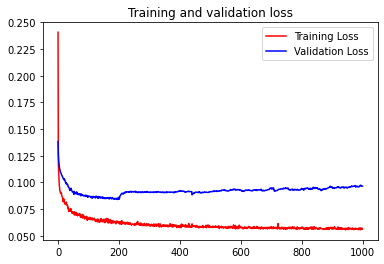

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
loss = history_lower.history['loss']
val_loss = history_lower.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('loss.png')
plt.show()


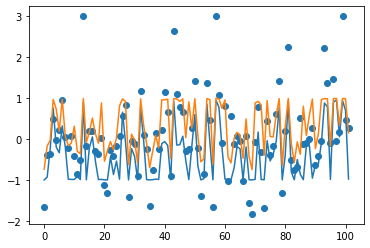

In [40]:
plt.figure()
plt.scatter(range(len(y_test)),y_test)
pred_lower = model_lower.predict(x_test)
plt.plot(range(len(y_test)),pred_lower)
pred_upper = model_upper.predict(x_test)
plt.plot(range(len(y_test)),pred_upper)

# Training with Constant Learning Rate

In [57]:
model_const1 = models.Sequential()
model_const1.add(layers.Dense(32, activation='relu', input_shape=(x_train.shape[1],)))
model_const1.add(layers.Dropout(0.3))
model_const1.add(layers.Dense(20, activation='relu'))
model_const1.add(layers.Dropout(0.3))
model_const1.add(layers.Dense(1,activation = keras.activations.softsign))
q = 0.5
model_const1.compile(loss=lambda y,f: tilted_loss(q,y,f), optimizer=keras.optimizers.Adam(0.03))

In [58]:
history_const1=model_const1.fit(x_train, y_train, epochs = 1000, batch_size = 8,validation_data=(x_test,y_test))

Epoch 1/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.2652 - val_loss: 0.2400
Epoch 2/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.2245 - val_loss: 0.2160
Epoch 3/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.2144 - val_loss: 0.2266
Epoch 4/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.2033 - val_loss: 0.2186
Epoch 5/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.2033 - val_loss: 0.2039
Epoch 6/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1905 - val_loss: 0.2138
Epoch 7/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1999 - val_loss: 0.2173
Epoch 8/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1948 - val_loss: 0.2143
Epoch 9/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1947 - val_loss: 0.2205
Epoch 10/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1937 - val_loss: 0.2023

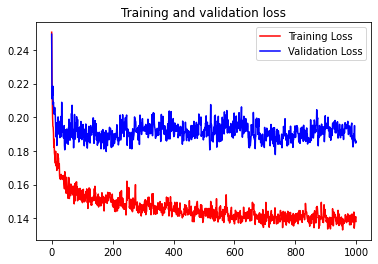

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
loss = history_const1.history['loss']
val_loss = history_const1.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('loss.png')
plt.show()


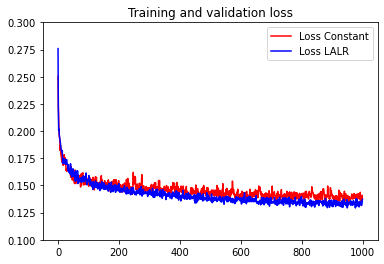

In [56]:
  %matplotlib inline
import matplotlib.pyplot as plt
loss_const = history_const1.history['loss']
loss_lalr = history.history['loss']

epochs = range(len(loss))

plt.plot(epochs, loss_const, 'r', label='Loss Constant')
plt.plot(epochs, loss_lalr, 'b', label='Loss LALR')
plt.title('Training and validation loss')
plt.ylim(0.1,0.3)
plt.legend()
plt.savefig('quantile_5.png')
plt.show()


In [62]:
model_const2 = models.Sequential()
model_const2.add(layers.Dense(32, activation='relu', input_shape=(x_train.shape[1],)))
model_const2.add(layers.Dropout(0.3))
model_const2.add(layers.Dense(20, activation='relu'))
model_const2.add(layers.Dropout(0.3))
model_const2.add(layers.Dense(1,activation = keras.activations.softsign))
q = 0.05
model_const2.compile(loss=lambda y,f: tilted_loss(q,y,f), optimizer=keras.optimizers.Adam(0.1))

In [63]:
history_const2 =model_const2.fit(x_train, y_train, epochs = 1000, batch_size = 8,validation_data=(x_test,y_test))

Epoch 1/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.1081 - val_loss: 0.1025
Epoch 2/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0780 - val_loss: 0.0981
Epoch 3/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0738 - val_loss: 0.0949
Epoch 4/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0748 - val_loss: 0.0942
Epoch 5/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0732 - val_loss: 0.0959
Epoch 6/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0773 - val_loss: 0.1151
Epoch 7/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0789 - val_loss: 0.0967
Epoch 8/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0772 - val_loss: 0.0985
Epoch 9/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.0768 - val_loss: 0.1000
Epoch 10/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0805 - val_loss: 0.0972

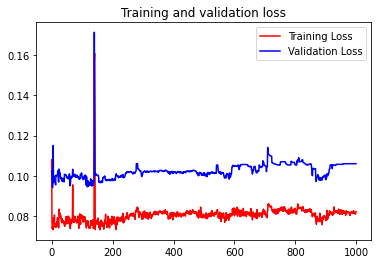

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
loss = history_const2.history['loss']
val_loss = history_const2.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('loss.png')
plt.show()


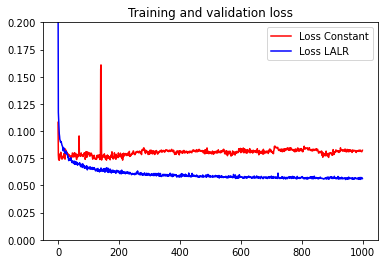

In [65]:
  %matplotlib inline
import matplotlib.pyplot as plt
loss_const = history_const2.history['loss']
loss_lalr = history_lower.history['loss']

epochs = range(len(loss))

plt.plot(epochs, loss_const, 'r', label='Loss Constant')
plt.plot(epochs, loss_lalr, 'b', label='Loss LALR')
plt.title('Training and validation loss')
plt.ylim(0,0.2)
plt.legend()
plt.savefig('quantile_5.png')
plt.show()


In [67]:
model_const3 = models.Sequential()
model_const3.add(layers.Dense(32, activation='relu', input_shape=(x_train.shape[1],)))
model_const3.add(layers.Dropout(0.3))
model_const3.add(layers.Dense(20, activation='relu'))
model_const3.add(layers.Dropout(0.3))
model_const3.add(layers.Dense(1,activation = keras.activations.softsign))
q = 0.95
model_const3.compile(loss=lambda y,f: tilted_loss(q,y,f), optimizer=keras.optimizers.Adam(0.1))

In [68]:
history_const3 =model_const3.fit(x_train, y_train, epochs = 1000, batch_size = 8,validation_data=(x_test,y_test))

Epoch 1/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.1956 - val_loss: 0.1705
Epoch 2/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1840 - val_loss: 0.1704
Epoch 3/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1902 - val_loss: 0.1705
Epoch 4/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1835 - val_loss: 0.1704
Epoch 5/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1829 - val_loss: 0.1702
Epoch 6/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1843 - val_loss: 0.1704
Epoch 7/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1840 - val_loss: 0.1701
Epoch 8/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1829 - val_loss: 0.1698
Epoch 9/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1826 - val_loss: 0.1678
Epoch 10/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.1803 - val_loss: 0.1651

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
loss = history_const3.history['loss']
val_loss = history_const3.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('loss.png')
plt.show()
